# ***Predicting Hospital Readmissions: A Journey from General Population To Diabetic-Specific Risk Modeling!!***

### ***`OWNER - DIVYANSHU SRIVASTAVA`***

# ***PHASE I - PREDICTING HOSPITAL READMISSION FOR ALL PATIENTS***

### ***IMPORTING NECESSSARY LIBRARIES***

In [185]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split and k-fold cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Missing data imputation
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Categorical data encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer

## ***1. INTRODUCTION***

### ***1.1 DATASET USED***

`The dataset used contains information of 8,429 patients admitted to the hospital each with 15 features, focusing on identifying the risk of hospital readmission within 30 days of discharge. The data captures a diverse range of demographic details (such as age and gender), clinical parameters (like blood pressure, cholesterol levels, and BMI), and hospitalization factors (including length of stay, medication count, and discharge destination). Additionally, it includes key chronic disease indicators such as diabetes and hypertension, as well as advanced clinical factors like insulin treatment plans, A1C test results, disease burden score, and number of inpatient visits.`

In [186]:
# Loading the dataset

patients = pd.read_csv("D:\Plac related\projs\P1-HospitalReadmission\hospital_readmissions_9k.csv")
patients

age  gender  cholesterol   bmi diabetes hypertension  medication_count  \
0      82    Male        193.0  26.3       No           No                 4   
1      82    Male        214.0  18.0       No           No                 4   
2      84   Other        174.0  39.9      Yes           No                 9   
3      82  Female        191.0  20.5       No           No                 4   
4      44    Male        183.0  27.6       No           No                 2   
...   ...     ...          ...   ...      ...          ...               ...   
8424   49  Female        300.0  31.4      Yes          Yes                 1   
8425   69   Other        287.0  32.2       No          Yes                 7   
8426   59    Male        292.0  31.4      Yes           No                 1   
8427   67    Male        198.0  20.9       No          Yes                 6   
8428   58   Other        251.0  24.8      Yes          Yes                 6   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
0                 10                  Home           No             NaN   
1                  4                  Home           No            Norm   
2                  9                  Home         Down            Norm   
3                 10                 Rehab           No              >7   
4                  4                  Home           No              >7   
...              ...                   ...          ...             ...   
8424               6      Nursing_Facility         Down             <=7   
8425              10                  Home           No             NaN   
8426               3                   NaN           Up             <=7   
8427              10                  Home           No            Norm   
8428               4                  Home       Steady             <=7   

      num_inpatient_visits  disease_burden_score readmitted_30_days  \
0                        4                   2.8                 No   
1                        0                   7.3                 No   
2                        0                   3.4                 No   
3                        1                   3.6                Yes   
4                        1                   5.9                Yes   
...                    ...                   ...                ...   
8424                     0                   4.5                Yes   
8425                     1                   8.0                Yes   
8426                     2                   4.4                Yes   
8427                     2                   7.3                 No   
8428                     1                   3.4                Yes   

     blood_pressure  
0            125/87  
1            129/85  
2            148/82  
3            134/83  
4            128/70  
...             ...  
8424         141/79  
8425         158/70  
8426         142/85  
8427         116/93  
8428         143/82  

[8429 rows x 15 columns]

In [187]:
# Printing top 5 rows
patients.head()

age  gender  cholesterol   bmi diabetes hypertension  medication_count  \
0   82    Male        193.0  26.3       No           No                 4   
1   82    Male        214.0  18.0       No           No                 4   
2   84   Other        174.0  39.9      Yes           No                 9   
3   82  Female        191.0  20.5       No           No                 4   
4   44    Male        183.0  27.6       No           No                 2   

   length_of_stay discharge_destination insulin_plan a1c_test_result  \
0              10                  Home           No             NaN   
1               4                  Home           No            Norm   
2               9                  Home         Down            Norm   
3              10                 Rehab           No              >7   
4               4                  Home           No              >7   

   num_inpatient_visits  disease_burden_score readmitted_30_days  \
0                     4                   2.8                 No   
1                     0                   7.3                 No   
2                     0                   3.4                 No   
3                     1                   3.6                Yes   
4                     1                   5.9                Yes   

  blood_pressure  
0         125/87  
1         129/85  
2         148/82  
3         134/83  
4         128/70

In [188]:
#Printing random 5 rows
patients.sample(5)

age  gender  cholesterol   bmi diabetes hypertension  medication_count  \
1364   47  Female        235.0  29.2      Yes           No                10   
8070   79   Other        219.0  33.3      Yes          Yes                 2   
4483   29   Other        196.0  33.2       No           No                 8   
2431   88   Other        150.0  35.3      Yes           No                 8   
6135   56   Other        251.0  28.3       No           No                 9   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
1364               2                 Rehab       Steady             <=7   
8070               3                 Rehab         Down             <=7   
4483               4                 Rehab           No              >7   
2431               5                  Home       Steady            Norm   
6135               2                  Home           No             <=7   

      num_inpatient_visits  disease_burden_score readmitted_30_days  \
1364                     1                   5.8                Yes   
8070                     2                   6.2                 No   
4483                     1                   1.2                Yes   
2431                     2                   4.2                 No   
6135                     0                   1.7                 No   

     blood_pressure  
1364         113/91  
8070         134/81  
4483         151/83  
2431         132/95  
6135        136/100

### ***1.2 COLUMNS DESCRIPTION***

- **`age -`**
- >`Age group of the patient.`                
- **`gender -`**
- >`Gender of the patient.`                                                                                         
- **`blood_pressure -`**
- >`Recorded blood pressure reading of the patient during hospital admission, usually noted in systolic/diastolic format (mmHg, millimeters of mercury).` 
- **`cholesterol -`**
- >`Cholesterol level measurement of the patient (mg/dL, milligrams of cholesterol per deciliter of blood), indicating lipid profile status.`                          
- **`bmi -`**
- >`Body Mass Index of the patient, a numerical value representing weight-to-height ratio (used to assess obesity/underweight risks).`      
-  **`diabetes -`**
-  >`Indicates whether the patient has been diagnosed with diabetes.`                                                               
- **`hypertension -`**
- >`Indicates whether the patient has been diagnosed with hypertension.`                                                          
- **`medication_count -`**
- >`Number of different medications the patient was prescribed during their hospital stay.`                                     
- **`length_of_stay -`**
- >`Duration of the patient’s hospital admission, in days.`                                                                      
- **`discharge_destination - `**
- >`Type of facility or setting where the patient was discharged to.`                                     
- **`insulin_plan -`**
- >`Type of insulin regimen prescribed at discharge, reflecting changes or continuation of insulin treatment.` 
- **`a1c_test_result -`**
- >`The A1C test (also called HbA1c or glycated hemoglobin test) is a blood test that measures a person’s average blood sugar levels over the past 2–3 months. It’s a crucial diagnostic and monitoring tool for diabetes.When glucose (sugar) enters the blood, it binds to a protein in red blood cells called hemoglobin. The A1C test measures how much glucose is bound to hemoglobin, giving a reliable average of blood sugar levels over time.`
- **`num_inpatient_visits -`**
- >`Number of previous inpatient visits (hospital admissions) prior to the current stay, indicating patient history of hospitalization.`
- **`disease_burden_score -`**
- >`A numerical score summarizing the patient’s overall disease burden based on comorbidities (presence of two or more health conditions or diseases in the same person at the same time) and clinical status.`                    
- **`readmitted_30_days -`**
- >`Target variable indicating if the patient was readmitted to the hospital within 30 days after discharge.`                      


### ***1.3 PROBLEM STATEMENT***

*`Can we predict whether a patient will be readmitted to the hospital within 30 days of being discharged, using their medical and treatment-related information?`*
`Why this is a problem:`

- `Hospitals face extra costs and penalties when too many patients are readmitted quickly.`
- `Some readmissions are avoidable, especially if proper care is taken after discharge.`
- `If we can predict early which patients are at risk, hospitals can: Give extra care instructions, Schedule follow-up visits, Monitor them remotely`

`This is a binary classification problem — the outcome has only two possible values:`
- `Yes → patient will return (readmitted)`
- `No → patient will not return`

### ***1.4 PROJECT OBJECTIVE***

*`We want to build a useful and reliable model that can make these predictions before the patient is discharged.`*

- `We’ll use data (patient info) to train a machine learning model.`
- `The model will predict "Yes" or "No": Will this patient come back in 30 days?`
- `Our project is not just about making predictions. We also want to understand which factors (features) affect readmissions the most.`

## ***2. DATA ACESSING***

### ***2.1 BASIC DATA EXPLORATION***

In [189]:
# Shape of the data
print("Shape of the data: {}".format(patients.shape))

Shape of the data: (8429, 15)


In [190]:
# Column names
patients.columns

Index(['age', 'gender', 'cholesterol', 'bmi', 'diabetes', 'hypertension',
       'medication_count', 'length_of_stay', 'discharge_destination',
       'insulin_plan', 'a1c_test_result', 'num_inpatient_visits',
       'disease_burden_score', 'readmitted_30_days', 'blood_pressure'],
      dtype='object')

In [191]:
print("Total number of columns: {}".format(len(patients.columns)))

Total number of columns: 15


In [192]:
# Column datatypes
patients.dtypes

age                        int64
gender                    object
cholesterol              float64
bmi                      float64
diabetes                  object
hypertension              object
medication_count           int64
length_of_stay             int64
discharge_destination     object
insulin_plan              object
a1c_test_result           object
num_inpatient_visits       int64
disease_burden_score     float64
readmitted_30_days        object
blood_pressure            object
dtype: object

In [193]:
# Identifying categorical columns
categorical_cols = patients.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['gender',
 'diabetes',
 'hypertension',
 'discharge_destination',
 'insulin_plan',
 'a1c_test_result',
 'readmitted_30_days',
 'blood_pressure']

In [194]:
print("Total Categorical Columns are {}".format(len(categorical_cols)))

Total Categorical Columns are 8


In [195]:
# Identifying numerical columns
numerical_cols = patients.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['age',
 'cholesterol',
 'bmi',
 'medication_count',
 'length_of_stay',
 'num_inpatient_visits',
 'disease_burden_score']

In [196]:
print("Total Numerical Columns are {}".format(len(numerical_cols)))

Total Numerical Columns are 7


In [197]:
# Count of duplicate rows
duplicate = patients.duplicated().sum()
print("Number of duplicate rows: {}".format(duplicate))

Number of duplicate rows: 0


In [198]:
# Count of missing values in each column
patients.isna().sum()

age                         0
gender                      0
cholesterol               167
bmi                       151
diabetes                    0
hypertension                0
medication_count            0
length_of_stay              0
discharge_destination     160
insulin_plan                0
a1c_test_result          1632
num_inpatient_visits        0
disease_burden_score        0
readmitted_30_days          0
blood_pressure            165
dtype: int64

In [199]:
# Percentage of data missing in each column
patients.isna().sum() * 100 / len(patients)

age                       0.000000
gender                    0.000000
cholesterol               1.981255
bmi                       1.791434
diabetes                  0.000000
hypertension              0.000000
medication_count          0.000000
length_of_stay            0.000000
discharge_destination     1.898209
insulin_plan              0.000000
a1c_test_result          19.361727
num_inpatient_visits      0.000000
disease_burden_score      0.000000
readmitted_30_days        0.000000
blood_pressure            1.957528
dtype: float64

In [200]:
# Summary of the data
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8429 entries, 0 to 8428
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    8429 non-null   int64  
 1   gender                 8429 non-null   object 
 2   cholesterol            8262 non-null   float64
 3   bmi                    8278 non-null   float64
 4   diabetes               8429 non-null   object 
 5   hypertension           8429 non-null   object 
 6   medication_count       8429 non-null   int64  
 7   length_of_stay         8429 non-null   int64  
 8   discharge_destination  8269 non-null   object 
 9   insulin_plan           8429 non-null   object 
 10  a1c_test_result        6797 non-null   object 
 11  num_inpatient_visits   8429 non-null   int64  
 12  disease_burden_score   8429 non-null   float64
 13  readmitted_30_days     8429 non-null   object 
 14  blood_pressure         8264 non-null   object 
dtypes: f

In [201]:
# Statistical description of numerical features
patients.describe()

age  cholesterol          bmi  medication_count  \
count  8429.000000  8262.000000  8278.000000       8429.000000   
mean     66.176533   226.262406    28.818966          4.993475   
std      16.832839    40.390245     5.920027          3.158085   
min      18.000000   150.000000    18.000000          0.000000   
25%      54.000000   197.000000    24.500000          2.000000   
50%      69.000000   226.000000    28.800000          5.000000   
75%      80.000000   255.000000    33.100000          8.000000   
max      99.000000   374.000000    53.000000         10.000000   

       length_of_stay  num_inpatient_visits  disease_burden_score  
count     8429.000000           8429.000000           8429.000000  
mean         5.281765              1.525685              3.926978  
std          3.067192              1.472485              2.063553  
min          1.000000              0.000000              0.000000  
25%          3.000000              1.000000              2.300000  
50%          5.000000              1.000000              3.600000  
75%          7.000000              2.000000              5.200000  
max         43.000000             15.000000              8.000000

In [202]:
# Counting unique categories in categorical columns 
for col in categorical_cols:
    print(patients[col].value_counts(),end='\n\n')

gender
Male      2884
Other     2801
Female    2744
Name: count, dtype: int64

diabetes
Yes    4340
No     4089
Name: count, dtype: int64

hypertension
Yes    4376
No     4053
Name: count, dtype: int64

discharge_destination
Home                5347
Rehab               1961
Nursing_Facility     961
Name: count, dtype: int64

insulin_plan
No        4507
Steady    1750
Up        1101
Down      1071
Name: count, dtype: int64

a1c_test_result
>7      2557
<=7     2497
Norm    1743
Name: count, dtype: int64

readmitted_30_days
No     4720
Yes    3709
Name: count, dtype: int64

blood_pressure
160/100    28
110/85     28
110/100    26
110/87     25
110/70     24
           ..
114/96      1
112/99      1
114/90      1
136/99      1
121/75      1
Name: count, Length: 1528, dtype: int64



### ***2.2 ISSUES WITH THE DATASET***

***1. DIRTY DATA-(Duplicates, Missing, Corrupt, Inaccurate Data)***
- `Data missing for 165(~2%) patients in blood_pressure column.`
- `Data missing for 167(~2%) patients in cholestrol column.`
- `Data missing for 151(~2%) patients in bmi column.`
- `Data missing for 160(~2%) patients in dischare_destination column.`
- `Data missing for 1632(~20%) patients in a1c_test_result column.`   

***2. MESSY DATA-(Data with structural issue)***
- `The blood_pressure column contains combined systolic and diastolic values hence, is being treated as categorical column, we need to split it into two separate numeric columns - systolic_bp, diastolic_bp`

### ***2.3 Data Structuring Before EDA***

`Before performing Exploratory Data Analysis, we will resolve structural issues(messy data) in the dataset by splitting the blood_pressure column into systolic_bp and diastolic_bp for numerical clarity. All other missing values, outliers and categorical structures are left unchanged to preserve the raw data patterns for initial analysis.`

In [203]:
# Creating copy of the dataset
patients_df = patients.copy()

In [204]:
# Splitting blood_pressure into two separate columns
patients_df['systolic_bp'] = patients_df['blood_pressure'].str.split('/').str.get(0).str.strip()
patients_df['diastolic_bp'] = patients_df['blood_pressure'].str.split('/').str.get(1).str.strip()

In [205]:
# Changing datatype of new columns to numeric
patients_df['systolic_bp'] = pd.to_numeric(patients_df['systolic_bp'],errors = 'coerce')

In [206]:
patients_df['diastolic_bp'] = pd.to_numeric(patients_df['diastolic_bp'],errors = 'coerce')

In [207]:
patients_df[['systolic_bp','diastolic_bp']].dtypes

systolic_bp     float64
diastolic_bp    float64
dtype: object

In [208]:
# Dropping the original blood_pressure column
patients_df.drop(labels = 'blood_pressure',axis = 1,inplace = True)  

In [209]:
patients_df

age  gender  cholesterol   bmi diabetes hypertension  medication_count  \
0      82    Male        193.0  26.3       No           No                 4   
1      82    Male        214.0  18.0       No           No                 4   
2      84   Other        174.0  39.9      Yes           No                 9   
3      82  Female        191.0  20.5       No           No                 4   
4      44    Male        183.0  27.6       No           No                 2   
...   ...     ...          ...   ...      ...          ...               ...   
8424   49  Female        300.0  31.4      Yes          Yes                 1   
8425   69   Other        287.0  32.2       No          Yes                 7   
8426   59    Male        292.0  31.4      Yes           No                 1   
8427   67    Male        198.0  20.9       No          Yes                 6   
8428   58   Other        251.0  24.8      Yes          Yes                 6   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
0                 10                  Home           No             NaN   
1                  4                  Home           No            Norm   
2                  9                  Home         Down            Norm   
3                 10                 Rehab           No              >7   
4                  4                  Home           No              >7   
...              ...                   ...          ...             ...   
8424               6      Nursing_Facility         Down             <=7   
8425              10                  Home           No             NaN   
8426               3                   NaN           Up             <=7   
8427              10                  Home           No            Norm   
8428               4                  Home       Steady             <=7   

      num_inpatient_visits  disease_burden_score readmitted_30_days  \
0                        4                   2.8                 No   
1                        0                   7.3                 No   
2                        0                   3.4                 No   
3                        1                   3.6                Yes   
4                        1                   5.9                Yes   
...                    ...                   ...                ...   
8424                     0                   4.5                Yes   
8425                     1                   8.0                Yes   
8426                     2                   4.4                Yes   
8427                     2                   7.3                 No   
8428                     1                   3.4                Yes   

      systolic_bp  diastolic_bp  
0           125.0          87.0  
1           129.0          85.0  
2           148.0          82.0  
3           134.0          83.0  
4           128.0          70.0  
...           ...           ...  
8424        141.0          79.0  
8425        158.0          70.0  
8426        142.0          85.0  
8427        116.0          93.0  
8428        143.0          82.0  

[8429 rows x 16 columns]

## ***3. Exploratory Data Analysis***

### ***3.1 UNIVARIATE ANALYSIS***

***`In this section, we examine each feature individually to understand its basic characteristics.We explore the distribution of numerical columns and the frequency of categorical variables using visualizations and statistics.This helps us detect patterns, spot potential outliers, and understand the overall structure of the dataset before moving to deeper analysis.`***

### ***THE TARGET VARIABLE -  'readmitted_30_days'***

***CONCLUSIONS-***
- `From the bar chart, we observe the absolute frequency of patients readmitted within 30 days (Yes) and those not readmitted (No). The pie chart further illustrates the percentage distribution of these two classes.`
- `The charts shows that categories in the target column are in ratio 56:44. Hence we can consider the data to be balanced ensuring model will not be biased towards one class and will have a fair representation of both outcomes during training.`
- `~56% of the instances fall under the category 'No' indicating they were not readmitted within 30 days.`
- `~44% of the instances fall under the category 'Yes' indicating readmission within 30 days.`
- `As observed before, there are no missing values`

In [210]:
patients_df['readmitted_30_days'].value_counts()

readmitted_30_days
No     4720
Yes    3709
Name: count, dtype: int64

In [211]:
patients_df['readmitted_30_days'].value_counts(normalize = True) * 100

readmitted_30_days
No     55.997153
Yes    44.002847
Name: proportion, dtype: float64

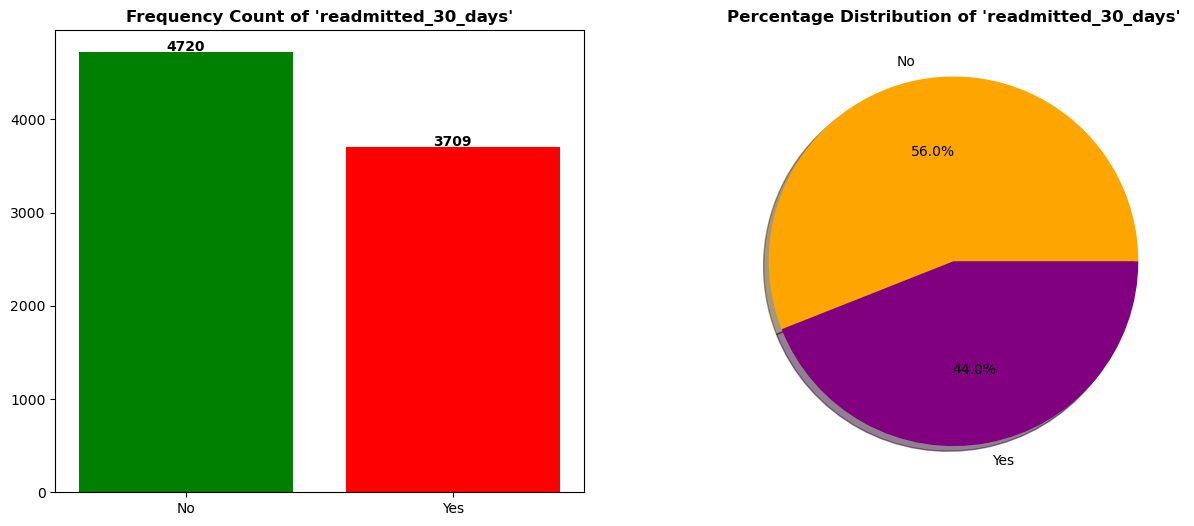

In [212]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = patients_df['readmitted_30_days'].value_counts()
categories = counts.index.to_list()
values = counts.to_list()

ax[0].bar(categories, values, color=['green', 'red'])
ax[0].set_title("Frequency Count of 'readmitted_30_days'",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = categories,autopct = '%0.1f%%',colors = ['orange','purple'],shadow = True)
ax[1].set_title("Percentage Distribution of 'readmitted_30_days'",fontweight= 'bold')

plt.show()

### ***NUMERICAL COLUMNS***

#### ***['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay', 'num_inpatient_visits', 'disease_burden_score', 'systolic_bp, 'diastolic_bp']***

### ***AGE***

***CONCLUSIONS -***

- `The age values in the dataset range from 18 to 99 years.`
- `The mean age is around 66 years.`
- `Most patients are concentrated between 60 and 85 years, as seen in the histogram and KDE curve.`
- `The skewness score of -0.53 suggests distribution is slightly left-skewed, peaking around the 75–85 year mark.`
- `A few higher age values(potential outliers) exist on the upper end (95–100), which is natural in healthcare datasets.`
- `The boxplot confirms the central 50% of values lie within the interquartile range of 54 to 80 years.`
- `Overall, the age data reflects a typical hospital demographic, where elderly patients dominate.`
- `As, observed before there are no missing values.`

In [213]:
patients_df['age'].describe()

count    8429.000000
mean       66.176533
std        16.832839
min        18.000000
25%        54.000000
50%        69.000000
75%        80.000000
max        99.000000
Name: age, dtype: float64

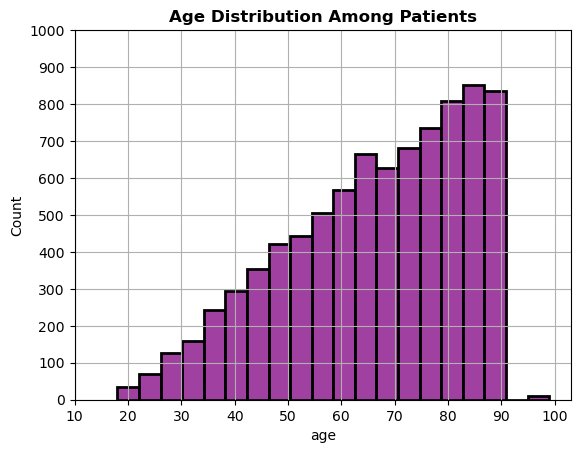

In [214]:
sns.histplot(data = patients_df,x = 'age',bins = 20,color = 'purple',linewidth = 2)
plt.grid(True)
plt.title('Age Distribution Among Patients',fontweight = 'bold')
plt.xticks(ticks = range(10, 110, 10))
plt.yticks(ticks = range(0,1100,100))
plt.show()

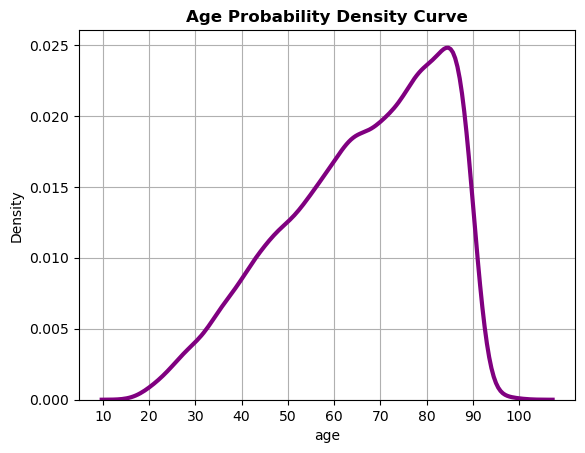

In [215]:
sns.kdeplot(data = patients_df,x = 'age',color = 'purple',linewidth = 3)
plt.grid(True)
plt.title('Age Probability Density Curve',fontweight = 'bold')
plt.xticks(ticks = range(10, 110, 10))
plt.show()

In [216]:
patients_df['age'].skew()

np.float64(-0.538278157968543)

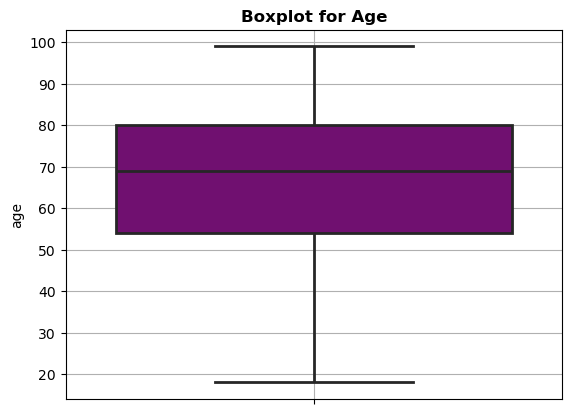

In [217]:
sns.boxplot(data = patients_df,y ='age',color = 'purple',linewidth = 2)
plt.grid(True)
plt.title('Boxplot for Age',fontweight  = 'bold')
plt.show()

### ***CHOLESTEROL***

***CONCLUSIONS -***

- `The cholesterol values are spread out between 150 and 374 mg/dL.`
- `The average cholesterol is around 226 mg/dl.`
- `The histogram shows a balanced distribution, with most patients concentrated between 170 and 280 mg/dL.`
- `The KDE plot indicates a smooth, near-symmetric distribution, with density peaking around 220 mg/dL.`
- `The skewness score 0f 0.02 suggests a close to normal distribution.`
- `The boxplot shows the interquartile range (IQR) is between 197 and 255 mg/dL, with some outliers extending above 340 mg/dL.`
- `According to Cleveland Clinic guidelines(a reference):`
   - `Cholesterol below 200 mg/dL is considered desirable.`
   - `Cholesterol between 200 and 239 mg/dL is classified as borderline high.`
   - `Cholesterol at or above 240 mg/dL is considered high.`
- `A significant portion of patients, around 71% falls within the borderline or high-risk categories.`
- `Despite the appearances of the apparent outliers, we refrain from deleting or modifying them as it is evident from the reference we considered, that these are most likely to be genuine values, containing relevant information about the corresponding variable.`
- `As, observed before there are 167 missing values.`

Link to the refernce - https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean


In [218]:
patients_df['cholesterol'].describe()

count    8262.000000
mean      226.262406
std        40.390245
min       150.000000
25%       197.000000
50%       226.000000
75%       255.000000
max       374.000000
Name: cholesterol, dtype: float64

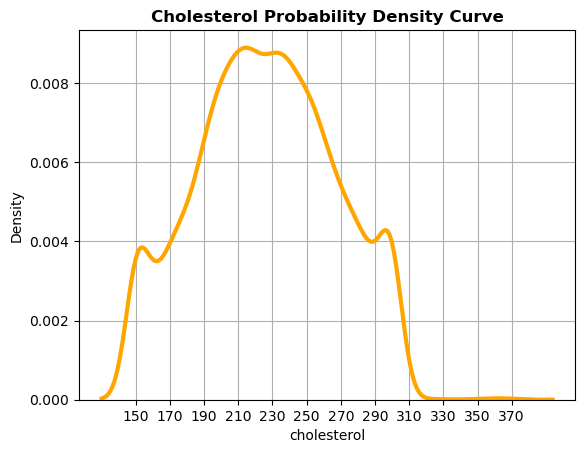

In [219]:
sns.kdeplot(data = patients_df,x = 'cholesterol',color = 'orange',linewidth = 3)
plt.grid(True)
plt.title('Cholesterol Probability Density Curve',fontweight = 'bold')
plt.xticks(ticks = range(150,380,20))
plt.show()

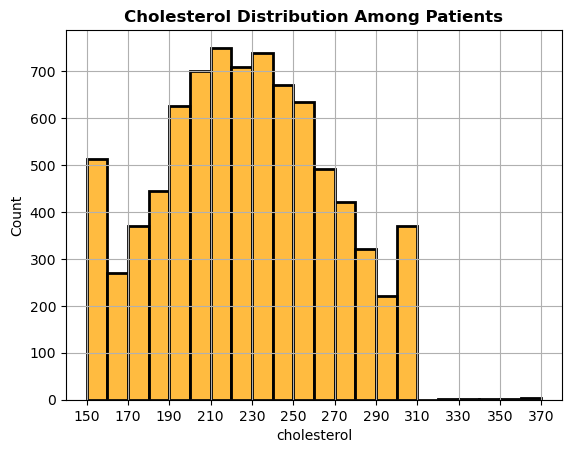

In [220]:
ax = sns.histplot(data = patients_df,x = 'cholesterol',bins = np.arange(150, 380, 10),color = 'orange',linewidth = 2)
ax.set_xlim(140,380)
plt.grid(True)
plt.title('Cholesterol Distribution Among Patients',fontweight = 'bold')
plt.xticks(ticks = range(150,380,20))
plt.show()

In [221]:
patients_df['cholesterol'].skew()

np.float64(0.019454397771079254)

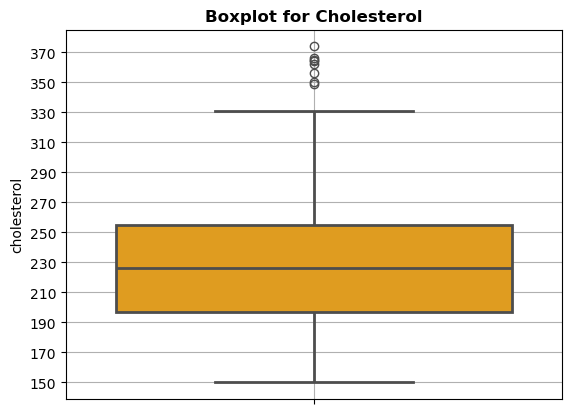

In [222]:
sns.boxplot(data = patients_df,y = 'cholesterol',color = 'orange',linewidth = 2)
plt.grid(True)
plt.title('Boxplot for Cholesterol',fontweight = 'bold')
plt.yticks(ticks = range(150,380,20))
plt.show()

In [223]:
# Calculating patients % having total cholesterol(LDL + HDL) greater than 240 mg/dl i.e are having dnagerous cholesterol levels.
len(patients_df[patients_df['cholesterol'] >= 240]) * 100 / len(patients_df)

37.276070708269074

In [224]:
# Calculating patients % having total cholesterol(LDL + HDL) in the range 200-239 mg/dl i.e are having at-risk cholesterol levels.
len(patients_df[(patients_df['cholesterol'] >= 200) & (patients_df['cholesterol'] <= 239)]) * 100 / len(patients_df)

34.36943884209278

In [225]:
# Calculating patients having total cholesterol(LDL + HDL) less than 200 mg/dl i.e are at heart-healthy cholesterol levels.
len(patients_df[patients_df['cholesterol'] < 200]) * 100 / len(patients_df)

26.373235259224106

### ***BMI***

***CONCLUSIONS -***

- `The BMI values are spread out between 18 and 53kg/m².`
- `The average BMI is around 29 kg/m².`
- `The histogram shows a moderately balanced distribution, with most patients concentrated between 22 and 36kg/m².`
- `The KDE plot peaks around 29kg/m², suggesting a higher proportion of patients in the overweight category.`
- `The boxplot shows the interquartile range (IQR) spans from 24.5 to 33kg/m², with several outliers above 45kg/m² extending up to 53kg/m².`
- `According to Cleveland Clinic guidelines:`
   - `A BMI below 18.5 kg/m² is considered underweight.`
   - `A BMI between 18.5 and 24.9 kg/m² is considered normal.`
   - `A BMI between 25 and 29.9 kg/m² is classified as overweight.`
   - `A BMI of 30 kg/m² or above is considered obese.`
- `A significant number of patients, around 70% fall in the overweight and obese categories.`
- `Despite the appearances of the apparent outliers, we refrain from deleting or modifying them as it is evident from the reference we considered that these are most likely to be genuine values, containing relevant information about the corresponding variable.`
- `As, observed before there are 151 missing values.`

Link to the refernce - https://my.clevelandclinic.org/health/articles/9464-body-mass-index-bmi

In [226]:
patients_df['bmi'].describe()

count    8278.000000
mean       28.818966
std         5.920027
min        18.000000
25%        24.500000
50%        28.800000
75%        33.100000
max        53.000000
Name: bmi, dtype: float64

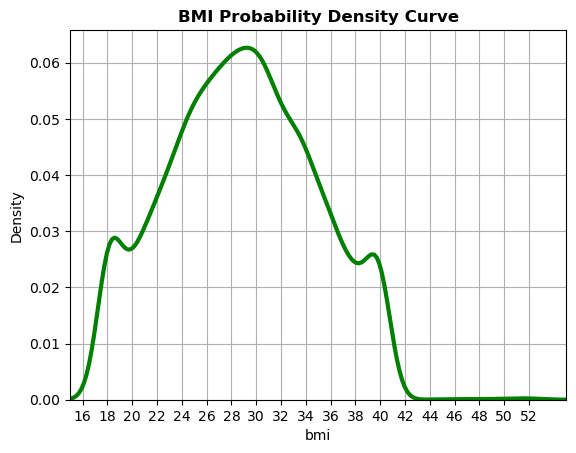

In [227]:
ax = sns.kdeplot(data = patients_df,x = 'bmi', color='green',linewidth = 3)
ax.set_xlim(15,55)
plt.grid(True)
plt.title('BMI Probability Density Curve',fontweight = 'bold')
plt.xticks(ticks = range(16,54,2))
plt.show()

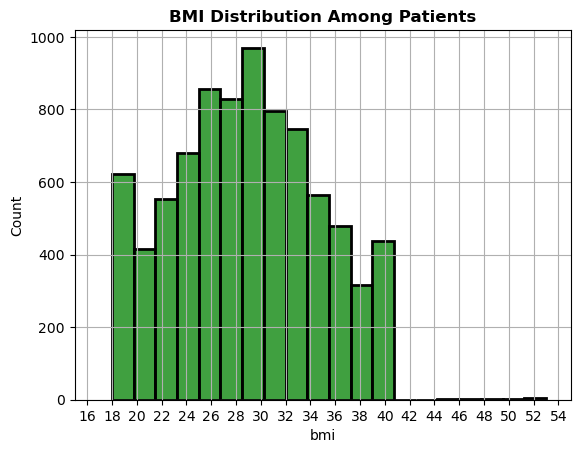

In [228]:
ax = sns.histplot(data = patients_df, x = 'bmi',bins = 20 ,color = 'green',linewidth = 2)
ax.set_xlim(15,55)
plt.grid(True)
plt.title('BMI Distribution Among Patients',fontweight = 'bold')
plt.xticks(ticks = range(16,55,2))
plt.show()

In [229]:
patients_df['bmi'].skew()

np.float64(0.08077129138331812)

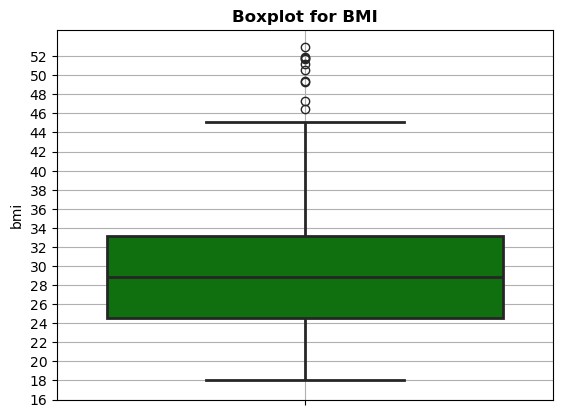

In [230]:
sns.boxplot(data = patients_df,y = 'bmi',color = 'green',linewidth = 2)
plt.grid(True)
plt.title('Boxplot for BMI',fontweight = 'bold')
plt.yticks(ticks = range(16,54,2))
plt.show()

In [231]:
# Calculating patients % falling under undewrweight category.
len(patients_df[patients_df['bmi'] < 18.5]) * 100 / len(patients_df)

4.733657610629968

In [232]:
# Calculating patients % falling under normal category.
len(patients_df[(patients_df['bmi'] >= 18.5) & (patients_df['bmi'] <= 24.9)]) * 100 / len(patients_df)

22.197176414758573

In [233]:
# Calculating patients % falling under overweight category.
len(patients_df[(patients_df['bmi'] >= 25) & (patients_df['bmi'] <= 29.9)]) * 100 / len(patients_df)

29.39850516075454

In [234]:
# Calculating patients % falling under obese category.
len(patients_df[patients_df['bmi'] >= 30]) * 100 / len(patients_df)

41.87922648000949

### ***MEDICATION_COUNT***

***CONCLUSIONS -***

- `The medication count values range from 0 to 10 making it a discrete numerical column.`
- `The average medication count is around 5.`
- `The histogram shows a relatively uniform distribution, with slight peaks around 2, 3, 4 and 8 medications.`
- `The KDE plot remains fairly flat across the range, indicating no strong skewness, and the density is spread across multiple medication counts.`
- `The boxplot shows the interquartile range (IQR) is between 2 and 8 medications, with no significant outliers.`
- `The minimum count is 0, indicating some patients were not prescribed medications during their hospital stay, while the maximum count reaches 10, representing more complex treatment cases.`
- `As, observed before there are no missing values.`
- `In real-world clinical practice, patients with a higher number of medications often represent those with multiple complications, which can influence readmission risk.`

In [235]:
patients_df['medication_count'].describe()

count    8429.000000
mean        4.993475
std         3.158085
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: medication_count, dtype: float64

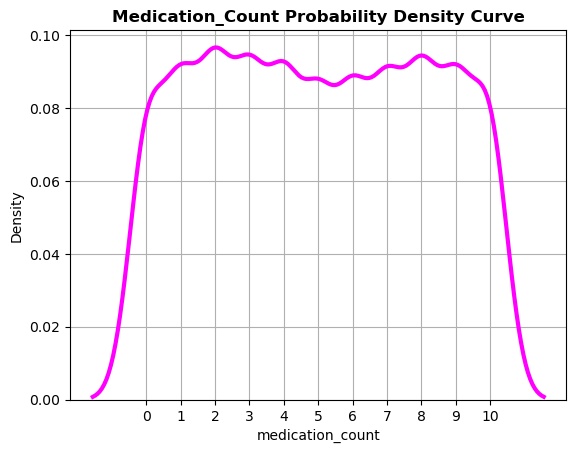

In [236]:
sns.kdeplot(data = patients_df, x ='medication_count', color = 'magenta',linewidth = 3)
plt.xticks(ticks = range(0,11,1))
plt.grid(True)
plt.title('Medication_Count Probability Density Curve',fontweight = 'bold')
plt.show()

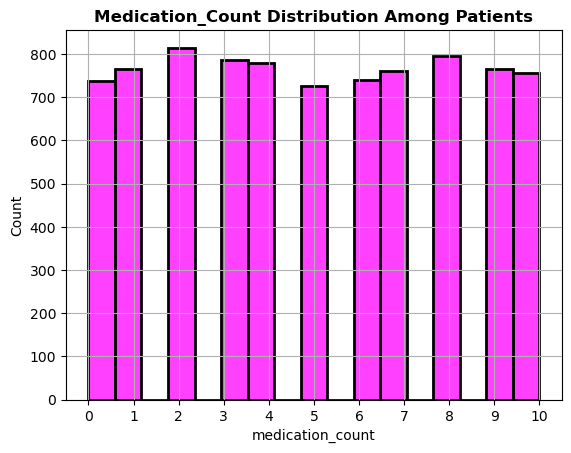

In [237]:
ax = sns.histplot(data = patients_df, x ='medication_count', color = 'magenta',linewidth = 2)
plt.xticks(ticks = range(0,11,1))
plt.grid(True)
plt.title('Medication_Count Distribution Among Patients',fontweight = 'bold')
plt.show()

In [238]:
patients_df['medication_count'].skew()

np.float64(0.012187246818138042)

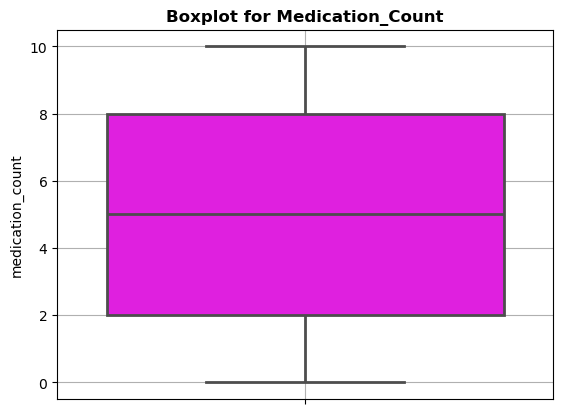

In [239]:
sns.boxplot(data = patients_df,y = 'medication_count',color = 'magenta',linewidth = 2)
plt.grid(True)
plt.title('Boxplot for Medication_Count',fontweight = 'bold')
plt.show()

### ***LENGTH_OF_STAY***

***CONCLUSIONS -***

- `The length_of_stay values range from 1 to 43 days.`
- `The average length of stay is around 5 days.`
- `The histogram shows a right-skewed(skewness ~ 2.4), bimodal distribution.`
- `The KDE plot reveals two peaks — the first around 3–5 days, reflecting short-term admissions, and the second around 7–10 days, suggesting a smaller group of patients with moderately extended stays.`
- `The boxplot shows the interquartile range (IQR) is between 3 and 7 days, with multiple outliers above 10 days(around 17 patients), extending to a maximum of 43 days.`
- `This pattern reflects typical hospital stay behavior, where short stays dominate, but a secondary group of longer stays exists, often linked to complications or critical care cases.`
- `Length of stay outliers are retained as they reflect real-world scenarios of extended hospitalization.These are realistic and medically valid cases of prolonged hospitalization (e.g., ICU, complications, chronic care).`
- `As, observed before there are no missing values.`



In [240]:
patients_df['length_of_stay'].describe()

count    8429.000000
mean        5.281765
std         3.067192
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        43.000000
Name: length_of_stay, dtype: float64

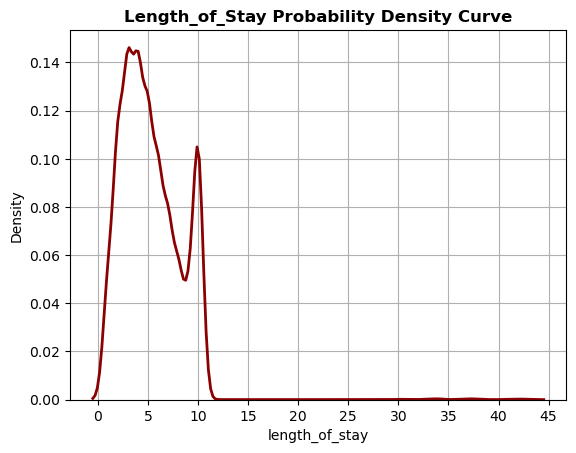

In [241]:
sns.kdeplot(data = patients_df,x = 'length_of_stay',color = 'darkred',linewidth = 2)
plt.grid(True)
plt.xticks(ticks = range(0,46,5))
plt.title('Length_of_Stay Probability Density Curve',fontweight = 'bold')
plt.show()

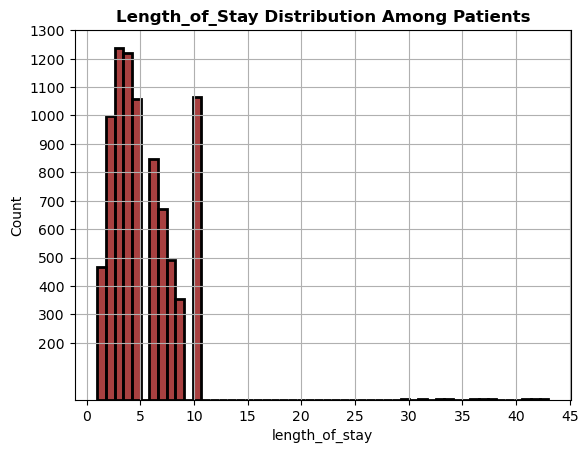

In [242]:
sns.histplot(data = patients_df,x = 'length_of_stay',color = 'darkred',binwidth = 0.8,linewidth = 2)
plt.grid(True)
plt.xticks(ticks = range(0,46,5))
plt.yticks(ticks = range(200,1400,100))
plt.title('Length_of_Stay Distribution Among Patients',fontweight = 'bold')
plt.show()

In [243]:
patients_df['length_of_stay'].skew()

np.float64(2.4391105279652363)

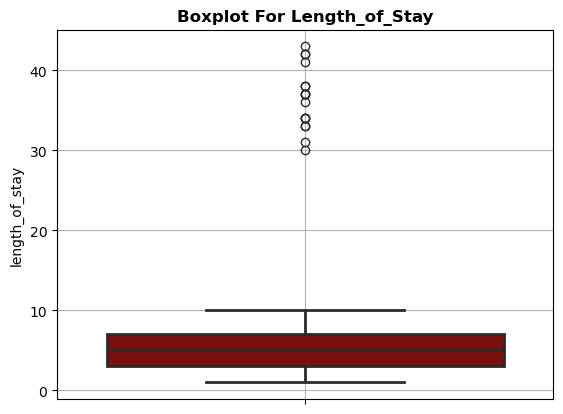

In [244]:
sns.boxplot(data = patients_df,y='length_of_stay',color = 'darkred',linewidth = 2)
plt.grid(True)
plt.title('Boxplot For Length_of_Stay',fontweight = 'bold')
plt.show()

In [245]:
print('Number of patients having length_of_stay more than 10 days are',len(patients_df[patients_df['length_of_stay']>25]))

Number of patients having length_of_stay more than 10 days are 17


### ***NUM_INPATIENT_VISITS***

***CONCLUSIONS -***

- `The number of inpatient visits ranges from 0 to 15.`
- `The average number of inpatient visits are around 2.`
- `The histogram shows a highly right-skewed(skewness ~ 2) bimodal distribution, with most patients having 0 to 3 inpatient visits.`
- `The KDE plot peaks sharply at 0 and 1 visits, indicating that single hospitalizations are most common in the dataset.`
- `The boxplot shows the interquartile range (IQR) lies between 1 and 2 visits, with several outliers extending beyond 3 visits and a few patients reaching up to 15 visits.`
- `Higher counts of inpatient visits usually reflect patients with more severe health issues or chronic conditions, making this feature important in understanding hospitalization patterns.`
- `This distribution is realistic, as most patients experience limited hospitalizations while a smaller group shows frequent readmissions, inclining us towards not removing or modifying the ouliers.`
- `As, observed before there are no missing values.`


In [246]:
patients_df['num_inpatient_visits'].describe()

count    8429.000000
mean        1.525685
std         1.472485
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: num_inpatient_visits, dtype: float64

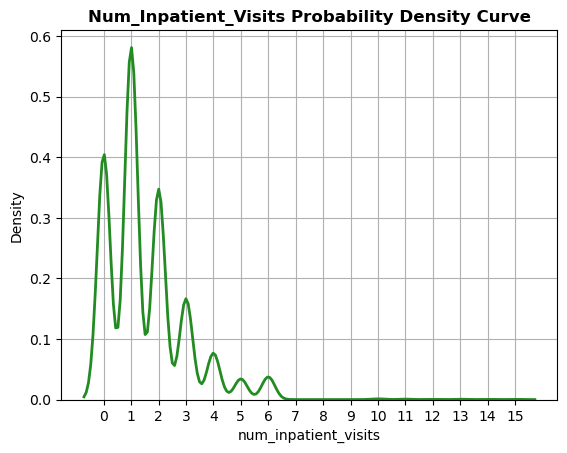

In [247]:
sns.kdeplot(data = patients_df,x = 'num_inpatient_visits',color = 'forestgreen',linewidth = 2)
plt.grid(True)
plt.xticks(ticks = range(0,16,1))
plt.title('Num_Inpatient_Visits Probability Density Curve',fontweight = 'bold')
plt.show()

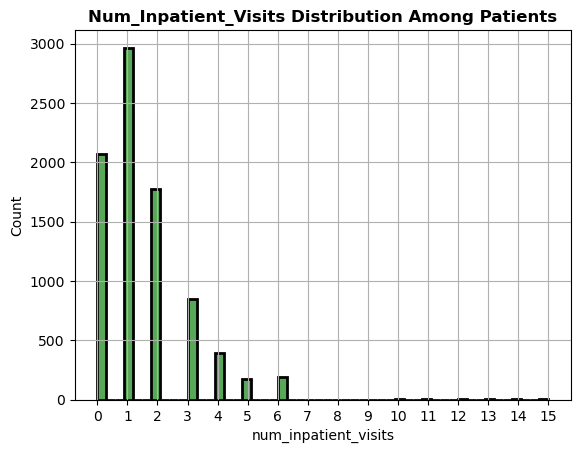

In [248]:
sns.histplot(data = patients_df,x = 'num_inpatient_visits',color = 'forestgreen',binwidth = 0.3,linewidth = 2)
plt.grid(True)
plt.xticks(ticks = range(0,16,1))
plt.title('Num_Inpatient_Visits Distribution Among Patients',fontweight = 'bold')
plt.show()

In [249]:
patients_df['num_inpatient_visits'].skew()

np.float64(1.7888284792865432)

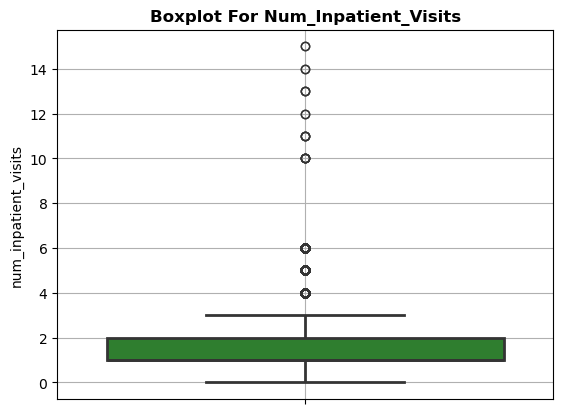

In [250]:
sns.boxplot(data = patients_df,y='num_inpatient_visits',color = 'forestgreen',linewidth = 2)
plt.grid(True)
plt.title('Boxplot For Num_Inpatient_Visits',fontweight = 'bold')
plt.show()

### ***DISEASE_BURDEN_SCORE***

***CONCLUSIONS -***

- `The disease_burden_score values are spread between 0 and 8.`
- `The average disease_burden_score is around 4.`
- `The histogram shows a moderately right-skewed(skewness ~ 0.5) distribution, with most patients having scores between 1.5 and 5.`
- `The KDE plot indicates a major peak around 2.5 to 3.5, followed by a smaller secondary peak near 8, showing a bimodal distribution indicating some patients with very high disease burden.`
- `The boxplot shows the interquartile range (IQR) lies between 2.3 and 5.2, with several patients having very low or very high scores.`
- `Higher disease burden scores reflect the presence of multiple chronic or severe health conditions, which typically result in greater healthcare utilization and a higher risk of hospital readmissions.`
- `This distribution aligns with real-world patterns where a majority of patients have moderate disease burden, but a significant group represents complex cases with severe multi-morbidities, making this a critical feature in predicting readmission risk.`
- `As, observed before there are no missing values.`


In [251]:
patients_df['disease_burden_score'].describe()

count    8429.000000
mean        3.926978
std         2.063553
min         0.000000
25%         2.300000
50%         3.600000
75%         5.200000
max         8.000000
Name: disease_burden_score, dtype: float64

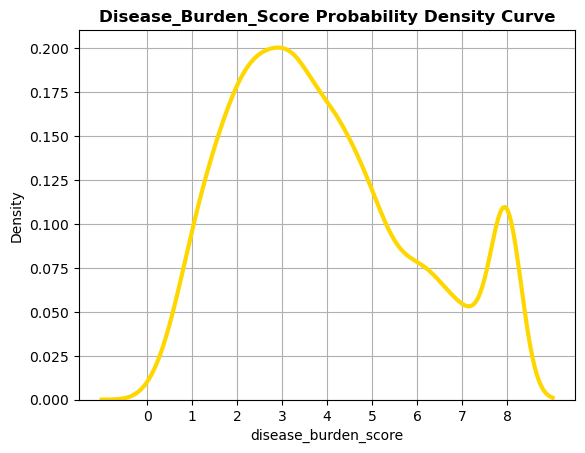

In [252]:
sns.kdeplot(data = patients_df, x = 'disease_burden_score',color = 'gold',linewidth = 3)
plt.grid(True)
plt.xticks(ticks = range(0,9,1))
plt.title('Disease_Burden_Score Probability Density Curve',fontweight = 'bold')
plt.show()

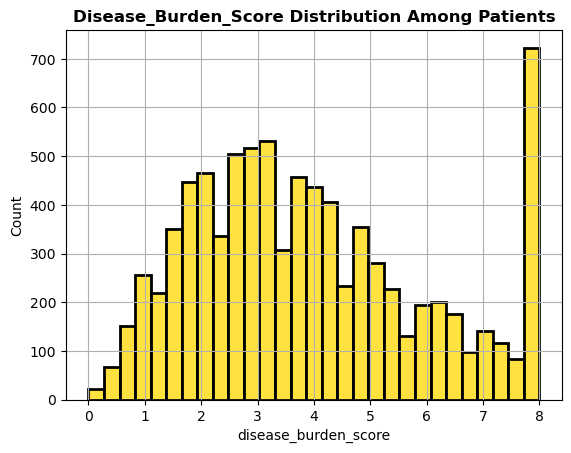

In [253]:
sns.histplot(data = patients_df,x = 'disease_burden_score',color = 'gold',linewidth = 2)
plt.grid(True)
plt.xticks(ticks = range(0,9,1))
plt.title('Disease_Burden_Score Distribution Among Patients',fontweight = 'bold')
plt.show()

In [254]:
patients_df['disease_burden_score'].skew()

np.float64(0.5011707051497029)

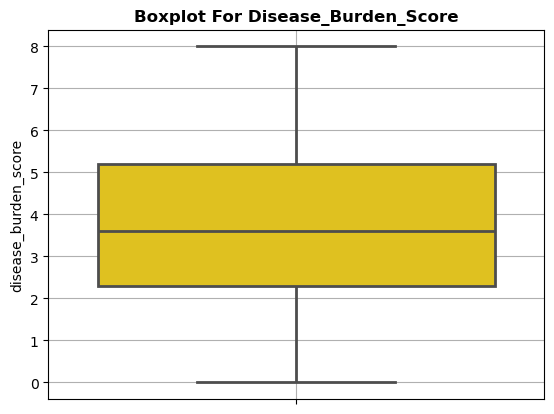

In [255]:
sns.boxplot(data = patients_df,y = 'disease_burden_score',color = 'gold',linewidth = 2)
plt.grid(True)
plt.title('Boxplot For Disease_Burden_Score',fontweight = 'bold')
plt.show()

### ***SYSTOLIC_BP***

***CONCLUSIONS -***

- `The systolic_bp values are spread between 110 and 217 mmHg.`
- `The average systolic_bp is around 135 mmHg.`
- `The histogram and kde plots shows a slightly right-skewed approx normal distribution (skewness ≈ 0.2), with most patients having values between 120 and 150 mmHg.`
- `The KDE plot shows a major density peak between 130 and 140 mmHg, with a gradual taper(thins out) towards higher values.`
- `The boxplot shows the interquartile range (IQR) lies between 125 and 144 mmHg, with outliers extending beyond 180 mmHg and some patients reaching around 220 mmHg.`
- `There are around 165 missing values.`
- `According to Cleveland Clinic blood pressure categories:`
  - `Systolic BP below 120 mmHg is considered normal.`
  - `120 to 129 mmHg is elevated.`
  - `130 to 139 mmHg falls under Stage 1 hypertension.`
  - `140 mmHg or higher is classified as Stage 2 hypertension.`
  - `Values above 180 mmHg are categorized under hypertensive crisis, requiring immediate medical attention.`
- `Despite the appearances of the apparent outliers, we refrain from deleting or modifying them as it is evident from the reference we considered that these are most likely to be genuine values, containing relevant information about the corresponding variable.`
- `The distribution reflects real-world patient populations, where a majority fall within the hypertensive range, making systolic_bp crucial.`

Link to the reference - https://my.clevelandclinic.org/health/diagnostics/17649-blood-pressure

In [256]:
patients_df['systolic_bp'].describe()

count    8264.000000
mean      134.891699
std        13.859848
min       110.000000
25%       125.000000
50%       135.000000
75%       144.000000
max       217.000000
Name: systolic_bp, dtype: float64

In [257]:
patients_df['systolic_bp'].isna().sum()

np.int64(165)

Text(0.5, 1.0, 'Systolic_BP Probability Density Curve')

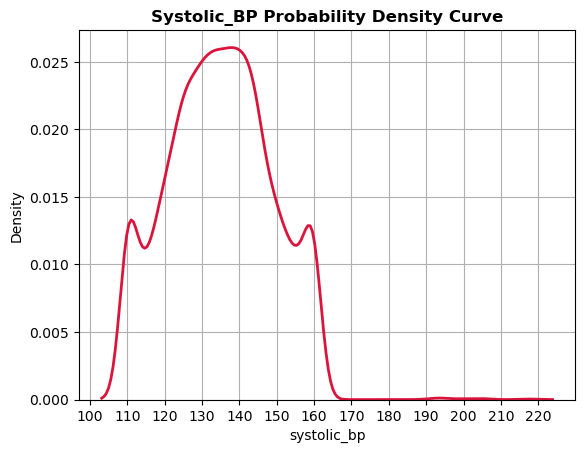

In [258]:
sns.kdeplot(data = patients_df,x = 'systolic_bp',color = 'crimson',linewidth = 2)
plt.grid(True)
plt.xticks(ticks = range(100,230,10))
plt.title('Systolic_BP Probability Density Curve',fontweight = 'bold')

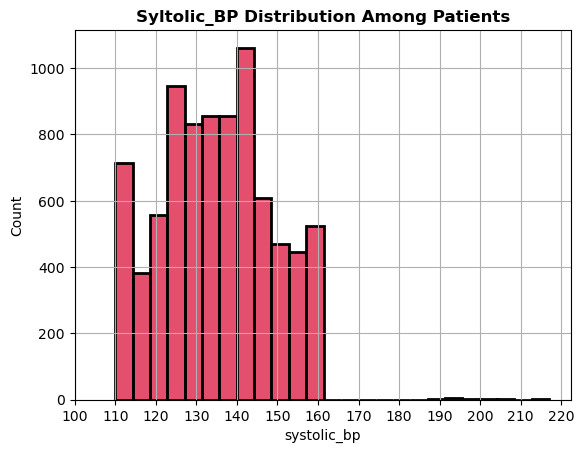

In [259]:
sns.histplot(data = patients_df,x = 'systolic_bp',color = 'crimson', linewidth = 2,bins = 25)
plt.grid(True)
plt.xticks(ticks = range(100,230,10))
plt.title('Syltolic_BP Distribution Among Patients',fontweight = 'bold')
plt.show()

In [260]:
patients_df['systolic_bp'].skew()

np.float64(0.1836528181406381)

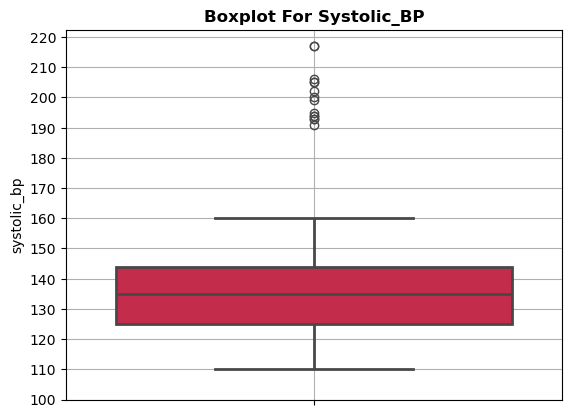

In [261]:
sns.boxplot(data = patients_df, y = 'systolic_bp',color = 'crimson',linewidth = 2)
plt.grid(True)
plt.yticks(ticks = range(100,230,10))
plt.title('Boxplot For Systolic_BP',fontweight = 'bold')
plt.show()

In [262]:
print('Patients with normal systolic bp are around',round(len(patients_df[patients_df['systolic_bp'] < 120]) * 100/len(patients_df['systolic_bp'])),'%.')

Patients with normal systolic bp are around 15 %.


In [263]:
p = round(len(patients_df[(patients_df['systolic_bp'] >= 120) & (patients_df['systolic_bp'] <=129)]) * 100/len(patients_df['systolic_bp']))

In [264]:
print('Patients having elevated systolic_bp are around',p,'%')

Patients having elevated systolic_bp are around 21 %


In [265]:
l = len(patients_df[patients_df['systolic_bp'] > 139]) * 100/ len(patients_df['systolic_bp'])

In [266]:
print('Patients falling under hypertension 1 category to hypertension crisis category are around',round(l),'%')

Patients falling under hypertension 1 category to hypertension crisis category are around 37 %


### ***DIASTOLIC_BP***

***CONCLUSIONS -***

- `The diastolic_bp values are spread between 70 and 134 mmHg.`
- `The average diastolic_bp is around 85 mmHg.`
- `The histogram and kde plots shows a fairly symmetric, slightly right-skewed approx normal distribution(skewness ≈ 0.2), with most patients having values between 78 and 92 mmHg.`
- `The KDE plot shows a prominent density peak between 80 and 90 mmHg, with a gradual taper(thins out) towards higher values beyond 100 mmHg.`
- `The boxplot shows the interquartile range (IQR) lies between 79 and 91 mmHg, with several outliers extending beyond 100 mmHg, reaching up to 134 mmHg.`
- `There are around 65 missing values in this column.`
- `According to Cleveland Clinic blood pressure categories:`
    - `Diastolic BP below 80 mmHg is considered normal.`
    - `80 to 89 mmHg falls under Stage 1 hypertension.`
    - `90 mmHg or higher is classified as Stage 2 hypertension.`
    - `Diastolic BP above 120 mmHg indicates hypertensive crisis, requiring urgent medical care.`
- `Despite the presence of outliers, we do not remove or cap them as they align with known clinical ranges and reflect genuine patient conditions.`
- `This distribution aligns with real-world hospital data where a majority of patients fall within the hypertensive spectrum, making diastolic_bp a clinically significant feature.`

Link to reference - https://my.clevelandclinic.org/health/diagnostics/17649-blood-pressure


In [267]:
patients_df['diastolic_bp'].describe()

count    8264.000000
mean       85.118708
std         8.394489
min        70.000000
25%        79.000000
50%        85.000000
75%        91.000000
max       134.000000
Name: diastolic_bp, dtype: float64

In [268]:
patients_df['diastolic_bp'].isna().sum()

np.int64(165)

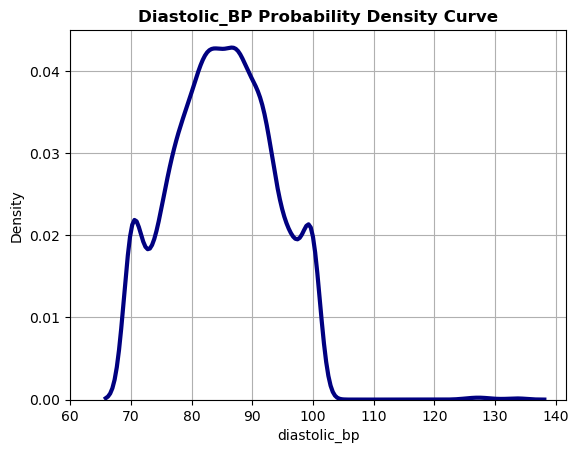

In [269]:
sns.kdeplot(data = patients_df,x = 'diastolic_bp',color = 'navy',linewidth = 3)
plt.grid(True)
plt.xticks(ticks = range(60,150,10))
plt.title('Diastolic_BP Probability Density Curve',fontweight = 'bold')
plt.show()

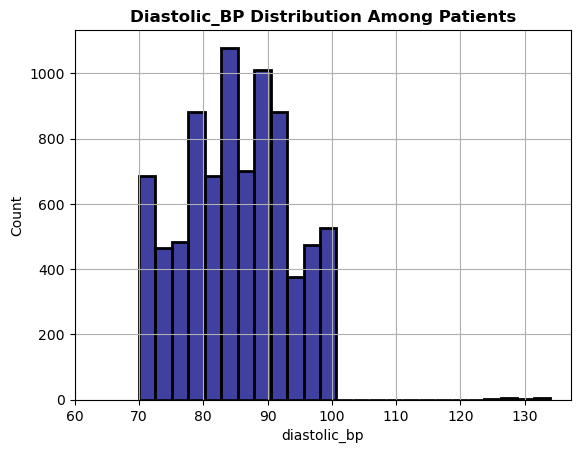

In [270]:
sns.histplot(data = patients_df,x = 'diastolic_bp',color = 'navy', linewidth = 2,bins = 25)
plt.grid(True)
plt.xticks(ticks = range(60,140,10))
plt.title('Diastolic_BP Distribution Among Patients',fontweight = 'bold')
plt.show()

In [271]:
patients_df['diastolic_bp'].skew()

np.float64(0.2087042445559566)

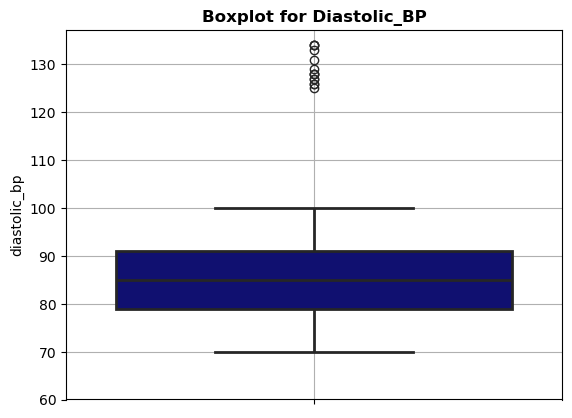

In [272]:
sns.boxplot(data = patients_df,y = 'diastolic_bp',color ='navy',linewidth = 2)
plt.grid(True)
plt.yticks(ticks = range(60,140,10))
plt.title('Boxplot for Diastolic_BP',fontweight = 'bold')
plt.show()

In [273]:
print('Patients with normal diastolic bp are around',round(len(patients_df[patients_df['diastolic_bp'] < 80]) * 100/len(patients_df['diastolic_bp'])),'%.')

Patients with normal diastolic bp are around 26 %.


In [274]:
l = len(patients_df[patients_df['diastolic_bp'] >= 80]) * 100/ len(patients_df['diastolic_bp'])

In [275]:
print('Patients falling under hypertension 1 category to hypertension crisis category are around',round(l),'%')

Patients falling under hypertension 1 category to hypertension crisis category are around 72 %


### ***CATEGORICAL COLUMNS***

#### ***['gender', 'diabetes', 'hypertension', 'discharge_destination', 'insulin_plan', 'a1c_test_result']***

### ***GENDER***

***CONCLUSIONS -***

- `The gender column contains three unique categories: Male, Female, and Other.`
- `The bar chart shows a fairly balanced distribution:`
    - `Male patients account for 2884 entries (34.2%).`
    - `Female patients account for 2744 entries (32.5%).`
    - `Other category accounts for 2801 entries (33.2%).`
- `The pie chart confirms near-equal proportions across gender groups, with slight dominance of male patients.`
- `As, observed before there are no missing values.`

In [276]:
unique = patients_df['gender'].unique()
unique_count = patients_df['gender'].nunique()
print('Gender has',unique_count,'unique categories that are',unique)

Gender has 3 unique categories that are ['Male' 'Other' 'Female']


In [277]:
patients_df['gender'].value_counts(normalize = True) * 100

gender
Male      34.215209
Other     33.230514
Female    32.554277
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Gender Among Patients')

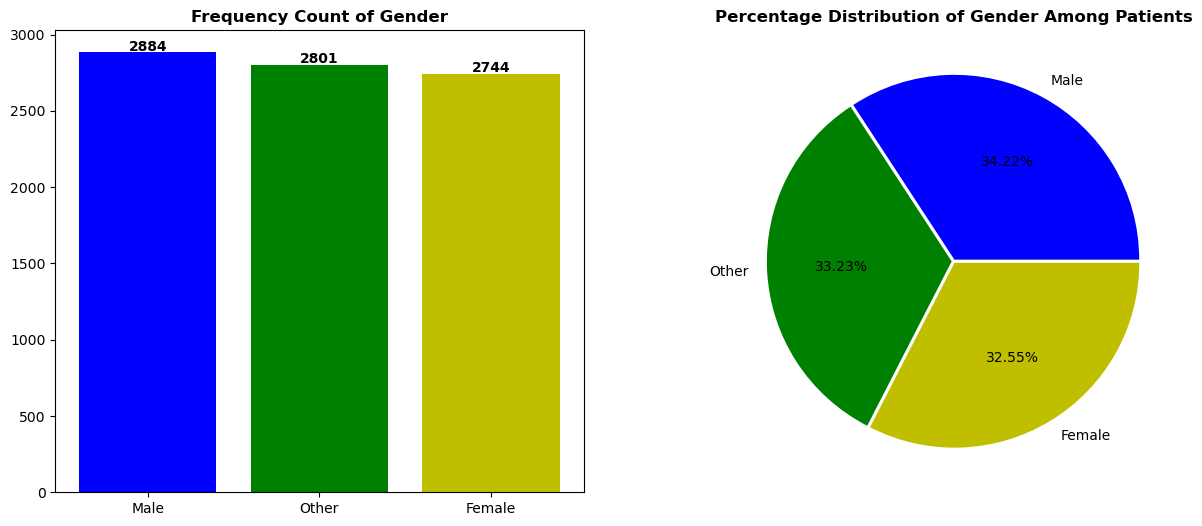

In [278]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = patients_df['gender'].value_counts()
categories = counts.index.to_list()
values = counts.to_list()

ax[0].bar(categories, values,color = ['b','g','y'])
ax[0].set_title("Frequency Count of Gender",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = categories,colors = ['b','g','y'],autopct = '%1.2f%%',explode=[0.01,0.01,0.01])
ax[1].set_title("Percentage Distribution of Gender Among Patients",fontweight= 'bold')

### ***DIABETES***

***CONCLUSIONS -***

- `The diabetes column contains two unique categories: Yes and No.`
- `The bar chart shows a near-equal distribution with some dominance of diabetic patients:`
    - `Yes (patients with diabetes) account for 4340 entries, making up 51.49% of the dataset.`
    - `No (patients without diabetes) account for 4089 entries, making up 48.51% of the dataset.`
- `The pie chart also confirms this balanced distribution, with a slight majority of diabetic patients.`
- `The slight majority of diabetic patients aligns with real-world hospital populations where diabetes is a highly prevalent chronic condition known to increase hospital readmission risk.`
- `As, observed before there are no missing values.`

In [279]:
unique = patients_df['diabetes'].unique()
unique_count = patients_df['diabetes'].nunique()
print('Diabetes has',unique_count,'unique categories that are',unique)

Diabetes has 2 unique categories that are ['No' 'Yes']


In [280]:
patients_df['diabetes'].value_counts(normalize = True)*100

diabetes
Yes    51.488907
No     48.511093
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Diabetes Among Patients')

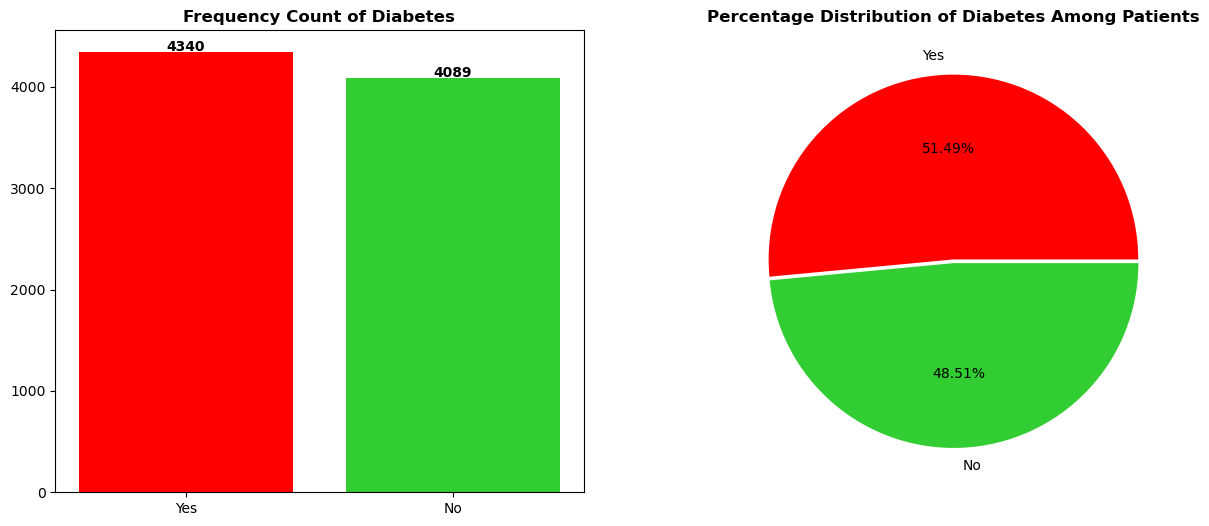

In [281]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = patients_df['diabetes'].value_counts()
categories = counts.index.to_list()
values = counts.to_list()

ax[0].bar(categories, values,color = ['r','limegreen'])
ax[0].set_title("Frequency Count of Diabetes",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = categories,colors = ['r','limegreen'],autopct = '%1.2f%%',explode=[0.01,0.01])
ax[1].set_title("Percentage Distribution of Diabetes Among Patients",fontweight= 'bold')

### ***HYPERTENSION***

***CONCLUSIONS -***

- `The hypertension column contains two unique categories: Yes and No.`
- `The bar chart shows a slightly higher count of patients with hypertension:`
    - `Yes (patients diagnosed with hypertension) accounts for 4376 patients (51.92%).`
    - `No (patients without hypertension) accounts for 4053 patients (48.08%).`
- `The pie chart reflects a fairly balanced distribution, with a slight majority of patients diagnosed with hypertension.`
- `This distribution mirrors real-world healthcare patterns where hypertension (high blood pressure) is a leading contributor to cardiovascular complications, which increases the likelihood of hospitalization and subsequent readmissions.`
- `As, observed before there are no missing values.`


In [282]:
unique = patients_df['hypertension'].unique()
unique_count = patients_df['hypertension'].nunique()
print('Hypertension has',unique_count,'unique categories that are',unique)

Hypertension has 2 unique categories that are ['No' 'Yes']


In [283]:
patients_df['hypertension'].value_counts(normalize = True)*100

hypertension
Yes    51.916004
No     48.083996
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Hypertension Among Patients')

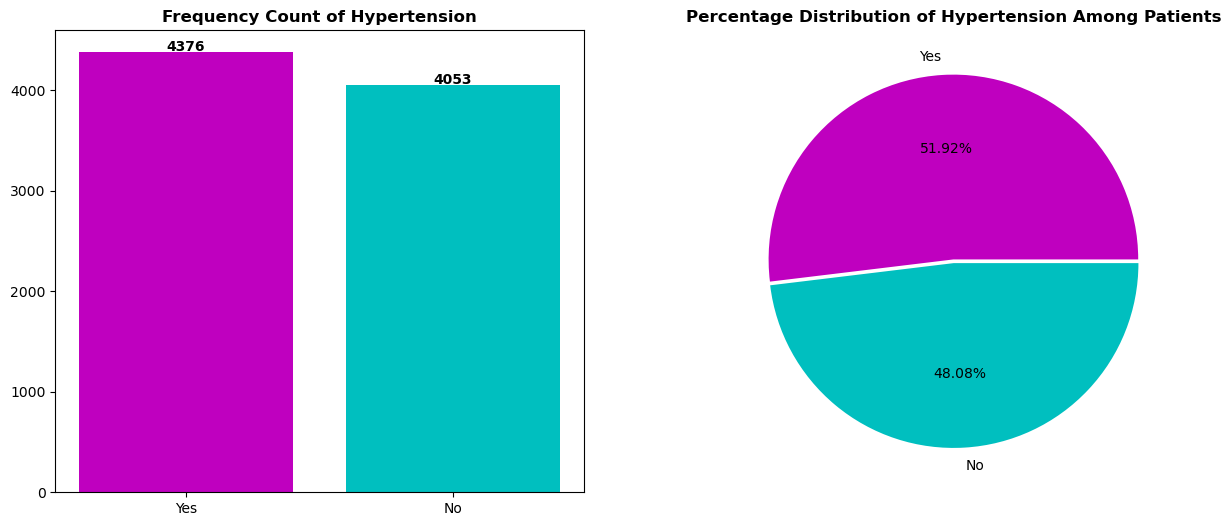

In [284]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = patients_df['hypertension'].value_counts()
categories = counts.index.to_list()
values = counts.to_list()

ax[0].bar(categories, values,color = ['m','c'])
ax[0].set_title("Frequency Count of Hypertension",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = categories,colors = ['m','c'],autopct = '%1.2f%%',explode=[0.01,0.01])
ax[1].set_title("Percentage Distribution of Hypertension Among Patients",fontweight= 'bold')

### ***DISCHARGE_DESTINATION***

***CONCLUSIONS -***

- `The discharge_destination column has 3 unique categories: Home, Rehab, and Nursing_Facility, with 160 missing values.`
- `Home is the most common discharge destination, accounting for 5347 patients (64.66%).`
- `Rehab follows with 1961 patients (23.72%).`
- `Nursing_Facility has 961 patients (11.62%).`
- `The bar chart and pie chart clearly highlight the dominance of home discharges in this dataset. This distribution aligns with real-world expectations, where the majority of patients are discharged home after hospitalization, especially when conditions are stable or manageable without extended care.`
- `Discharges to Rehab and Nursing_Facility indicate more intensive or continued care needs, often related to chronic illness, elderly patients, or those with impaired mobility or recovery complications. `


In [285]:
unique = patients_df['discharge_destination'].unique()
unique_count = patients_df['discharge_destination'].nunique()
print('Discharge_Destination has',unique_count,'unique categories that are',unique.tolist()[0:3])

Discharge_Destination has 3 unique categories that are ['Home', 'Rehab', 'Nursing_Facility']


In [286]:
patients_df['discharge_destination'].value_counts(normalize = True) * 100

discharge_destination
Home                64.66320
Rehab               23.71508
Nursing_Facility    11.62172
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Discharge_Destination Among Patients')

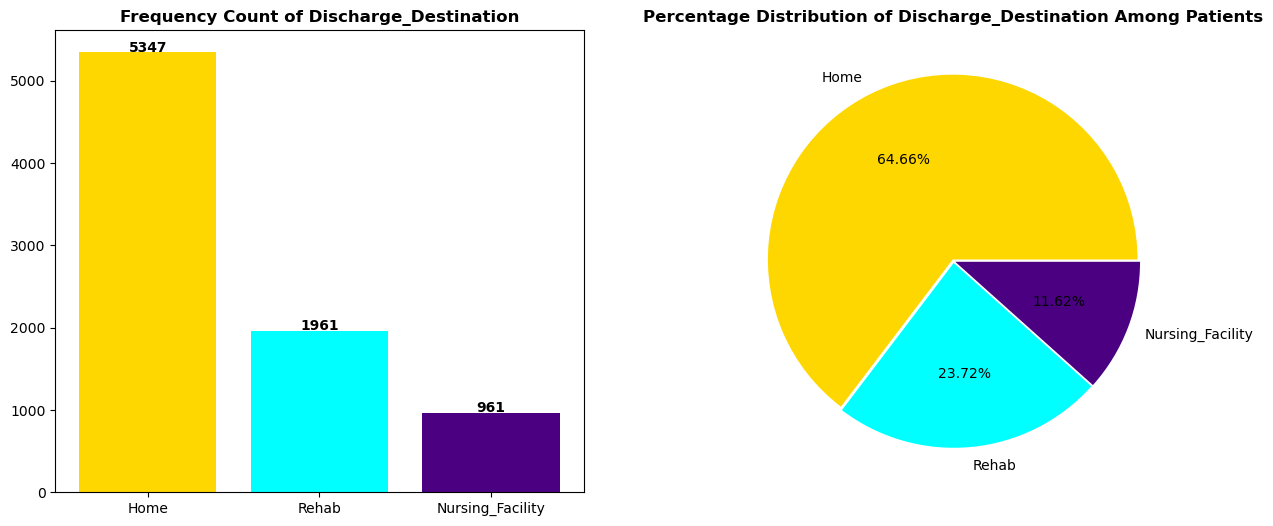

In [287]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = patients_df['discharge_destination'].value_counts()
categories = counts.index.to_list()
values = counts.to_list()

ax[0].bar(categories, values,color = ['gold','cyan','indigo'])
ax[0].set_title("Frequency Count of Discharge_Destination",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = categories,colors = ['gold','cyan','indigo'],autopct = '%1.2f%%',explode=[0.01,0.01,0.01])
ax[1].set_title("Percentage Distribution of Discharge_Destination Among Patients",fontweight= 'bold')

### ***INSULIN_PLAN***

***CONCLUSIONS -***

- `The insulin_plan column shows the insulin-related instructions given to patients at the time of discharge. It tells us whether insulin was started, changed, or continued as it is.`
- `No insulin was prescribed to 53.47% of the patients (4507). These patients were either managing their diabetes without insulin or didn’t need it.`
- `Steady insulin plan was given to 20.76% of patients (1750), meaning their insulin dose stayed the same at discharge.`
- `Down insulin plan (dose reduced) was seen in 12.71% of patients (1071), likely due to better sugar control or risk of low blood sugar.`
- `Up insulin plan (dose increased) was given to 13.06% of patients (1101), possibly due to high blood sugar during hospital stay.`
- `This tells us that more than half didn’t need an insulin, while the rest had an insulin plan in place. Those with changes in their insulin plan (up or down) might need more attention after discharge and could have a higher chance of being readmitted.`
- `As, observed before there are no missing values.`

In [288]:
unique = patients_df['insulin_plan'].unique()
unique_count = patients_df['insulin_plan'].nunique()
print('Insulin_Plan has',unique_count,'unique categories that are',unique)

Insulin_Plan has 4 unique categories that are ['No' 'Down' 'Steady' 'Up']


In [289]:
patients_df['insulin_plan'].value_counts(normalize = True) * 100

insulin_plan
No        53.470163
Steady    20.761656
Up        13.062048
Down      12.706134
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Insulin_Plan Among Patients')

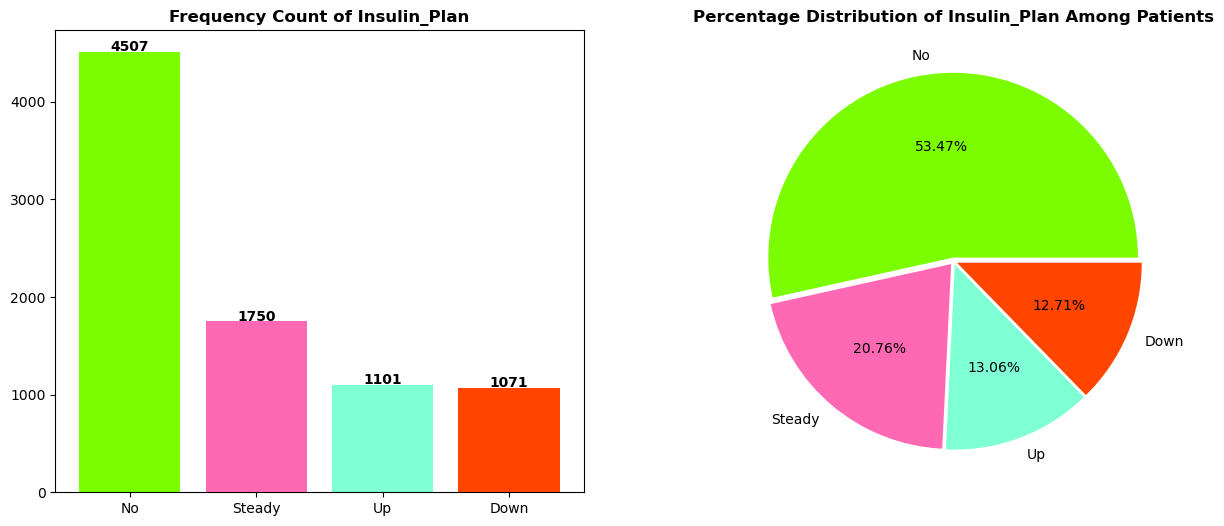

In [290]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = patients_df['insulin_plan'].value_counts()
categories = counts.index.to_list()
values = counts.to_list()

ax[0].bar(categories, values,color = ['lawngreen','hotpink','aquamarine','orangered'])
ax[0].set_title("Frequency Count of Insulin_Plan",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = categories,colors = ['lawngreen','hotpink','aquamarine','orangered'],autopct = '%1.2f%%',explode=[0.02,0.02,0.02,0.02])
ax[1].set_title("Percentage Distribution of Insulin_Plan Among Patients",fontweight= 'bold')

### ***A1C_TEST_RESULT***

***CONCLUSIONS -***

- `The A1C_Test_Result column has four values: '>7', '<7', 'Norm', and 'nan' (missing results).`
- `About 30.34% of patients have A1C > 7, which means their diabetes is not under control and they may need better treatment or follow-up.`
- `29.62% have A1C <= 7, which shows they are managing their blood sugar well or maybe pre-diabitic.`
- `About 20.68% were marked as 'Norm', which may refer to non-diabetic patients or normal A1C levels.`
- `Around 20% of patients(1632) have missing A1C test results, which might mean the test wasn’t done or data wasn’t recorded.`
- `The bar and pie charts show a fairly even distribution between high and low A1C groups.`
- `The distribution is fairly even among all known categories, with a slight tilt toward uncontrolled diabetes.`
- `This feature is very useful when predicting readmissions, since patients with higher A1C may be at greater risk of needing hospital care again.`

Link to reference - https://my.clevelandclinic.org/health/diagnostics/9731-a1c

In [291]:
unique = patients_df['a1c_test_result'].unique()
unique_count = patients_df['a1c_test_result'].nunique()
print('A1C_Test_Result has',unique_count,'unique categories that are',unique.tolist()[1:])

A1C_Test_Result has 3 unique categories that are ['Norm', '>7', '<=7']


In [292]:
patients_df['a1c_test_result'].value_counts(normalize = True,dropna = False) * 100

a1c_test_result
>7      30.335746
<=7     29.623917
Norm    20.678610
NaN     19.361727
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of A1C_Test_Result Among Patients')

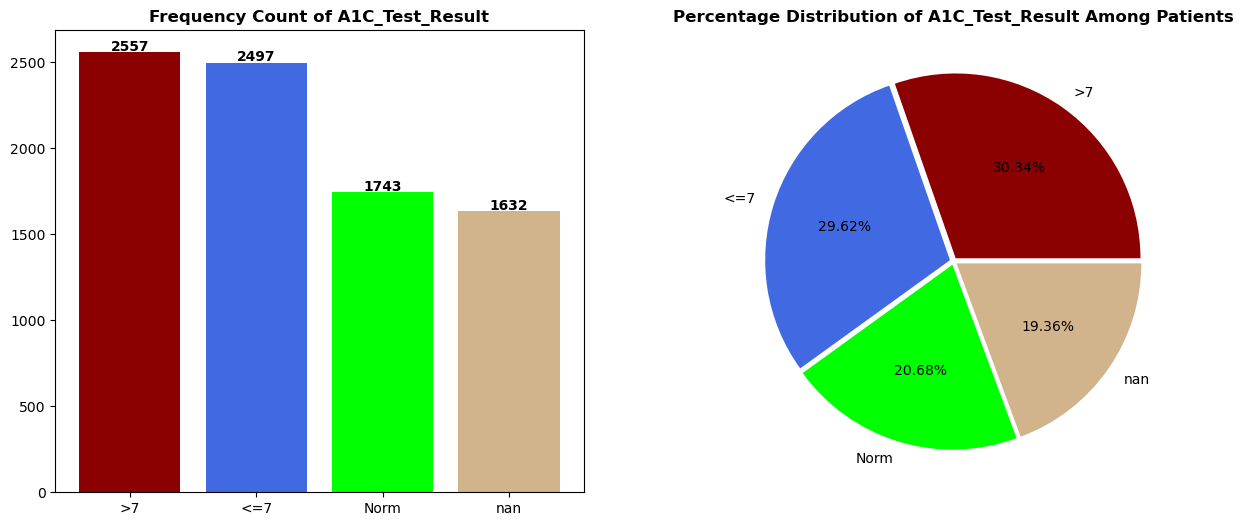

In [293]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = patients_df['a1c_test_result'].value_counts(dropna = False)
categories = counts.index.to_list()
values = counts.to_list()
# Convert all categories to strings for labeling( as NaN is considered float value.)
labels = [str(cat) for cat in categories]

ax[0].bar(labels, values,color = ['darkred','royalblue','lime','tan'])
ax[0].set_title("Frequency Count of A1C_Test_Result",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = labels,colors = ['darkred','royalblue','lime','tan'],autopct = '%1.2f%%',explode=[0.02,0.02,0.02,0.02])
ax[1].set_title("Percentage Distribution of A1C_Test_Result Among Patients",fontweight= 'bold')

### ***KEY FINDINGS FROM UNIVARIATE ANALYSIS***

- `Most patients fall between 60 to 85 years of age, supporting the fact that middle-aged and older individuals are more prone to readmissions due to chronic conditions.`
- `A lot of patients have more than one health problem like diabetes, high blood pressure, or high cholesterol — which increases their chances of returning to the hospital.`
- `Blood sugar levels(A1C) and blood pressure readings show many patients are not well controlled, especially those with A1C over 7 or high BP — meaning they may need more medical attention.`
- `Some patients stay in the hospital for a very long time, much longer than average — which may point to serious illness or complications.`
- `Many patients take multiple medications, with some around 10  — this raises concerns about medication overload, poor adherence, and potential side effects.`
- `Cholesterol and BMI values show a wide range, indicating the presence of both high-risk (obese, high cholesterol) and low-risk individuals — making personalized care important.`

## ***3.2 BIVARIATE ANALYSIS***

***`In this section, we explore the relationship between individual features and the target variable readmitted_30_days.
We’ll analyze how both numerical and categorical variables influence the likelihood of hospital readmission.
This helps identify patterns, trends, and potential predictors for building an effective machine learning model.`***

- ***`THE TARGET VARIABLE -  'readmitted_30_days'`***
- ***`CATEGORICAL COLUMNS - ['gender', 'diabetes', 'hypertension', 'discharge_destination', 'insulin_plan', 'a1c_test_result']`***
- ***`NUMERICAL COLUMNS - ['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay', 'num_inpatient_visits', 'disease_burden_score', 'systolic_bp, 'diastolic_bp']`***

### ***NUMERICAL COLUMNS VS THE TARGET COLUMN - 'READMITTED_30_DAYS'***

***CONCLUSIONS -***  **Across all numerical variables analyzed, including `age`, `cholesterol`, `bmi`, `medication_count`,`disease_burden_score`, `systolic_bp` and `diastolic_bp` no single feature showed strong separation between readmitted and non-readmitted patients. Most variables had nearly identical averages, medians, and overlapping distributions, suggesting limited predictive power individually. Slight differences were observed in `age`,`disease_burden_score` and `num_inpatient_visits`, but even these were marginal. Overall, readmission appears to be influenced by a combination of subtle factors, rather than any one numeric feature alone.`**


In [294]:
#  Defining a function for analyzing numerical vs target variable

def plot_numerical_vs_target(df, column, target = 'readmitted_30_days'):
    """
    Plots Barplot, Boxplot, and KDE Plot for a numerical column vs a binary categorical target.
    Args:
        df (DataFrame): The input dataframe
        column (str): Numerical column name
        target (str): Target variable (default is 'readmitted_30_days')
    """
    fig, ax = plt.subplots(1, 3, figsize=(18,8))

    # Bar Plot: Average value of the numerical column grouped by target
    sns.barplot(data = df, hue = target, y = column, ax = ax[0], palette = 'brg', errorbar = None,gap = 0.1)
    ax[0].set_title("Average {} by {}".format(column.title(), target.title()), fontweight='bold')
    ax[0].grid(True)

    # Box Plot: Distribution of numerical column across target values
    sns.boxplot(data = df, hue = target, y = column, ax = ax[1], palette = 'hot',gap = 0.1)
    ax[1].set_title("{} Distribution by {}".format(column.title(), target.title()), fontweight='bold')
    ax[1].grid(True)

    # KDE Plot: Smoothed density for each category in target
    for label, color in zip(df[target].dropna().unique(), ['lime','red']):
        sns.kdeplot(data = df[df[target] == label], x = column, ax = ax[2], label = label,linewidth = 2,color = color)

    ax[2].set_title("{} KDE by {}".format(column.title(), target.title()), fontweight='bold')
    ax[2].grid(True)
    ax[2].legend()

    plt.tight_layout()
    plt.show()


In [295]:
numerical_cols = patients_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay', 'num_inpatient_visits', 'disease_burden_score', 'systolic_bp', 'diastolic_bp']


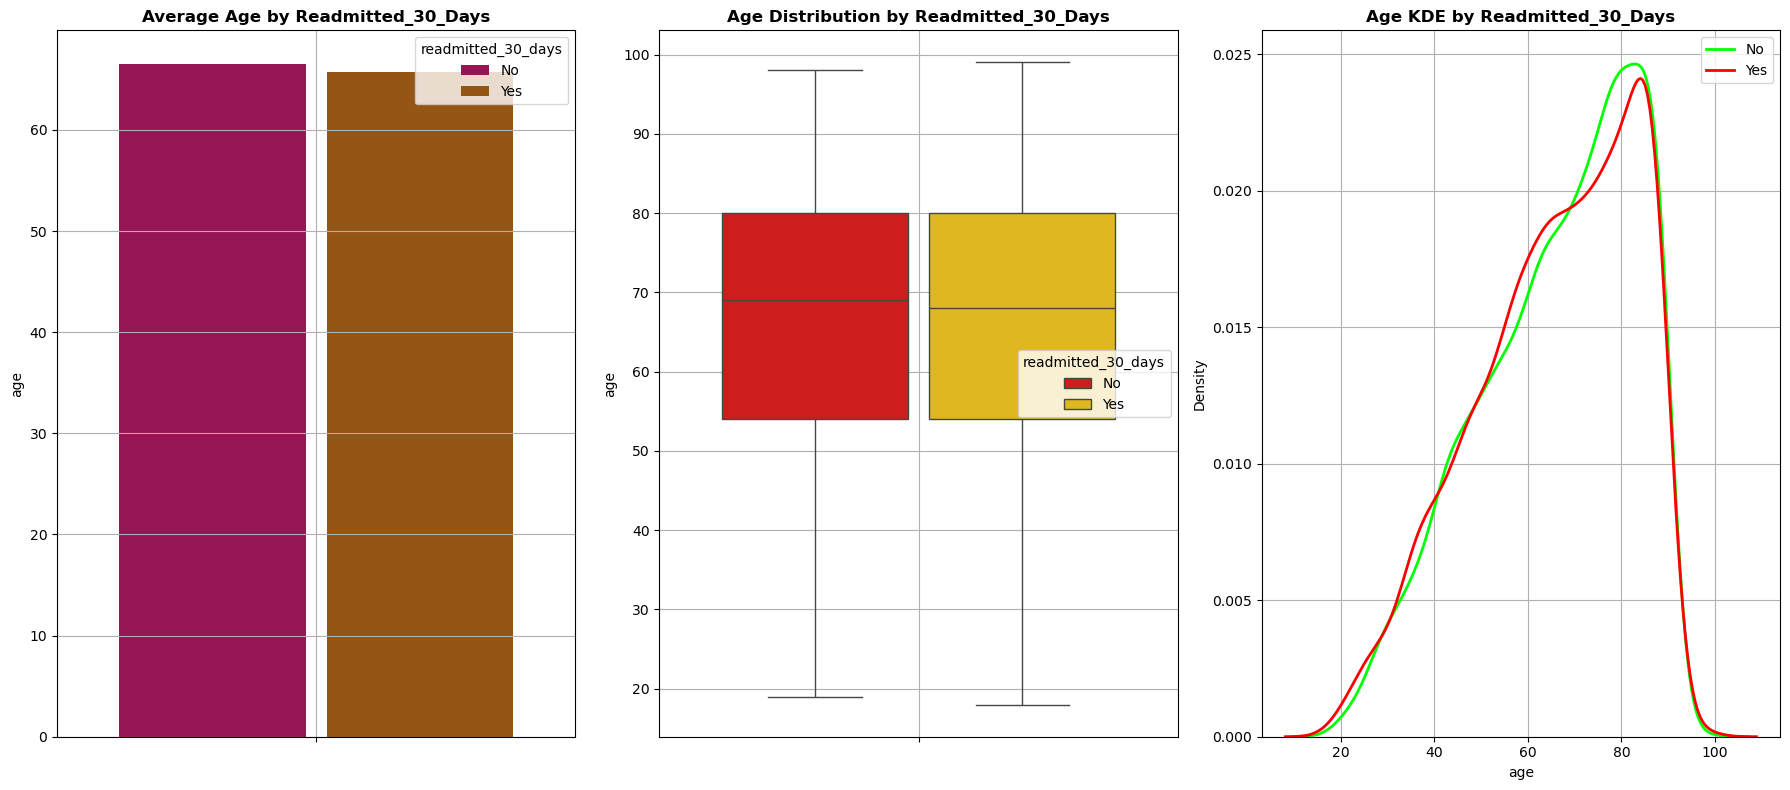

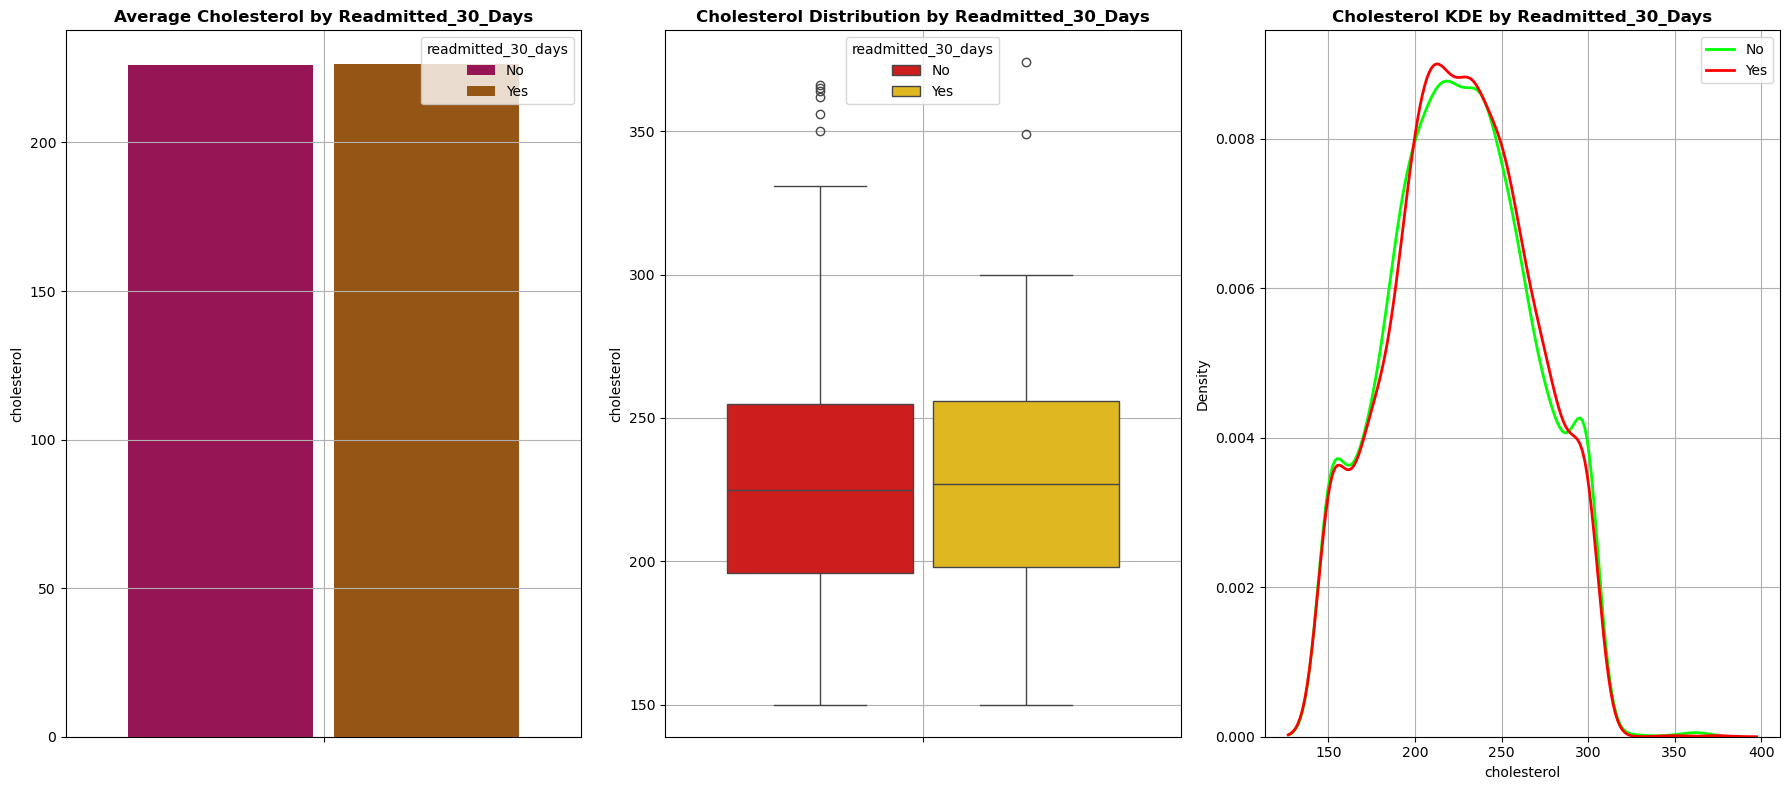

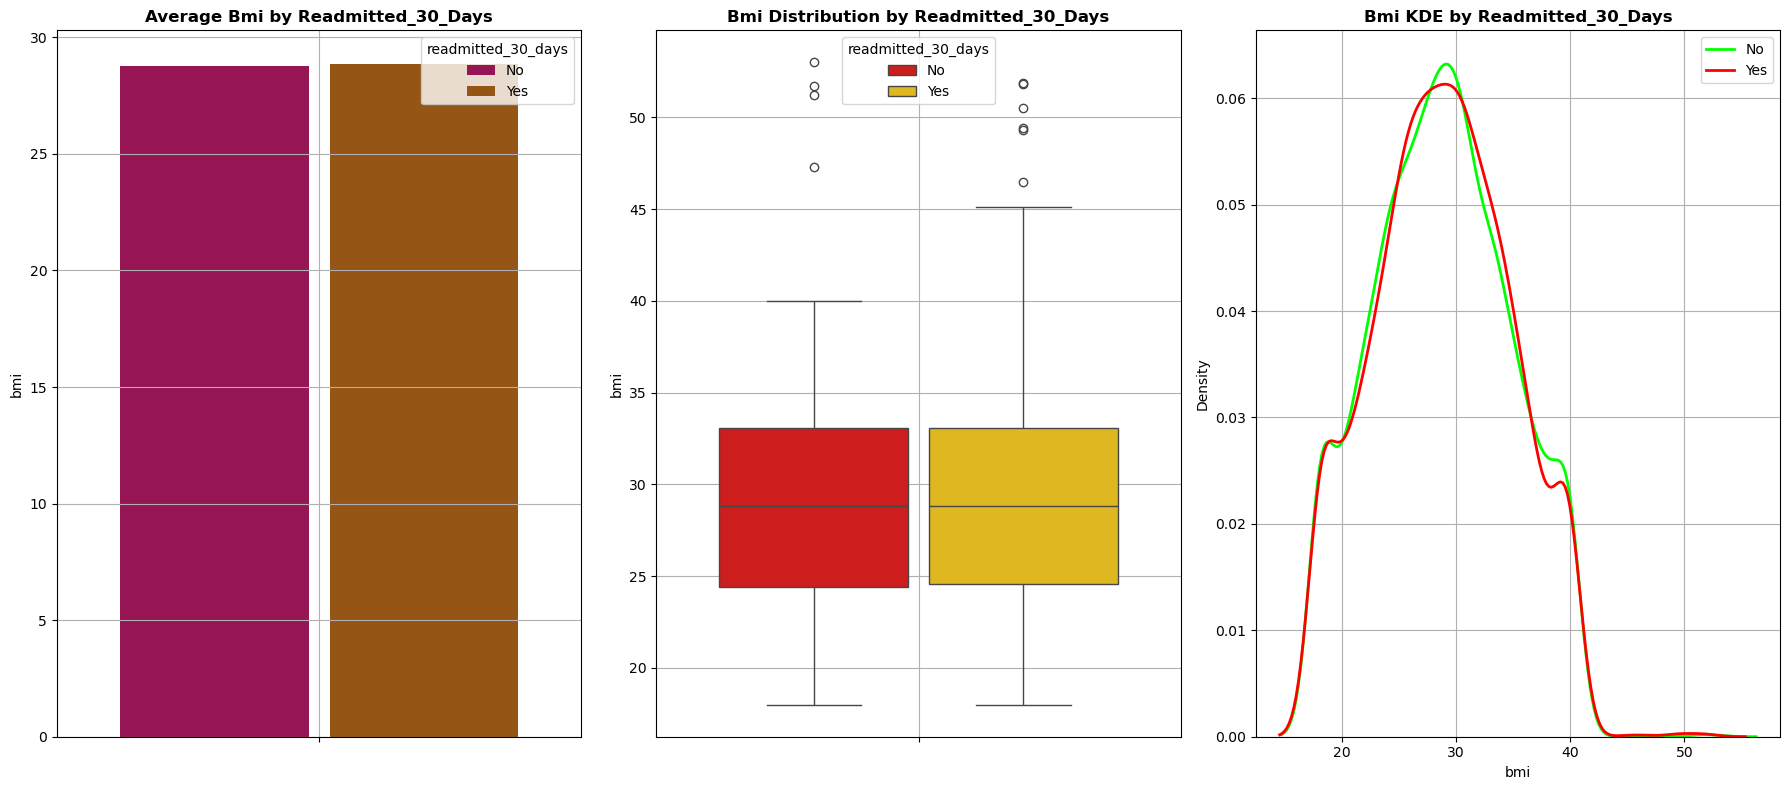

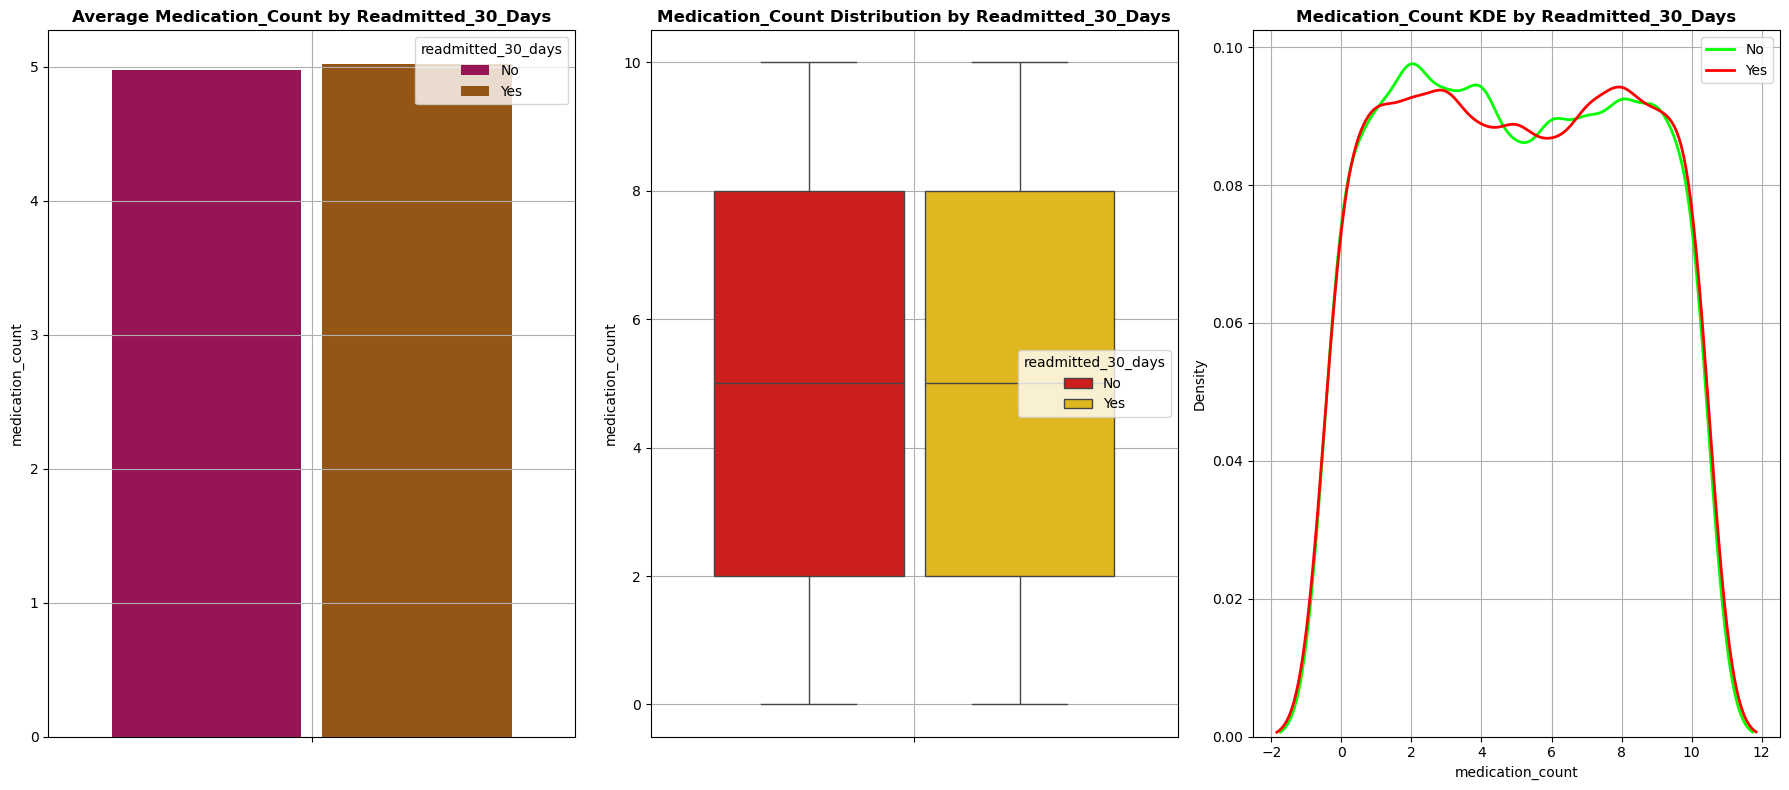

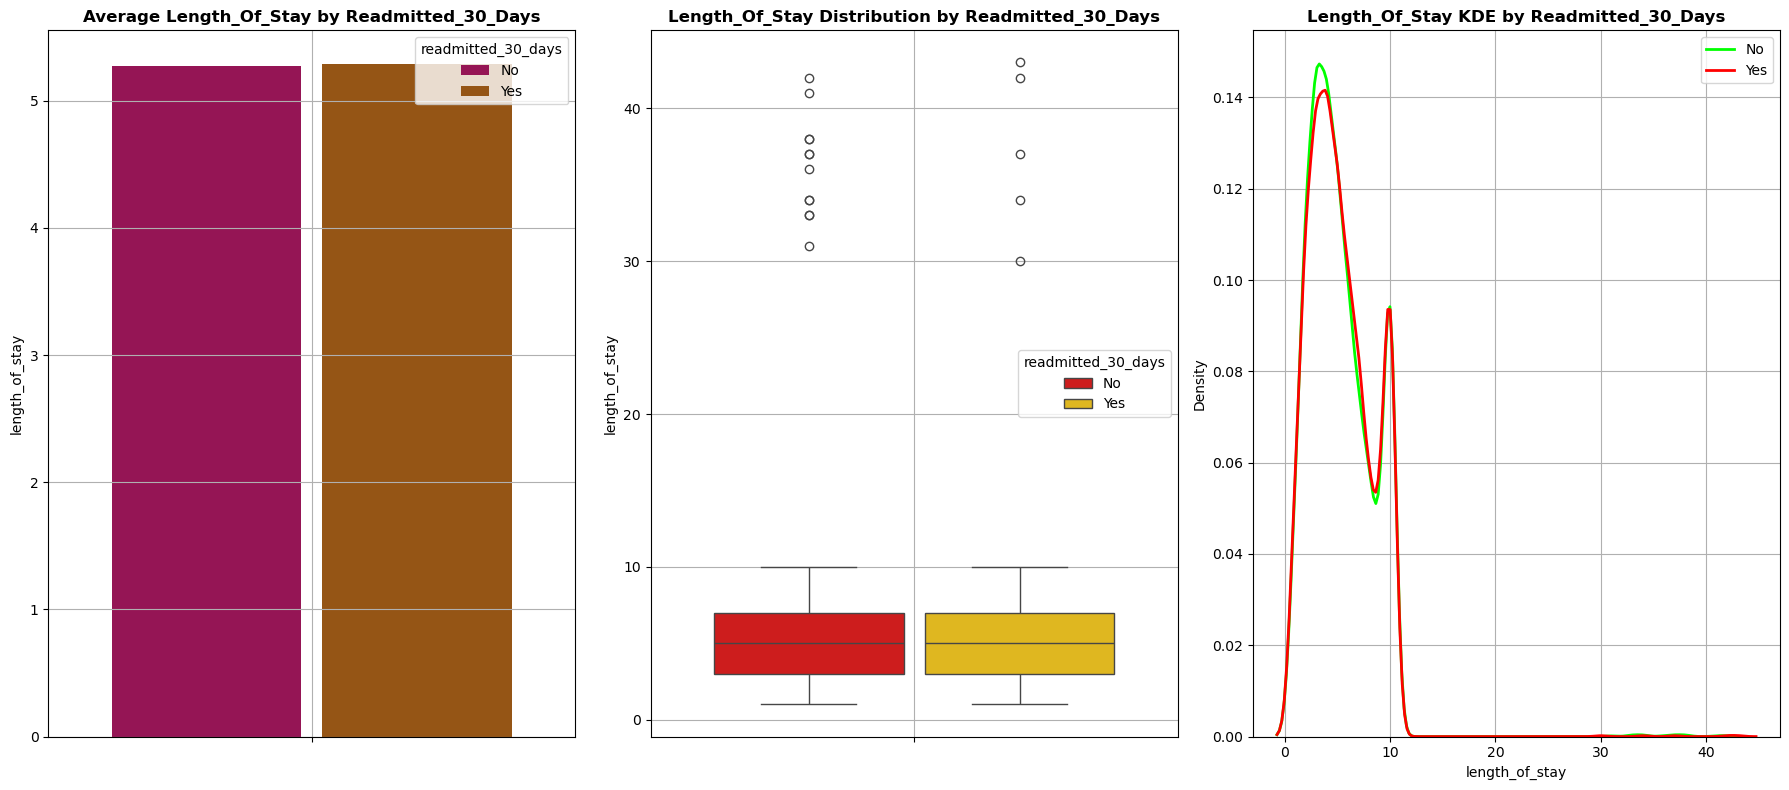

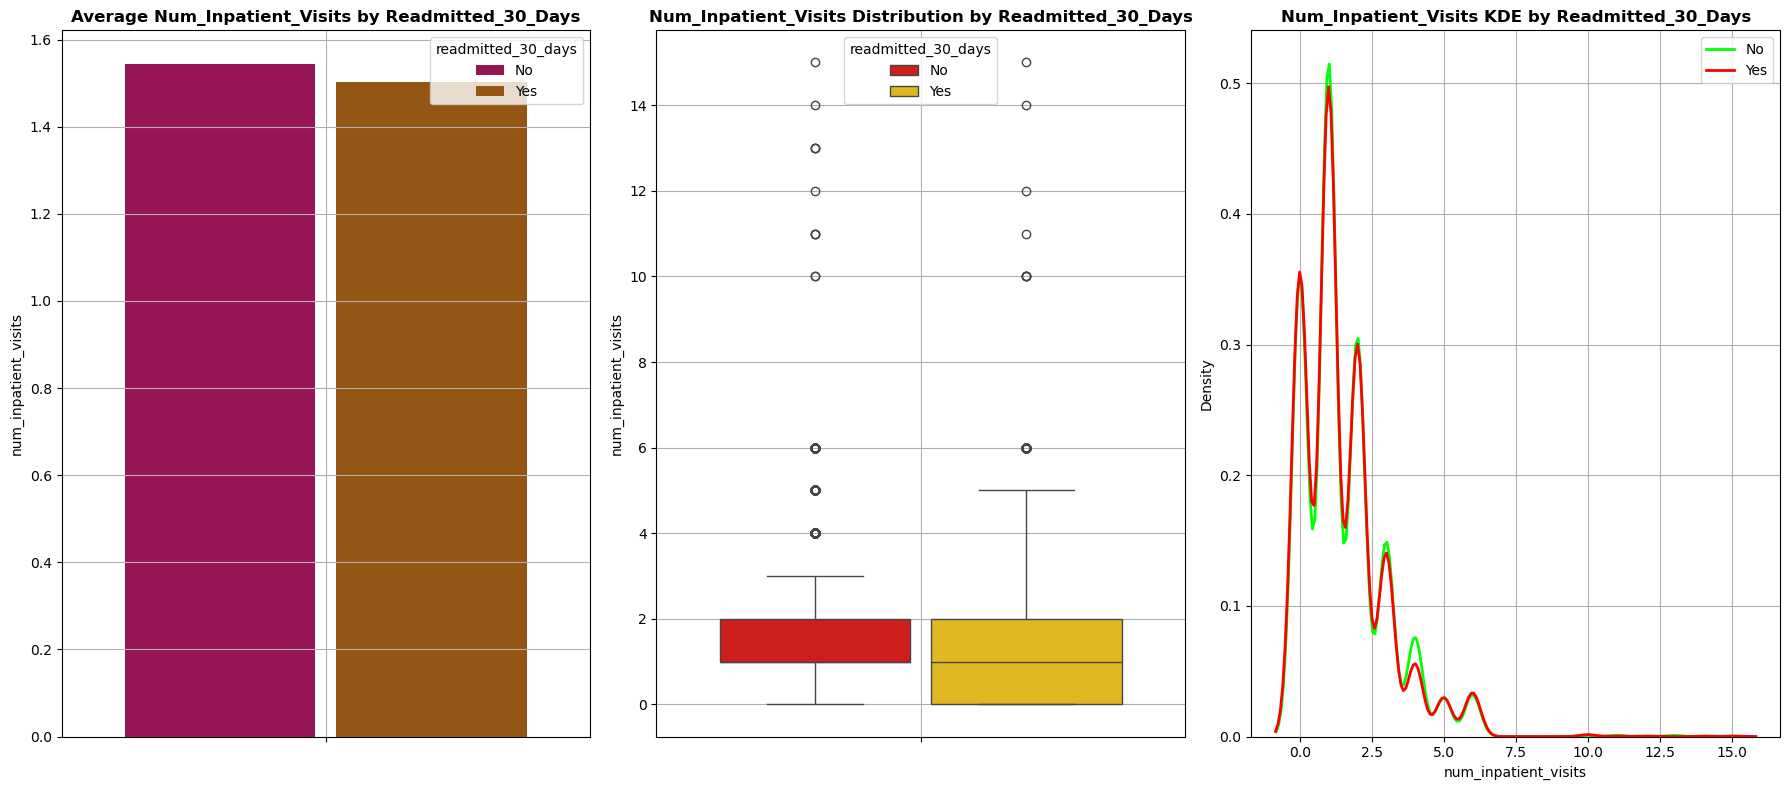

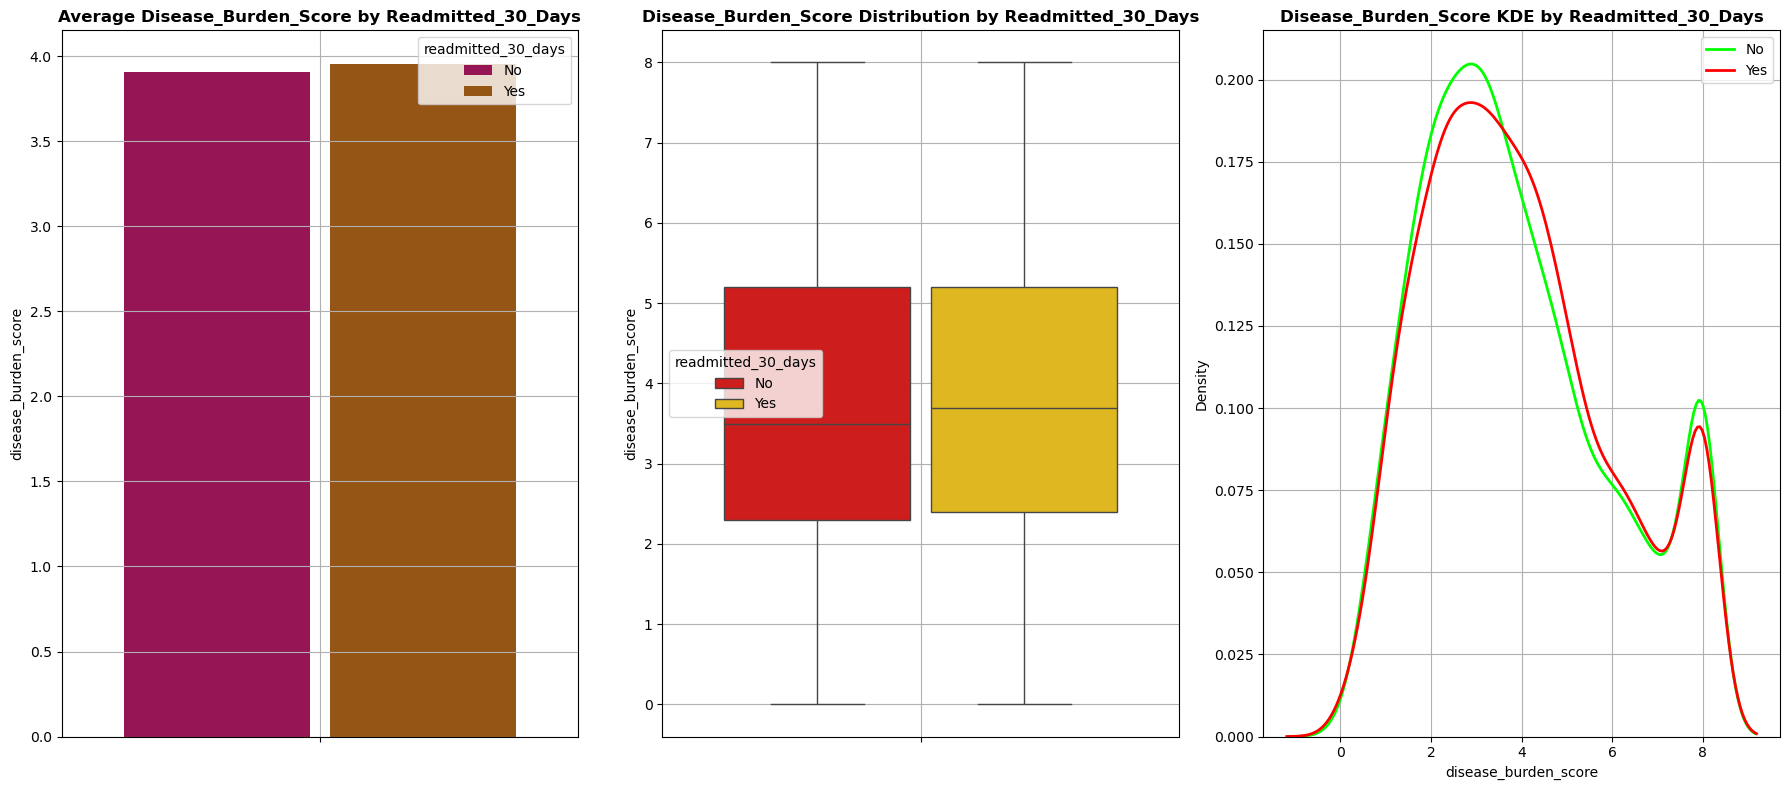

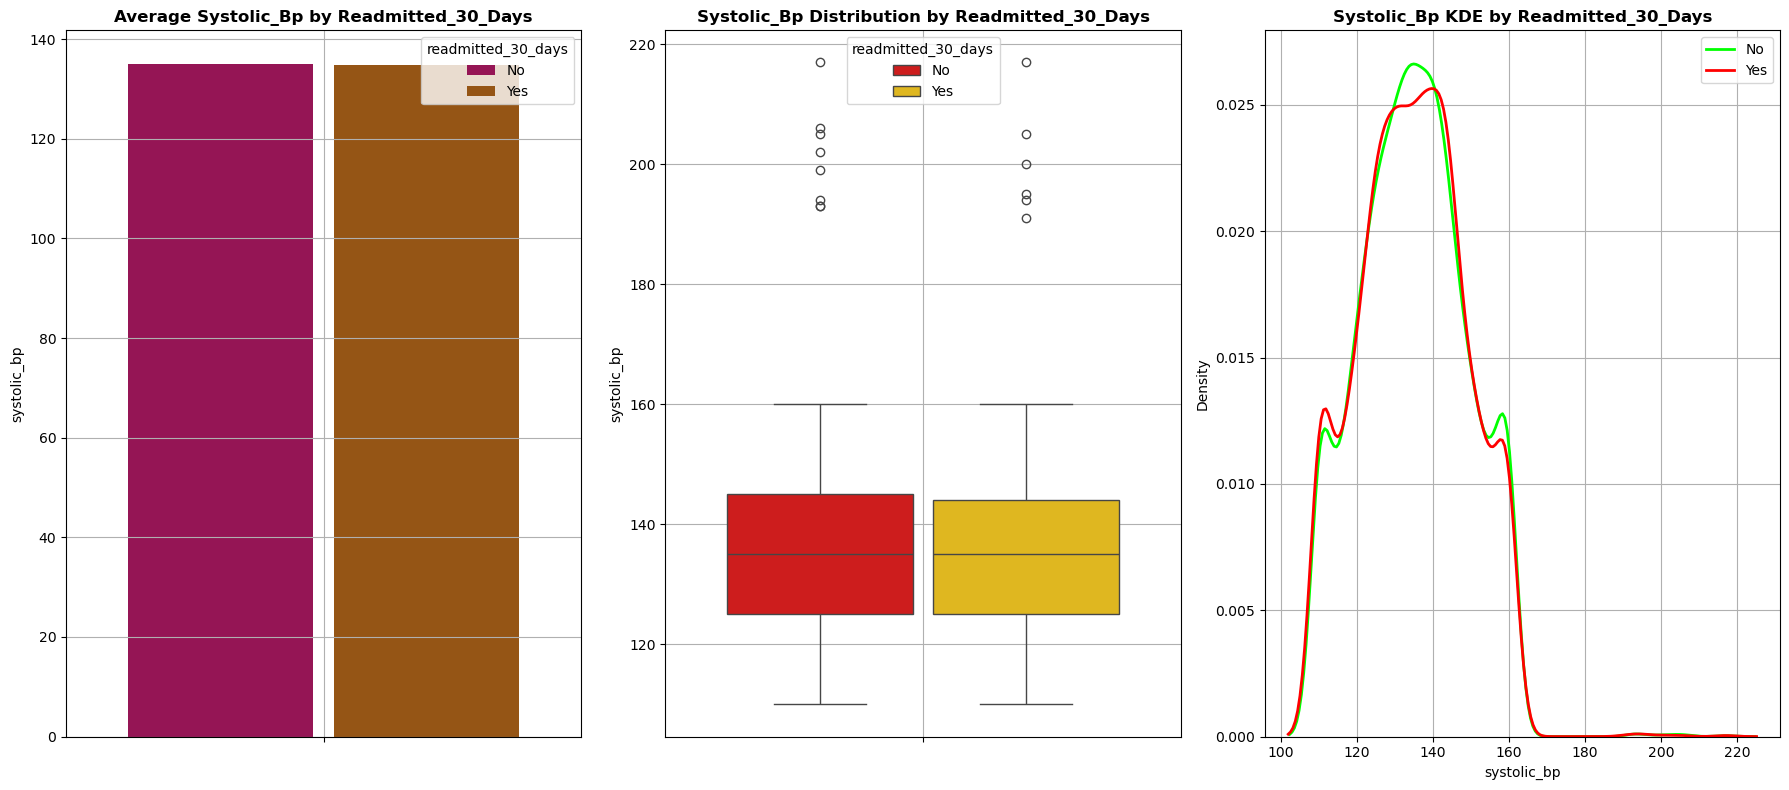

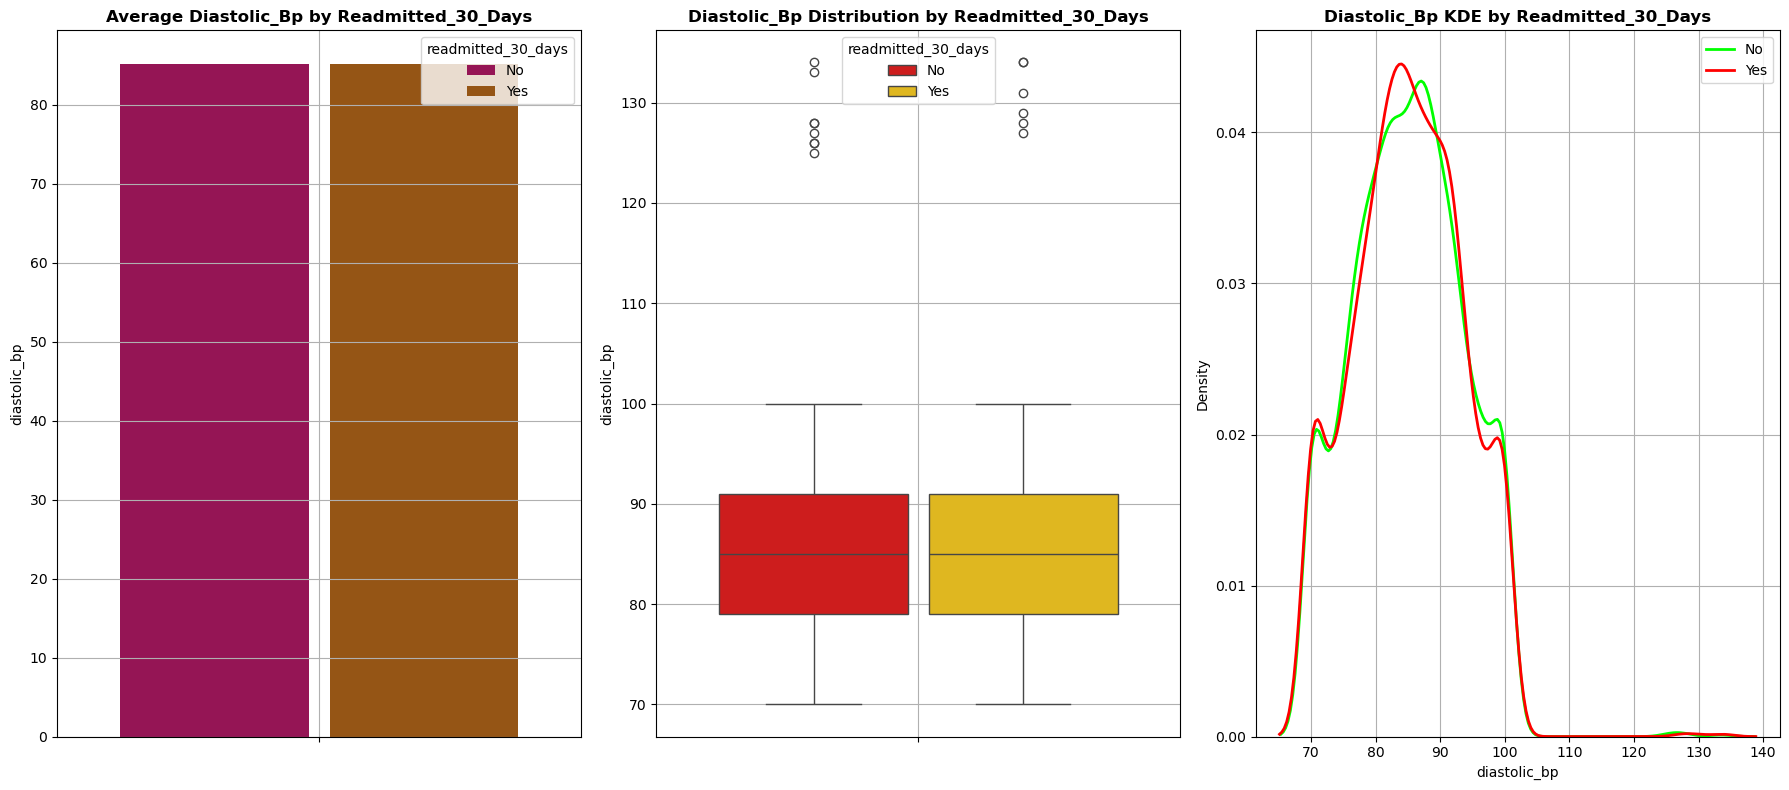

In [296]:
for col in numerical_cols:
    plot_numerical_vs_target(patients_df,col)

#### ***KEY FINDINGS -***

- The comparison of patient `age` across readmission status reveals no substantial difference between the two groups. The bar plot shows that the average `age` is nearly identical for both readmitted and non-readmitted patients, hovering around the mid-60s. The boxplot further confirms this observation, with overlapping interquartile ranges and similar medians—approximately at 65 years—for both classes. Additionally, the KDE plot illustrates overlapping density curves, with the only minor deviation being a slightly higher density for non-readmitted patients near the 70-year mark.
``age`` does not appear to be a strong differentiator for predicting 30-day readmission in this dataset. Despite minor visual differences, the overall ``age`` distribution is consistent across both groups. Therefore, ``age`` may be considered a low-impact feature on its own, and should likely be used in combination with other clinical variables to add value in a machine learning model.

- The average `cholesterol` levels are nearly identical between patients who were readmitted within 30 days and those who were not. The bar plot clearly shows that both groups have mean `cholesterol` values around 225–230 mg/dL.Looking at the boxplot, both classes have a fairly similar spread of values, with slightly more outliers in the non-readmitted group.The median `cholesterol` level for both classes is approximately 220–225 mg/dL, and the interquartile ranges overlap considerably, confirming a very similar distribution.The KDE plot further reinforces this conclusion. The density curves for both readmitted and non-readmitted patients follow an almost identical trajectory, peaking around 225 mg/dL. There's only a minor density bump near 280 mg/dL in the non-readmitted group, but it is not prominent enough to suggest a meaningful distinction.`Cholesterol`, as a standalone variable, does not show significant predictive power for 30-day hospital readmission. Its distribution, central tendency, and density are all closely aligned between the two classes. While `cholesterol` is medically relevant, in this dataset, it is likely to act as a neutral or low-impact feature unless it interacts with other clinical conditions or variables.

- The average `bmi` for both readmitted and non-readmitted patients is very similar, hovering around 29, as seen in the bar plot. The boxplots show overlapping distributions with nearly identical medians (close to 28–29), and a few high outliers in both groups extending above 45. The KDE curves also overlap almost completely, with both groups peaking around a `bmi` of 30. This suggests that `bmi` distribution is consistent across both readmission outcomes, and `bmi` does not appear to be a strong differentiator for predicting 30-day readmission.

- The average number of `medication_count` taken by readmitted and non-readmitted patients is nearly identical, both close to 5, as indicated in the bar plot. The boxplots show similar interquartile ranges (approx. 2 to 8) and medians around 5 for both groups, suggesting no significant shift in `medication_count` between readmission statuses. The KDE curves for both classes are nearly overlapping, showing a uniform-like spread from 0 to 10 medications, with no clear peak. These observations indicate that `medication_count` does not show any strong separation or pattern with respect to 30-day readmission, and therefore, it may have limited predictive power in isolation.

- The average `length_of_stay` is slightly higher for patients readmitted within 30 days compared to those who were not, but the difference is marginal. The boxplots reveal that both groups share a similar spread (IQR ~2 to 7), with medians around 4–5 days. Notably, both distributions have a small number of outliers reaching beyond 30 days, indicating occasional prolonged hospitalizations. The KDE plot shows a prominent peak at short stays (1–3 days) for both classes, with the green curve slightly dominating. Overall, while longer stays are slightly more common among readmitted patients, the overlap is substantial, suggesting that `length_of_stay` may have mild predictive value but is not a strong standalone discriminator.

- Patients readmitted within 30 days had a slightly lower average `num_inpatient_visits` count (~ 1.5) compared to those not readmitted (~ >1.5), showing minimal difference. The boxplot reveals a higher median and more outliers for the non-readmitted group. KDE plots show similar distributions, with a slight peak at 1 visits for non-readmitted patients. In summary, overall predictive power of `num_inpatient_visits` seems limited due to the high degree of overlap between the two classes. The feature may contribute moderately to a predictive model but is not strongly discriminative on its own.

- The average `disease_burden_score` for both groups those readmitted within 30 days and those not are nearly identical(around 3.9) with marginal dominance for readmitted patients. The box plot dives deeper by showing the spread and median. Both groups have silghtly different medians and interquartile ranges, still indicating that the overall distribution of `disease_burden_score` is quite similar for both. The KDE adds nuance to this story. The red line (Yes) and green line (No) almost overlap, but with some subtle variation especially in the peaks around scores b/w 2-4 and 8.The differences between readmitted and non-readmitted groups in terms of `disease_burden_score` are minor and not visually significant. This suggests that readmission is likely driven by multiple interacting factors, and `disease_burden_score`, though important, may not be a strong standalone predictor.

- At first glance, the average `systolic_bp` is nearly identical for both groups roughly around 134–135 mmHg. Moving to the box plot, both groups again share very similar median values (~ 136 mmHg), with similar interquartile ranges. The main visual distinction lies in a few extreme outliers above 180 mmHg, present in both groups. This tells us that while a small number of patients have dangerously high BP, it doesn’t seem to consistently tip the scale toward readmission. Finally, the KDE plot offers a detailed look at distributional shapes. The green line (not readmitted) peaks slightly higher than the red line (readmitted), but the overall shapes almost mirror each other, especially in the normal `sytolic_bp` range (~120–140 mmHg). Any differences are too minor to make `systolic_bp` a reliable predictor on its own.

- The average `diastolic_bp` is nearly identical for both readmitted and non-readmitted groups (~85 mmHg), showing no noticeable mean difference. Both distributions share similar medians and spread, with a few high outliers in both groups. This again supports the idea that `diastolic_bp` doesn’t significantly shift with readmission status. The density curves overlap almost entirely, with only minimal variation. Both groups peak around the same range (80–90 mmHg), reinforcing the weak association. Like `systolic_bp`, `diastolic_bp` shows no strong visual correlation with 30-day readmissions. It likely plays a minor or indirect role in influencing the outcome.


### ***CATEGORICAL COLUMNS VS THE TARGET COLUMN - 'READMITTED_30_DAYS'***

***CONCLUSIONS -*** **Among all categorical features, `discharge_destination` and `insulin_plan` at discharge had the strongest link to 30-day readmission—patients sent to care facilities or given insulin changes were more likely to return. `diabetes`, `hypertension`, and missing or abnormal `a1c_test_results` also showed a slight increase in risk. `gender` had no real impact. Overall, health condition and post-discharge planning seem more important than basic demographics in predicting readmission. These patterns highlight the need for better discharge strategies and closer monitoring of high-risk patients to reduce early hospital returns.**

In [297]:
#  defining a function for analyzing categorical vs target variable

def analyze_categorical_vs_target(df, cat_col, target_col='readmitted_30_days'):
    
    print("---Normalized Contingency Table for '{}' vs '{}'---\n".format(cat_col, target_col))
    
    # Normalized table for heatmap (col-wise %)
    # (i.e, How feature category distribution varies within each target class)
    norm_crosstab = pd.crosstab(df[target_col],df[cat_col], normalize='columns') * 100
    print(norm_crosstab, "\n")

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(15,6))

 
    # Countplot
    sns.countplot(data = df, x = cat_col, hue = target_col, ax = ax[0], palette = 'brg')
    ax[0].set_title("Countplot of '{}' by '{}'".format(cat_col, target_col), fontweight = 'bold')
    ax[0].grid(True)
    
    # Heatmap
    sns.heatmap(norm_crosstab, annot = True,cmap = 'viridis',fmt = ".2f", ax = ax[1])
    ax[1].set_title("Proportion Heatmap of '{}' vs '{}'".format(cat_col, target_col), fontweight = 'bold')

    plt.tight_layout()
    plt.show()
    print('\n')


In [298]:
categorical_cols = patients_df.select_dtypes(include=['object']).columns.tolist()[0:5]
print(categorical_cols)

['gender', 'diabetes', 'hypertension', 'discharge_destination', 'insulin_plan']


---Normalized Contingency Table for 'gender' vs 'readmitted_30_days'---

gender                 Female       Male      Other
readmitted_30_days                                 
No                  55.976676  56.380028  55.622992
Yes                 44.023324  43.619972  44.377008 



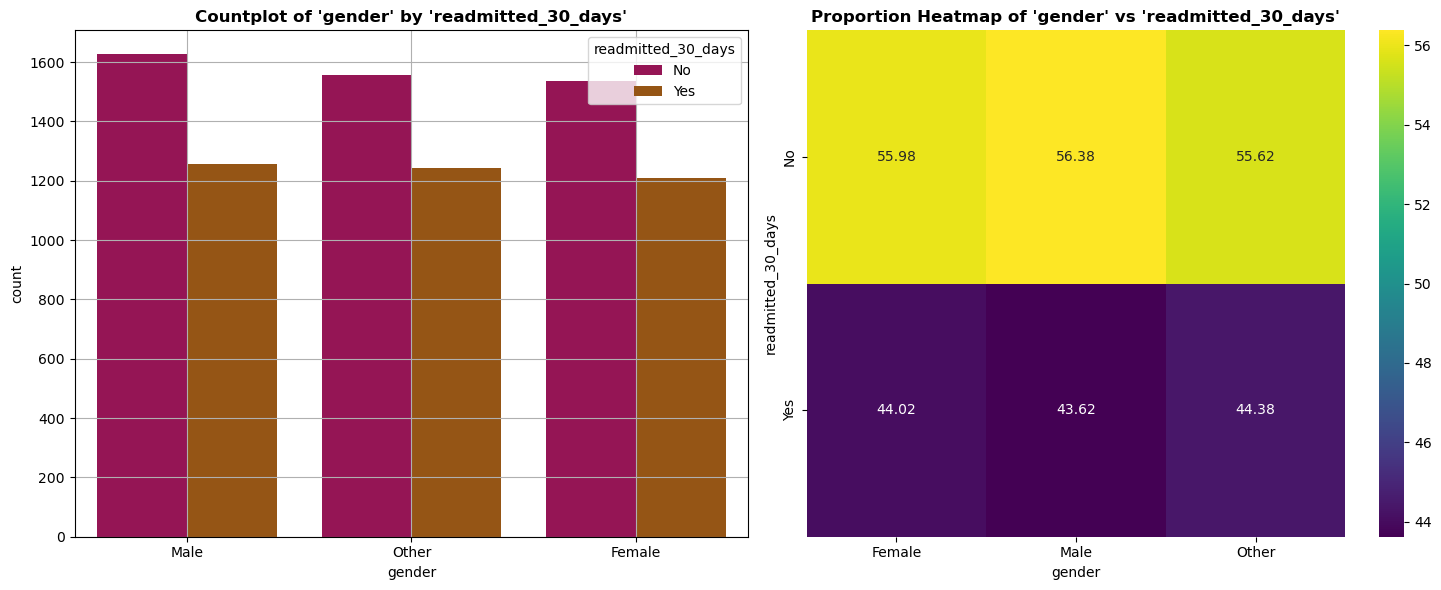



---Normalized Contingency Table for 'diabetes' vs 'readmitted_30_days'---

diabetes                   No        Yes
readmitted_30_days                      
No                  58.033749  54.078341
Yes                 41.966251  45.921659 



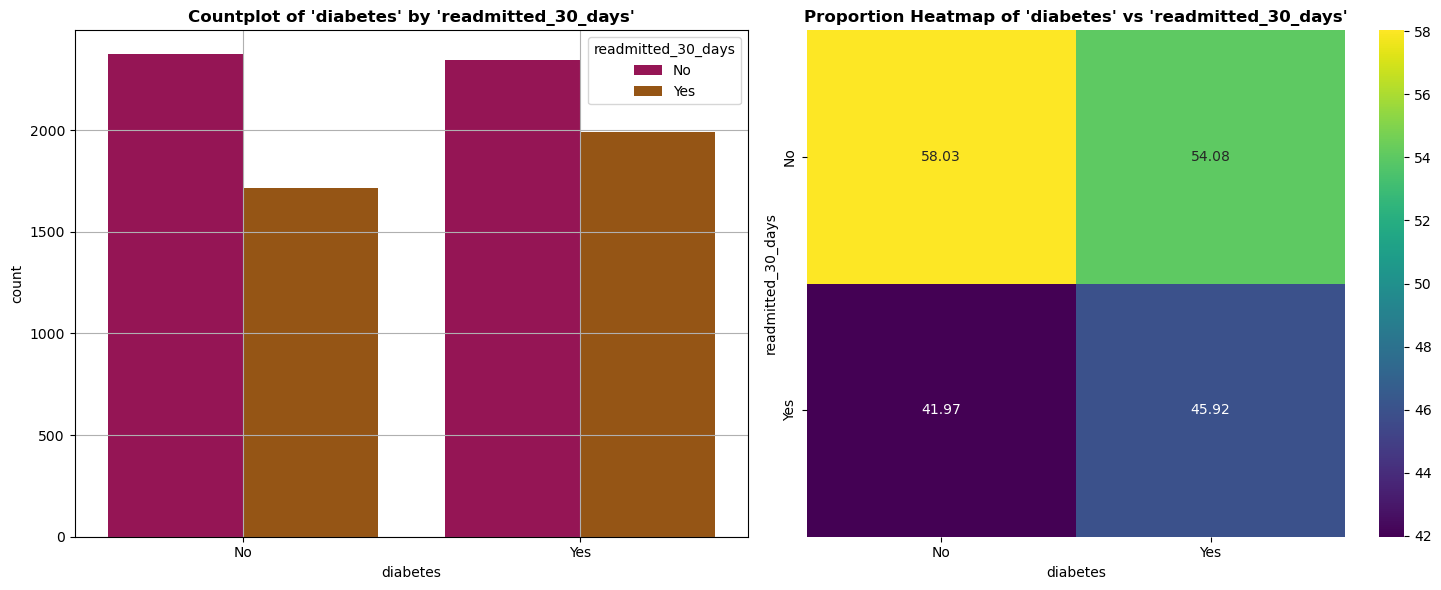



---Normalized Contingency Table for 'hypertension' vs 'readmitted_30_days'---

hypertension               No       Yes
readmitted_30_days                     
No                  56.822107  55.23309
Yes                 43.177893  44.76691 



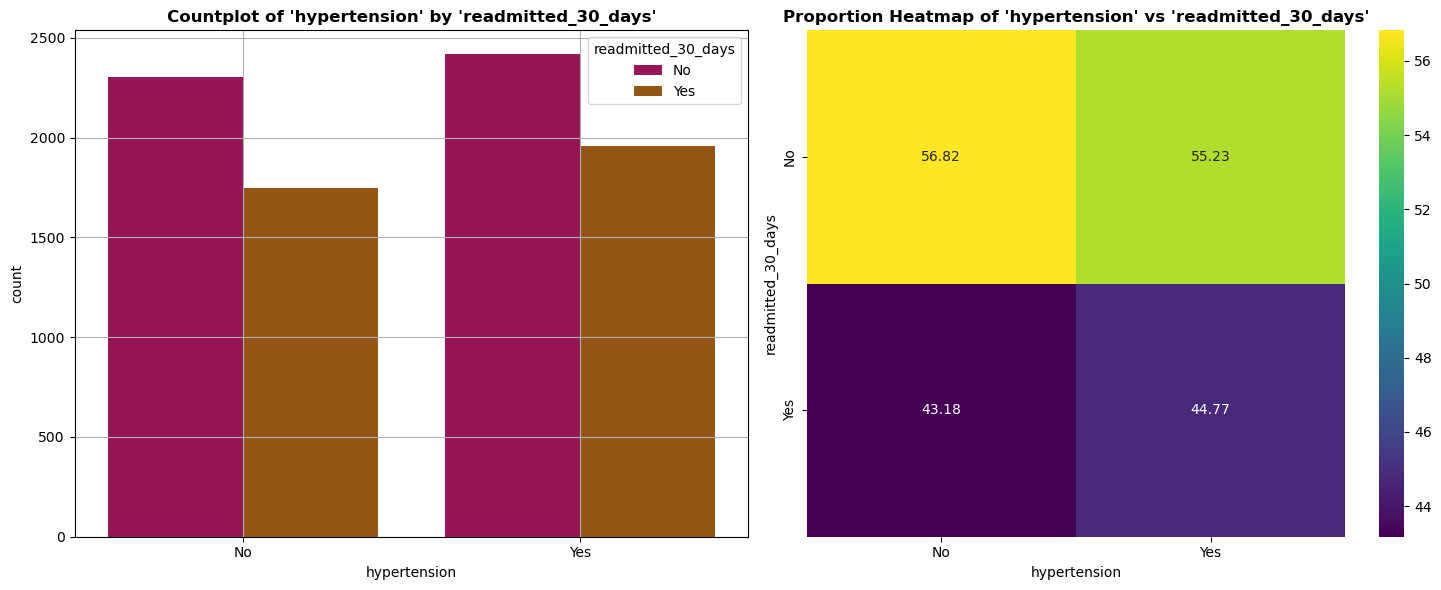



---Normalized Contingency Table for 'discharge_destination' vs 'readmitted_30_days'---

discharge_destination       Home  Nursing_Facility     Rehab
readmitted_30_days                                          
No                     61.230597         46.826223  46.45589
Yes                    38.769403         53.173777  53.54411 



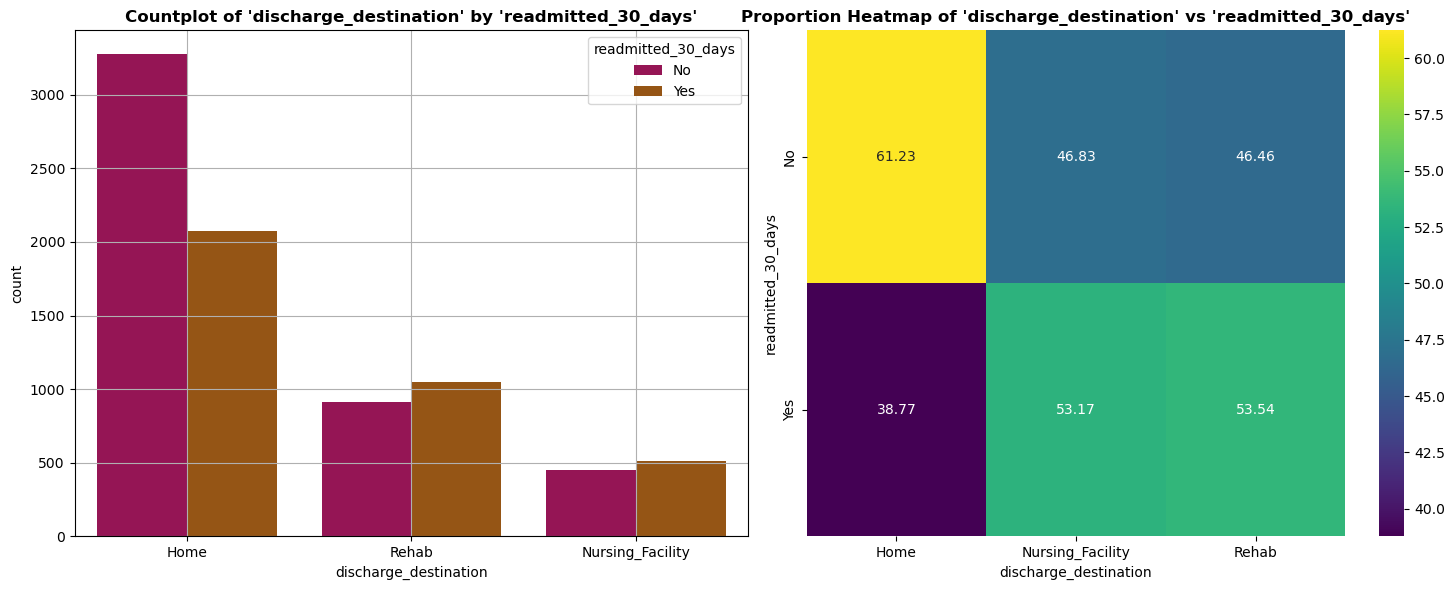



---Normalized Contingency Table for 'insulin_plan' vs 'readmitted_30_days'---

insulin_plan             Down         No     Steady         Up
readmitted_30_days                                            
No                  53.221289  57.732416  55.028571  53.133515
Yes                 46.778711  42.267584  44.971429  46.866485 



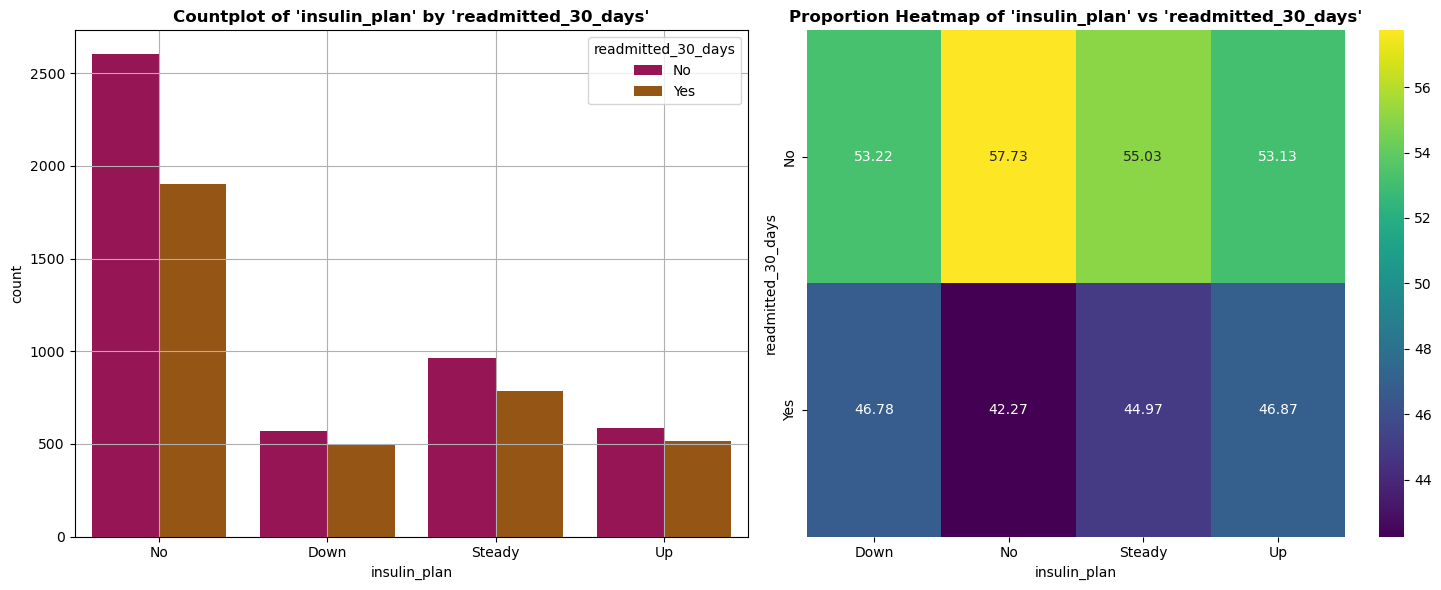

In [299]:
for col in categorical_cols:
    analyze_categorical_vs_target(patients_df, col)

#### ***KEY FINDINGS -***

- When analyzing `gender` against 30-day readmission, we observed a consistent pattern across all groups—around 44% of patients were readmitted, regardless of being male, female, or other. The countplot and heatmap confirm this uniformity, showing no major variation in readmission likelihood by `gender`. This suggests that `gender` alone doesn't significantly influence the chances of a patient being readmitted within 30 days. It’s a level playing field here—`gender` isn’t a strong predictor in this case.

- Patients with `diabetes` show a slightly higher tendency to be readmitted within 30 days—nearly 46% compared to 42% for non-diabetics. This consistent difference, visible in both the countplot and heatmap, hints that diabetes may increase the risk of early readmission. It’s not a dramatic gap, but it’s enough to raise a red flag that diabetic status could be a contributing factor worth watching in our predictive model.

- Patients with `hypertension` are slightly more prone to being readmitted within 30 days—about 45% compared to 43% for those without `hypertension`. The difference isn't large, but it's consistently reflected in both the countplot and heatmap. This suggests that while `hypertension` may have a mild influence on readmission risk, it’s not a dominant factor on its own—but it could add predictive value when combined with other health conditions.

- `discharge_destination` appears to have a strong impact on 30-day readmission. Patients sent home have the lowest readmission rate at around 39%, while those discharged to rehab or nursing facilities face significantly higher rates—nearly 53–54%. This trend is clearly reflected in both the heatmap and countplot, suggesting that patients not discharged home are at a notably higher risk of returning. It signals that `discharge_destination` planning and post-care support could be key factors in reducing readmissions.

- The `insulin_plan` prescribed at discharge offers a strong signal of a patient’s health stability. Patients with no `insulin_plan` had the lowest readmission rate (~ 42%), suggesting relatively stable conditions. In contrast, those discharged with a steady insulin regimen had a slightly higher readmission rate (~ 45%), while those whose `insulin_plan` was reduced (Down) or increased (Up) faced the highest risks—about (~47%). This upward trend indicates that any insulin adjustment, especially increases, may reflect underlying clinical concerns that make readmission more likely. Overall, the `insulin_plan` at discharge acts as a meaningful indicator of post-discharge vulnerability.

























### ***A1C_TEST_RESULT VS READMITTED_30_DAYS'***

***`The 'a1c_test_result' column contains approximately 20% missing values, which may carry meaningful clinical significance. In real-world hospital settings, a missing A1C test result could indicate: The test was not performed during admission, The patient was non-diabetic and thus not tested, Or the data was not recorded due to oversight. Rather than treating these as simple missing values, we analyze them as a separate category ('Missing') to explore whether the absence of A1C data has any pattern or association with hospital readmissions. To maintain clarity and avoid altering the behavior for other categorical features, this column is handled separately in the bivariate analysis.`***



***CONCLUSIONS -***

`a1c_test_result` at discharge show subtle differences in readmission risk. Patients with normal A1C levels had the lowest readmission rate (~ 42%), while those with controlled (≤7) or high (>7) values were slightly more likely to return (~ 44%). The highest readmission was seen in patients with missing A1C results (~46%), which might point to gaps in testing or more complex cases. This missingness could reflect either less proactive monitoring or critical patients for whom testing wasn’t prioritized—both of which may contribute to higher risk. While the differences aren’t dramatic, the trend suggests A1C values and whether they’re recorded—offer useful insight into post-discharge vulnerability.


---Normalized Contingency Table for 'a1c_test_result' vs 'readmitted_30_days'---

a1c_test_result           <=7         >7    Missing       Norm
readmitted_30_days                                            
No                  56.067281  55.768479  54.473039  57.659208
Yes                 43.932719  44.231521  45.526961  42.340792



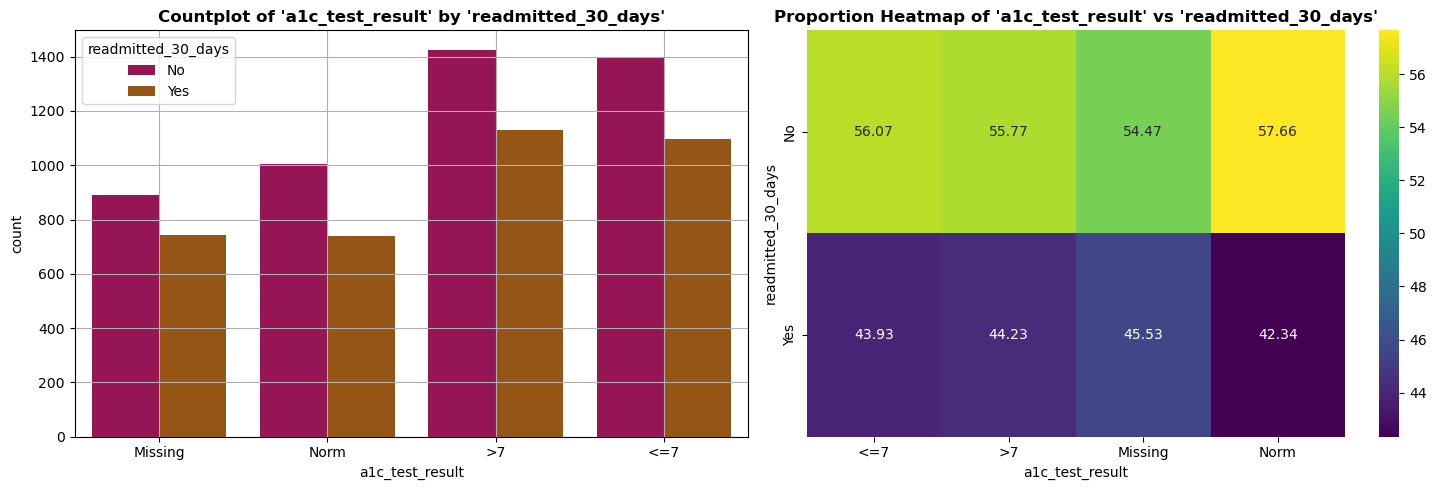

In [300]:
# Flagging Missing Values In 'A1C_Test_Result' As Missing Category.
temp_df = patients_df.copy()
temp_df['a1c_test_result'] = temp_df['a1c_test_result'].fillna('Missing')

print("---Normalized Contingency Table for 'a1c_test_result' vs 'readmitted_30_days'---\n")
 # Normalized table for heatmap (col-wise %)
norm_crosstab = pd.crosstab(temp_df['readmitted_30_days'],temp_df['a1c_test_result'], normalize='columns') * 100
print(norm_crosstab,end = '\n\n')

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Countplot
sns.countplot(data = temp_df, x = 'a1c_test_result', hue = 'readmitted_30_days', ax = ax[0], palette = 'brg')
ax[0].set_title("Countplot of 'a1c_test_result' by 'readmitted_30_days'",fontweight = 'bold')
ax[0].grid(True)

# Heatmap
sns.heatmap(norm_crosstab, annot = True,cmap = 'viridis',fmt = ".2f", ax = ax[1])
ax[1].set_title("Proportion Heatmap of 'a1c_test_result' vs 'readmitted_30_days'",fontweight = 'bold')

plt.tight_layout()
plt.show()


## ***3.3 MULTIVARIATE ANALYSIS***


### ***Correlation Heatmap of Numerical Features***

***CONCLUSIONS - The correlation heatmap of numerical features shows very weak linear relationships among all variables. Most correlation values are close to 0, indicating that features like `age`, `cholesterol`, `bmi`, `medication_count`, `length_of_stay`,`num_inpatient_visits`, `disease_burden_score`, `systolic_bp`, and `diastolic_bp` are largely independent of each other. This suggests there is no multicollinearity concern, and each feature may bring unique value to the model. The highest correlation observed is only 0.04 (between systolic and diastolic blood pressure), which is still negligible.***


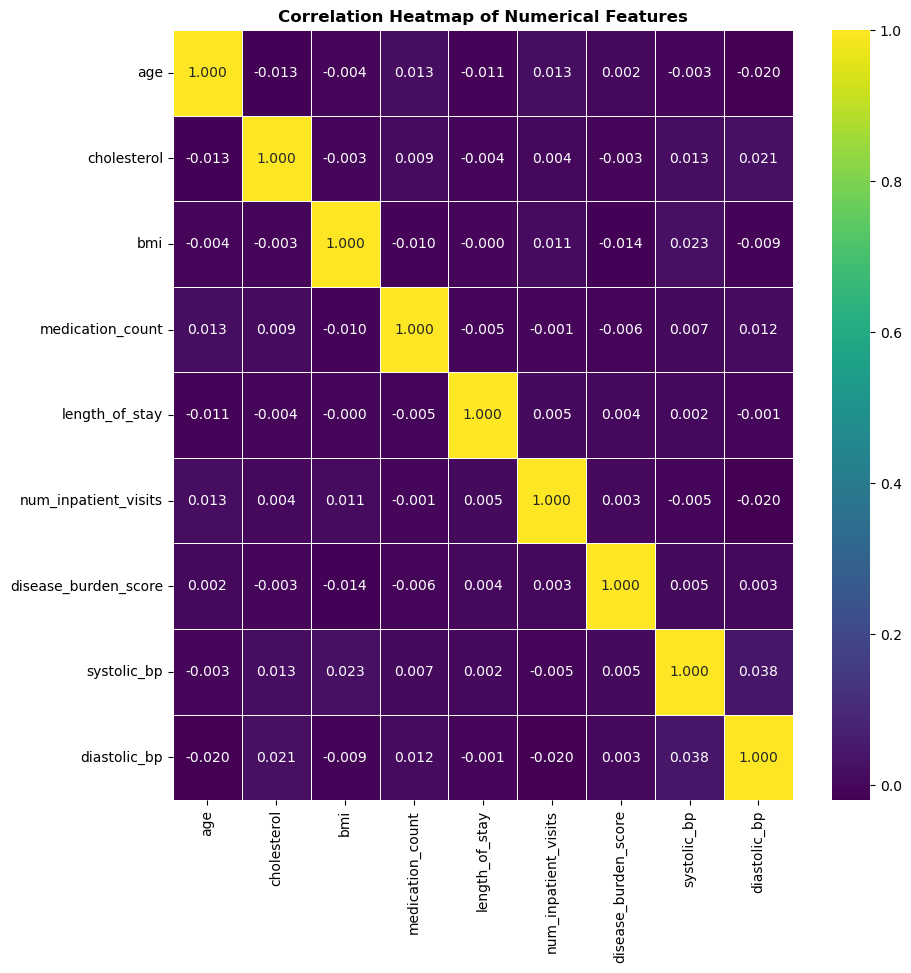

In [301]:
# Heatmap
numerical_df = patients_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontweight='bold')
plt.show()

### ***Cross-Category Relationship Heatmaps***

***CONCLUSIONS - We explored how different categories relate using heatmaps to find patterns in patient data. Males and Others showed slightly higher rates of `diabetes` (~ 34%) and all Males, Females and Others showed roughly equal `hypertension` (~ 34%). Patients with `diabetes` were far more likely to be on an `insulin_plan` that is had some form of insulin intervention, while over 90% of non-diabetics had none. Also, a significant portion of those with high `a1c_test_result` (>7) were `diabetic` (around 52.5%), showing a strong link between poor sugar control and diabetes.`discharge_destination` depended on health status—over 53% of `diabetic` or `hypertensive` patients were sent to nursing facilities or rehab, while those with better vitals were mostly discharged home. These patterns highlight how `gender`, `a1c_test_result`, `insulin_plan`, and health conditions together influence patient outcomes and treatment decisions.***

In [302]:
# Using temp_df to take into consideration the missing values of 'a1c-test_result'.
cat_cols = temp_df.select_dtypes(include=['object']).columns.tolist()[0:6]
print(cat_cols)

['gender', 'diabetes', 'hypertension', 'discharge_destination', 'insulin_plan', 'a1c_test_result']


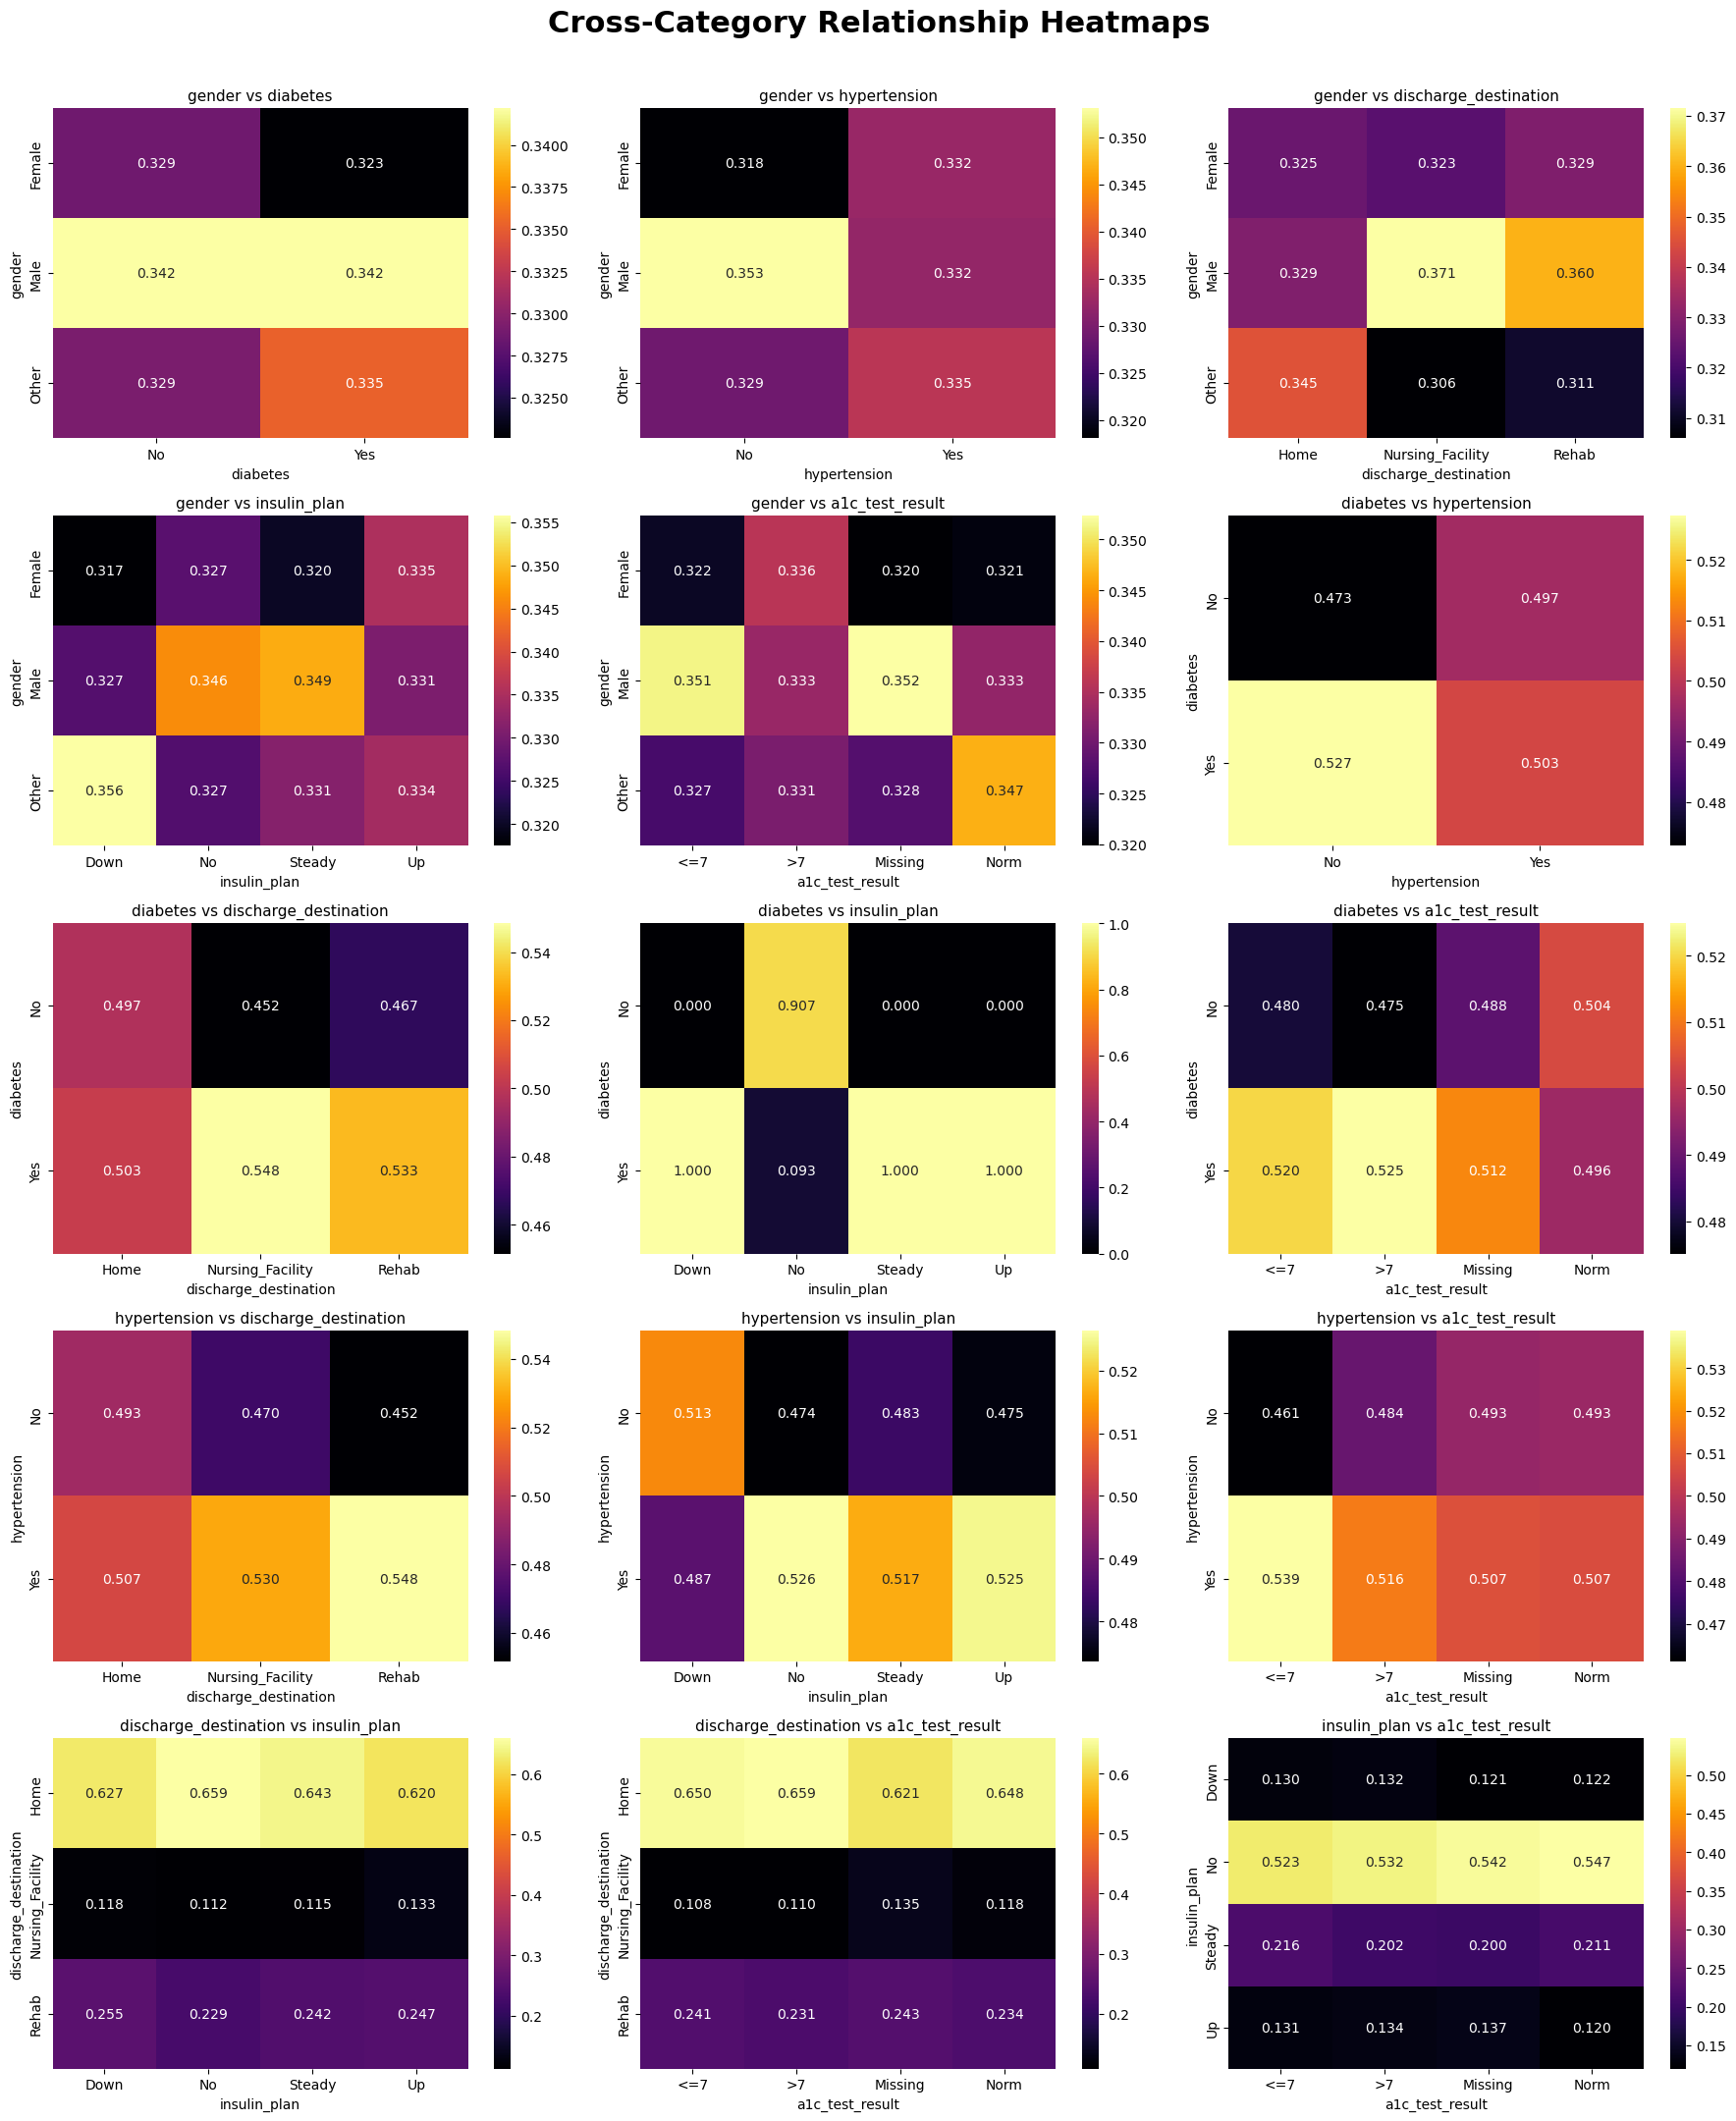

In [303]:
# length of cat_cols = 6
# Calculate total number of combinations = 6C2 = 15

# Deciding total rows in the figure and cols in each row based on total number of pairs.
rows = 5
cols = 3

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (18,22))
axes = axes.flatten()

plot_index = 0

for i in range(len(cat_cols)-1):
 for j in range(i+1,len(cat_cols)):
     ax = axes[plot_index]
     ctb = pd.crosstab(temp_df[cat_cols[i]],temp_df[cat_cols[j]],normalize = 'columns') 
     
     sns.heatmap(ctb, annot=True, fmt=".3f", cmap = "inferno", ax = ax, cbar = True)
     ax.set_title("{} vs {}".format(cat_cols[i], cat_cols[j]), fontsize=11)
     plot_index += 1
     
fig.suptitle("Cross-Category Relationship Heatmaps", fontsize = 22,fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit suptitle
plt.show()

## ***4. TRAIN-VALIDATION-TEST SPLIT***

In [304]:
X = patients_df.drop('readmitted_30_days', axis=1)
y = patients_df['readmitted_30_days']

In [305]:
# First split: Train + Temp (Val + Test)
# We use stratify = y to preserve the original class balance of the target (readmitted_30_days) in each split.
X_train, X_temp, y_train, y_temp = train_test_split( X, y, test_size = 0.3, random_state = 42, stratify = y)

# Second split: Validation + Test (50/50 of Temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42, stratify = y_temp)

In [306]:
X_train

age  gender  cholesterol   bmi diabetes hypertension  medication_count  \
1691   61   Other        294.0  39.6       No           No                 6   
3535   80    Male        195.0  27.2       No           No                 6   
6535   37    Male        232.0  32.9       No          Yes                 0   
2160   87   Other        227.0  24.7      Yes          Yes                 6   
875    78   Other        230.0  18.0      Yes          Yes                 7   
...   ...     ...          ...   ...      ...          ...               ...   
7841   84   Other        150.0  18.0      Yes           No                 1   
2865   71   Other        208.0  26.7      Yes           No                 2   
1150   77  Female        207.0  22.0      Yes          Yes                 5   
7988   85    Male        212.0  40.0       No           No                 3   
2362   67  Female        244.0  25.1       No          Yes                 8   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
1691               1                  Home           No            Norm   
3535               3                  Home           No              >7   
6535               5                  Home           No            Norm   
2160               4                  Home       Steady             NaN   
875                9      Nursing_Facility         Down             <=7   
...              ...                   ...          ...             ...   
7841              10                   NaN           Up             NaN   
2865               5                  Home       Steady             <=7   
1150               2                  Home         Down             <=7   
7988               7                  Home           No            Norm   
2362              10      Nursing_Facility           No              >7   

      num_inpatient_visits  disease_burden_score  systolic_bp  diastolic_bp  
1691                     1                   3.8        123.0          91.0  
3535                     1                   2.5        154.0          79.0  
6535                     3                   5.2        130.0          85.0  
2160                     1                   4.3        128.0          94.0  
875                      2                   3.7        148.0          75.0  
...                    ...                   ...          ...           ...  
7841                     0                   8.0        110.0          85.0  
2865                     3                   4.4        131.0          81.0  
1150                     2                   4.0        130.0          81.0  
7988                     2                   4.2        131.0          93.0  
2362                     5                   2.7        149.0          83.0  

[5900 rows x 15 columns]

In [307]:
X_val

age  gender  cholesterol   bmi diabetes hypertension  medication_count  \
5316   32   Other        190.0  34.6      Yes          Yes                 2   
7684   77  Female        270.0  29.8       No           No                 7   
2917   77    Male        256.0  30.7      Yes           No                 2   
5124   58    Male        192.0  34.1      Yes          Yes                 7   
8179   75   Other        192.0  36.7       No          Yes                 2   
...   ...     ...          ...   ...      ...          ...               ...   
3846   78  Female        254.0  32.2      Yes           No                 6   
5288   49   Other        264.0  28.4       No           No                 6   
7298   83  Female        300.0  21.8      Yes          Yes                 1   
3860   22  Female        205.0  29.9       No          Yes                 8   
4024   35   Other          NaN  30.0       No           No                 4   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
5316               1                  Home           No              >7   
7684               3                  Home           No             <=7   
2917               1                 Rehab       Steady              >7   
5124               5                  Home       Steady             <=7   
8179              10                 Rehab           No              >7   
...              ...                   ...          ...             ...   
3846               6                   NaN         Down              >7   
5288              10                  Home           No             NaN   
7298               5                  Home       Steady              >7   
3860               5                  Home           No            Norm   
4024               3                  Home           No            Norm   

      num_inpatient_visits  disease_burden_score  systolic_bp  diastolic_bp  
5316                     2                   3.2        160.0          70.0  
7684                     1                   4.4        117.0          87.0  
2917                     1                   2.7        121.0          89.0  
5124                     5                   8.0        131.0          96.0  
8179                     3                   0.6        110.0          79.0  
...                    ...                   ...          ...           ...  
3846                     3                   2.3        160.0          91.0  
5288                     3                   3.6        151.0          82.0  
7298                     0                   8.0        112.0          92.0  
3860                     1                   0.8        125.0          76.0  
4024                     0                   0.9        137.0         100.0  

[1264 rows x 15 columns]

In [308]:
X_test

age  gender  cholesterol   bmi diabetes hypertension  medication_count  \
6357   82    Male        265.0  21.9       No          Yes                 3   
8379   75   Other        199.0  33.1      Yes          Yes                 1   
6566   85    Male        232.0  29.4       No           No                 0   
6331   73    Male        267.0  23.8      Yes          Yes                 9   
3577   61   Other        263.0  19.1      Yes           No                 8   
...   ...     ...          ...   ...      ...          ...               ...   
4310   77  Female          NaN  26.4      Yes          Yes                 1   
2357   78   Other        260.0  24.1       No           No                 6   
6198   89   Other        296.0  18.3      Yes          Yes                 2   
322    77  Female        253.0  37.2       No          Yes                 5   
6406   79   Other        192.0  31.0      Yes          Yes                 6   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
6357               3                  Home           No             <=7   
8379               2                  Home         Down              >7   
6566              10      Nursing_Facility           No             NaN   
6331               7                  Home           Up             <=7   
3577               6      Nursing_Facility       Steady            Norm   
...              ...                   ...          ...             ...   
4310               4                  Home         Down            Norm   
2357               4                  Home           No              >7   
6198              10      Nursing_Facility       Steady            Norm   
322                2                  Home           No             <=7   
6406               3                  Home           Up             <=7   

      num_inpatient_visits  disease_burden_score  systolic_bp  diastolic_bp  
6357                     2                   5.1        136.0          81.0  
8379                     0                   6.3        134.0         100.0  
6566                     0                   2.7        128.0          90.0  
6331                     1                   5.7        130.0          81.0  
3577                     2                   6.0        134.0         100.0  
...                    ...                   ...          ...           ...  
4310                     1                   7.4        134.0          86.0  
2357                     1                   2.1        130.0          89.0  
6198                     2                   3.3        128.0          70.0  
322                      1                   2.5        135.0          84.0  
6406                     0                   2.4        156.0          72.0  

[1265 rows x 15 columns]

In [309]:
y_train

1691    Yes
3535     No
6535     No
2160    Yes
875     Yes
       ... 
7841    Yes
2865    Yes
1150    Yes
7988    Yes
2362     No
Name: readmitted_30_days, Length: 5900, dtype: object

In [310]:
# Checking balance of target classes in training set. 
y_train.value_counts()*100 / len(y_train)

readmitted_30_days
No     56.0
Yes    44.0
Name: count, dtype: float64

In [311]:
y_val

5316     No
7684    Yes
2917     No
5124    Yes
8179    Yes
       ... 
3846     No
5288     No
7298     No
3860     No
4024    Yes
Name: readmitted_30_days, Length: 1264, dtype: object

In [312]:
# Checking balance of target classes in validation set. 
y_val.value_counts()*100 / len(y_val)

readmitted_30_days
No     56.012658
Yes    43.987342
Name: count, dtype: float64

In [313]:
y_test

6357    Yes
8379     No
6566    Yes
6331    Yes
3577     No
       ... 
4310     No
2357     No
6198    Yes
322     Yes
6406     No
Name: readmitted_30_days, Length: 1265, dtype: object

In [314]:
# Checking balance of target classes in test set. 
y_test.value_counts()*100 / len(y_test)

readmitted_30_days
No     55.968379
Yes    44.031621
Name: count, dtype: float64

## ***5. MISSING VALUE IMPUTATION***

***In this project, we imputed missing values in the training set using strategies based on EDA and the coclusions that preserve clinical meaning and maintain the original distribution of each feature. Here’s the reasoning behind each imputation method:***

 `systolic_bp` and `diastolic_bp`(missing ~2%)
  - `Strategy: Imputed with median values.`
  - `Why: Both have a near-normal distribution but contains outliers (e.g., hypertensive crisis). Median is robust and preserves central tendency without being skewed by extremes.`


 `cholesterol` (missing ~2%)
  - `Strategy: Imputed with median.`
  - `Why median: Cholesterol shows a slightly right-skewed distribution. Median reduces the influence of high outliers while preserving a realistic distribution pattern.`


 `bmi` (missing ~2%)
  - `Strategy: Imputed with median.`
  - `Why: BMI is a continuous variable with slight skewness and medical relevance. Median helps maintain realistic body weight representation while avoiding distortion from high BMI outliers.`


 `discharge_destination` (missing ~2%)
  - `Strategy: Imputed with mode.`
  - `Why: This is a categorical column with a dominant class. The mode represents the most likely discharge outcome and minimizes distortion in category proportions.`


 `a1c_test_result` (missing ~20%)
  - `Strategy: Imputed with 'Missing' as a separate category.`
  - `Why: The absence of an A1C test can indicate important clinical scenarios (e.g., new admission, unmonitored patient). Labeling this as 'Missing' preserves this signal and lets the model learn from the missingness itself, which may relate to readmission risk.`

In [315]:
# Checking missing values in training set.
(X_train.isna().sum()) * 100 / len(X_train)

age                       0.000000
gender                    0.000000
cholesterol               1.932203
bmi                       1.847458
diabetes                  0.000000
hypertension              0.000000
medication_count          0.000000
length_of_stay            0.000000
discharge_destination     2.033898
insulin_plan              0.000000
a1c_test_result          19.372881
num_inpatient_visits      0.000000
disease_burden_score      0.000000
systolic_bp               2.101695
diastolic_bp              2.101695
dtype: float64

In [316]:
X_train.columns.tolist()

['age',
 'gender',
 'cholesterol',
 'bmi',
 'diabetes',
 'hypertension',
 'medication_count',
 'length_of_stay',
 'discharge_destination',
 'insulin_plan',
 'a1c_test_result',
 'num_inpatient_visits',
 'disease_burden_score',
 'systolic_bp',
 'diastolic_bp']

In [317]:
# Missing value imputation 
transformer = ColumnTransformer(
                    transformers = [
                        ('tnf1',SimpleImputer(strategy = 'median'),['cholesterol','bmi','systolic_bp','diastolic_bp']),
                        ('tnf2',SimpleImputer(strategy = 'most_frequent'),['discharge_destination']),
                        ('tnf3',SimpleImputer(strategy = 'constant', fill_value = 'Missing'),['a1c_test_result'])
                    ] ,
                    remainder = 'passthrough')

In [318]:
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed 

array([[294.0, 39.6, 123.0, ..., 'No', 1, 3.8],
       [195.0, 27.2, 154.0, ..., 'No', 1, 2.5],
       [232.0, 32.9, 130.0, ..., 'No', 3, 5.2],
       ...,
       [207.0, 22.0, 130.0, ..., 'Down', 2, 4.0],
       [212.0, 40.0, 131.0, ..., 'No', 2, 4.2],
       [244.0, 25.1, 149.0, ..., 'No', 5, 2.7]], dtype=object)

In [319]:
X_val_transformed = transformer.transform(X_val)
X_val_transformed

array([[190.0, 34.6, 160.0, ..., 'No', 2, 3.2],
       [270.0, 29.8, 117.0, ..., 'No', 1, 4.4],
       [256.0, 30.7, 121.0, ..., 'Steady', 1, 2.7],
       ...,
       [300.0, 21.8, 112.0, ..., 'Steady', 0, 8.0],
       [205.0, 29.9, 125.0, ..., 'No', 1, 0.8],
       [225.0, 30.0, 137.0, ..., 'No', 0, 0.9]], dtype=object)

In [320]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed

array([[265.0, 21.9, 136.0, ..., 'No', 2, 5.1],
       [199.0, 33.1, 134.0, ..., 'Down', 0, 6.3],
       [232.0, 29.4, 128.0, ..., 'No', 0, 2.7],
       ...,
       [296.0, 18.3, 128.0, ..., 'Steady', 2, 3.3],
       [253.0, 37.2, 135.0, ..., 'No', 1, 2.5],
       [192.0, 31.0, 156.0, ..., 'Up', 0, 2.4]], dtype=object)

In [321]:
# Specifying updated columns 
median_cols = ['cholesterol', 'bmi', 'systolic_bp', 'diastolic_bp']
freq_cols = ['discharge_destination']
const_cols = ['a1c_test_result']

# Getting list of passthrough columns (i.e., columns not transformed)
transformed_cols = median_cols + freq_cols + const_cols
passthrough_cols = [col for col in X_train.columns if col not in transformed_cols]

# Full ordered column list after transformation
final_columns = median_cols + freq_cols + const_cols + passthrough_cols

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_transformed, columns = final_columns, index = X_train.index)
X_val_df = pd.DataFrame(X_val_transformed, columns = final_columns, index = X_val.index)
X_test_df = pd.DataFrame(X_test_transformed, columns = final_columns, index = X_test.index)

In [322]:
X_train_df

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
1691       294.0  39.6       123.0         91.0                  Home   
3535       195.0  27.2       154.0         79.0                  Home   
6535       232.0  32.9       130.0         85.0                  Home   
2160       227.0  24.7       128.0         94.0                  Home   
875        230.0  18.0       148.0         75.0      Nursing_Facility   
...          ...   ...         ...          ...                   ...   
7841       150.0  18.0       110.0         85.0                  Home   
2865       208.0  26.7       131.0         81.0                  Home   
1150       207.0  22.0       130.0         81.0                  Home   
7988       212.0  40.0       131.0         93.0                  Home   
2362       244.0  25.1       149.0         83.0      Nursing_Facility   

     a1c_test_result age  gender diabetes hypertension medication_count  \
1691            Norm  61   Other       No           No                6   
3535              >7  80    Male       No           No                6   
6535            Norm  37    Male       No          Yes                0   
2160         Missing  87   Other      Yes          Yes                6   
875              <=7  78   Other      Yes          Yes                7   
...              ...  ..     ...      ...          ...              ...   
7841         Missing  84   Other      Yes           No                1   
2865             <=7  71   Other      Yes           No                2   
1150             <=7  77  Female      Yes          Yes                5   
7988            Norm  85    Male       No           No                3   
2362              >7  67  Female       No          Yes                8   

     length_of_stay insulin_plan num_inpatient_visits disease_burden_score  
1691              1           No                    1                  3.8  
3535              3           No                    1                  2.5  
6535              5           No                    3                  5.2  
2160              4       Steady                    1                  4.3  
875               9         Down                    2                  3.7  
...             ...          ...                  ...                  ...  
7841             10           Up                    0                  8.0  
2865              5       Steady                    3                  4.4  
1150              2         Down                    2                  4.0  
7988              7           No                    2                  4.2  
2362             10           No                    5                  2.7  

[5900 rows x 15 columns]

In [323]:
# Validating there are no missing values left.
X_train_df.isna().sum()

cholesterol              0
bmi                      0
systolic_bp              0
diastolic_bp             0
discharge_destination    0
a1c_test_result          0
age                      0
gender                   0
diabetes                 0
hypertension             0
medication_count         0
length_of_stay           0
insulin_plan             0
num_inpatient_visits     0
disease_burden_score     0
dtype: int64

In [324]:
X_val_df

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
5316       190.0  34.6       160.0         70.0                  Home   
7684       270.0  29.8       117.0         87.0                  Home   
2917       256.0  30.7       121.0         89.0                 Rehab   
5124       192.0  34.1       131.0         96.0                  Home   
8179       192.0  36.7       110.0         79.0                 Rehab   
...          ...   ...         ...          ...                   ...   
3846       254.0  32.2       160.0         91.0                  Home   
5288       264.0  28.4       151.0         82.0                  Home   
7298       300.0  21.8       112.0         92.0                  Home   
3860       205.0  29.9       125.0         76.0                  Home   
4024       225.0  30.0       137.0        100.0                  Home   

     a1c_test_result age  gender diabetes hypertension medication_count  \
5316              >7  32   Other      Yes          Yes                2   
7684             <=7  77  Female       No           No                7   
2917              >7  77    Male      Yes           No                2   
5124             <=7  58    Male      Yes          Yes                7   
8179              >7  75   Other       No          Yes                2   
...              ...  ..     ...      ...          ...              ...   
3846              >7  78  Female      Yes           No                6   
5288         Missing  49   Other       No           No                6   
7298              >7  83  Female      Yes          Yes                1   
3860            Norm  22  Female       No          Yes                8   
4024            Norm  35   Other       No           No                4   

     length_of_stay insulin_plan num_inpatient_visits disease_burden_score  
5316              1           No                    2                  3.2  
7684              3           No                    1                  4.4  
2917              1       Steady                    1                  2.7  
5124              5       Steady                    5                  8.0  
8179             10           No                    3                  0.6  
...             ...          ...                  ...                  ...  
3846              6         Down                    3                  2.3  
5288             10           No                    3                  3.6  
7298              5       Steady                    0                  8.0  
3860              5           No                    1                  0.8  
4024              3           No                    0                  0.9  

[1264 rows x 15 columns]

In [325]:
X_test_df

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
6357       265.0  21.9       136.0         81.0                  Home   
8379       199.0  33.1       134.0        100.0                  Home   
6566       232.0  29.4       128.0         90.0      Nursing_Facility   
6331       267.0  23.8       130.0         81.0                  Home   
3577       263.0  19.1       134.0        100.0      Nursing_Facility   
...          ...   ...         ...          ...                   ...   
4310       225.0  26.4       134.0         86.0                  Home   
2357       260.0  24.1       130.0         89.0                  Home   
6198       296.0  18.3       128.0         70.0      Nursing_Facility   
322        253.0  37.2       135.0         84.0                  Home   
6406       192.0  31.0       156.0         72.0                  Home   

     a1c_test_result age  gender diabetes hypertension medication_count  \
6357             <=7  82    Male       No          Yes                3   
8379              >7  75   Other      Yes          Yes                1   
6566         Missing  85    Male       No           No                0   
6331             <=7  73    Male      Yes          Yes                9   
3577            Norm  61   Other      Yes           No                8   
...              ...  ..     ...      ...          ...              ...   
4310            Norm  77  Female      Yes          Yes                1   
2357              >7  78   Other       No           No                6   
6198            Norm  89   Other      Yes          Yes                2   
322              <=7  77  Female       No          Yes                5   
6406             <=7  79   Other      Yes          Yes                6   

     length_of_stay insulin_plan num_inpatient_visits disease_burden_score  
6357              3           No                    2                  5.1  
8379              2         Down                    0                  6.3  
6566             10           No                    0                  2.7  
6331              7           Up                    1                  5.7  
3577              6       Steady                    2                  6.0  
...             ...          ...                  ...                  ...  
4310              4         Down                    1                  7.4  
2357              4           No                    1                  2.1  
6198             10       Steady                    2                  3.3  
322               2           No                    1                  2.5  
6406              3           Up                    0                  2.4  

[1265 rows x 15 columns]

### ***Validating Distribution Before & After***

- ***The KDE plots for all four numerical features — `cholesterol`, `bmi`, `systolic_bp`, and `diastolic_bp`— show that the distributions remain nearly identical before and after imputation. This indicates that the chosen imputation method (median imputation) has successfully preserved the original data distribution without introducing significant bias or distortion.***

- ***The comparison of `discharge_destination` and `a1c_test_result` before and after imputation shows that the strategies applied have preserved the original distributions while responsibly handling missing data. The distribution for `discharge_destination` remains virtually unchanged post-imputation. The most frequent value "Home" was rightly used to impute missing entries, as seen from the unchanged dominance of this category. For `a1c_test_result`, A new category "Missing" was added to explicitly capture missing test results. This is visibly reflected in the "After Imputation" chart, where "Missing" now appears as a valid category. The original distribution among <=7, >7, and Norm remains intact, ensuring that the information is still reliable for further analysis.***



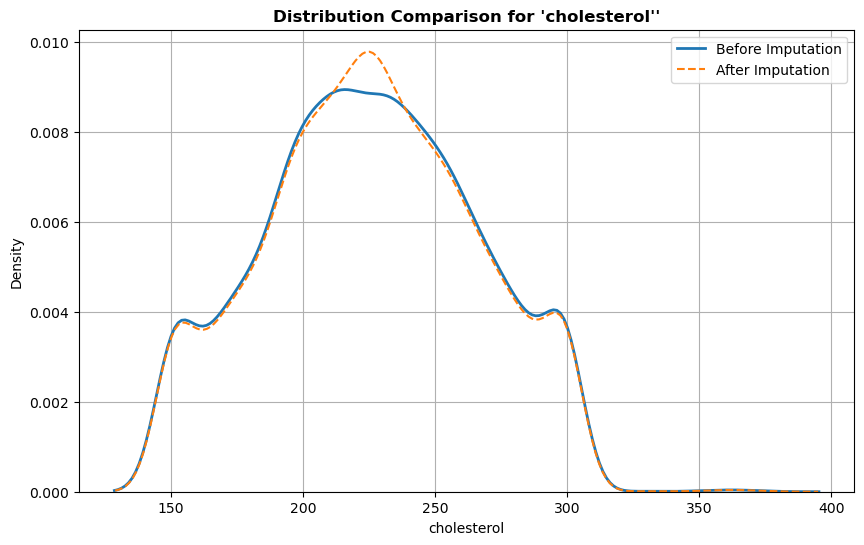

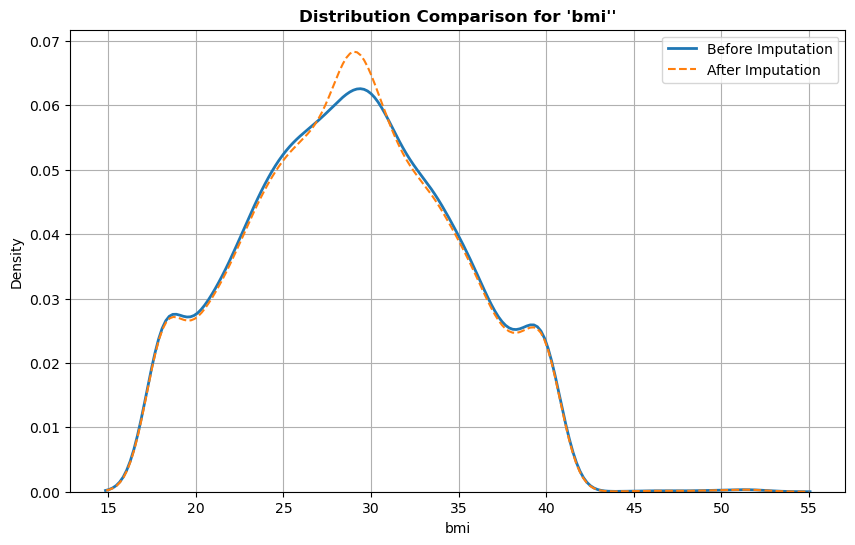

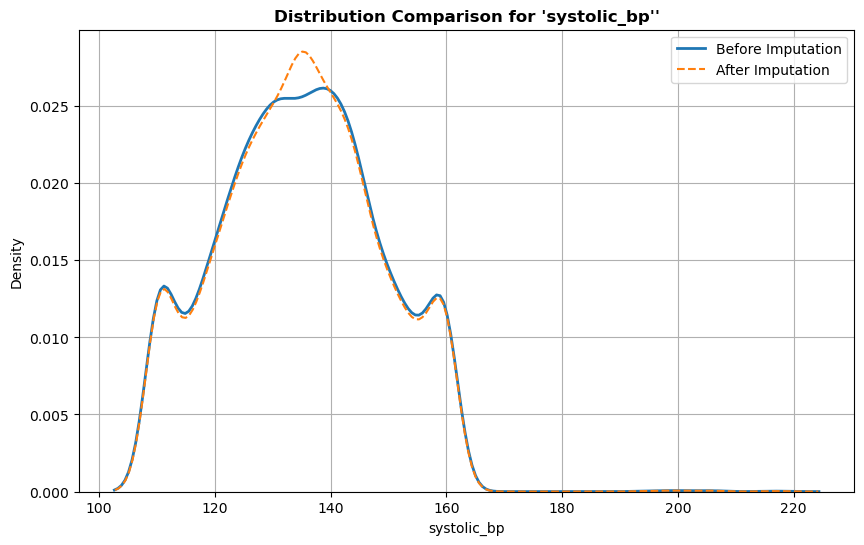

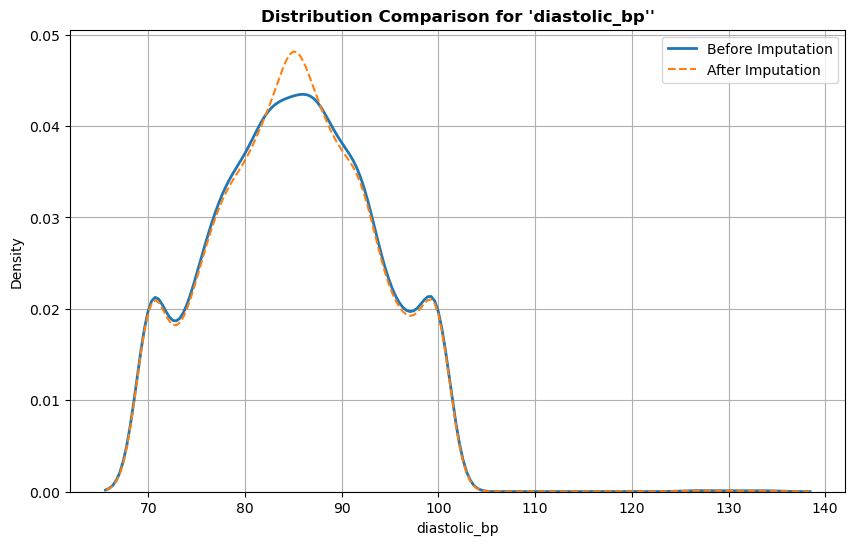

In [326]:
# For Numerical Columns
for col in median_cols:
    plt.figure(figsize=(10,6))
    
    # Plot before imputation (on non-missing values)
    sns.kdeplot(X_train[col].dropna(), label = "Before Imputation", linewidth = 2)
    
    # Plot after imputation
    sns.kdeplot(X_train_df[col], label = "After Imputation", linestyle = '--')
    
    plt.title("Distribution Comparison for '{}''".format(col),fontweight = 'bold')
    plt.legend()
    plt.grid(True)
    plt.show()

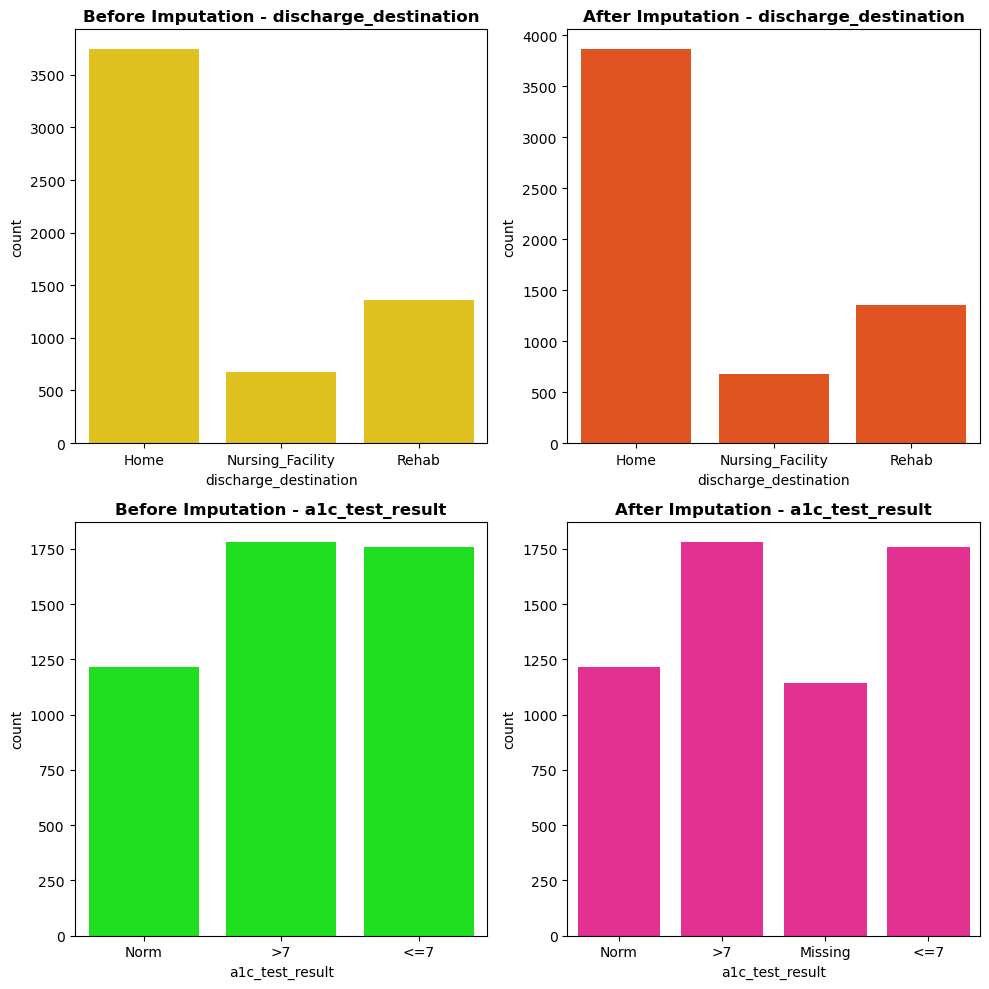

In [327]:
# For Categorical Columns
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize = (10,10))

# Frequecy Comparision For 'discharge_destination'
sns.countplot(data = X_train, x = 'discharge_destination',ax = ax[0,0],color = 'gold')
ax[0, 0].set_title("Before Imputation - discharge_destination", fontweight='bold')

sns.countplot(data = X_train_df, x = 'discharge_destination',ax = ax[0,1],color = 'orangered')
ax[0, 1].set_title("After Imputation - discharge_destination", fontweight='bold')

# Frequecy Comparision For 'a1c_test_result'
sns.countplot(data = X_train, x = 'a1c_test_result',ax = ax[1,0],color = 'lime')
ax[1, 0].set_title("Before Imputation - a1c_test_result", fontweight='bold')

sns.countplot(data = X_train_df, x = 'a1c_test_result',ax = ax[1,1],color = 'deeppink')
ax[1, 1].set_title("After Imputation - a1c_test_result", fontweight='bold')

plt.tight_layout()
plt.show()

## ***6. Feature Engineering: Why Add New Interaction Features?***

***`After analyzing the heatmap of numerical features, we observed that most variables are weakly correlated with one another, indicating that they may be acting independently. This gives us an opportunity to enrich our dataset by manually adding new interaction features that capture combined health risk signals that might be missed otherwise. The following new features were added:`***

1. ***`age_burden_score = age × disease_burden_score`***  
   > A combined indicator of a patient’s age and how many serious health conditions they have. An elderly patient with multiple comorbidities (disease burden) is much more likely to get readmitted than a younger person with the same burden.

2. ***`bmi_ratio = bmi / (age + 1)`*** 
   > A normalized measure of obesity relative to patient age. A BMI of 30 has different health risks at age 25 vs age 70. This adjusts for that. Detects dangerous combinations of high BMI in elderly patients that could be masked in raw BMI.

3. ***`medication_visits = medication_count × num_inpatient_visits`*** 
   > Combines number of medications and past hospital stays. Patients with more medications and frequent hospital visits often have poorly controlled or multiple chronic diseases. Helps detect complex care management cases, common causes of readmission.

   
5. ***`bp_product = systolic_bp × diastolic_bp`***
   > The product of systolic and diastolic blood pressure values. Unlike treating them separately, this gives an overall cardiovascular load approximation. Captures hypertension severity in a single value, often correlated with cardiac readmissions.


In [328]:
# Add interaction features to train/val/test sets
for df in [X_train_df, X_val_df, X_test_df]:
    df['age_burden_score'] = df['age'] * df['disease_burden_score']
    df['bmi_ratio'] = df['bmi'] / (df['age'] + 1)
    df['medication_visits'] = df['medication_count'] * df['num_inpatient_visits']
    df['bp_product'] = df['systolic_bp'] * df['diastolic_bp']

In [329]:
X_train_df

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
1691       294.0  39.6       123.0         91.0                  Home   
3535       195.0  27.2       154.0         79.0                  Home   
6535       232.0  32.9       130.0         85.0                  Home   
2160       227.0  24.7       128.0         94.0                  Home   
875        230.0  18.0       148.0         75.0      Nursing_Facility   
...          ...   ...         ...          ...                   ...   
7841       150.0  18.0       110.0         85.0                  Home   
2865       208.0  26.7       131.0         81.0                  Home   
1150       207.0  22.0       130.0         81.0                  Home   
7988       212.0  40.0       131.0         93.0                  Home   
2362       244.0  25.1       149.0         83.0      Nursing_Facility   

     a1c_test_result age  gender diabetes hypertension medication_count  \
1691            Norm  61   Other       No           No                6   
3535              >7  80    Male       No           No                6   
6535            Norm  37    Male       No          Yes                0   
2160         Missing  87   Other      Yes          Yes                6   
875              <=7  78   Other      Yes          Yes                7   
...              ...  ..     ...      ...          ...              ...   
7841         Missing  84   Other      Yes           No                1   
2865             <=7  71   Other      Yes           No                2   
1150             <=7  77  Female      Yes          Yes                5   
7988            Norm  85    Male       No           No                3   
2362              >7  67  Female       No          Yes                8   

     length_of_stay insulin_plan num_inpatient_visits disease_burden_score  \
1691              1           No                    1                  3.8   
3535              3           No                    1                  2.5   
6535              5           No                    3                  5.2   
2160              4       Steady                    1                  4.3   
875               9         Down                    2                  3.7   
...             ...          ...                  ...                  ...   
7841             10           Up                    0                  8.0   
2865              5       Steady                    3                  4.4   
1150              2         Down                    2                  4.0   
7988              7           No                    2                  4.2   
2362             10           No                    5                  2.7   

     age_burden_score bmi_ratio medication_visits bp_product  
1691            231.8   0.63871                 6    11193.0  
3535            200.0  0.335802                 6    12166.0  
6535            192.4  0.865789                 0    11050.0  
2160            374.1  0.280682                 6    12032.0  
875             288.6  0.227848                14    11100.0  
...               ...       ...               ...        ...  
7841            672.0  0.211765                 0     9350.0  
2865            312.4  0.370833                 6    10611.0  
1150            308.0  0.282051                10    10530.0  
7988            357.0  0.465116                 6    12183.0  
2362            180.9  0.369118                40    12367.0  

[5900 rows x 19 columns]

In [330]:
X_val_df.sample(5)

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
449        190.0  19.8       135.0         84.0                  Home   
5479       220.0  24.8       130.0         85.0      Nursing_Facility   
2192       282.0  32.4       138.0         70.0                 Rehab   
3920       275.0  29.4       127.0         80.0      Nursing_Facility   
295        242.0  33.1       128.0        100.0      Nursing_Facility   

     a1c_test_result age  gender diabetes hypertension medication_count  \
449               >7  59   Other       No          Yes                9   
5479         Missing  68    Male       No           No               10   
2192            Norm  65  Female      Yes          Yes                4   
3920            Norm  48  Female      Yes          Yes                2   
295               >7  50    Male      Yes           No                3   

     length_of_stay insulin_plan num_inpatient_visits disease_burden_score  \
449               5           No                    1                  4.8   
5479              4           No                    2                  8.0   
2192              1       Steady                    0                  0.7   
3920             10         Down                    1                  2.7   
295               1           No                    1                  6.8   

     age_burden_score bmi_ratio medication_visits bp_product  
449             283.2      0.33                 9    11340.0  
5479            544.0   0.35942                20    11050.0  
2192             45.5  0.490909                 0     9660.0  
3920            129.6       0.6                 2    10160.0  
295             340.0   0.64902                 3    12800.0

In [331]:
X_test_df.sample(5)

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
2490       293.0  32.3       139.0         70.0      Nursing_Facility   
6990       222.0  27.4       128.0         94.0                  Home   
3917       232.0  29.8       142.0         80.0                  Home   
3001       225.0  24.8       138.0         90.0                  Home   
6984       257.0  29.5       137.0         95.0                  Home   

     a1c_test_result age gender diabetes hypertension medication_count  \
2490             <=7  75   Male       No          Yes                2   
6990            Norm  74  Other      Yes           No                3   
3917         Missing  83   Male      Yes           No                8   
3001              >7  72   Male      Yes           No               10   
6984             <=7  89  Other      Yes          Yes                4   

     length_of_stay insulin_plan num_inpatient_visits disease_burden_score  \
2490              3           No                    2                  5.3   
6990              5       Steady                    3                  3.8   
3917              9       Steady                    2                  3.0   
3001              5           Up                    0                  5.1   
6984              7       Steady                    2                  1.2   

     age_burden_score bmi_ratio medication_visits bp_product  
2490            397.5     0.425                 4     9730.0  
6990            281.2  0.365333                 9    12032.0  
3917            249.0  0.354762                16    11360.0  
3001            367.2  0.339726                 0    12420.0  
6984            106.8  0.327778                 8    13015.0

## ***7. CATEGORICAL DATA ENCODING***

***Encoding Plan for Categorical Features -***

`Gender` 
>**This is a nominal variable with categories like Male, Female, Other. Since there is no natural order among them, we apply One-Hot Encoding to prevent introducing any false hierarchy.**

`Diabetes`
>**A nominal variable with categories such as Yes or No. Again, One-Hot Encoding is appropriate because the categories are unordered.**

`Hypertension`
>**A binary nominal variable (Yes/No). Although label encoding could technically work, One-Hot Encoding is preferred as it avoids unintended bias from assigning numeric values.**

`Discharge Destination`
>**A nominal feature with multiple categories such as Home, Rehab, Nursing Facility. Since these categories are distinct and not ordered, we use One-Hot Encoding.**

`Insulin Plan`
>**This is an ordinal variable with a meaningful progression: No < Steady < Down < Up. For this reason, Ordinal Encoding is used, where integers can represent the ordered scale.**

`A1c Test Result`
>**Another ordinal variable with a clear order: (Norm) < (<=7) < (>7) < (Missing). We use Ordinal Encoding to preserve the progression of worsening glycemic control.**

`Readmitted within 30 Days (Target Variable)`
>**This is binary (Yes/No). We use Label Encoding (0/1) since it is the target variable.**

In [332]:
# Define Categorical Columns
ordinal_cols = ['a1c_test_result', 'insulin_plan']
nominal_cols = ['gender', 'diabetes', 'hypertension', 'discharge_destination']

# Define correct order of categories
a1c_order = ['Norm', '<=7', '>7', 'Missing']
# (Norm -> 0, <=7 -> 1, >7 -> 2, Missing -> 3)
insulin_order = ['No', 'Steady', 'Down', 'Up']
# (No -> 0, Steady -> 1, Down -> 2, Up -> 3)

# Define the Transformer

# drop = 'first' is used to avoid the dummy variable trap.
# sparse = False ensures we get a NumPy array instead of a sparse matrix.
# remainder = 'passthrough' keeps the other columns (like numerical ones).

encoder = ColumnTransformer(
    transformers = [
        ('ord', OrdinalEncoder(categories = [a1c_order, insulin_order]), ordinal_cols),
        ('ohe', OneHotEncoder(drop = 'first', sparse_output = False), nominal_cols)
    ],
    remainder = 'passthrough'
)

# Fit on Train and Transform All
X_train_encoded = encoder.fit_transform(X_train_df)
X_val_encoded = encoder.transform(X_val_df)
X_test_encoded = encoder.transform(X_test_df)

# Get Column Names
# encoder.named_transformers_['ohe'] gives us access to the OneHotEncoder transformer inside the ColumnTransformer.
# .get_feature_names_out(nominal_cols) gets the new feature names after OneHotEncoding the nominal_cols.

ohe_feature_names = encoder.named_transformers_['ohe'].get_feature_names_out(nominal_cols)
final_column_names = ordinal_cols + list(ohe_feature_names) + list(X_train_df.drop(columns = ordinal_cols + nominal_cols).columns)

# Convert Arrays Back to DataFrames
X_train_final = pd.DataFrame(X_train_encoded, columns = final_column_names, index = X_train_df.index)
X_val_final = pd.DataFrame(X_val_encoded, columns = final_column_names, index = X_val_df.index)
X_test_final = pd.DataFrame(X_test_encoded, columns = final_column_names, index = X_test_df.index)

# List your original numerical columns
numerical_cols = ['age', 'cholesterol', 'bmi', 'medication_count', 
                  'length_of_stay', 'num_inpatient_visits', 
                  'disease_burden_score', 'systolic_bp', 'diastolic_bp','age_burden_score','bmi_ratio','medication_visits','bp_product']

# Convert them to numeric type
for col in numerical_cols:
    X_train_final[col] = pd.to_numeric(X_train_final[col])
    X_val_final[col] = pd.to_numeric(X_val_final[col])
    X_test_final[col] = pd.to_numeric(X_test_final[col])

# Initialize and fit encoder on training target
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_val_encoded = target_encoder.transform(y_val)
y_test_encoded = target_encoder.transform(y_test)

In [333]:
X_train_final

a1c_test_result insulin_plan gender_Male gender_Other diabetes_Yes  \
1691             0.0          0.0         0.0          1.0          0.0   
3535             2.0          0.0         1.0          0.0          0.0   
6535             0.0          0.0         1.0          0.0          0.0   
2160             3.0          1.0         0.0          1.0          1.0   
875              1.0          2.0         0.0          1.0          1.0   
...              ...          ...         ...          ...          ...   
7841             3.0          3.0         0.0          1.0          1.0   
2865             1.0          1.0         0.0          1.0          1.0   
1150             1.0          2.0         0.0          0.0          1.0   
7988             0.0          0.0         1.0          0.0          0.0   
2362             2.0          0.0         0.0          0.0          0.0   

     hypertension_Yes discharge_destination_Nursing_Facility  \
1691              0.0                                    0.0   
3535              0.0                                    0.0   
6535              1.0                                    0.0   
2160              1.0                                    0.0   
875               1.0                                    1.0   
...               ...                                    ...   
7841              0.0                                    0.0   
2865              0.0                                    0.0   
1150              1.0                                    0.0   
7988              0.0                                    0.0   
2362              1.0                                    1.0   

     discharge_destination_Rehab  cholesterol   bmi  ...  diastolic_bp  age  \
1691                         0.0        294.0  39.6  ...          91.0   61   
3535                         0.0        195.0  27.2  ...          79.0   80   
6535                         0.0        232.0  32.9  ...          85.0   37   
2160                         0.0        227.0  24.7  ...          94.0   87   
875                          0.0        230.0  18.0  ...          75.0   78   
...                          ...          ...   ...  ...           ...  ...   
7841                         0.0        150.0  18.0  ...          85.0   84   
2865                         0.0        208.0  26.7  ...          81.0   71   
1150                         0.0        207.0  22.0  ...          81.0   77   
7988                         0.0        212.0  40.0  ...          93.0   85   
2362                         0.0        244.0  25.1  ...          83.0   67   

      medication_count  length_of_stay  num_inpatient_visits  \
1691                 6               1                     1   
3535                 6               3                     1   
6535                 0               5                     3   
2160                 6               4                     1   
875                  7               9                     2   
...                ...             ...                   ...   
7841                 1              10                     0   
2865                 2               5                     3   
1150                 5               2                     2   
7988                 3               7                     2   
2362                 8              10                     5   

      disease_burden_score  age_burden_score  bmi_ratio  medication_visits  \
1691                   3.8             231.8   0.638710                  6   
3535                   2.5             200.0   0.335802                  6   
6535                   5.2             192.4   0.865789                  0   
2160                   4.3             374.1   0.280682                  6   
875                    3.7             288.6   0.227848                 14   
...                    ...               ...        ...                ...   
7841                   8.0             672.0   0.211765                

In [334]:
X_train_final.dtypes

a1c_test_result                            object
insulin_plan                               object
gender_Male                                object
gender_Other                               object
diabetes_Yes                               object
hypertension_Yes                           object
discharge_destination_Nursing_Facility     object
discharge_destination_Rehab                object
cholesterol                               float64
bmi                                       float64
systolic_bp                               float64
diastolic_bp                              float64
age                                         int64
medication_count                            int64
length_of_stay                              int64
num_inpatient_visits                        int64
disease_burden_score                      float64
age_burden_score                          float64
bmi_ratio                                 float64
medication_visits                           int64


In [335]:
X_val_final.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other diabetes_Yes  \
1438             2.0          0.0         0.0          1.0          0.0   
5342             3.0          1.0         1.0          0.0          1.0   
7823             3.0          0.0         1.0          0.0          0.0   
3812             2.0          0.0         1.0          0.0          0.0   
3448             1.0          3.0         1.0          0.0          1.0   

     hypertension_Yes discharge_destination_Nursing_Facility  \
1438              1.0                                    0.0   
5342              1.0                                    0.0   
7823              0.0                                    0.0   
3812              0.0                                    0.0   
3448              0.0                                    0.0   

     discharge_destination_Rehab  cholesterol   bmi  ...  diastolic_bp  age  \
1438                         0.0        216.0  21.3  ...          98.0   84   
5342                         0.0        210.0  30.2  ...          81.0   89   
7823                         0.0        225.0  18.0  ...          83.0   62   
3812                         0.0        238.0  21.7  ...          86.0   85   
3448                         1.0        150.0  39.4  ...          86.0   67   

      medication_count  length_of_stay  num_inpatient_visits  \
1438                 3               4                     1   
5342                 7               3                     3   
7823                 2               1                     1   
3812                 3               6                     0   
3448                 4               4                     2   

      disease_burden_score  age_burden_score  bmi_ratio  medication_visits  \
1438                   7.0             588.0   0.250588                  3   
5342                   6.6             587.4   0.335556                 21   
7823                   3.4             210.8   0.285714                  2   
3812                   1.8             153.0   0.252326                  0   
3448                   1.9             127.3   0.579412                  8   

      bp_product  
1438     13916.0  
5342      9396.0  
7823     11537.0  
3812     13158.0  
3448     11352.0  

[5 rows x 21 columns]

In [336]:
X_test_final.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other diabetes_Yes  \
5987             1.0          0.0         0.0          1.0          0.0   
3763             2.0          0.0         0.0          1.0          0.0   
1258             1.0          0.0         1.0          0.0          0.0   
3797             3.0          0.0         0.0          0.0          0.0   
5496             0.0          2.0         0.0          1.0          1.0   

     hypertension_Yes discharge_destination_Nursing_Facility  \
5987              0.0                                    0.0   
3763              1.0                                    0.0   
1258              0.0                                    0.0   
3797              0.0                                    0.0   
5496              0.0                                    0.0   

     discharge_destination_Rehab  cholesterol   bmi  ...  diastolic_bp  age  \
5987                         1.0        222.0  25.3  ...          72.0   74   
3763                         0.0        156.0  23.3  ...          85.0   46   
1258                         1.0        210.0  38.6  ...          88.0   62   
3797                         0.0        254.0  29.2  ...          81.0   36   
5496                         0.0        296.0  38.3  ...          86.0   81   

      medication_count  length_of_stay  num_inpatient_visits  \
5987                 8              10                     0   
3763                 9               5                     1   
1258                 2               8                     6   
3797                 1               2                     6   
5496                 8               1                     1   

      disease_burden_score  age_burden_score  bmi_ratio  medication_visits  \
5987                   2.7             199.8   0.337333                  0   
3763                   2.0              92.0   0.495745                  9   
1258                   8.0             496.0   0.612698                 12   
3797                   3.1             111.6   0.789189                  6   
5496                   0.9              72.9   0.467073                  8   

      bp_product  
5987     10440.0  
3763     11475.0  
1258      9680.0  
3797     12231.0  
5496     11524.0  

[5 rows x 21 columns]

In [337]:
y_train_encoded

array([1, 0, 0, ..., 1, 1, 0])

In [338]:
y_val_encoded

array([0, 1, 0, ..., 0, 0, 1])

In [339]:
y_test_encoded

array([1, 0, 1, ..., 1, 1, 0])

## ***8. STANDARDIZING NUMERICAL COLUMNS***

In [340]:
# Select only numerical columns
numerical_cols = ['age', 'cholesterol', 'bmi', 'length_of_stay', 'num_inpatient_visits', 'disease_burden_score', 'systolic_bp', 'diastolic_bp', 'medication_count','age_burden_score','bmi_ratio','medication_visits','bp_product']

scaler = StandardScaler()
X_train_scaled = X_train_final.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])

# Apply same transformation to val and test sets
X_val_scaled = X_val_final.copy()
X_val_scaled[numerical_cols] = scaler.transform(X_val_scaled[numerical_cols])

X_test_scaled = X_test_final.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

In [341]:
X_train_scaled

a1c_test_result insulin_plan gender_Male gender_Other diabetes_Yes  \
1691             0.0          0.0         0.0          1.0          0.0   
3535             2.0          0.0         1.0          0.0          0.0   
6535             0.0          0.0         1.0          0.0          0.0   
2160             3.0          1.0         0.0          1.0          1.0   
875              1.0          2.0         0.0          1.0          1.0   
...              ...          ...         ...          ...          ...   
7841             3.0          3.0         0.0          1.0          1.0   
2865             1.0          1.0         0.0          1.0          1.0   
1150             1.0          2.0         0.0          0.0          1.0   
7988             0.0          0.0         1.0          0.0          0.0   
2362             2.0          0.0         0.0          0.0          0.0   

     hypertension_Yes discharge_destination_Nursing_Facility  \
1691              0.0                                    0.0   
3535              0.0                                    0.0   
6535              1.0                                    0.0   
2160              1.0                                    0.0   
875               1.0                                    1.0   
...               ...                                    ...   
7841              0.0                                    0.0   
2865              0.0                                    0.0   
1150              1.0                                    0.0   
7988              0.0                                    0.0   
2362              1.0                                    1.0   

     discharge_destination_Rehab  cholesterol       bmi  ...  diastolic_bp  \
1691                         0.0     1.710526  1.820629  ...      0.717947   
3535                         0.0    -0.772002 -0.284291  ...     -0.734855   
6535                         0.0     0.155812  0.683293  ...     -0.008454   
2160                         0.0     0.030431 -0.708670  ...      1.081147   
875                          0.0     0.105659 -1.846006  ...     -1.219122   
...                          ...          ...       ...  ...           ...   
7841                         0.0    -1.900424 -1.846006  ...     -0.008454   
2865                         0.0    -0.446014 -0.369167  ...     -0.492721   
1150                         0.0    -0.471090 -1.166999  ...     -0.492721   
7988                         0.0    -0.345709  1.888530  ...      0.960080   
2362                         0.0     0.456724 -0.640769  ...     -0.250588   

           age  medication_count  length_of_stay  num_inpatient_visits  \
1691 -0.303053          0.319037       -1.374156             -0.354655   
3535  0.822974          0.319037       -0.732941             -0.354655   
6535 -1.725404         -1.581655       -0.091726              1.008071   
2160  1.237827          0.319037       -0.412334             -0.354655   
875   0.704445          0.635819        1.190703              0.326708   
...        ...               ...             ...                   ...   
7841  1.060033         -1.264873        1.511311             -1.036018   
2865  0.289593         -0.948091       -0.091726              1.008071   
1150  0.645181          0.002255       -1.053549              0.326708   
7988  1.119298         -0.631309        0.549489              0.326708   
2362  0.052535          0.952601        1.511311              2.370797   

      disease_burden_score  age_burden_score  bmi_ratio  medication_visits  \
1691             -0.063030         -0.183483   0.861054          -0.162083   
3535             -0.693821         -0.388602  -0.678453          -0.162083   
6535              0.616284         -0.437624   2.015172          -0.746197   
2160              0.179582          0.734390  -0.958600          -0.162083   
875              -0.111552          0.182892  -1.227124           0.616735   
...                    ...               

In [342]:
X_val_scaled.sample(3)

a1c_test_result insulin_plan gender_Male gender_Other diabetes_Yes  \
5578             2.0          1.0         0.0          0.0          1.0   
6254             2.0          1.0         1.0          0.0          1.0   
1912             2.0          0.0         0.0          0.0          0.0   

     hypertension_Yes discharge_destination_Nursing_Facility  \
5578              0.0                                    0.0   
6254              1.0                                    0.0   
1912              1.0                                    0.0   

     discharge_destination_Rehab  cholesterol       bmi  ...  diastolic_bp  \
5578                         0.0    -0.420938 -0.165465  ...      0.717947   
6254                         0.0    -1.373827 -0.691695  ...      1.323281   
1912                         0.0    -0.546318  0.004287  ...      0.233679   

           age  medication_count  length_of_stay  num_inpatient_visits  \
5578 -0.184524         -0.314527       -0.732941              1.008071   
6254 -0.836435          0.319037        0.228881             -1.036018   
1912  0.348858          1.586165       -1.053549             -1.036018   

      disease_burden_score  age_burden_score  bmi_ratio  medication_visits  \
5578              0.761851          0.556363  -0.169523           0.422031   
6254              0.131060         -0.269917  -0.006951          -0.746197   
1912              1.489688          1.572281  -0.373060          -0.746197   

      bp_product  
5578   -0.057878  
6254    0.202907  
1912   -0.097026  

[3 rows x 21 columns]

In [343]:
X_test_scaled.sample(3)

a1c_test_result insulin_plan gender_Male gender_Other diabetes_Yes  \
5904             2.0          0.0         0.0          0.0          0.0   
1080             1.0          2.0         1.0          0.0          1.0   
6049             0.0          0.0         0.0          0.0          0.0   

     hypertension_Yes discharge_destination_Nursing_Facility  \
5904              0.0                                    0.0   
1080              1.0                                    0.0   
6049              1.0                                    0.0   

     discharge_destination_Rehab  cholesterol       bmi  ...  diastolic_bp  \
5904                         1.0    -1.173219 -1.846006  ...      0.717947   
1080                         0.0     0.130735 -1.506502  ...      0.233679   
6049                         0.0    -0.596470  0.360765  ...      1.807548   

           age  medication_count  length_of_stay  num_inpatient_visits  \
5904  0.111799          1.586165       -1.053549              0.326708   
1080  1.060033         -0.314527        1.190703             -0.354655   
6049  0.645181          0.319037       -0.412334              3.052160   

      disease_burden_score  age_burden_score  bmi_ratio  medication_visits  \
5904              0.325150          0.338989  -1.059295           1.200849   
1080              0.228105          0.705364  -1.189280          -0.356788   
6049             -1.082001         -0.834316  -0.365205           2.758487   

      bp_product  
5904    0.709418  
1080    0.060168  
6049    1.101498  

[3 rows x 21 columns]

## ***9. BASELINE MODELS***

***In this section, we begin building our first set of machine learning models, commonly known as baseline models. These models will give us a reference point to evaluate future improvements. We will apply a mix of linear models (like Logistic Regression and SVM) and tree-based models (like Decision Tree and Random Forest) to understand how well our preprocessed dataset performs using different algorithmic approaches. This step will help us compare their initial performance, interpret early results, and identify which models are worth tuning and optimizing further in the later stages.***

- For **Logistic Regression, SVC we use X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded.** Since, These models are sensitive to the scale of features becaus, They involve dot products and distance-based calculations. Without standardization, features with large scales can dominate learning.

- For **Decision Tree, Random Forests We Use X_train_final, y_train_encoded, X_val_final, y_val_encoded.** Since, These models: Use splits based on feature values rather than distances or weights. Are invariant to feature scaling.

### ***9.1 LOGISTIC REGRESSION***

In [344]:
# Function For Plotting Confusion Matrix Heatmap
def confusion_matrix_heatmap(y_val, y_pred, model_name):
    # Calculating Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    # Define custom labels
    labels = [["True Negative", "False Positive"],
              ["False Negative", "True Positive"]]
    
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot = True, fmt='d', cmap = 'inferno', cbar = True,ax = ax,xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
    
    # Add custom text labels
    for i in range(2):
        for j in range(2):
            ax.text(j + 0.5, i + 0.3, labels[i][j], ha = 'center', va = 'center', fontsize = 10, color = 'y')
    
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("{} - Confusion Matrix".format(model_name), fontweight = 'bold')
    plt.show()
    print()

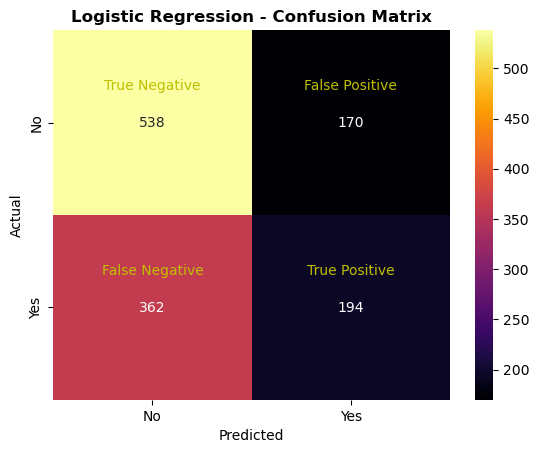


Recall 0.3489208633093525
Accuracy: 0.5791139240506329
F1 Score: 0.4217391304347826


In [345]:
# 1. Model Training
lgr = LogisticRegression(random_state = 42)
lgr.fit(X_train_scaled, y_train_encoded)

# 2. Predictions
y_pred_lgr = lgr.predict(X_val_scaled)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_lgr,'Logistic Regression')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_lgr,pos_label = 1))
print("Accuracy:", accuracy_score(y_val_encoded, y_pred_lgr))
print("F1 Score:", f1_score(y_val_encoded, y_pred_lgr, pos_label = 1))

### ***9.2 SUPPORT VECTOR CLASSIFIER***

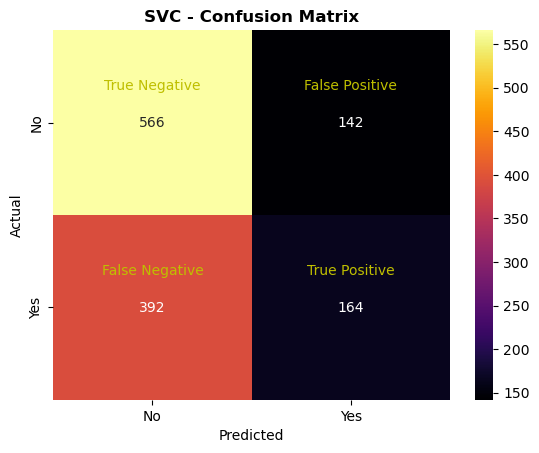


Recall 0.2949640287769784
Accuracy: 0.5775316455696202
F1 Score: 0.3805104408352668


In [346]:
svc = SVC(random_state = 42)
svc.fit(X_train_scaled, y_train_encoded)

# 2. Predictions
y_pred_svc = svc.predict(X_val_scaled)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_svc,'SVC')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_svc,pos_label = 1))
print("Accuracy:", accuracy_score(y_val_encoded, y_pred_svc))
print("F1 Score:", f1_score(y_val_encoded, y_pred_svc, pos_label = 1))

### ***9.3 DECISION TREE***

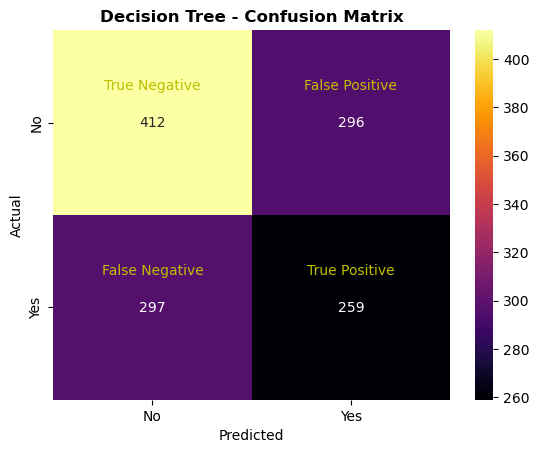


Recall 0.4658273381294964
Accuracy: 0.5308544303797469
F1 Score: 0.46624662466246625


In [347]:
# 1. Model Training
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_final, y_train_encoded)

# 2. Predictions
y_pred_dt = dt.predict(X_val_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_dt,'Decision Tree')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_dt,pos_label = 1))
print("Accuracy:", accuracy_score(y_val_encoded, y_pred_dt))
print("F1 Score:", f1_score(y_val_encoded, y_pred_dt, pos_label = 1))


### ***9.4 RANDOM FOREST***

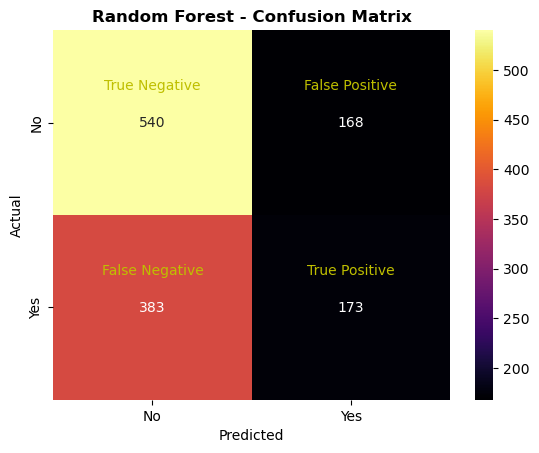


Recall 0.31115107913669066
Accuracy: 0.5640822784810127
F1 Score: 0.3857302118171683


In [348]:
# 1. Model Training
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_final, y_train_encoded)

# 2. Predictions
y_pred_rf = rf.predict(X_val_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_rf,'Random Forest')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_rf,pos_label = 1))
print("Accuracy:", accuracy_score(y_val_encoded, y_pred_rf))
print("F1 Score:", f1_score(y_val_encoded, y_pred_rf, pos_label = 1))


In [349]:
# Function to print the summary table

def summary_table(*y_preds,y_val):
    # Dictionary to store results
    results = {
        "Model": [],
        "Accuracy": [],
        "Precision(Class-1)":[],
        "Recall(Class-1)": [],
        "F1 Score(Class-1)": [],
    }
    
    # List of model names and their predictions
    model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
    y_preds = list(y_preds)
    
    # Populate results
    for name, y_pred in zip(model_names, y_preds):
        results["Model"].append(name)
        results["Accuracy"].append(round(accuracy_score(y_val, y_pred) * 100))  
        results["Precision(Class-1)"].append(round(precision_score(y_val, y_pred, pos_label = 1) * 100))
        results["Recall(Class-1)"].append(round(recall_score(y_val, y_pred, pos_label = 1) * 100))
        results["F1 Score(Class-1)"].append(round(f1_score(y_val, y_pred, pos_label = 1) * 100))
       
    # Create a DataFrame
    summary_df = pd.DataFrame(results)
    summary_df.set_index('Model',inplace = True)
    # Display the table
    print(summary_df)

In [350]:
# Pinting summary table
summary_table(y_pred_lgr,y_pred_svc,y_pred_dt,y_pred_rf, y_val = y_val_encoded)

                     Accuracy  Precision(Class-1)  Recall(Class-1)  \
Model                                                                
Logistic Regression        58                  53               35   
SVC                        58                  54               29   
Decision Tree              53                  47               47   
Random Forest              56                  51               31   

                     F1 Score(Class-1)  
Model                                   
Logistic Regression                 42  
SVC                                 38  
Decision Tree                       47  
Random Forest                       39  


### ***9.5 INITIAL MODEL EVALUATION SUMMARY***

- ***`We trained and evaluated four baseline models on our hospital readmission dataset with a slightly imbalanced target (56% No, 44% Yes). Our focus is particularly on improving Recall for Class 1 (Yes), as predicting patients likely to be readmitted is critical in a healthcare scenario. The models lean towards predicting the majority class(No). This is evident from the high number of False Negatives. All models show subpar ability to correctly identify patients who will be readmitted. Decision Tree performs slightly better with ~47% recall.`***

- ***`Though some models show ~58% accuracy, it’s not reflecting actual performance for our goal since our models lean towards predicting majority class(No), accuracy is not a reliable metric. For example, if 70% of patients are not readmitted, a model that always predicts "No" will have 70% accuracy — but it's useless because it never identifies the actual readmissions. So moving on we don't focus on accuracy of the models.`***

- ***`Therefore, we focus on recall, precision, and F1 score, which give a much clearer picture of how well our model identifies and balances the minority class (i.e., readmitted patients). F1 score and Recall are more suitable metrics here. Our primary goal is to maximize Recall and F1 score for Class 1 (readmitted patients), without compromising overall model stability. High recall ensures fewer at-risk patients are missed. As our aim is to minimize false negatives (i.e., undetected readmissions), we will now focus on improving model performance using class balancing via weights, feature importance analysis, cross-validation, and hyperparameter tuning.`***


### ***9.6 RE-TRAIN ALL 4 MODELS WITH `class_weight='balanced'`***

***After training the baseline models, we introduced `class_weight='balanced'` to help the models handle class imbalance internally. This change led to a `significant improvement in Recall for Class 1`, especially for Logistic Regression and SVC. Our goal remains maximizing Class 1 recall, and the next phase involves hyperparameter tuning, cross-validation.***

In [351]:
# Modifying the function to print the summary table

def summary_table_modified(*y_preds,y_val):
    # Dictionary to store results
    results = {
        "Model": [],
        "Precision(Class-1)":[],
        "Recall(Class-1)": [],
        "F1 Score(Class-1)": [],
    }
    
    # List of model names and their predictions
    model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
    y_preds = list(y_preds)
    
    # Populate results
    for name, y_pred in zip(model_names, y_preds):
        results["Model"].append(name)
        results["Precision(Class-1)"].append(round(precision_score(y_val, y_pred, pos_label = 1) * 100))
        results["Recall(Class-1)"].append(round(recall_score(y_val, y_pred, pos_label = 1) * 100))
        results["F1 Score(Class-1)"].append(round(f1_score(y_val, y_pred, pos_label = 1) * 100))
       
    # Create a DataFrame
    summary_df = pd.DataFrame(results)
    summary_df.set_index('Model',inplace = True)
    # Display the table
    print(summary_df)

### ***9.6.1 LOGISTIC REGRESSION***

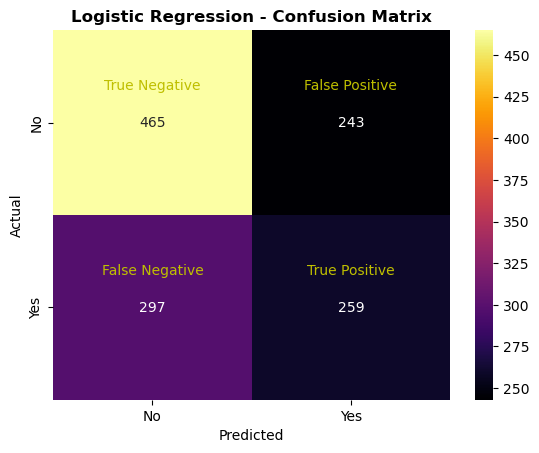


Recall 0.4658273381294964
Precision: 0.5159362549800797
F1 Score: 0.4896030245746692


In [352]:
lgr_bal = LogisticRegression(random_state = 42,class_weight = 'balanced')
lgr_bal.fit(X_train_scaled, y_train_encoded)

# 2. Predictions
y_pred_lgr_bal = lgr_bal.predict(X_val_scaled)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_lgr_bal,'Logistic Regression')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_lgr_bal,pos_label = 1))
print("Precision:", precision_score(y_val_encoded, y_pred_lgr_bal,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_lgr_bal, pos_label = 1))

### ***9.6.2 SUPPORT VECTOR CLASSIFIER***

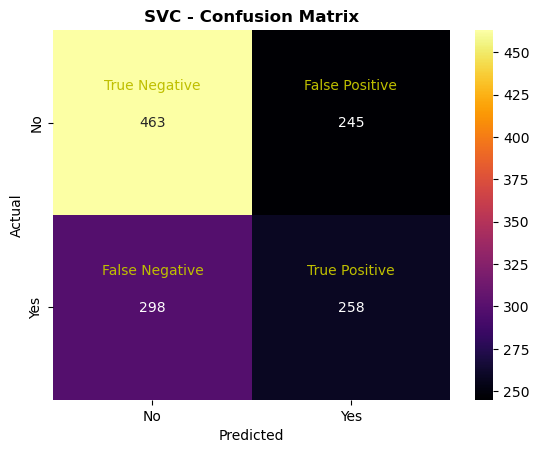


Recall 0.46402877697841727
Precision: 0.5129224652087475
F1 Score: 0.48725212464589235


In [353]:
svc_bal = SVC(random_state = 42,class_weight = 'balanced')
svc_bal.fit(X_train_scaled, y_train_encoded)

# 2. Predictions
y_pred_svc_bal = svc_bal.predict(X_val_scaled)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_svc_bal,'SVC')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_svc_bal,pos_label = 1))
print("Precision:", precision_score(y_val_encoded, y_pred_svc_bal,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_svc_bal, pos_label = 1))

### ***9.6.3 DECISION TREE***

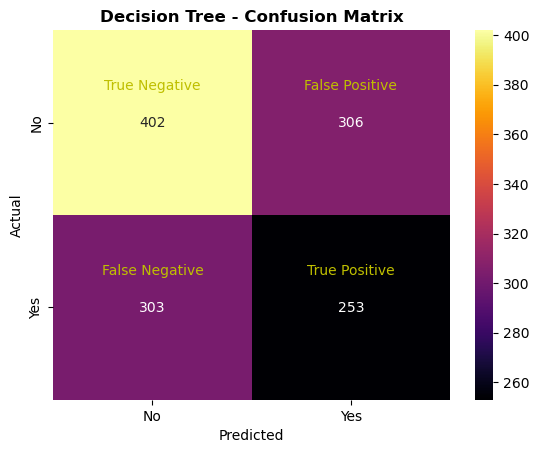


Recall 0.4550359712230216
Precision: 0.4525939177101968
F1 Score: 0.4538116591928251


In [354]:
# 1. Model Training
dt_bal = DecisionTreeClassifier(random_state = 42,class_weight = 'balanced')
dt_bal.fit(X_train_final, y_train_encoded)

# 2. Predictions
y_pred_dt_bal = dt_bal.predict(X_val_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_dt_bal,'Decision Tree')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_dt_bal,pos_label = 1))
print("Precision:", precision_score(y_val_encoded, y_pred_dt_bal,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_dt_bal, pos_label = 1))

### ***9.6.4 RANDOM FOREST***

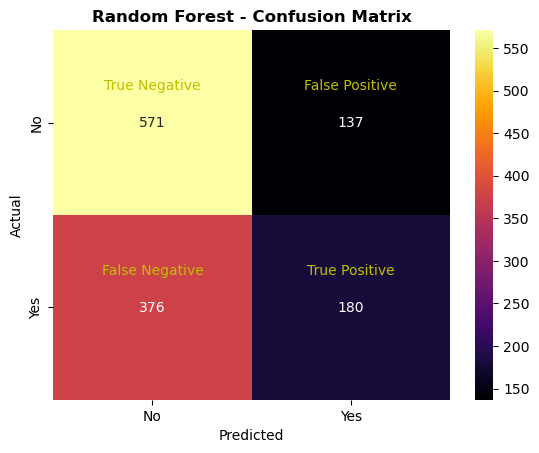


Recall 0.3237410071942446
Precision: 0.5678233438485805
F1 Score: 0.41237113402061853


In [355]:
# 1. Model Training
rf_bal = RandomForestClassifier(random_state = 42,class_weight = 'balanced')
rf_bal.fit(X_train_final, y_train_encoded)

# 2. Predictions
y_pred_rf_bal = rf_bal.predict(X_val_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_encoded, y_pred_rf_bal,'Random Forest')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_rf_bal,pos_label = 1))
print("Precision:", precision_score(y_val_encoded, y_pred_rf_bal,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_rf_bal, pos_label = 1))


In [356]:
# Printing the summary table
summary_table_modified(y_pred_lgr_bal,y_pred_svc_bal,y_pred_dt_bal,y_pred_rf_bal, y_val = y_val_encoded)

                     Precision(Class-1)  Recall(Class-1)  F1 Score(Class-1)
Model                                                                      
Logistic Regression                  52               47                 49
SVC                                  51               46                 49
Decision Tree                        45               46                 45
Random Forest                        57               32                 41


## ***10. HYPERPARAMETER TUNING***

***Observations and Issues -***

- `Logistic Regression achieved the highest recall (84%), meaning it identified most of the patients who were actually readmitted. However, it also had many false positives, reflected in its lower precision (46%).`
- `SVC, Decision Tree, and Random Forest models are underperforming, with both recall and F1 scores below acceptable levels.`
- `Although Random Forest has the best precision (53%), its recall is poor (45%), meaning many readmitted patients are still being missed.`
- `Other models rely more on complex interactions and non-linearity, which may not be strong or meaningful in our features.`
- `Overall, the models are biased toward predicting the majority class (Not Readmitted) and struggle to find a good balance between precision and recall, especially for the minority class (Readmitted).`

***Why Is This Happening?***

- `The models, even after tuning, are still using the default classification threshold of 0.5.`
- `This threshold often leads to favoring the majority class, which causes lower recall for the readmitted class (which is actually more important in healthcare).`
- `The models are not yet customized to reflect the real-world cost of missing high-risk patients, which is critical in hospital readmission problems.`


  

### ***10.1 LOGISTIC REGRESSION***

Best Parameters: {'C': 0.0001, 'penalty': 'l2'}
Best Recall on CV: 0.8412771012771012



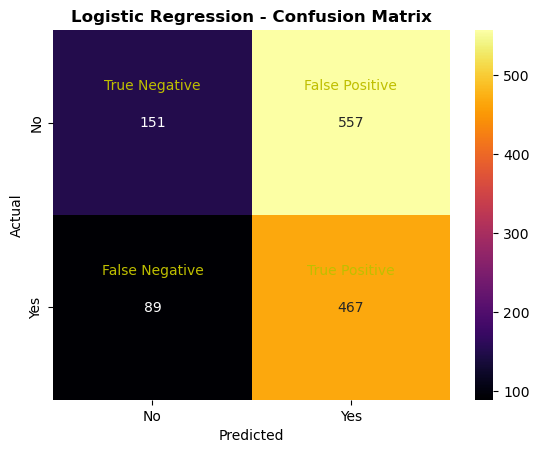


Recall 0.8399280575539568
Precision 0.4560546875
F1 Score: 0.5911392405063292


In [357]:
# Define the model
lgr_hpt = LogisticRegression(class_weight = 'balanced',solver = 'liblinear',random_state = 42)

# Define hyperparameter grid
param_grid = {
    'C': [0.0001, 0.01, 0.05, 1, 5],
    'penalty': ['l1', 'l2'],
}

# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator = lgr_hpt,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search.fit(X_train_scaled, y_train_encoded)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best Recall on CV:", grid_search.best_score_)
print()

# Logistic Regression model evaluation on the test set
best_model_lgr = grid_search.best_estimator_

# Predict on validation set
y_pred_lgr_hpt = best_model_lgr.predict(X_val_scaled)

# Confusion Matrix
confusion_matrix_heatmap(y_val_encoded, y_pred_lgr_hpt,'Logistic Regression')

# Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_lgr_hpt,pos_label = 1))
print("Precision", precision_score(y_val_encoded, y_pred_lgr_hpt,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_lgr_hpt, pos_label = 1))


### ***10.2 SUPPORT VECTOR CLASSIFIER***

Best Parameters: {'C': 0.5, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Recall on CV: 0.5184911812657477



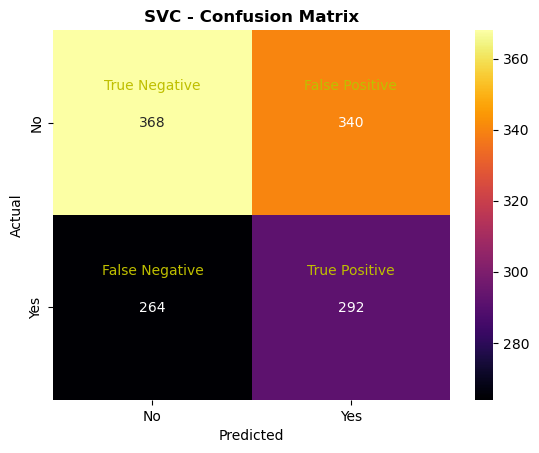


Recall 0.5251798561151079
Precision 0.4620253164556962
F1 Score: 0.49158249158249157


In [358]:
# Define the model
svc_hpt = SVC(class_weight = 'balanced',probability = True,random_state = 42)

# Define hyperparameter grid
param_grid = {         
   'C': [0.0001,0.001,0.5, 1],                    
    'kernel': ['rbf', 'sigmoid'],          
    'gamma': ['scale', 'auto'],  
}
# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator = svc_hpt,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search.fit(X_train_scaled, y_train_encoded)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best Recall on CV:", grid_search.best_score_)
print()

# SVC model evaluation on the test set
best_model_svc = grid_search.best_estimator_

# Predict on validation set
y_pred_svc_hpt = best_model_svc.predict(X_val_scaled)

# Confusion Matrix
confusion_matrix_heatmap(y_val_encoded, y_pred_svc_hpt,'SVC')

# Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_svc_hpt,pos_label = 1))
print("Precision", precision_score(y_val_encoded, y_pred_svc_hpt,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_svc_hpt, pos_label = 1))


### ***10.3 DECISION TREE***

Best Parameters: {'max_depth': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best Recall on CV: 0.5134808062842746



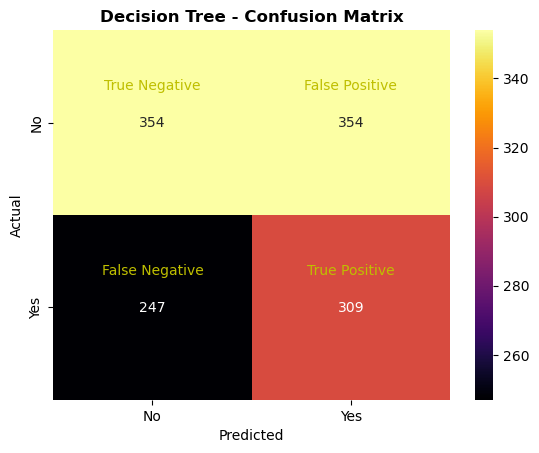


Recall 0.5557553956834532
Precision 0.4660633484162896
F1 Score: 0.5069729286300246


In [359]:
dt_hpt = DecisionTreeClassifier(class_weight = 'balanced',random_state = 42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [20,None],
    'min_samples_split': [2,4],
    'min_samples_leaf': [5,10,12,15], 
    'min_impurity_decrease': [0.0,0.02]
}

# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator = dt_hpt,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search.fit(X_train_final, y_train_encoded)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best Recall on CV:", grid_search.best_score_)
print()

# Decision Tree model evaluation on the test set
best_model_dt = grid_search.best_estimator_

# Predict on validation set
y_pred_dt_hpt = best_model_dt.predict(X_val_final)

# Confusion Matrix
confusion_matrix_heatmap(y_val_encoded, y_pred_dt_hpt,'Decision Tree')

# Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_dt_hpt,pos_label = 1))
print("Precision", precision_score(y_val_encoded, y_pred_dt_hpt,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_dt_hpt, pos_label = 1))


### ***10.4 RANDOM FOREST***

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 15, 'n_estimators': 200}
Best Recall on CV: 0.42951163480065213



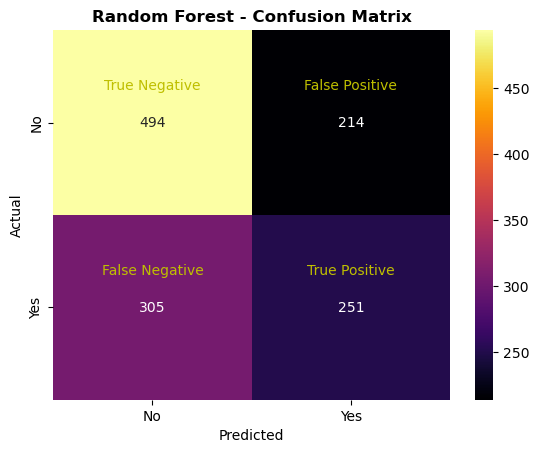


Recall 0.45143884892086333
Precision 0.5397849462365591
F1 Score: 0.49167482859941236


In [360]:
rf_hpt = RandomForestClassifier(class_weight = 'balanced',random_state = 42)

# Define hyperparameter grid
param_grid = {
'n_estimators': [200,400,500],
    'max_depth': [None],
    'min_samples_leaf': [10,15],
    'max_features': ['log2','sqrt']
}
# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator = rf_hpt,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search.fit(X_train_final, y_train_encoded)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best Recall on CV:", grid_search.best_score_)
print()

# Random Forest model evaluation on the test set
best_model_rf = grid_search.best_estimator_

# Predict on validation set
y_pred_rf_hpt = best_model_rf.predict(X_val_final)

# Confusion Matrix
confusion_matrix_heatmap(y_val_encoded, y_pred_rf_hpt,'Random Forest')

# Evaluation Metrics
print("Recall", recall_score(y_val_encoded, y_pred_rf_hpt,pos_label = 1))
print("Precision", precision_score(y_val_encoded, y_pred_rf_hpt,pos_label = 1))
print("F1 Score:", f1_score(y_val_encoded, y_pred_rf_hpt, pos_label = 1))

In [361]:
# Printing the summary table
summary_table_modified(y_pred_lgr_hpt,y_pred_svc_hpt,y_pred_dt_hpt,y_pred_rf_hpt,y_val = y_val_encoded)

                     Precision(Class-1)  Recall(Class-1)  F1 Score(Class-1)
Model                                                                      
Logistic Regression                  46               84                 59
SVC                                  46               53                 49
Decision Tree                        47               56                 51
Random Forest                        54               45                 49


## ***11. THRESHOLD TUNING***

***`By default, classification models (like Logistic Regression, SVC, etc.) predict a probability for each class and use a threshold (usually 0.5) to decide the final label: If probability ≥ 0.5 -> class 1, else -> class 0. But in problems like readmission prediction, where recall (catching true positives) is more important, we might want to lower the threshold. Missing a readmission case (False Negative) is riskier than falsely predicting a readmission (False Positive). So, we do threshold tuning to find a better cutoff, one that gives us higher recall while keeping precision in an acceptable range. In real-world a lower threshold (e.g., 0.3–0.4) is often preferred because it improves recall, even if it slightly sacrifices precision. This means we’d rather flag more patients as high-risk (even if some aren’t) than miss those who truly need intervention. Goal moving forward
is to use the best-trained models and tune the threshold using validation set probabilities.`***

In [362]:
# Threshold Tuning Function
def threshold_tuning_df(model,X_val,y_val,thresholds = [0.25, 0.3,0.32, 0.33, 0.34, 0.345, 0.35, 0.36, 0.375, 0.4, 0.45, 0.475, 0.5, 0.55],pos_label=1):
    """
    Returns a DataFrame with precision, recall, and F1 scores for each threshold.

    Parameters:
    - model: Trained classifier (must have predict_proba())
    - X_val: Validation features
    - y_val: True labels
    - thresholds: List/array of thresholds to evaluate
    - pos_label: The positive class label (usually 1)

    Returns:
    - DataFrame with columns: Threshold, Precision, Recall, F1 Score
    """
    y_probs = model.predict_proba(X_val)[:,1]
    results = []

    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        precision = precision_score(y_val, y_pred, pos_label = pos_label,zero_division = 0)
        recall = recall_score(y_val, y_pred, pos_label = pos_label,zero_division = 0)
        f1 = f1_score(y_val, y_pred, pos_label = pos_label,zero_division = 0)
        results.append({'Threshold': round(t*100, 3), 'Precision': round(precision*100), 'Recall': round(recall*100), 'F1 Score': round(f1*100)})

    return pd.DataFrame(results)

In [363]:
# Logistic Regression
df_lgr_thresholds = threshold_tuning_df(best_model_lgr, X_val_scaled, y_val_encoded)
df_lgr_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         44     100        61
1        30.0         44     100        61
2        32.0         44     100        61
3        33.0         44     100        61
4        34.0         44     100        61
5        34.5         44     100        61
6        35.0         44     100        61
7        36.0         44     100        61
8        37.5         44     100        61
9        40.0         44     100        61
10       45.0         44     100        61
11       47.5         44     100        61
12       50.0         46      84        59
13       55.0          0       0         0

In [364]:
# Support Vector Classifier
df_svc_thresholds = threshold_tuning_df(best_model_svc, X_val_scaled, y_val_encoded)
df_svc_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         44     100        61
1        30.0         44     100        61
2        32.0         44     100        61
3        33.0         44     100        61
4        34.0         44     100        61
5        34.5         44     100        61
6        35.0         44     100        61
7        36.0         44     100        61
8        37.5         44     100        61
9        40.0         44      99        61
10       45.0         50      10        17
11       47.5         33       0         0
12       50.0          0       0         0
13       55.0          0       0         0

In [365]:
# Decision Tree Classifier
df_dt_thresholds = threshold_tuning_df(best_model_dt_hpt, X_val_final, y_val_encoded)
df_dt_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         45      77        57
1        30.0         45      74        56
2        32.0         46      73        56
3        33.0         46      72        56
4        34.0         46      72        56
5        34.5         46      71        56
6        35.0         46      70        56
7        36.0         46      70        56
8        37.5         46      69        55
9        40.0         46      65        54
10       45.0         46      61        52
11       47.5         46      58        51
12       50.0         47      56        51
13       55.0         46      45        46

In [366]:
# Random Forest
df_rf_thresholds = threshold_tuning_df(best_model_rf, X_val_final, y_val_encoded)
df_rf_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         44     100        61
1        30.0         44     100        61
2        32.0         44     100        61
3        33.0         44     100        61
4        34.0         44     100        61
5        34.5         44      99        61
6        35.0         44      99        61
7        36.0         44      99        61
8        37.5         44      98        61
9        40.0         45      93        60
10       45.0         49      71        58
11       47.5         52      58        55
12       50.0         54      45        49
13       55.0         54      26        35

#### ***After Threshold Tuning, Random Forest at a threshold of 0.40 achieved:***

#### - ***`Recall = 93%`: Capturing nearly all patients who are at risk of readmission.***

#### - ***`Precision = 45%`: Indicates that nearly half of the predicted readmissions are correct.***

#### - ***`F1 Score = 60%`: Balances precision and recall effectively.***

#### ***This threshold provides the highest overall recall with reasonable precision, aligning with the real-world priority of minimizing missed readmissions, even if it increases the number of false alarms. In the context of hospital risk management, this trade-off is often acceptable and even desirable — making this model a strong choice.***

## ***12. PREDICTION AND EVALUATION***

#### ***`SUMMARY-`*** 
- ***`After building and testing multiple machine learning models, tuning their hyperparameters, and adjusting the decision threshold, we finalized the Random Forest Classifier as our best-performing model. We evaluated this model on the test dataset using a custom threshold of 0.40.`***
  
- ***`This threshold was chosen to help us catch more actual readmissions, which is crucial in the healthcare domain. In such scenarios, missing a high-risk patient is more dangerous than raising a few extra alerts.`***

- ***`Recall (93%): Out of all patients who were actually readmitted within 30 days, the model was able to catch 93%. This is a very good sign because it means we are identifying most of the high-risk cases.`***

- ***`Precision (45%): Out of the patients the model predicted would be readmitted, 45% actually were. While not very high, this is acceptable in medical settings where catching most risky patients is more important than being 100% precise.`***

- ***`F1 Score (60%): This is the balanced measure of recall and precision. A score of 60% shows that our model is doing moderately well overall, catching a good number of actual readmissions while keeping a fair level of correctness in predictions.`***

- ***`In healthcare, especially when predicting hospital readmissions, it is better to be safe than sorry. This model ensures that very few high-risk patients go unnoticed, which can help hospitals take early action, improve care, and reduce avoidable readmissions.`***



In [367]:
# Selecting the best model
generic_best_model = best_model_rf

In [368]:
# Predict probabilities for the positive class (class 1)
y_test_probs = generic_best_model.predict_proba(X_test_final)[:, 1]

In [369]:
# Apply threshold
threshold = 0.40
y_test_pred_thresh = (y_test_probs >= threshold).astype(int)

In [370]:
# Evaluate Performance on Test Set
recall = recall_score(y_test_encoded, y_test_pred_thresh, pos_label = 1,zero_division = 0)
f1 = f1_score(y_test_encoded, y_test_pred_thresh, pos_label = 1,zero_division = 0)
precision = precision_score(y_test_encoded, y_test_pred_thresh, pos_label = 1,zero_division = 0)

print("Test Set Results at Threshold = 0.40")
print("Recall:", round(recall * 100),"%")
print("Precision:", round(precision * 100),"%")
print("F1 Score:", round(f1 * 100),"%")

Test Set Results at Threshold = 0.40
Recall: 93 %
Precision: 45 %
F1 Score: 60 %


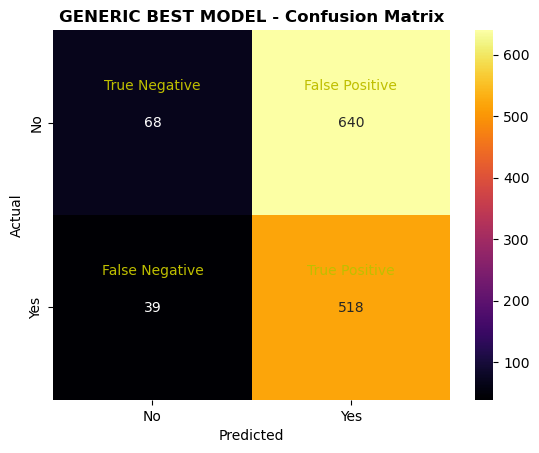

In [371]:
# Confusion Matrix Plot
confusion_matrix_heatmap(y_test_encoded, y_test_pred_thresh,'GENERIC BEST MODEL')

### ***FEATURE IMPORTANCE***

#### ***`SUMMARY -`***

- ***`After training and threshold tuning our best-performing generic model (Random Forest), we extracted feature importances to understand which variables had the greatest impact on predicting hospital readmissions. In Random Forests, each split in a tree uses a feature to separate data. The more a feature reduces impurity across all trees, the more important it is. Our engineered features bmi_ratio, age_burden_score, bp_product ranked top because they combine multiple weak signals into stronger risk indicators. The model loved them because they had more predictive value than original variables alone. These were followed closely by clinical metrics such as cholesterol, bmi, and overall disease_burden_score, highlighting how physiological and chronic health factors strongly influence readmission risk. Hospital-related features like length_of_stay, num_inpatient_visits, and discharge_destination also played important roles, suggesting that both the patient's health condition and how they interact with the healthcare system impact outcomes. Interestingly, demographic features such as gender and the presence of hypertension or diabetes had relatively lower influence.`***

In [372]:
# Calculating Feature Imporances
num_importances = (generic_best_model.feature_importances_*100).tolist()

columns = X_train_final.columns.tolist()

feature_imp = []

for feature in zip(columns,num_importances):
    feature_imp.append([feature[0],feature[1]])

feature_importance_df = pd.DataFrame(feature_imp,columns = ['Feature','Importance'])

# Sort by importance (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)


In [373]:
feature_importance_df

Feature  Importance
0                                bmi_ratio    8.788087
1                         age_burden_score    8.410814
2                               bp_product    8.354325
3                              cholesterol    7.958254
4                                      bmi    7.837741
5                     disease_burden_score    6.811758
6                                      age    6.417140
7                              systolic_bp    6.231291
8                             diastolic_bp    6.039382
9              discharge_destination_Rehab    5.646570
10                       medication_visits    4.663769
11                        medication_count    4.056527
12                          length_of_stay    3.876527
13  discharge_destination_Nursing_Facility    2.517318
14                         a1c_test_result    2.490574
15                    num_inpatient_visits    2.355632
16                            insulin_plan    2.108177
17                        hypertension_Yes    1.798823
18                            diabetes_Yes    1.548049
19                            gender_Other    1.101610
20                             gender_Male    0.987634

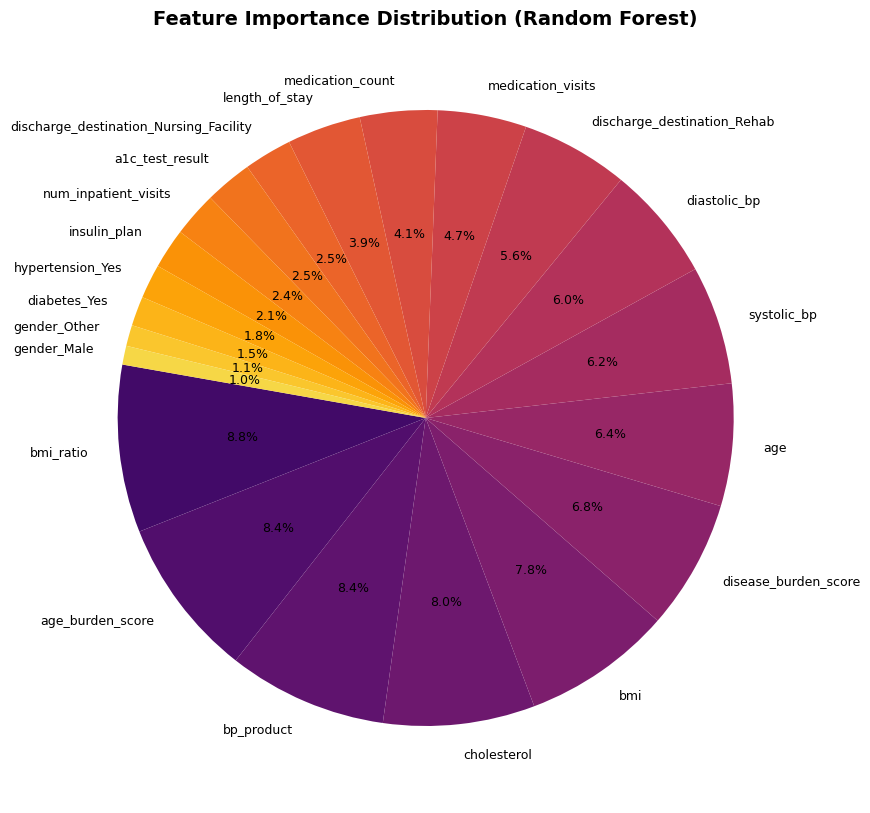

In [615]:
plt.figure(figsize=(10,10))
colors = plt.cm.inferno(np.linspace(0.2, 0.9, len(feature_importance_df)))
plt.pie(
    feature_importance_df["Importance"],
    labels = feature_importance_df["Feature"],
    autopct ='%1.1f%%',
    startangle = 170,
    colors = colors,
    textprops = {'fontsize': 9}
)
plt.title("Feature Importance Distribution (Random Forest)", fontsize = 14 , fontweight = 'bold')
plt.show()

# ***PHASE II - PREDICTING HOSPITAL READMISSION FOR DIABETIC PATIENTS***

## ***1. INTRODUCTION***

- ***`In this second phase of our project, we are focusing only on patients who have diabetes. Although the feature diabetes_Yes did not rank among the top predictors in our feature importance analysis, real-world medical knowledge tells a different story.`***

- ***`According to a study published in BMC Medical Informatics and Decision Making (2021), diabetic patients were found to have higher 30-day readmission rates compared to non-diabetics, often due to poorly controlled glucose levels, comorbidities, and complications related to medication adherence and lifestyle. The paper emphasizes that diabetes is not just a standalone condition—it often amplifies the severity of other diseases, making care more complex and increasing the risk of readmission. Furthermore, the study highlights that targeting diabetic subgroups in predictive modeling can improve the accuracy and relevance of healthcare interventions. This validates our decision to isolate diabetic patients in Phase II. By doing so, we aim to capture patterns unique to this population, ultimately helping hospitals take more tailored and proactive steps in preventing avoidable readmissions.`***

- ***`By shifting our attention to this group, we want to build a model that better understands their specific risks. This can help hospitals take early action—like improving follow-up care or adjusting treatment plans—so that fewer diabetic patients have to be readmitted. Even though diabetes may not have stood out strongly in the model at first, its real-life impact on patient health and hospital resources makes it extremely important to study.`***

Link to the Reference - https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-021-01423-y?utm_source=chatgpt.com#Sec2

## ***2. BASIC DATA EXPLORATION***

In [374]:
# Filtering the dataset to include only diabetic patients.
diabetic_df = patients_df[patients_df['diabetes'] == 'Yes']
diabetic_df = diabetic_df.drop(columns=['diabetes'])

In [375]:
diabetic_df

age  gender  cholesterol   bmi hypertension  medication_count  \
2      84   Other        174.0  39.9           No                 9   
8      79    Male        192.0  28.3           No                 2   
11     66    Male        230.0  18.0           No                 5   
14     73   Other        213.0  18.0           No                 4   
17     33   Other        169.0  28.0          Yes                 2   
...   ...     ...          ...   ...          ...               ...   
8421   81    Male        185.0  28.5           No                10   
8422   66    Male        287.0  32.8          Yes                 1   
8424   49  Female        300.0  31.4          Yes                 1   
8426   59    Male        292.0  31.4           No                 1   
8428   58   Other        251.0  24.8          Yes                 6   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
2                  9                  Home         Down            Norm   
8                  2                 Rehab       Steady            Norm   
11                 2                  Home           No              >7   
14                 3                  Home       Steady             NaN   
17                 9                  Home           Up             <=7   
...              ...                   ...          ...             ...   
8421              10                 Rehab           Up              >7   
8422              10                  Home       Steady              >7   
8424               6      Nursing_Facility         Down             <=7   
8426               3                   NaN           Up             <=7   
8428               4                  Home       Steady             <=7   

      num_inpatient_visits  disease_burden_score readmitted_30_days  \
2                        0                   3.4                 No   
8                        5                   3.7                Yes   
11                       6                   1.7                 No   
14                       1                   1.1                 No   
17                       2                   1.1                 No   
...                    ...                   ...                ...   
8421                     1                   3.7                 No   
8422                     1                   4.0                 No   
8424                     0                   4.5                Yes   
8426                     2                   4.4                Yes   
8428                     1                   3.4                Yes   

      systolic_bp  diastolic_bp  
2           148.0          82.0  
8           132.0          70.0  
11          145.0          85.0  
14          160.0          87.0  
17          140.0          74.0  
...           ...           ...  
8421        133.0          78.0  
8422        150.0          81.0  
8424        141.0          79.0  
8426        142.0          85.0  
8428        143.0          82.0  

[4340 rows x 15 columns]

In [376]:
# Shape of the data
print("Shape of the data: {}".format(diabetic_df.shape))

Shape of the data: (4340, 15)


In [377]:
# Count of duplicate rows
duplicate = diabetic_df.duplicated().sum()
print("Number of duplicate rows: {}".format(duplicate))

Number of duplicate rows: 0


In [378]:
# Count of missing values in each column
diabetic_df.isna().sum()

age                        0
gender                     0
cholesterol               98
bmi                       81
hypertension               0
medication_count           0
length_of_stay             0
discharge_destination     80
insulin_plan               0
a1c_test_result          835
num_inpatient_visits       0
disease_burden_score       0
readmitted_30_days         0
systolic_bp               87
diastolic_bp              87
dtype: int64

In [379]:
# Percentage of data missing in each column
diabetic_df.isna().sum() * 100 / len(diabetic_df)

age                       0.000000
gender                    0.000000
cholesterol               2.258065
bmi                       1.866359
hypertension              0.000000
medication_count          0.000000
length_of_stay            0.000000
discharge_destination     1.843318
insulin_plan              0.000000
a1c_test_result          19.239631
num_inpatient_visits      0.000000
disease_burden_score      0.000000
readmitted_30_days        0.000000
systolic_bp               2.004608
diastolic_bp              2.004608
dtype: float64

In [380]:
# Identifying categorical columns
categorical_cols = diabetic_df.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['gender',
 'hypertension',
 'discharge_destination',
 'insulin_plan',
 'a1c_test_result',
 'readmitted_30_days']

In [381]:
# Identifying numerical columns
numerical_cols = diabetic_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['age',
 'cholesterol',
 'bmi',
 'medication_count',
 'length_of_stay',
 'num_inpatient_visits',
 'disease_burden_score',
 'systolic_bp',
 'diastolic_bp']

In [382]:
# Statistical description of numerical features
diabetic_df.describe()

age  cholesterol          bmi  medication_count  \
count  4340.000000  4242.000000  4259.000000       4340.000000   
mean     66.593088   226.452145    28.835079          4.957143   
std      16.652318    40.958974     5.869440          3.145252   
min      20.000000   150.000000    18.000000          0.000000   
25%      55.000000   197.000000    24.600000          2.000000   
50%      69.000000   227.000000    28.800000          5.000000   
75%      81.000000   256.000000    33.100000          8.000000   
max      99.000000   366.000000    53.000000         10.000000   

       length_of_stay  num_inpatient_visits  disease_burden_score  \
count     4340.000000           4340.000000           4340.000000   
mean         5.260138              1.536636              3.904101   
std          3.008144              1.480858              2.050388   
min          1.000000              0.000000              0.000000   
25%          3.000000              1.000000              2.300000   
50%          5.000000              1.000000              3.600000   
75%          7.000000              2.000000              5.200000   
max         42.000000             15.000000              8.000000   

       systolic_bp  diastolic_bp  
count  4253.000000   4253.000000  
mean    134.761580     85.261933  
std      13.846255      8.346086  
min     110.000000     70.000000  
25%     125.000000     79.000000  
50%     135.000000     85.000000  
75%     144.000000     91.000000  
max     217.000000    131.000000

In [383]:
# Counting unique categories in categorical columns 
for col in categorical_cols:
    print(diabetic_df[col].value_counts(),end='\n\n')

gender
Male      1485
Other     1455
Female    1400
Name: count, dtype: int64

hypertension
Yes    2203
No     2137
Name: count, dtype: int64

discharge_destination
Home                2688
Rehab               1045
Nursing_Facility     527
Name: count, dtype: int64

insulin_plan
Steady    1750
Up        1101
Down      1071
No         418
Name: count, dtype: int64

a1c_test_result
>7      1342
<=7     1298
Norm     865
Name: count, dtype: int64

readmitted_30_days
No     2347
Yes    1993
Name: count, dtype: int64



## ***3. EXPLORATORY DATA ANALYSIS***

## ***3.1 UNIVARIATE ANALYSIS***

### ***3.1.1 TARGET COLUMN***

In [384]:
diabetic_df['readmitted_30_days'].value_counts(normalize = True) * 100 

readmitted_30_days
No     54.078341
Yes    45.921659
Name: proportion, dtype: float64

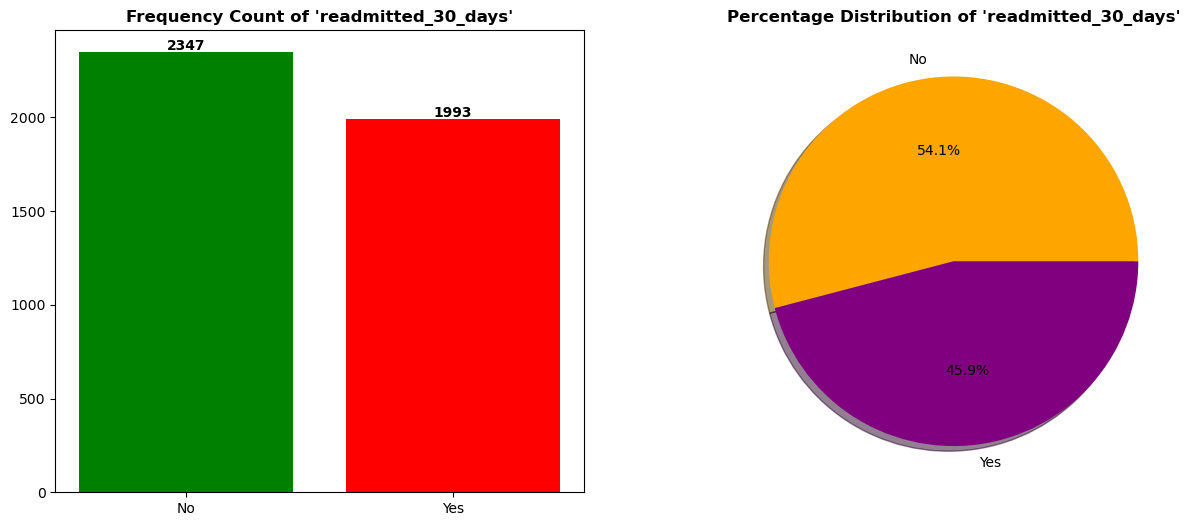

In [385]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

counts = diabetic_df['readmitted_30_days'].value_counts()
categories = counts.index.to_list()
values = counts.to_list()

ax[0].bar(categories, values, color=['green', 'red'])
ax[0].set_title("Frequency Count of 'readmitted_30_days'",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = categories,autopct = '%0.1f%%',colors = ['orange','purple'],shadow = True)
ax[1].set_title("Percentage Distribution of 'readmitted_30_days'",fontweight= 'bold')

plt.show()

### ***3.1.2 NUMERICAL COLUMNS***

***CONCLUSIONS -***

- `Most diabetic patients are older, with an average age of about 66 years. The highest number of patients fall between 60 and 80 years. The curve shows a clear peak in the older age groups, meaning diabetes is more common in the elderly. This trend is similar to what we saw in Phase 1.`

- `Cholesterol levels for diabetic patients mostly range between 197 and 255 mg/dL, with an average around 226 mg/dL. The shape of the curve shows most values are in the middle range, though a few patients have very high cholesterol. These high values are outliers and may need attention. Overall, the pattern is quite like what we observed in the Phase 1.`

- `The average BMI of diabetic patients is around 28.8, placing most of them in the overweight to obese category. The distribution is slightly right-skewed, with most values between 24 and 35. A few patients have unusually high BMI, shown as outliers. This pattern reflects similarities to Phase 1.`

- `On average, diabetic patients are prescribed about 5 medications, with a range from 0 to 10. The distribution is fairly even, meaning patients are taking varying numbers of medications. A small number of patients take no medication, which could indicate non-compliance or recent diagnosis. This column shows broader variability than in the Phase 1.`

- `The average hospital stay for diabetic patients is around 5 days, with most patients staying between 3 to 7 days. The distribution is right-skewed, and a few patients have exceptionally long stays (above 20 days), which are visible as outliers in the boxplot. This indicates that while most diabetic patients have short hospital stays, some experience complications requiring extended care.`

- `Most diabetic patients had 1–2 prior inpatient visits, with an average of about 2. The distribution is heavily skewed right, and a few patients have had 10 or more inpatient admissions. These patients could represent high-risk individuals with recurring complications. This trend is consistent with Phase 1, showing diabetes is often linked to frequent hospital usage.`

- `The average disease burden score is around 4, with most patients scoring between 2 and 5, reflecting a moderate level of co-existing conditions among diabetic individuals. The distribution is slightly right-skewed, and the boxplot shows no major outliers. This suggests diabetic patients commonly suffer from multiple health issues, supporting the need for close monitoring.`

- `Systolic blood pressure among diabetic patients averages 135 mmHg, with a typical range between 125 and 145 mmHg. The distribution is relatively normal but shows a few high outliers above 180 mmHg, indicating hypertensive cases. Similar to Phase 1, elevated systolic values could signal cardiovascular risk and potential for readmission.`

- `For Diastolic blood pressure most values fall between 79–91 mmHg, with a mean around 85 mmHg. The curve is bell-shaped with a few upper outliers above 120 mmHg, which could be concerning for cardiac health.`



In [386]:
# Function for EDA on Numerical Columns

def numerical_col_plots(column):
    
    print(diabetic_df[column].describe())
    print('\nSkewness is',diabetic_df[column].skew(),end = '\n\n')
    
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))
    
    # Histogram
    sns.histplot(data = diabetic_df, x = column, color = 'lime', linewidth = 2, ax = axes[0])
    axes[0].grid(True)
    axes[0].set_title('{} Distribution'.format(column.title()), fontweight='bold')

    # KDE Plot
    sns.kdeplot(data = diabetic_df, x = column, color = 'deeppink', linewidth = 3, ax = axes[1])
    axes[1].grid(True)
    axes[1].set_title('{} Probability Density Curve'.format(column.title()), fontweight='bold')

    # Boxplot
    sns.boxplot(data = diabetic_df, y = column, color = 'darkorange', linewidth = 2, ax = axes[2])
    axes[2].grid(True)
    axes[2].set_title('{} Boxplot'.format(column.title()), fontweight='bold')
    
    plt.tight_layout(rect = [0, 0, 1, 0.95])
    plt.show()
    print()


count    4340.000000
mean       66.593088
std        16.652318
min        20.000000
25%        55.000000
50%        69.000000
75%        81.000000
max        99.000000
Name: age, dtype: float64

Skewness is -0.5606794135866201



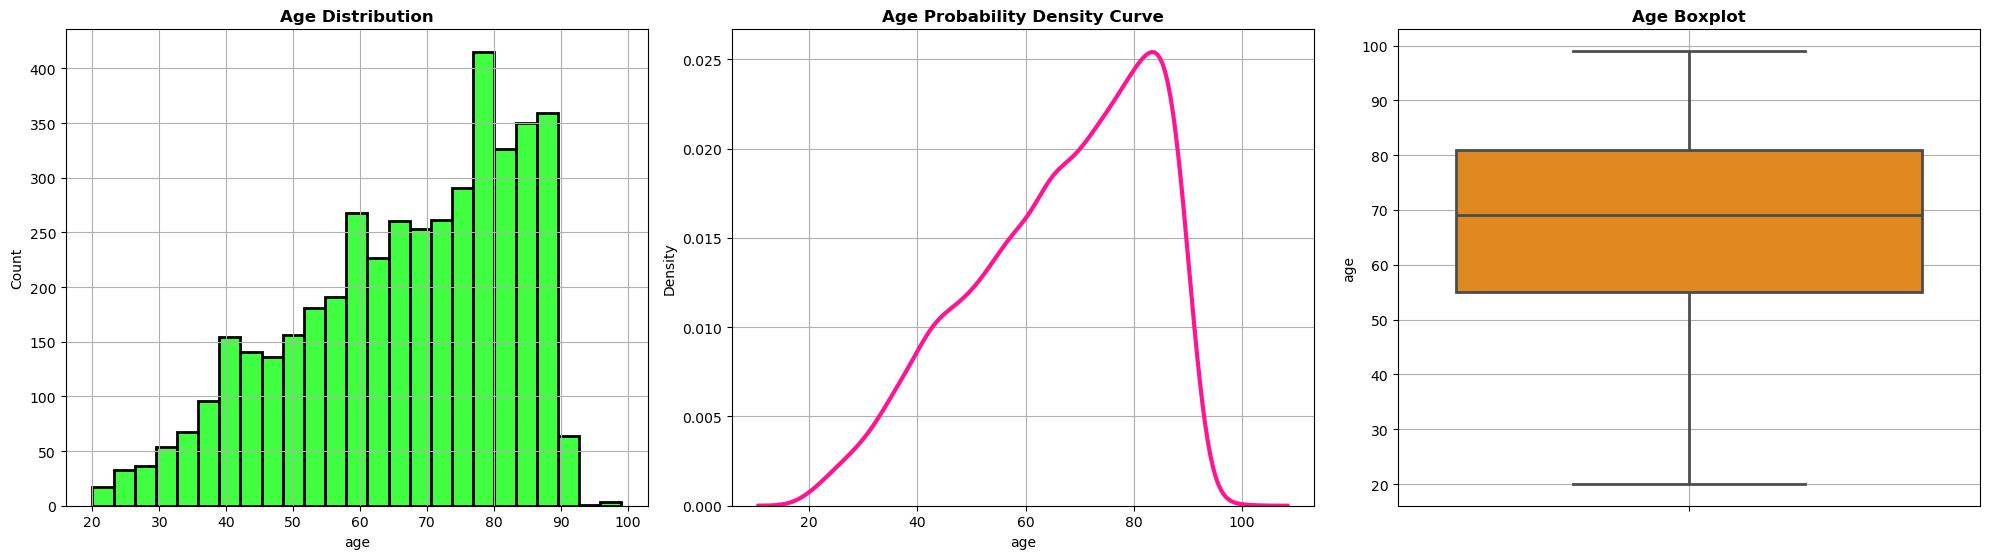


count    4242.000000
mean      226.452145
std        40.958974
min       150.000000
25%       197.000000
50%       227.000000
75%       256.000000
max       366.000000
Name: cholesterol, dtype: float64

Skewness is 0.0024925745810293674



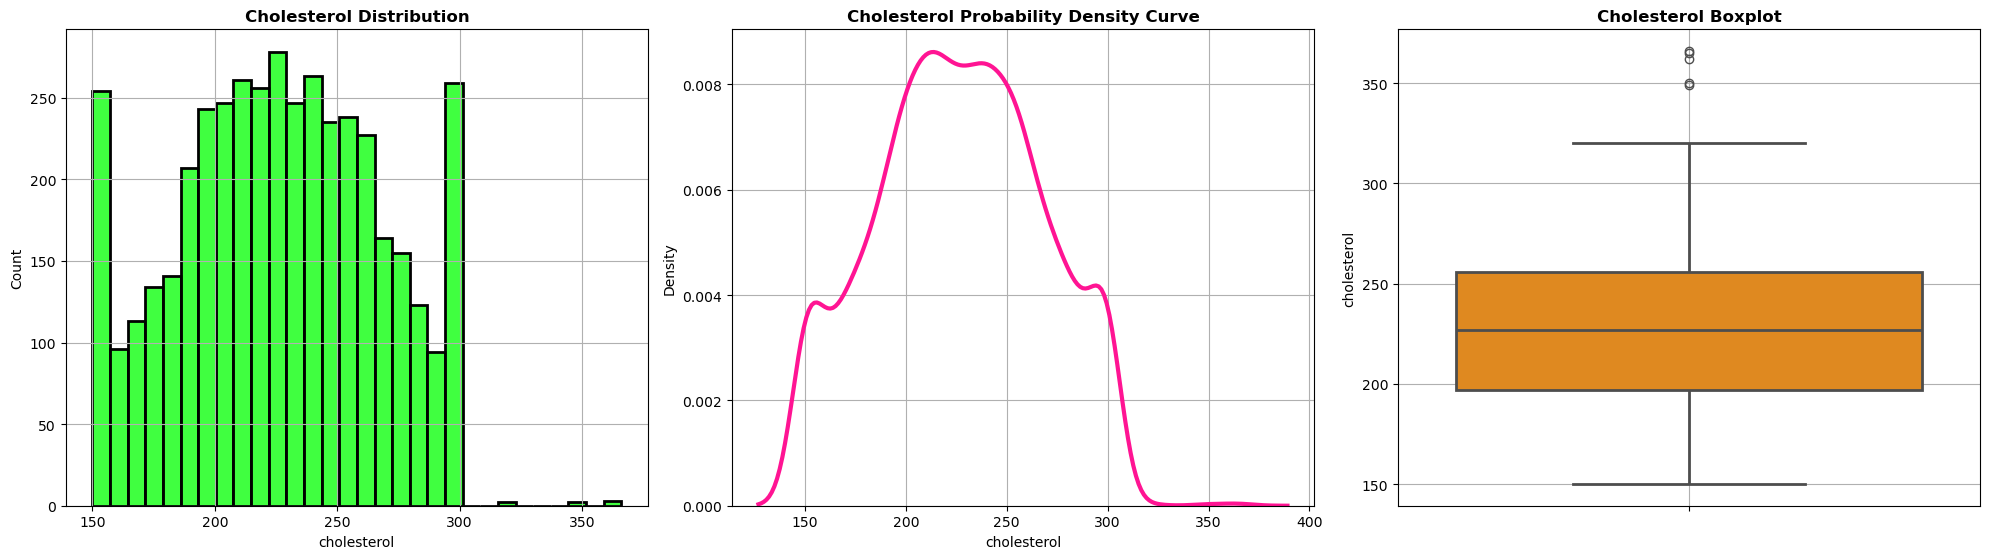


count    4259.000000
mean       28.835079
std         5.869440
min        18.000000
25%        24.600000
50%        28.800000
75%        33.100000
max        53.000000
Name: bmi, dtype: float64

Skewness is 0.06554434991745367



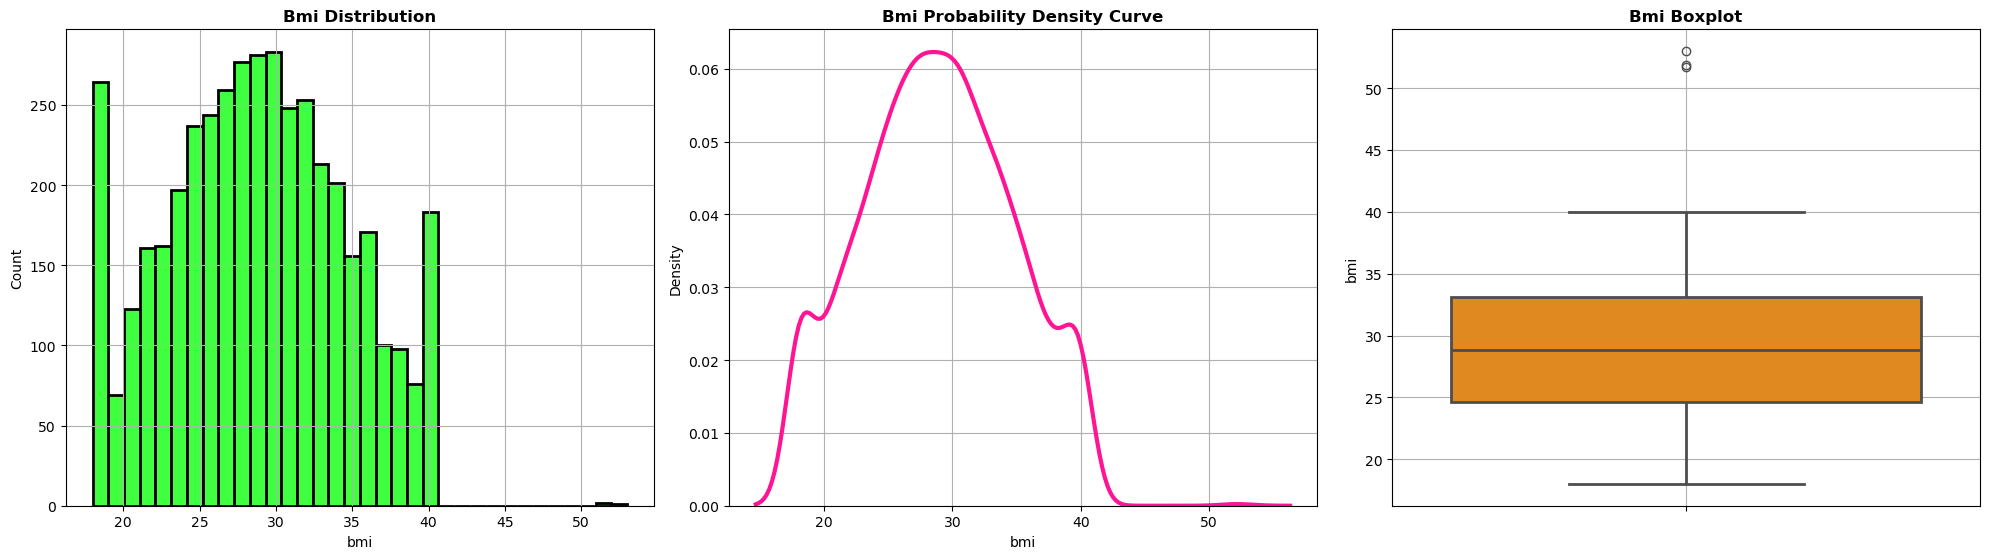


count    4340.000000
mean        4.957143
std         3.145252
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: medication_count, dtype: float64

Skewness is 0.03169555046236919



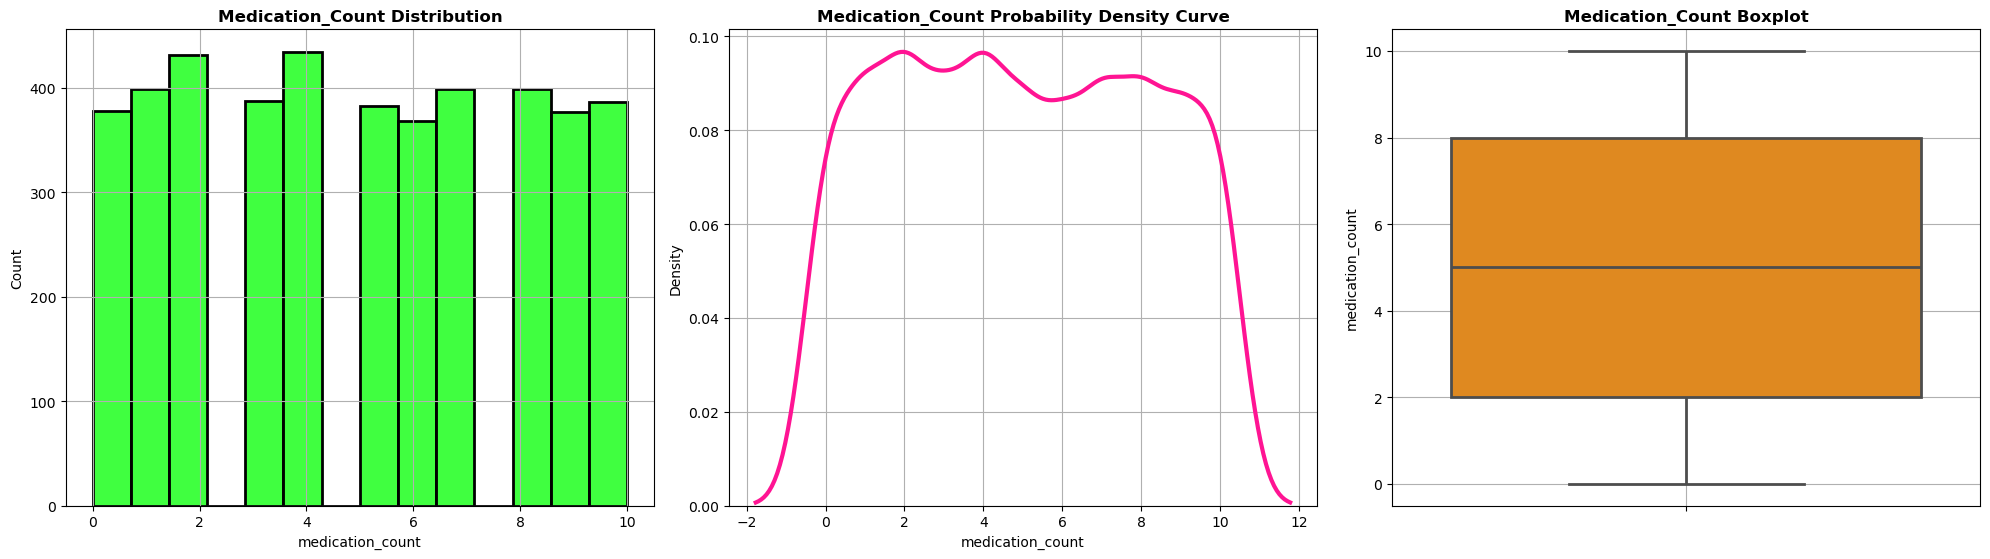


count    4340.000000
mean        5.260138
std         3.008144
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        42.000000
Name: length_of_stay, dtype: float64

Skewness is 2.2736216109946246



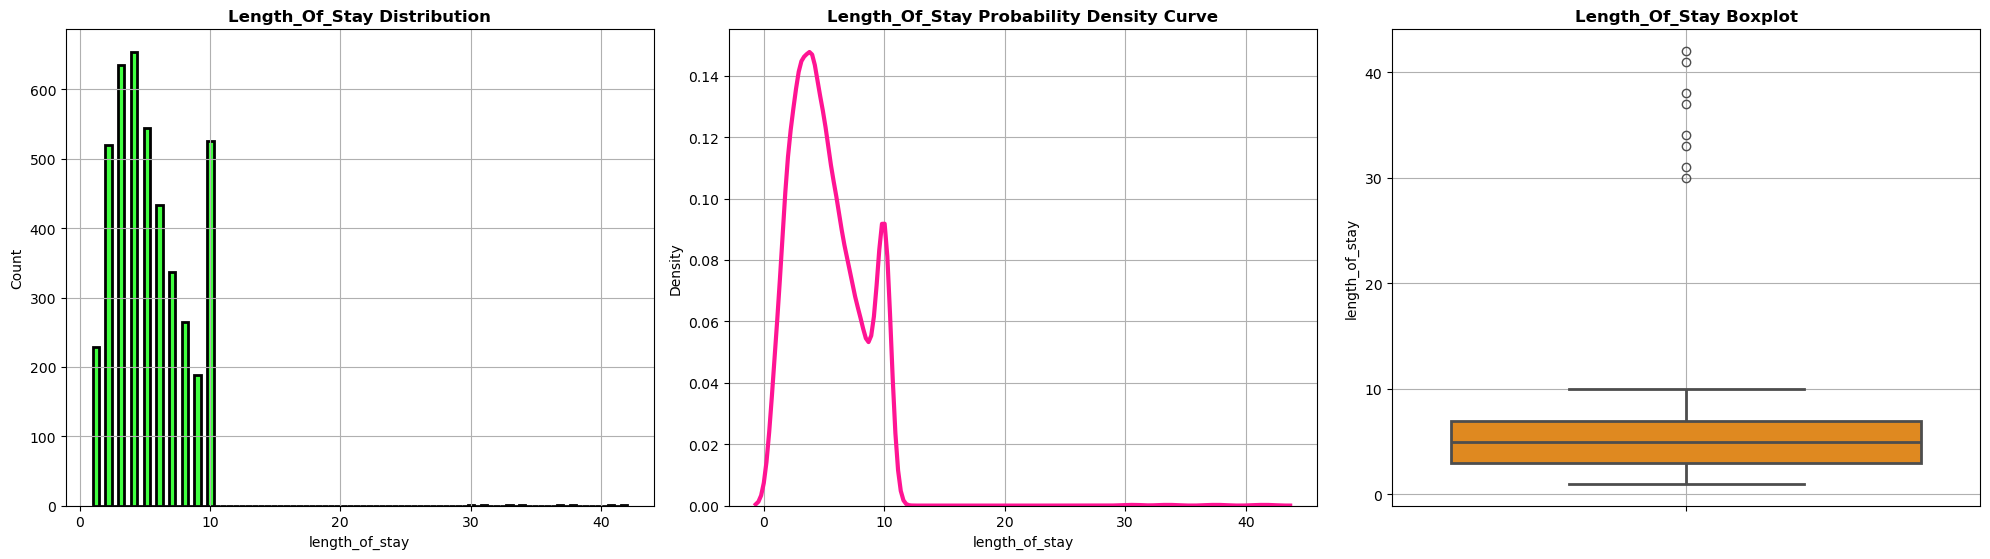


count    4340.000000
mean        1.536636
std         1.480858
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: num_inpatient_visits, dtype: float64

Skewness is 1.8502908245009453



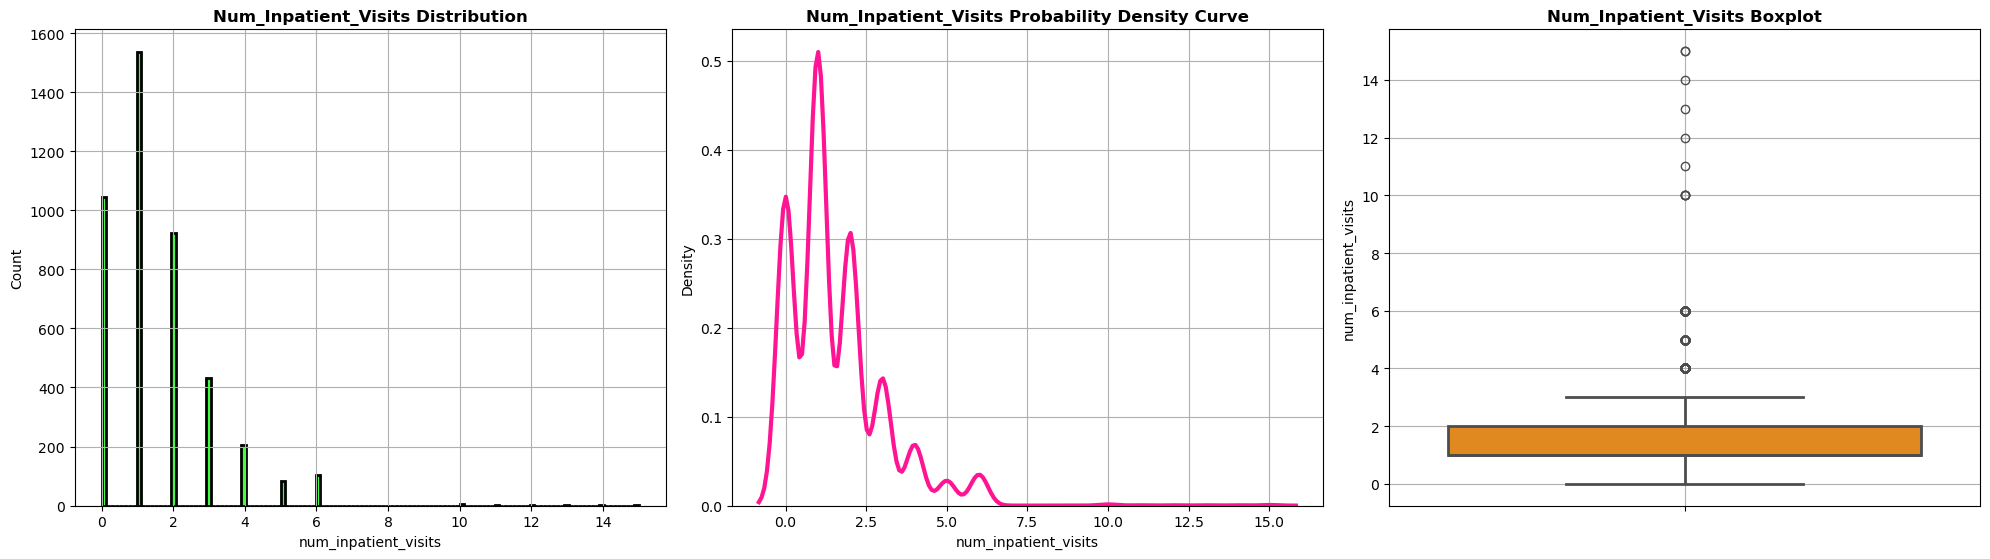


count    4340.000000
mean        3.904101
std         2.050388
min         0.000000
25%         2.300000
50%         3.600000
75%         5.200000
max         8.000000
Name: disease_burden_score, dtype: float64

Skewness is 0.5106681364522341



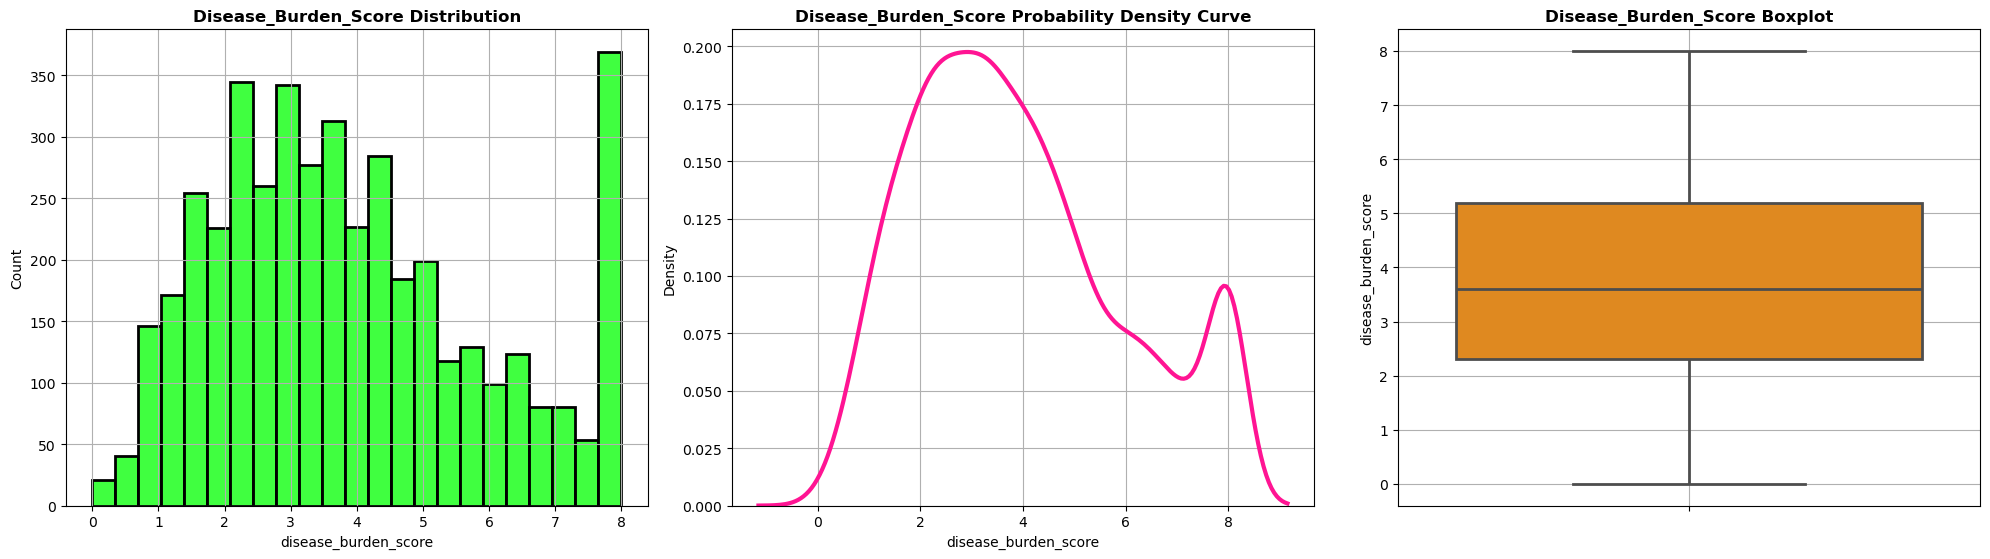


count    4253.000000
mean      134.761580
std        13.846255
min       110.000000
25%       125.000000
50%       135.000000
75%       144.000000
max       217.000000
Name: systolic_bp, dtype: float64

Skewness is 0.19178104348443897



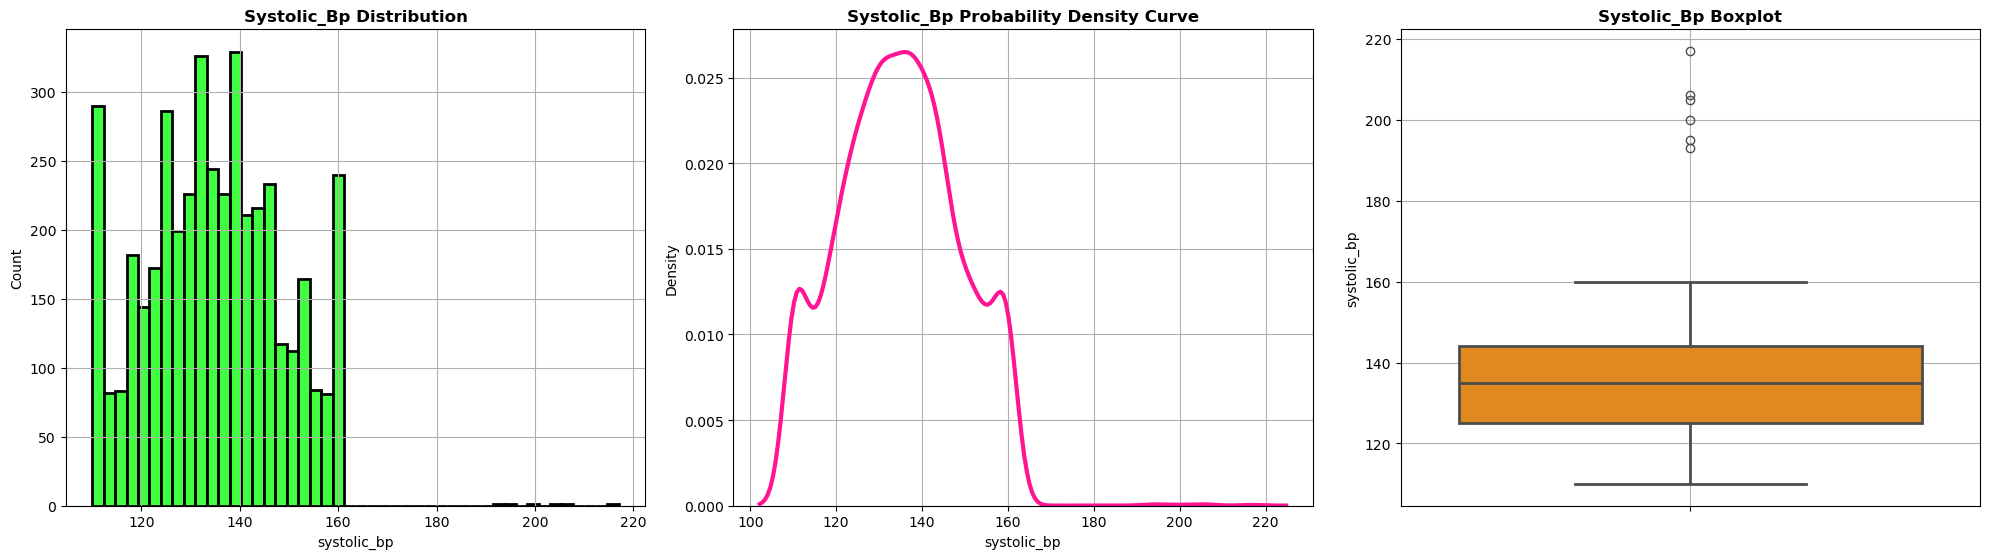


count    4253.000000
mean       85.261933
std         8.346086
min        70.000000
25%        79.000000
50%        85.000000
75%        91.000000
max       131.000000
Name: diastolic_bp, dtype: float64

Skewness is 0.12904328335389043



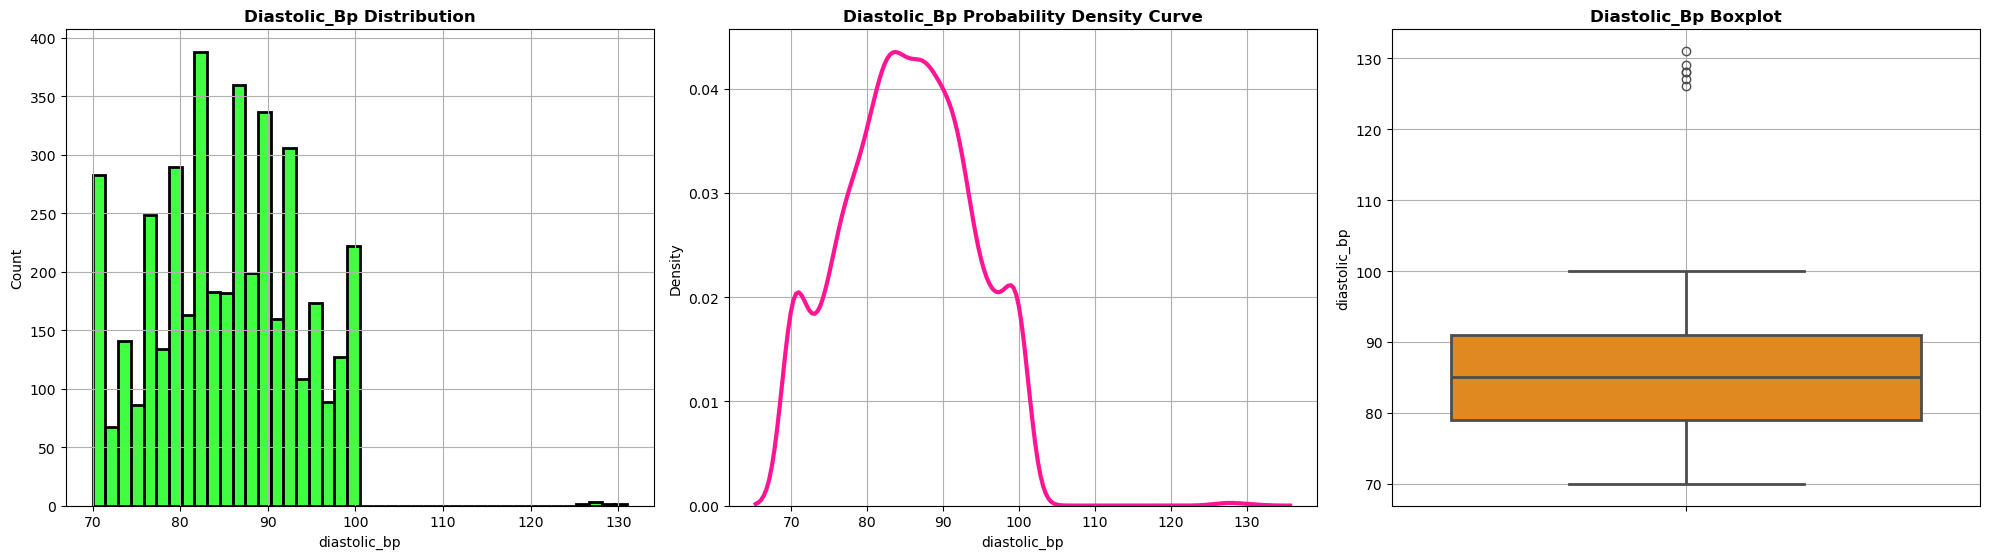

In [387]:
for col in numerical_cols:
    numerical_col_plots(col)

### ***3.1.3 CATEGORICAL COLUMNS***

***CONCLUSIONS -***

- `The gender distribution among diabetic patients is fairly balanced, with around 34% male, 32% female, and another 34% categorized as Other. The even split ensures our model doesn’t show strong bias toward one gender, and gender may not be a highly differentiating factor for readmission prediction on its own.`

- `About 51% of diabetic patients also have hypertension, reflecting a strong real-world connection between the two conditions. This high overlap is medically significant because hypertension can worsen diabetes outcomes and may increase the risk of hospital readmission. This pattern was also observed in Phase 1, highlighting the need to monitor blood pressure in diabetic care.`

- `The majority of patients (over 60%) are discharged home, which usually indicates stable recovery. However, a notable proportion are sent to rehabilitation centers (25%) and nursing facilities (12%), which may signal more serious health conditions or lack of home support.`

- `A wide variety of insulin plans are used, with Steady being the most common (~ 40%), followed by adjustments like Up(~ 25%) and Down(~25%). Only a small number of patients (~10%) were not on insulin. This highlights that most diabetic patients rely on active insulin management, and changes in insulin plans might be linked with unstable glucose levels or recent hospitalizations, making this a potentially important feature for modeling.`

- `The A1C test results are fairly spread across categories. Around 31% of diabetic patients have A1C levels greater than 7, indicating poor long-term glucose control. Close behind, 30% have values less than or equal to 7, suggesting better diabetes management. About 20% fall under the "Norm" category, and another 20% have missing values, which could be due to tests not being conducted or recorded.`

In [388]:
# Function for EDA on Categorical Columns

def categorical_col_plots(column):
    
        fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
    
        counts = diabetic_df[column].value_counts()
        categories = counts.index.to_list()
        values = counts.to_list()
        
        ax[0].bar(categories, values,color = 'darkcyan')
        ax[0].set_title("Frequency Count of {}".format(column.title()),fontweight='bold',fontsize = 12)
                        
        for i,v in enumerate(values):
             ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')
        
        ax[1].pie(values,labels = categories,autopct = '%1.2f%%')
        ax[1].set_title("Percentage Distribution of {} Among Diabetic Patients".format(column.title()),fontweight= 'bold',fontsize = 12)
        plt.show()
                                                                      

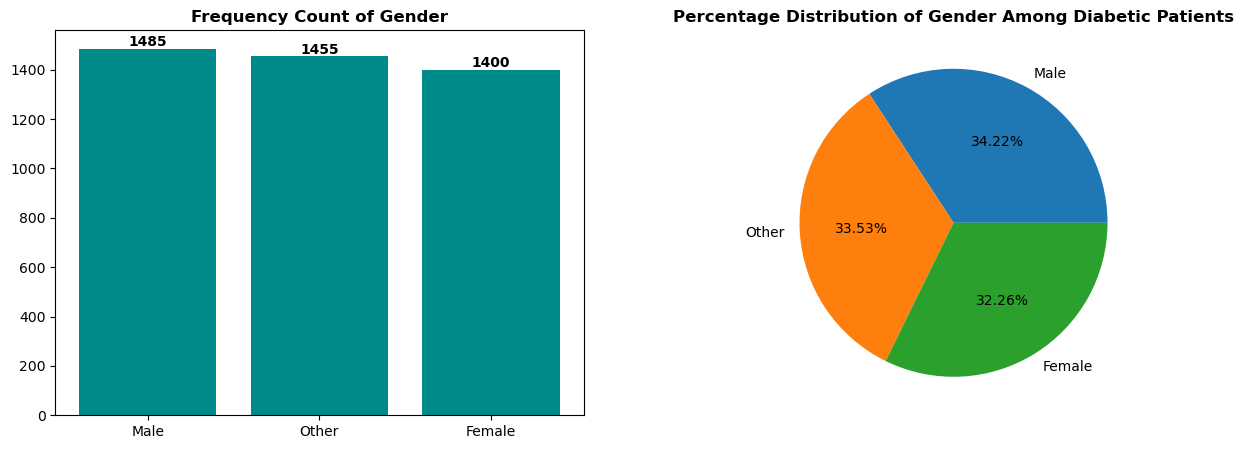

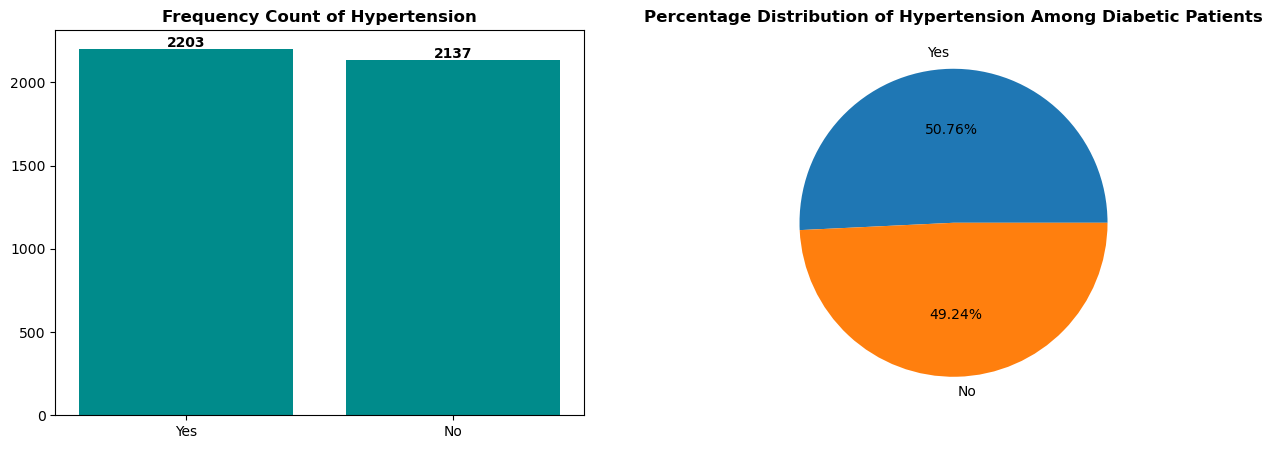

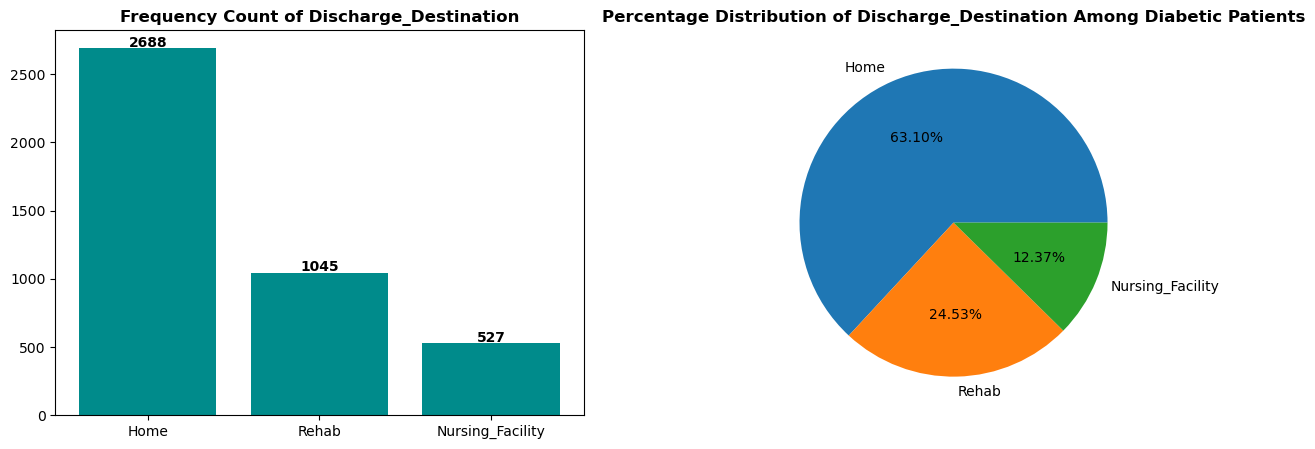

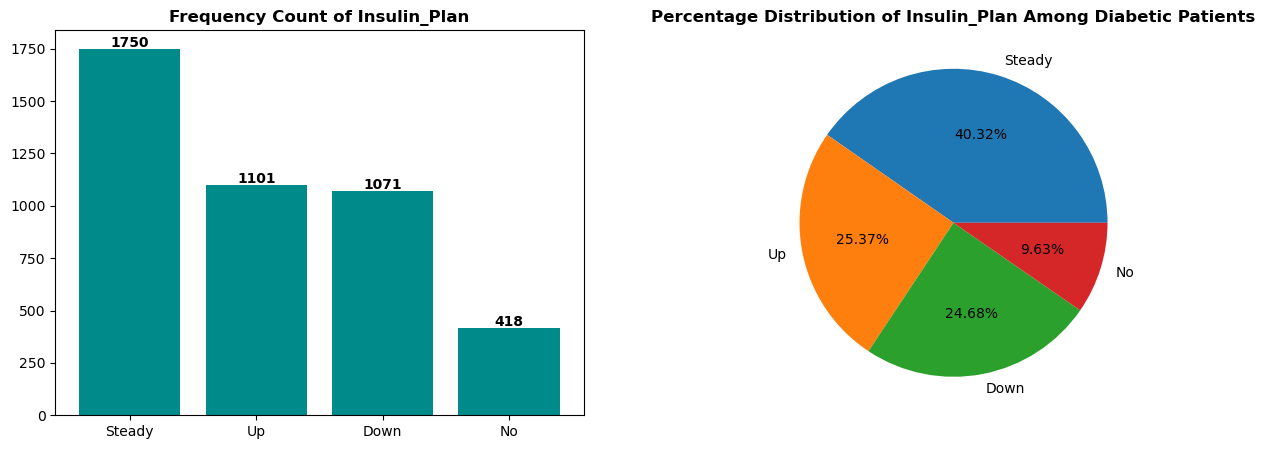

In [389]:
for column in categorical_cols[0:4]:
    categorical_col_plots(column)

### ***A1C_TEST_RESULT***

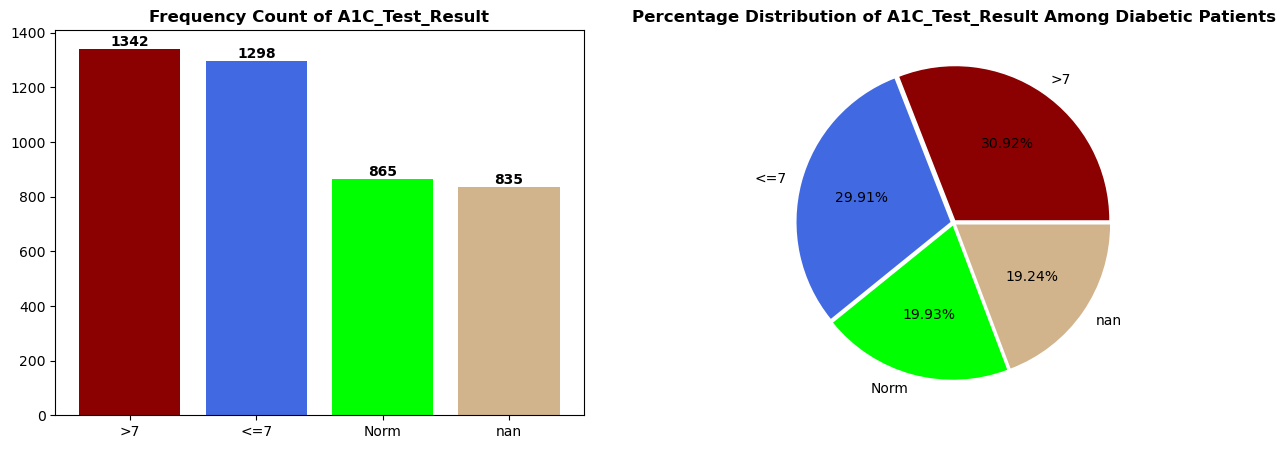

In [390]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

counts = diabetic_df['a1c_test_result'].value_counts(dropna = False)
categories = counts.index.to_list()
values = counts.to_list()
# Convert all categories to strings for labeling( as NaN is considered float value.)
labels = [str(cat) for cat in categories]

ax[0].bar(labels, values,color = ['darkred','royalblue','lime','tan'])
ax[0].set_title("Frequency Count of A1C_Test_Result",fontweight='bold')
for i, v in enumerate(values):
    ax[0].text(i, v + 10, str(v),ha='center', fontweight='bold')

ax[1].pie(values,labels = labels,colors = ['darkred','royalblue','lime','tan'],autopct = '%1.2f%%',explode=[0.02,0.02,0.02,0.02])
ax[1].set_title("Percentage Distribution of A1C_Test_Result Among Diabetic Patients",fontweight= 'bold')

plt.show()

## ***3.2 BIVARIATE ANALYSIS***

### ***3.2.1 NUMERICAL COLUMNS VS THE TARGET COLUMN***

***CONCLUSIONS -***

- `The average and median age appear similar for both readmitted and non-readmitted diabetic patients, centered around the late 60s. Boxplots show overlapping interquartile ranges with no significant visual separation. The KDE plots also align closely, indicating no strong correlation between age and readmission within the diabetic group.`

- `Cholesterol levels also show very little difference between the two groups. Both the boxplot and KDE curves reveal nearly identical distributions, with some outliers on the higher end. This suggests that cholesterol alone may not be a key factor influencing readmission among diabetic patients.`

- `The average BMI is nearly identical for both readmitted and non-readmitted patients, with the KDE plots showing almost perfect overlap. The boxplot reveals slightly more spread in the readmitted group, but overall, there’s no major difference between the two groups, indicating BMI might not be a strong standalone predictor of readmission in diabetics.`

- `Both readmitted and non-readmitted groups have a similar average number of medications prescribed. However, the KDE curve of the readmitted class shows slightly higher density at the upper range of medication counts. This might suggest that patients taking more medications are slightly more likely to be readmitted, but the difference is subtle.`

- `The average length of stay is slightly higher for readmitted patients, but the difference is very small. The boxplot distributions for both groups are nearly identical, with overlapping medians and similar IQRs. The KDE plots also show highly overlapping curves, suggesting no strong difference in stay duration between the two groups. Length of stay does not appear to have a significant impact on short-term readmission among diabetic patients.`

- `Contrary to what might be intuitively expected, the patients who were not readmitted within 30 days had slightly higher values of num_inpatient_visits on average. Both groups mostly have 0 or very few inpatient visits. The No group has more visible outliers, suggesting a few patients had significantly more prior inpatient visits but were not readmitted within 30 days. The KDE curves are largely overlapping. This suggests that a higher number of past inpatient visits doesn’t necessarily indicate immediate readmission. These patients might be under better long-term management or received more intensive care earlier, reducing short-term return chances.`

- `The disease burden score shows a clear difference between readmitted and non-readmitted patients. The KDE plot and boxplot reveal that patients who were readmitted tend to have slightly higher disease burden scores. This suggests that higher comorbidity levels or complications may lead to increased chances of readmission, which aligns with clinical understanding of chronic disease management in diabetics.`

- `The systolic blood pressure distributions are very similar for both groups, with a slightly higher average in readmitted patients. The KDE curves overlap significantly, and the boxplots show minor differences, indicating that systolic BP may not be a strong individual predictor of readmission in this subset.`

- `The average diastolic blood pressure is almost identical between readmitted and non-readmitted groups, hovering around 85 mmHg. The boxplot shows a small drop in median value for the readmitted group. The KDE plot also supports this, with the red line (Yes) peaking a bit earlier. The difference is not very big, but it suggests that lower diastolic BP might be linked to a higher chance of readmission.`

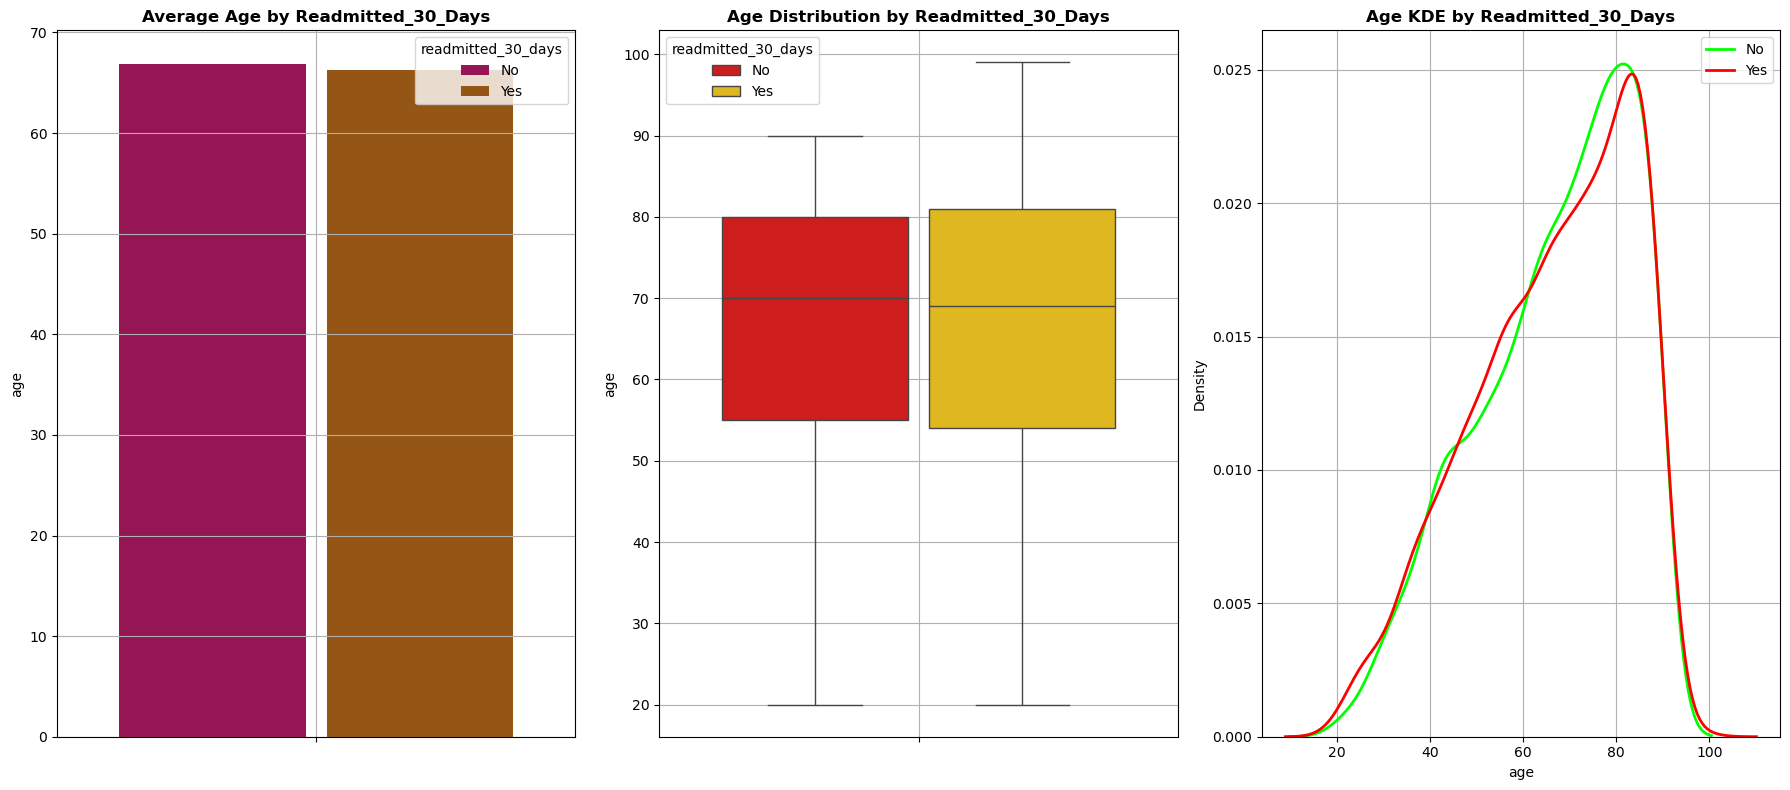

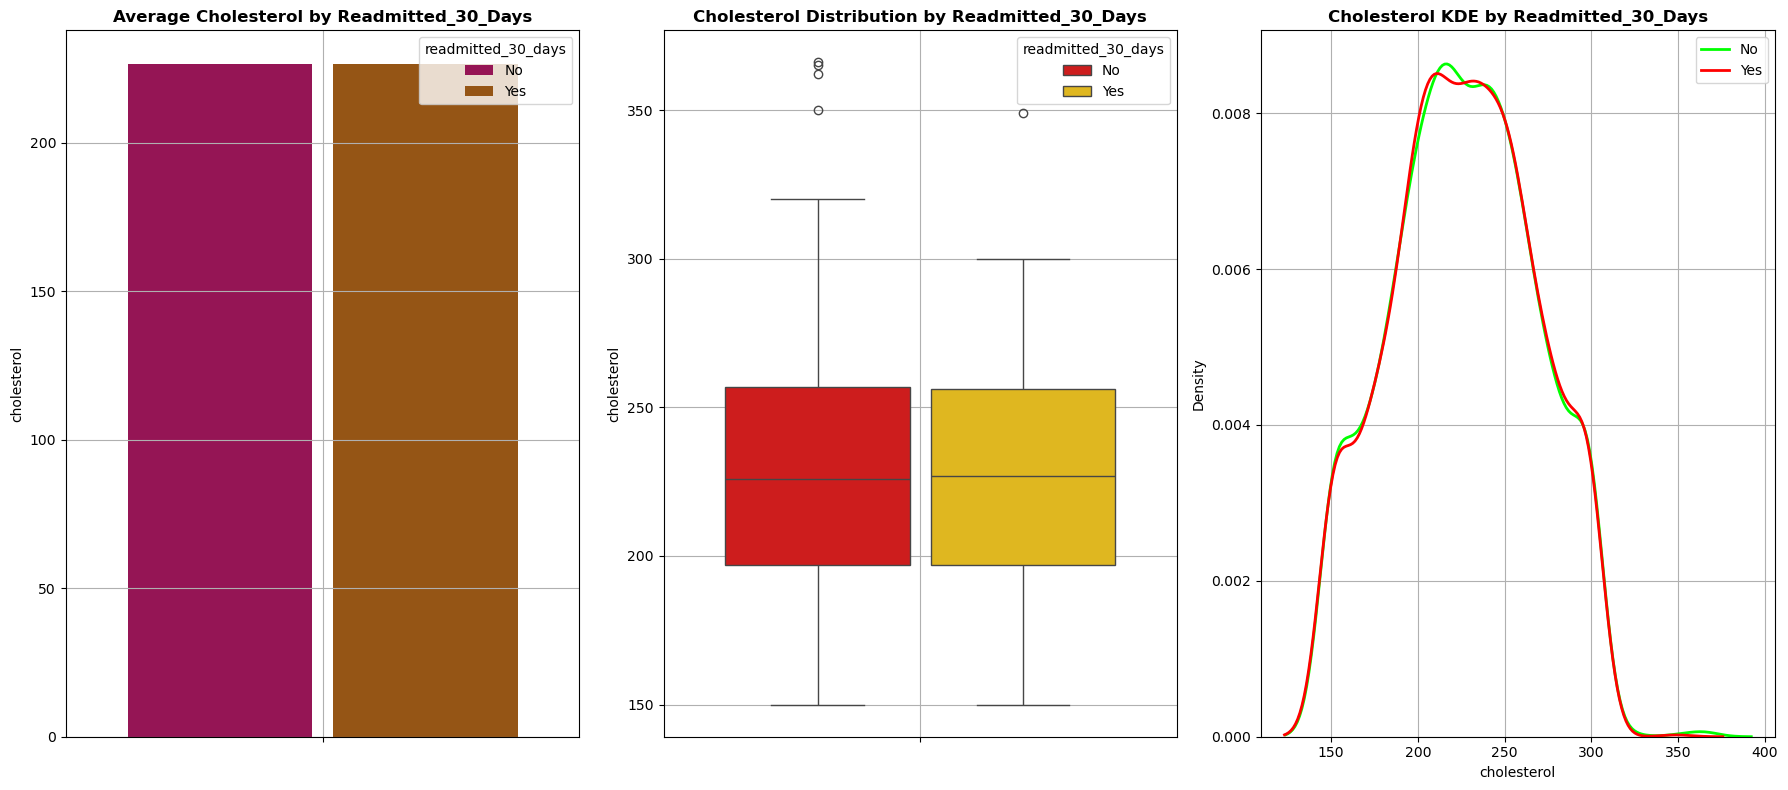

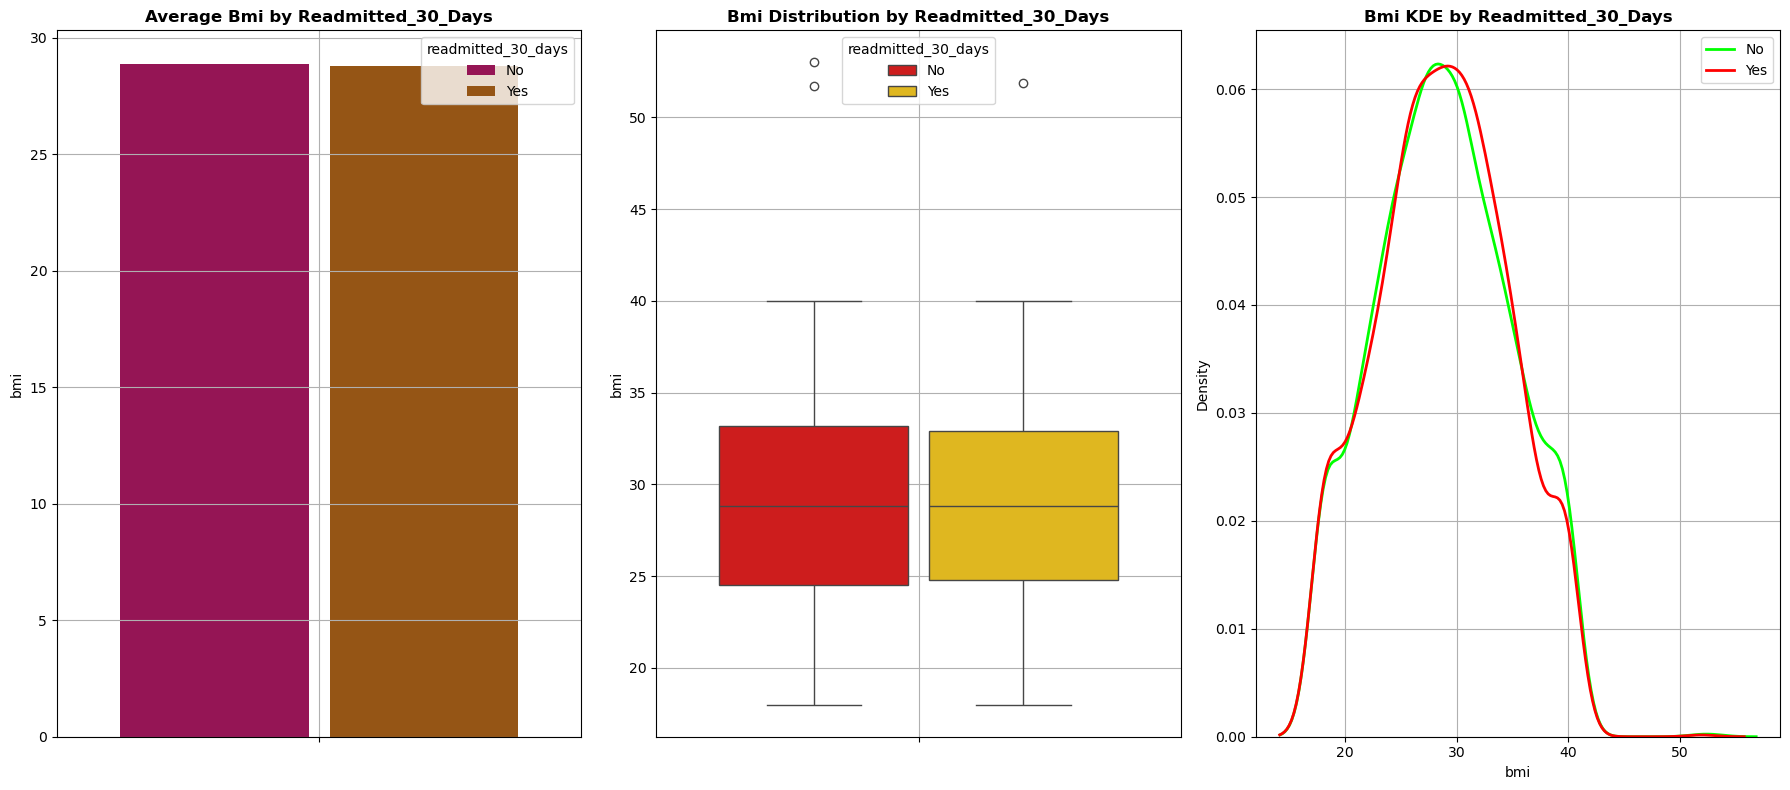

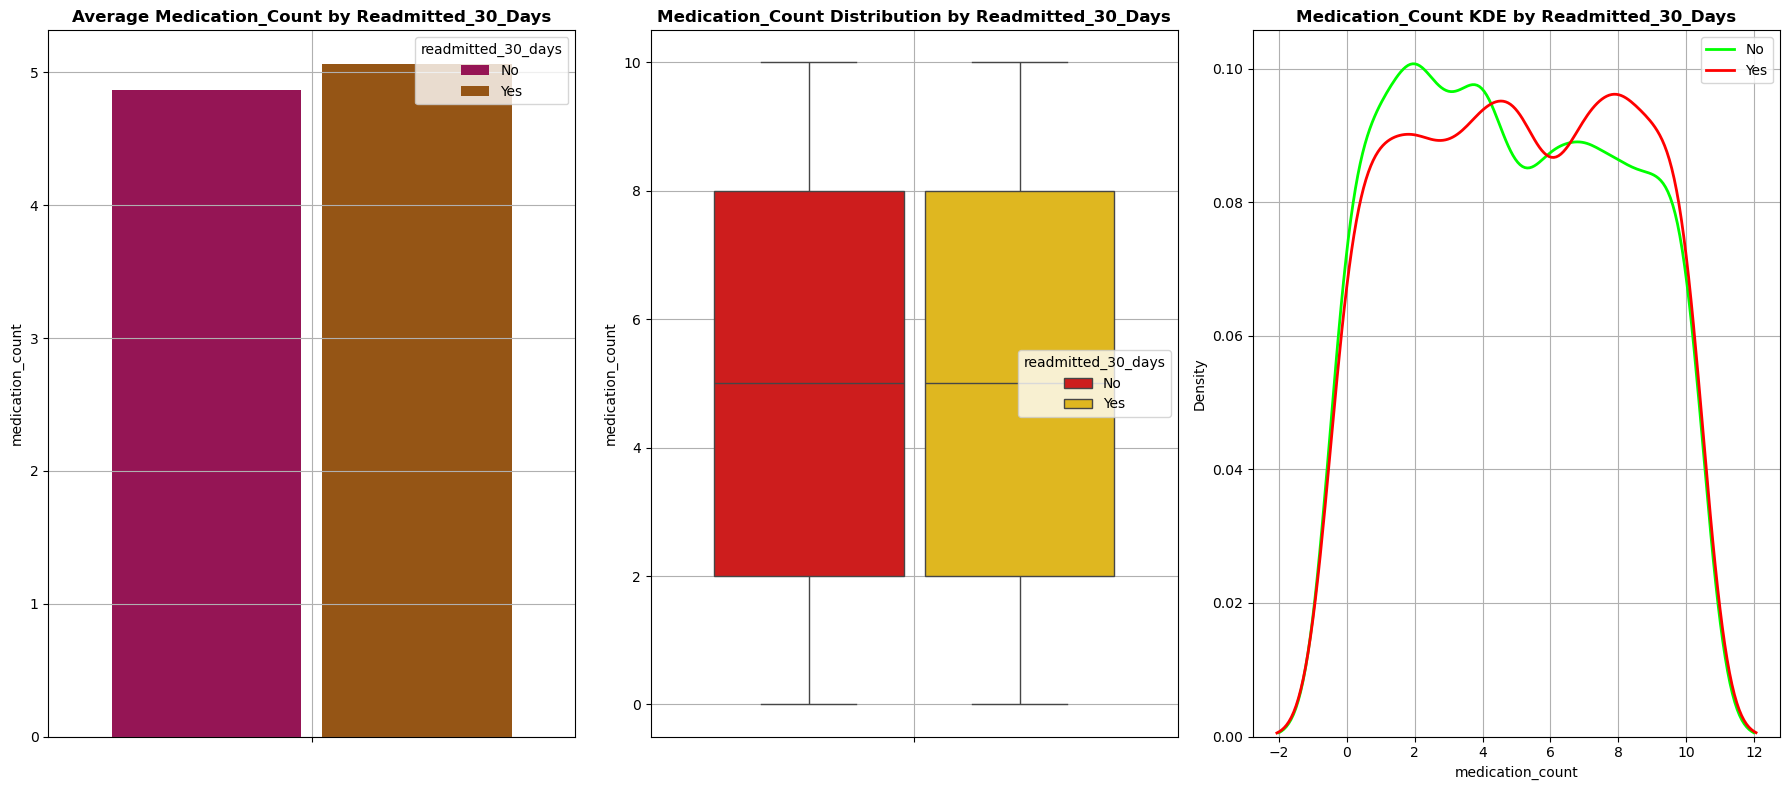

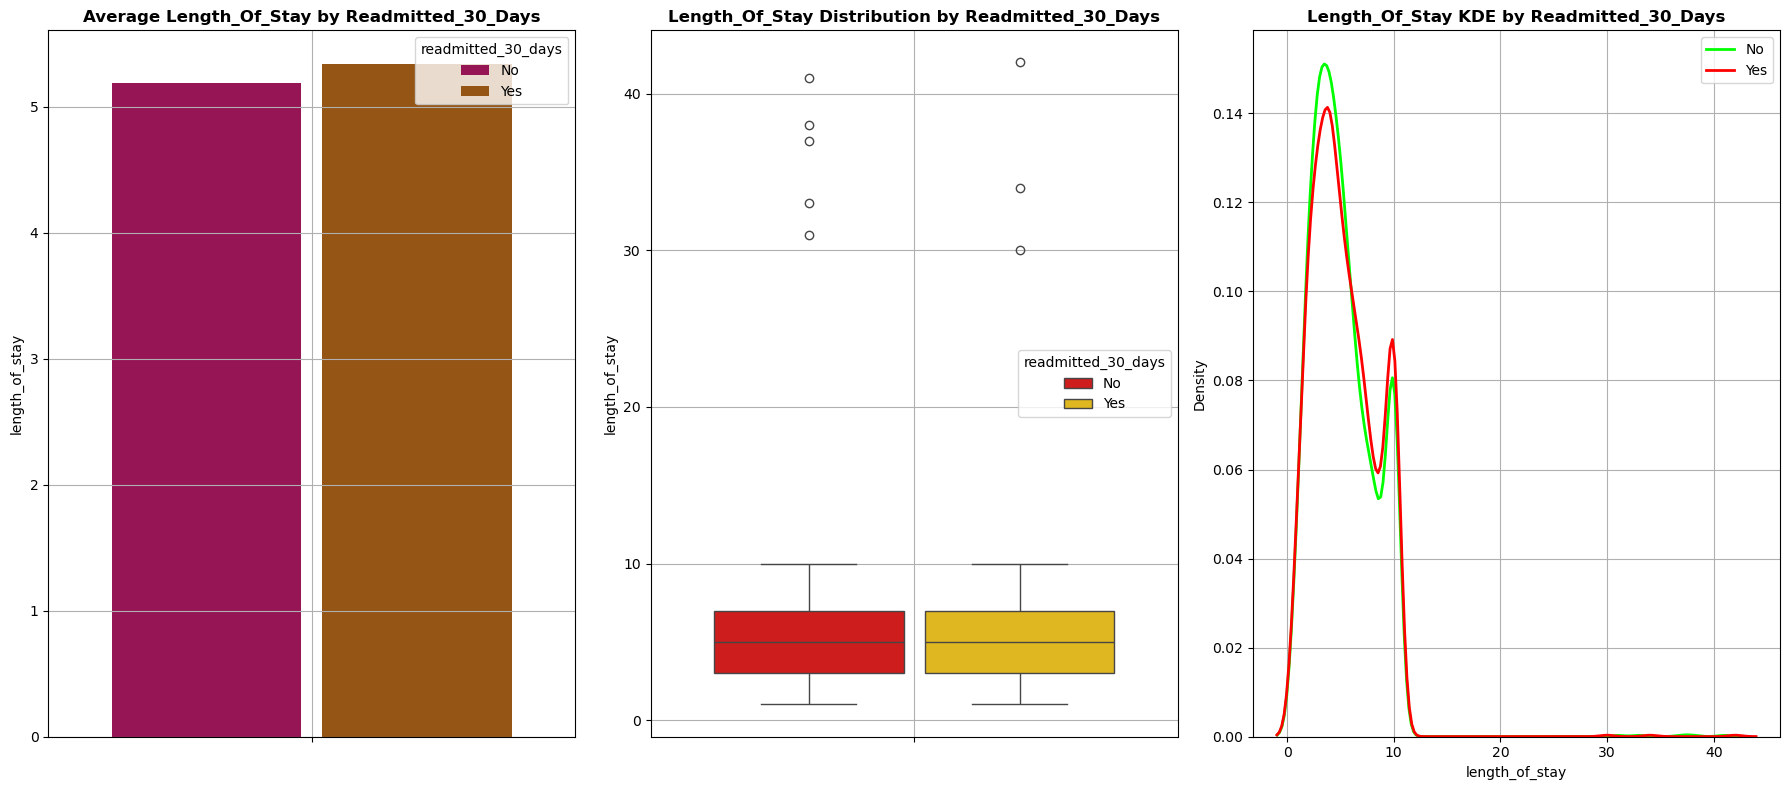

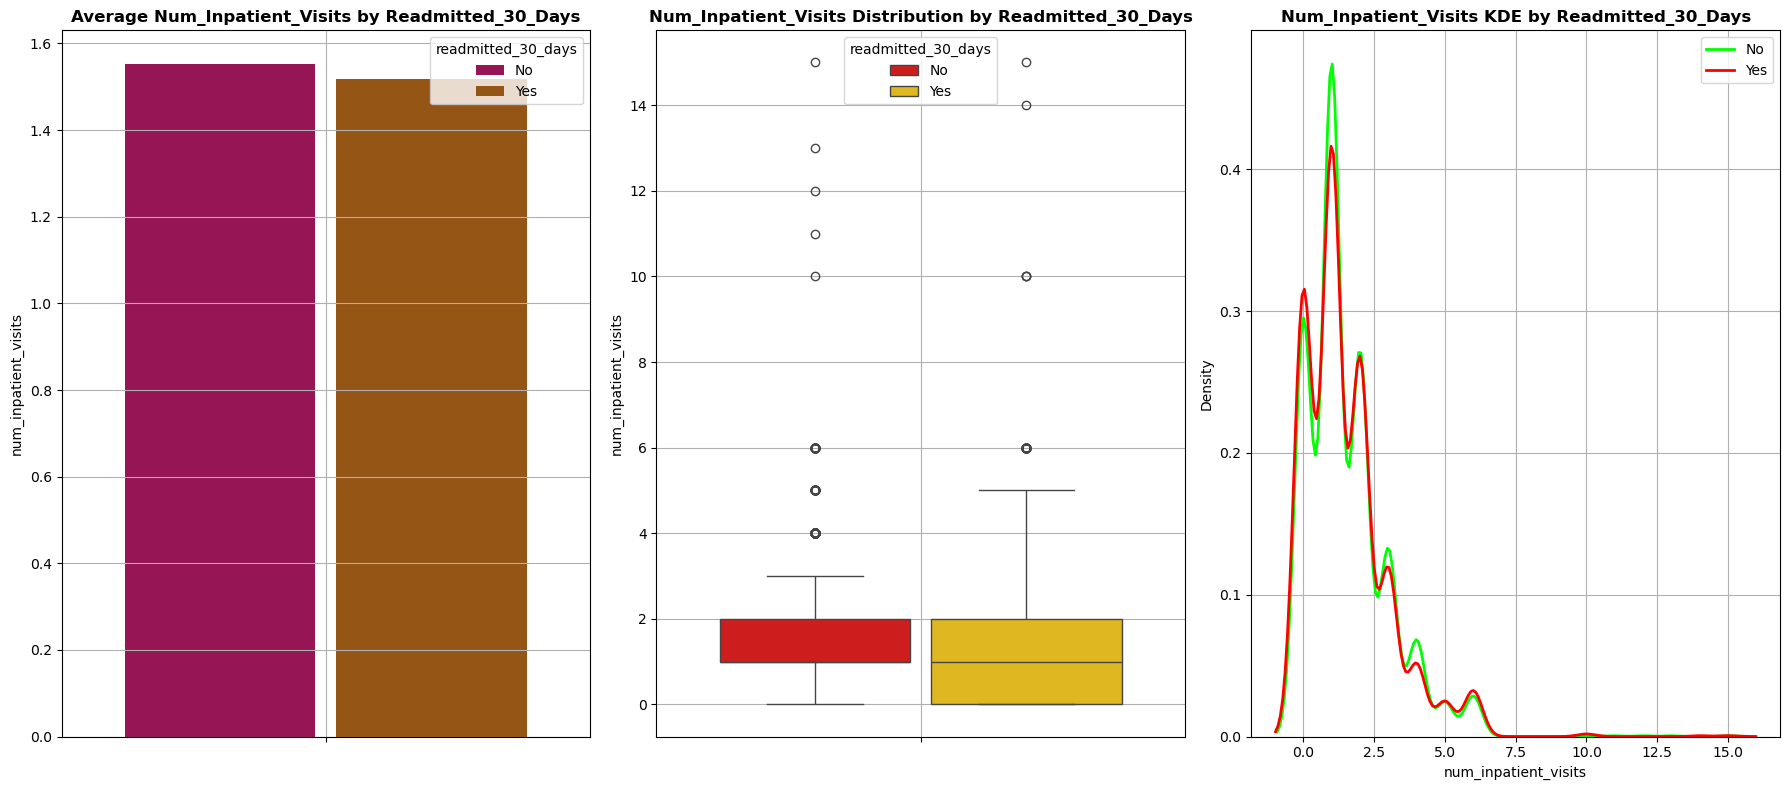

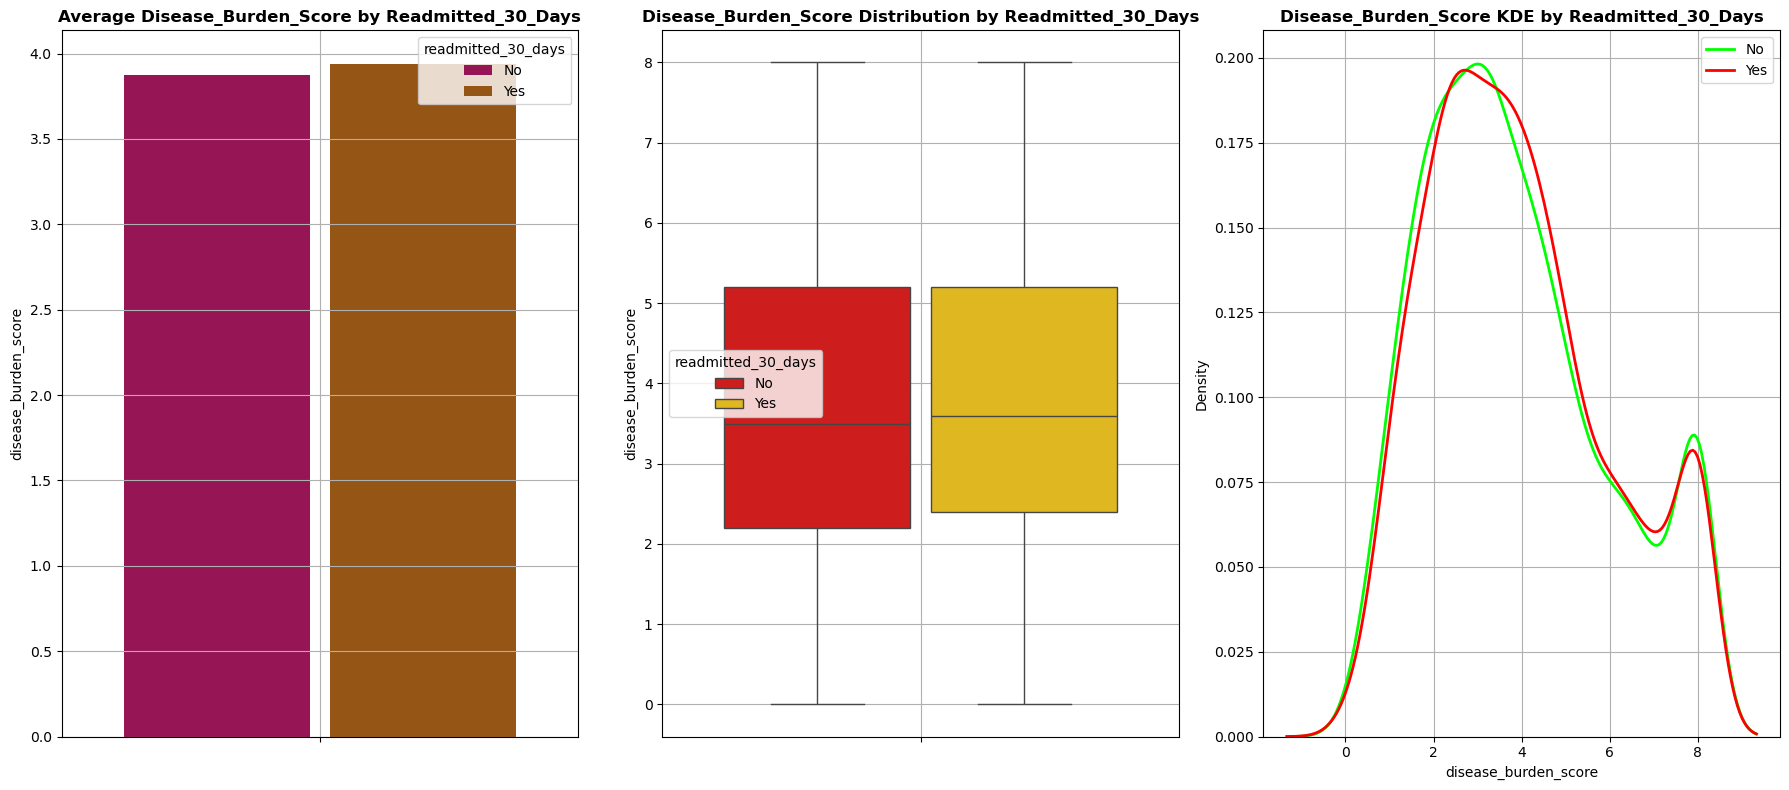

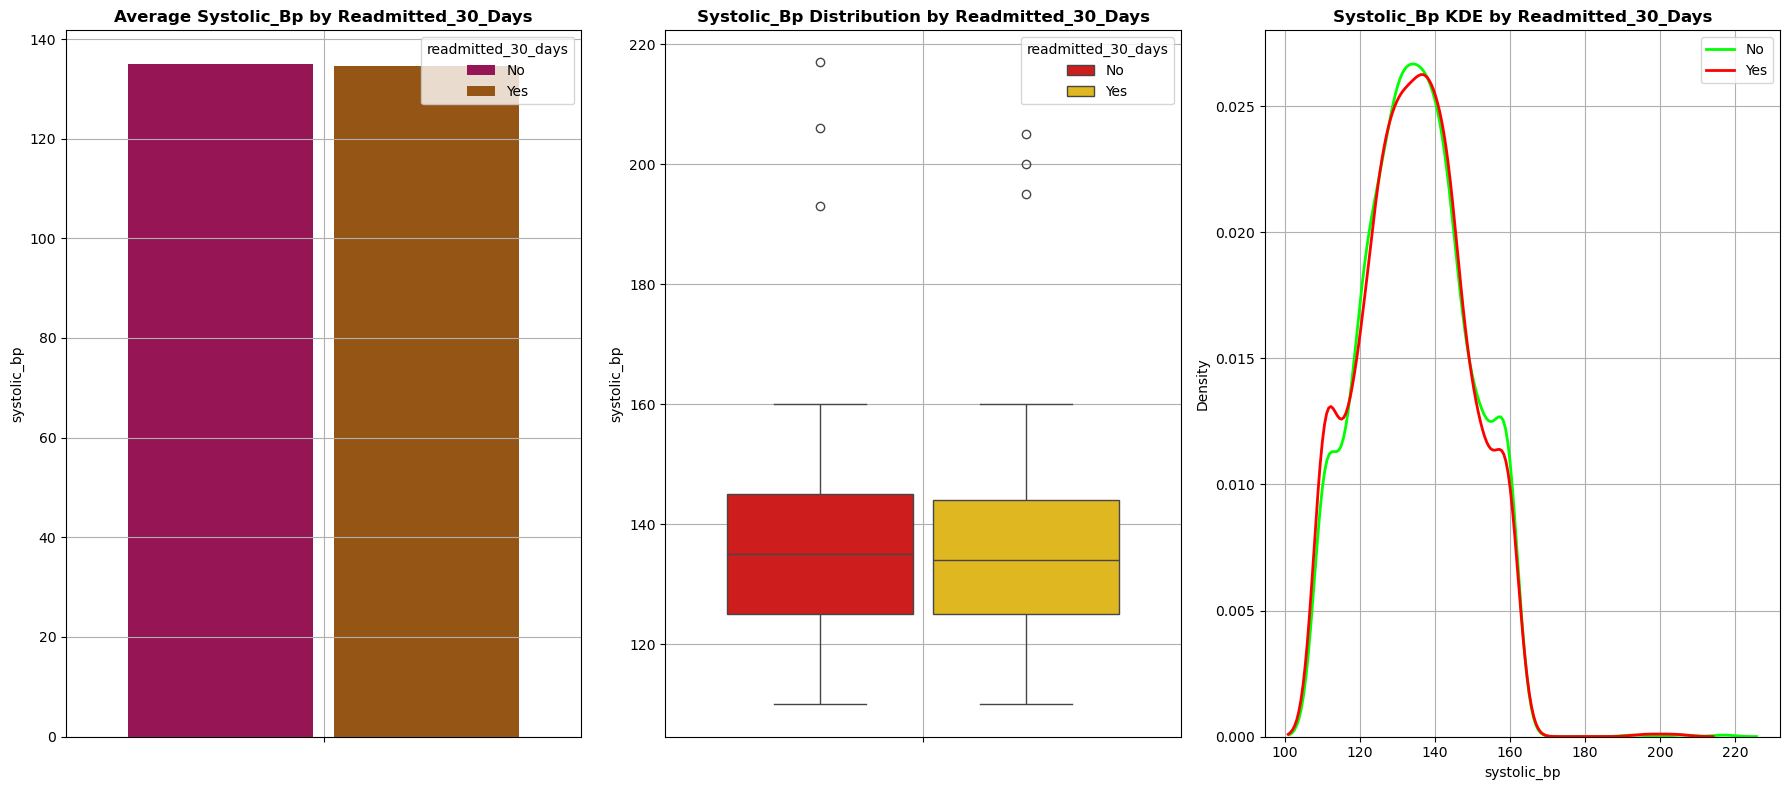

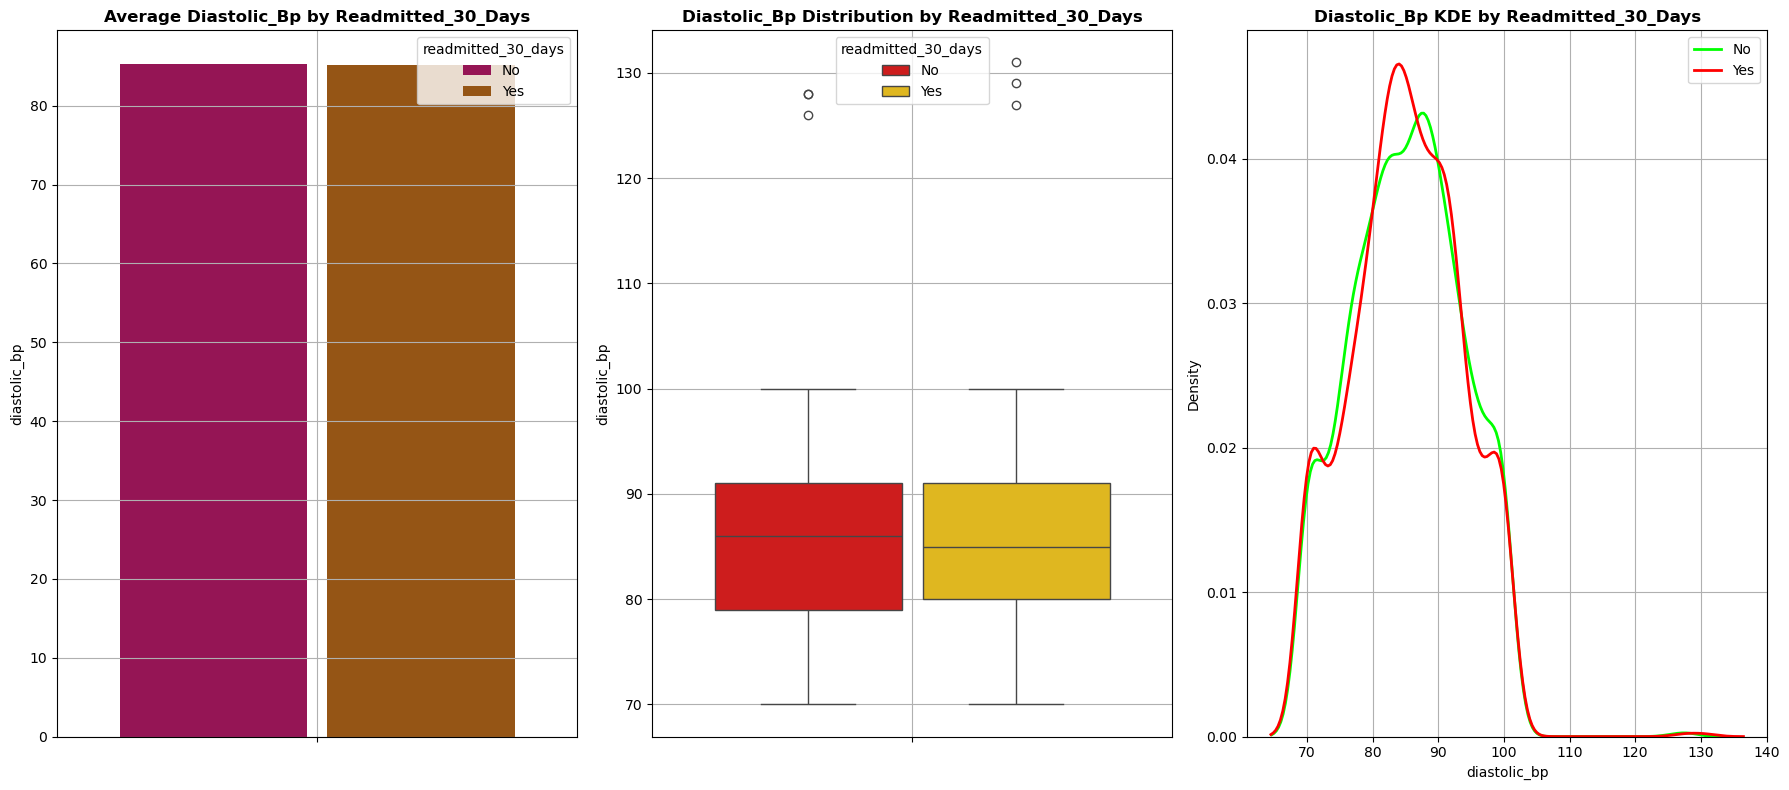

In [391]:
# Using the fucntion defined for numerical vs target plots in Phase I
for col in numerical_cols:
    plot_numerical_vs_target(diabetic_df,col)

### ***3.2.2 CATEGORICAL COLUMNS VS THE TARGET COLUMN***

***CONCLUSIONS -***

- `The readmission rate is nearly the same for all genders, around 46–47%. There’s no clear pattern showing that gender affects the chance of readmission. This means gender does not play a major role in readmission risk for diabetic patients.`

- `Patients with and without hypertension have almost equal readmission rates, close to 47%. This shows that having high blood pressure doesn’t strongly affect whether a patient returns in 30 days. So, hypertension has little to no influence on readmission for this group.`

- `Patients sent home have the lowest readmission rate (38.5%), while those sent to rehab or nursing facilities show higher readmissions (58–59%). This suggests that discharge location might reflect the patient’s health condition. Those needing facility care are more likely to come back soon after discharge.`

- `Patients with a steady insulin plan had the lowest readmission rate (~41.9%), while other groups like Up, Down, or No had slightly higher rates. This indicates that consistent insulin usage may help prevent early hospital returns. Irregular or no insulin plan may be linked to slightly higher risk.`

- `Patients who were on a steady insulin plan and who weren’t on any insulin plan had the less chances(~ 45%) of being readmitted within 30 days. Patients whose insulin was increased (Up) or decreased (Down) had a higher chance of being readmitted(~ 47%). The difference though is not much although, Steady insulin use seems slighlty more effective in reducing readmissions, while fluctuating insulin levels (Up/Down) may be linked to less stability and slightly higher risk of coming back within 30 days.`

- `Patients with A1C levels >7 had the lowest readmission rate (44.56%), suggesting they might be under tighter monitoring or treatment. Those with normal A1C or <=7 had higher readmission rates (around 46%), possibly due to other health issues despite controlled sugar. Surprisingly, patients with missing A1C data had a higher readmission rate (48.02%), hinting that incomplete testing could relate to worse follow-up care. Overall, even though high A1C sounds risky, those patients were slightly less likely to return, possibly because their diabetes was being more actively managed.`

---Normalized Contingency Table for 'gender' vs 'readmitted_30_days'---

gender                 Female       Male      Other
readmitted_30_days                                 
No                  53.285714  54.276094  54.639175
Yes                 46.714286  45.723906  45.360825 



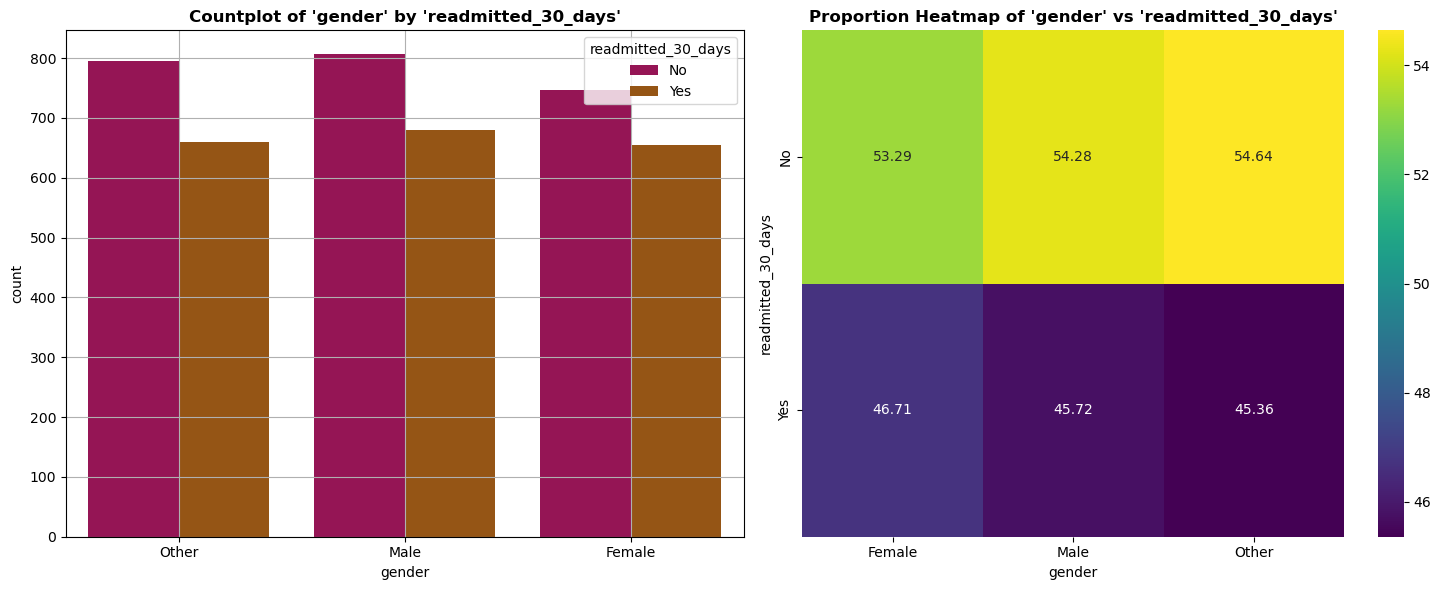



---Normalized Contingency Table for 'hypertension' vs 'readmitted_30_days'---

hypertension               No        Yes
readmitted_30_days                      
No                  53.205428  54.925102
Yes                 46.794572  45.074898 



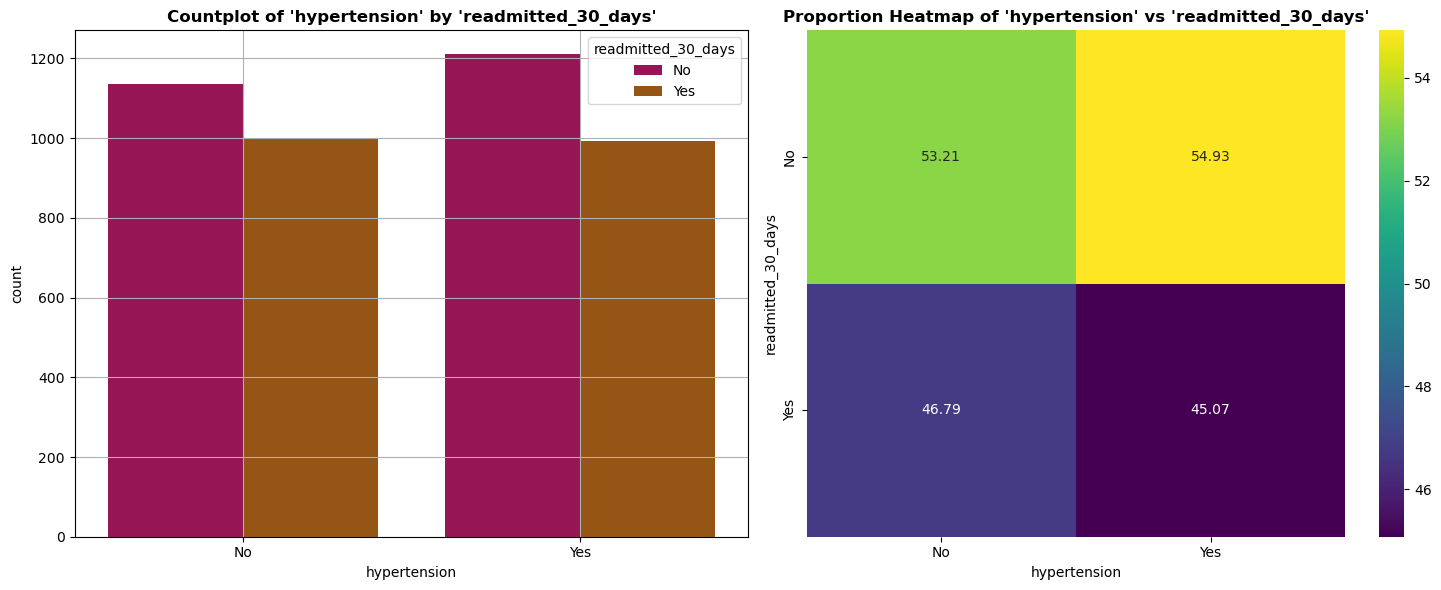



---Normalized Contingency Table for 'discharge_destination' vs 'readmitted_30_days'---

discharge_destination       Home  Nursing_Facility      Rehab
readmitted_30_days                                           
No                     61.495536         41.366224  41.626794
Yes                    38.504464         58.633776  58.373206 



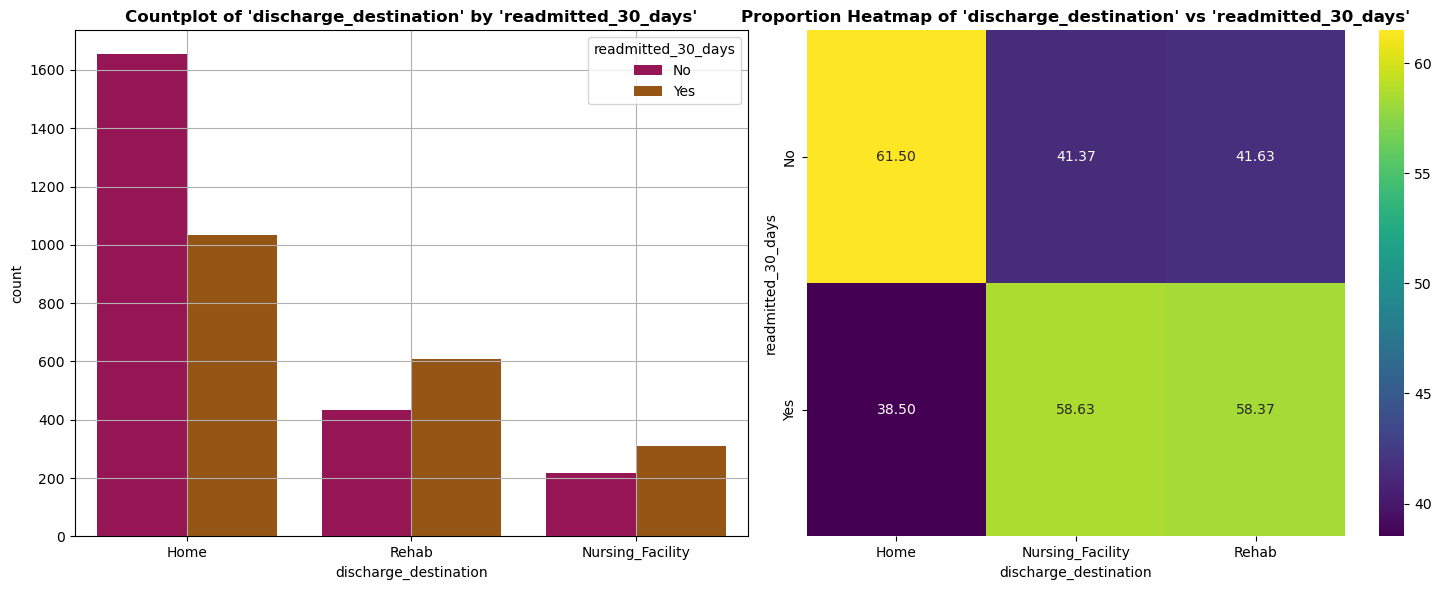



---Normalized Contingency Table for 'insulin_plan' vs 'readmitted_30_days'---

insulin_plan             Down         No     Steady         Up
readmitted_30_days                                            
No                  53.221289  54.784689  55.028571  53.133515
Yes                 46.778711  45.215311  44.971429  46.866485 



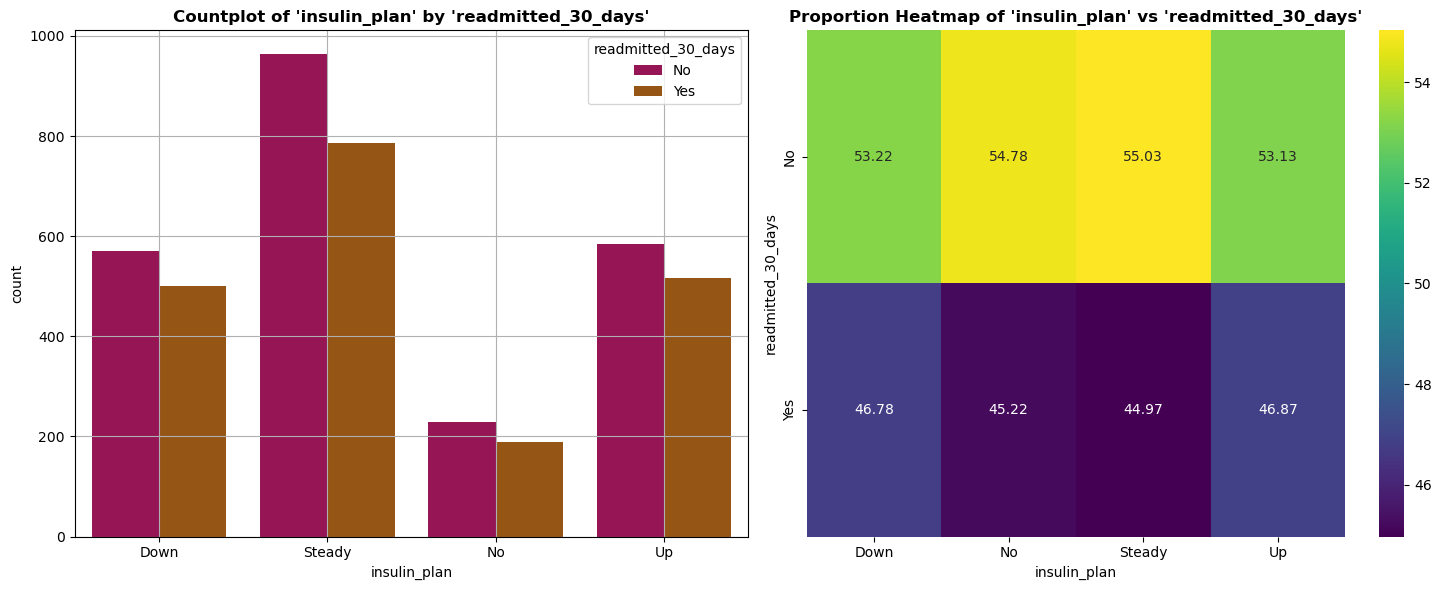

In [392]:
# Using the fucntion defined for categorical vs target plots in Phase I
for col in categorical_cols[:4]:
    analyze_categorical_vs_target(diabetic_df,col)

### ***A1C_TEST_RESULT VS READMITTED_30_DAYS***

---Normalized Contingency Table for 'a1c_test_result' vs 'readmitted_30_days'---

a1c_test_result          <=7         >7    Missing      Norm
readmitted_30_days                                          
No                  53.85208  55.439642  51.976048  54.33526
Yes                 46.14792  44.560358  48.023952  45.66474



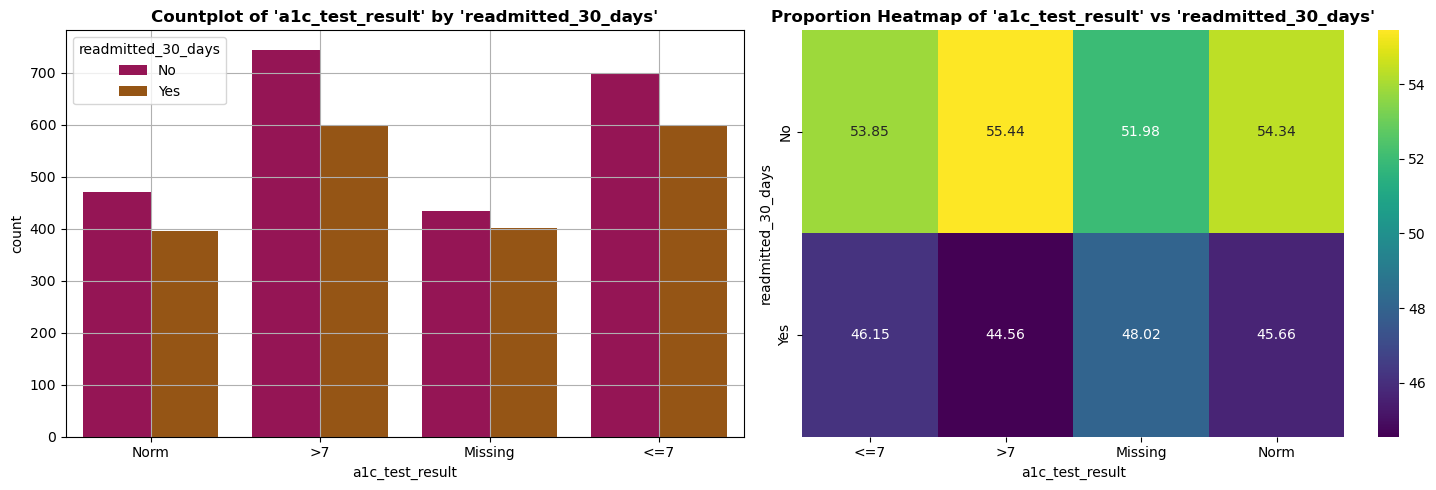

In [393]:
# Flagging Missing Values In 'A1C_Test_Result' As Missing Category.
temp_diabetic_df = diabetic_df.copy()
temp_diabetic_df['a1c_test_result'] = temp_diabetic_df['a1c_test_result'].fillna('Missing')

print("---Normalized Contingency Table for 'a1c_test_result' vs 'readmitted_30_days'---\n")
 # Normalized table for heatmap (col-wise %)
norm_crosstab = pd.crosstab(temp_diabetic_df['readmitted_30_days'],temp_diabetic_df['a1c_test_result'], normalize='columns') * 100
print(norm_crosstab,end = '\n\n')

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Countplot
sns.countplot(data = temp_diabetic_df, x = 'a1c_test_result', hue = 'readmitted_30_days', ax = ax[0], palette = 'brg')
ax[0].set_title("Countplot of 'a1c_test_result' by 'readmitted_30_days'",fontweight = 'bold')
ax[0].grid(True)

# Heatmap
sns.heatmap(norm_crosstab, annot = True,cmap = 'viridis',fmt = ".2f", ax = ax[1])
ax[1].set_title("Proportion Heatmap of 'a1c_test_result' vs 'readmitted_30_days'",fontweight = 'bold')

plt.tight_layout()
plt.show()


## ***3.3 MULTIVARIATE ANALYSIS***

### ***Correlation Heatmap of Numerical Features***

***CONCLUSIONS - The correlation heatmap reveals that the numerical features in our dataset are largely uncorrelated with one another, indicating that each variable contributes distinct information. The only modest correlation is observed between systolic and diastolic blood pressure (0.028), which aligns with expected physiological patterns. Other pairs, such as medication count and age (0.018), or length of stay and number of inpatient visits (0.013), show only very weak positive associations. Interestingly, there is virtually no relationship between BMI and cholesterol, emphasizing that these health indicators behave independently in this patient group. Overall, the low correlation values—none exceeding 0.05—confirm that multicollinearity is not a concern in this dataset. This supports retaining all numerical features in future modeling steps, as each brings non-redundant value to predictive analysis.***

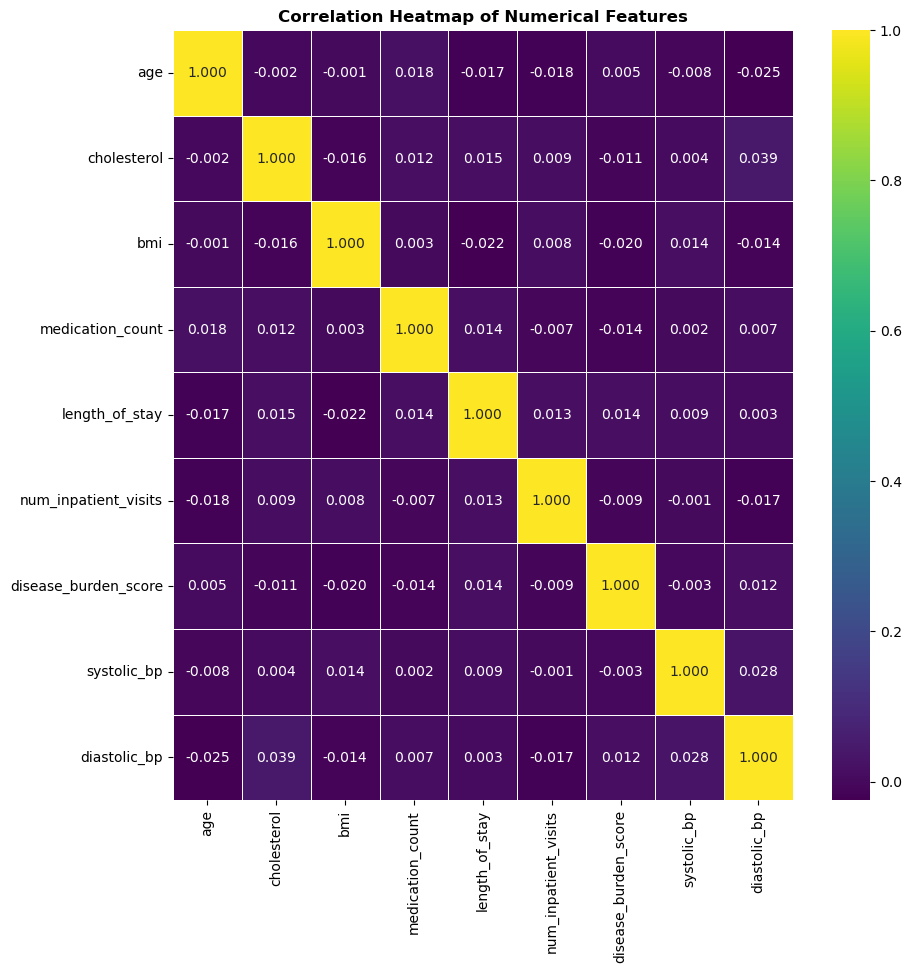

In [394]:
# Heatmap
numerical_df = diabetic_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontweight='bold')
plt.show()

### ***Cross-Category Relationship Heatmaps***

***CONCLUSIONS - The gender-based heatmaps reveal that males have a slightly higher proportion of patients without hypertension compared to females, while hypertension cases are more evenly distributed among all genders. Discharge destinations vary by gender, with males having a higher proportion sent to nursing facilities, whereas Other gender patients show higher proportions going home. In insulin plan usage, males show the highest proportion with No insulin plan, while Other gender leans more toward Down plans. For A1C results, males have higher representation in the ≤7 and Norm categories, while Other gender shows balanced distribution. Hypertension appears to have a mild influence on discharge destinations, with hypertensive patients slightly more likely to be sent to nursing facilities. Insulin plan preferences differ by hypertension status — non-hypertensive patients show more No insulin plan usage, while hypertensives lean toward Up and Steady plans. In A1C results, hypertensives have a higher share in the ≤7 category, while non-hypertensives lean toward Norm and >7. Discharge destinations strongly relate to both insulin plan and A1C results — patients sent home show higher proportions across all insulin plan categories and lower A1C values, while nursing facility patients form a small share. Rehab patients show moderate proportions in most categories. Finally, insulin plan and A1C results show clear patterns: Steady plans dominate across all A1C categories, especially in ≤7 and Norm groups, while patients without an insulin plan have the lowest presence across all A1C categories.***

In [395]:
# Using temp_diabetic_df to take into consideration the missing values of 'a1c-test_result'.
cat_cols = temp_diabetic_df.select_dtypes(include=['object']).columns.tolist()[0:5]
print(cat_cols)

['gender', 'hypertension', 'discharge_destination', 'insulin_plan', 'a1c_test_result']


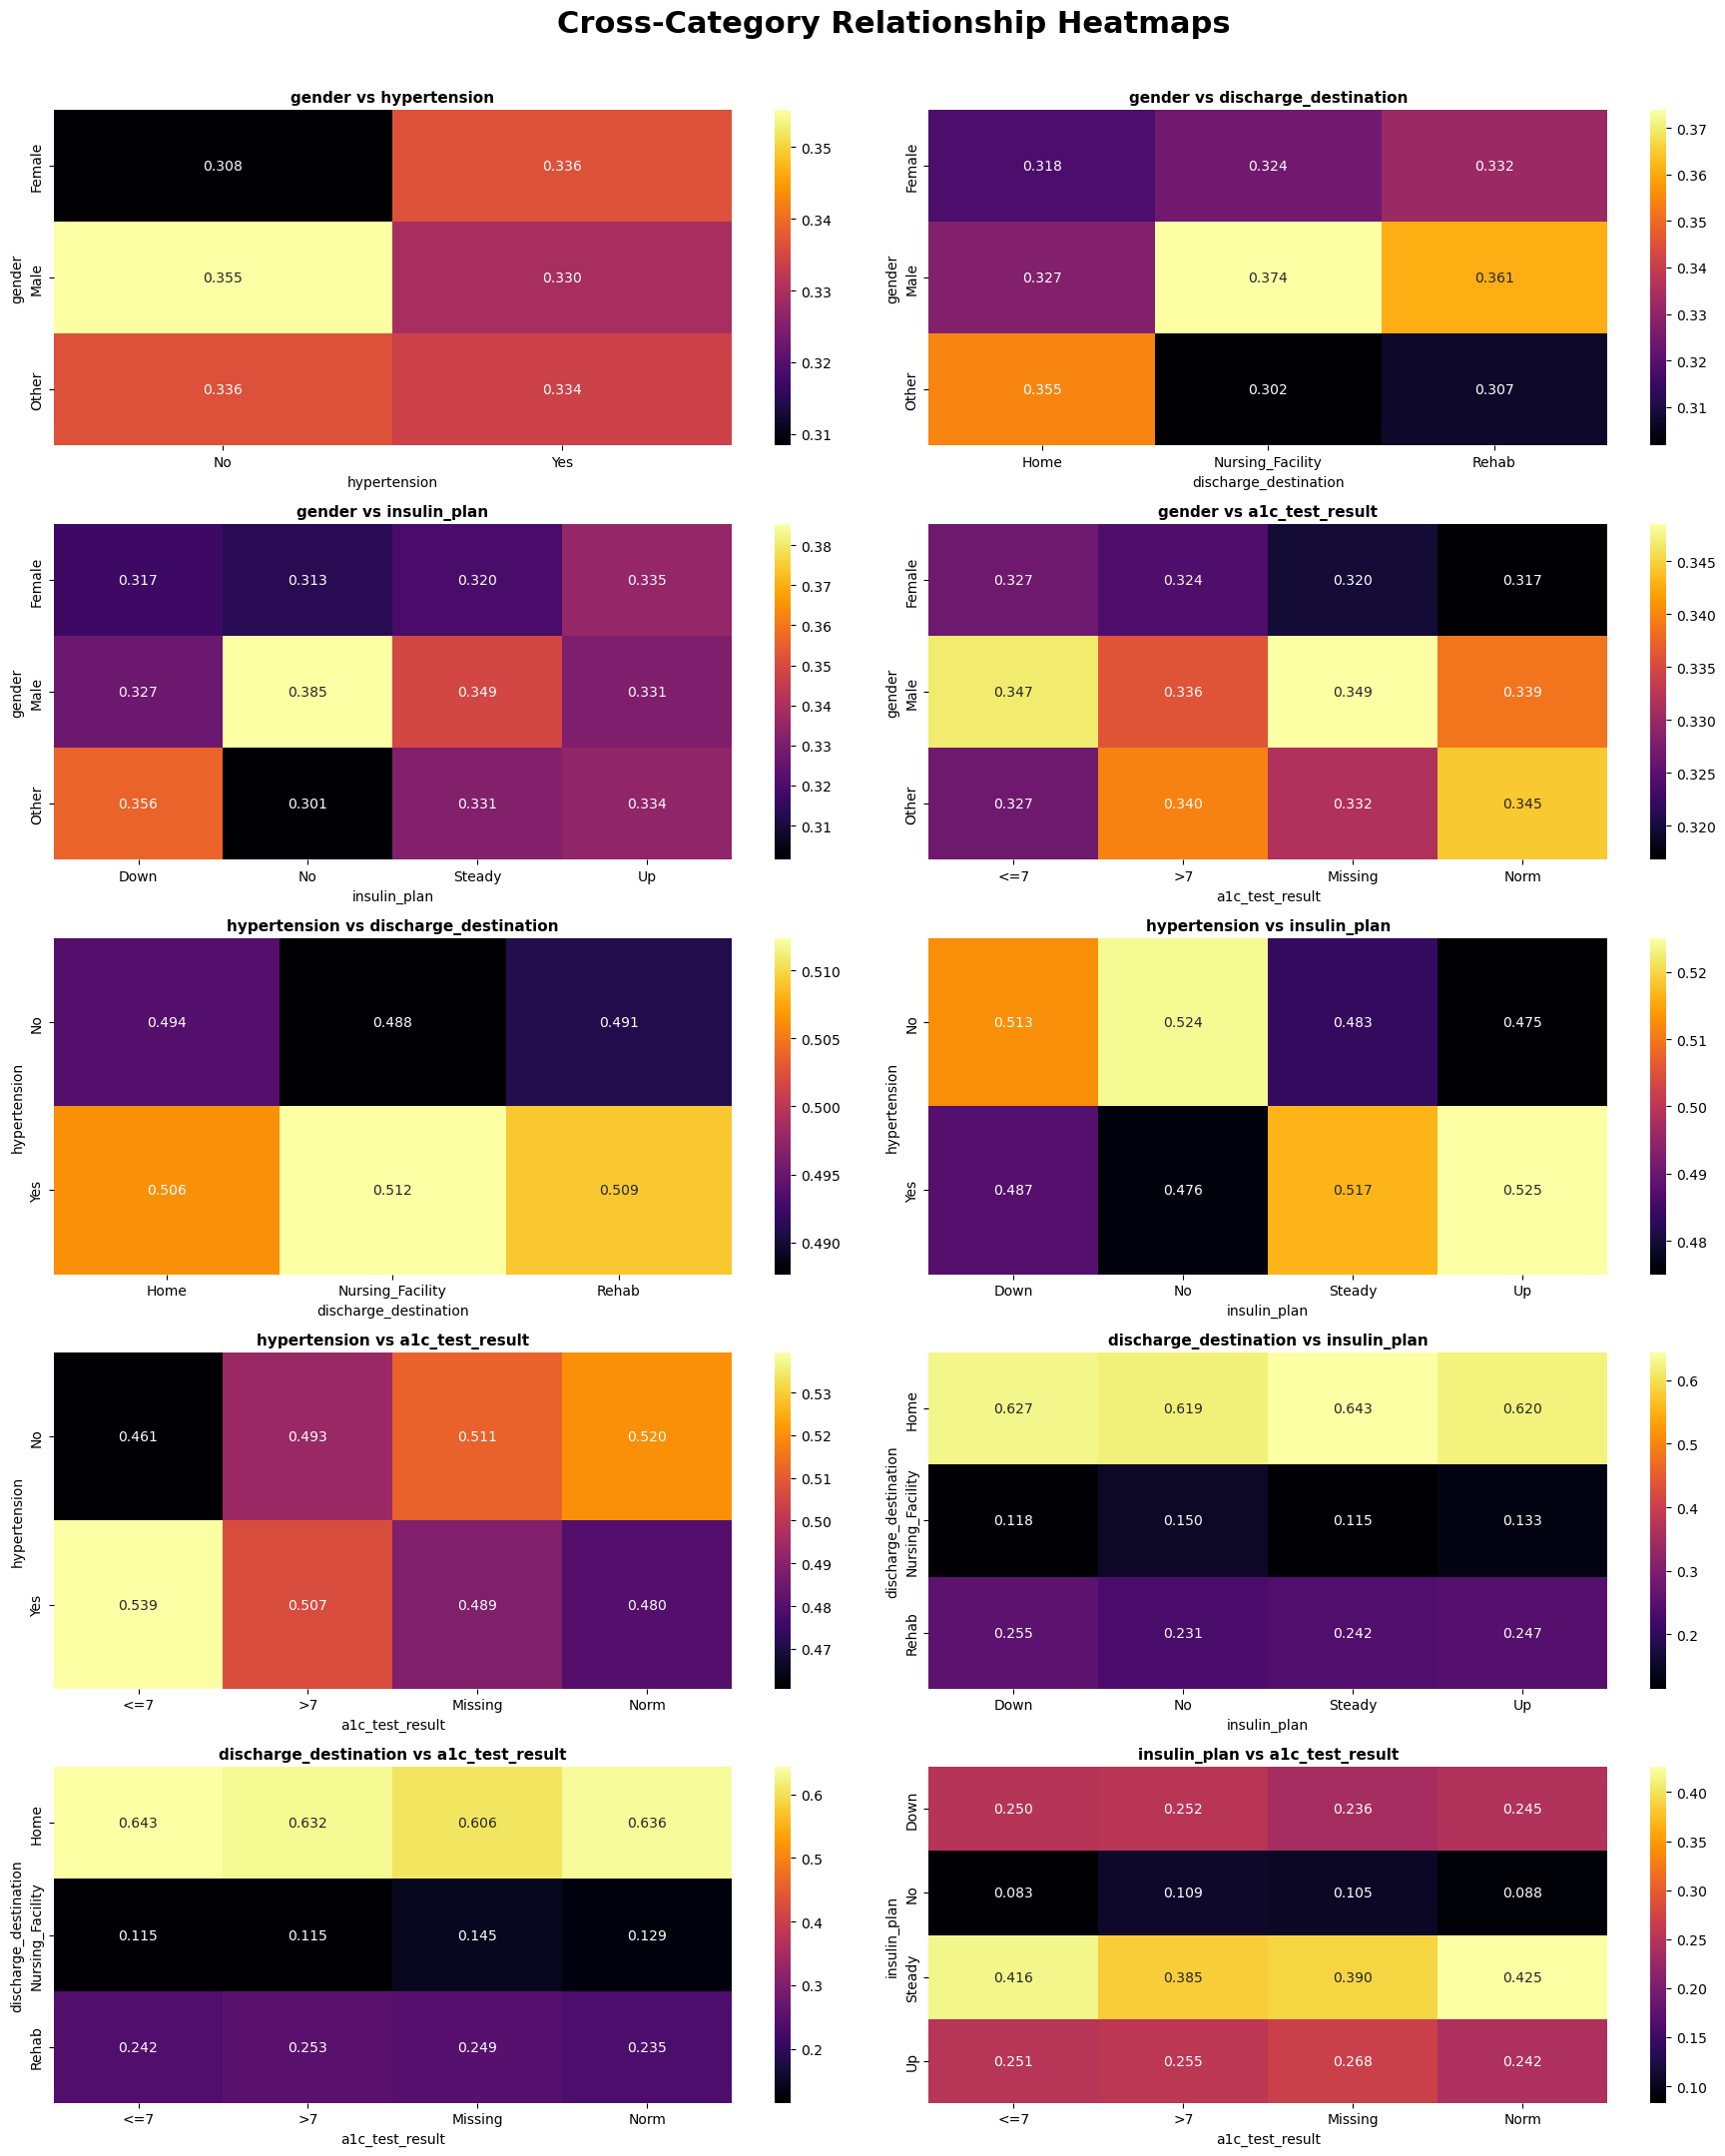

In [396]:
# length of cat_cols = 5
# Calculate total number of combinations = 5C2 = 10

# Deciding total rows in the figure and cols in each row based on total number of pairs.
rows = 5
cols = 2

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (18,22))
axes = axes.flatten()

plot_index = 0

for i in range(len(cat_cols)-1):
 for j in range(i+1,len(cat_cols)):
     ax = axes[plot_index]
     ctb = pd.crosstab(temp_diabetic_df[cat_cols[i]],temp_diabetic_df[cat_cols[j]],normalize = 'columns') 
     
     sns.heatmap(ctb, annot=True, fmt=".3f", cmap = "inferno", ax = ax, cbar = True)
     ax.set_title("{} vs {}".format(cat_cols[i], cat_cols[j]), fontsize = 11,fontweight = 'bold')
     plot_index += 1
     
fig.suptitle("Cross-Category Relationship Heatmaps", fontsize = 22,fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit suptitle
plt.show()

## ***4. TRAIN-VALIDATION-TEST SPLIT***

In [397]:
X_diab = diabetic_df.drop('readmitted_30_days', axis=1)
y_diab = diabetic_df['readmitted_30_days']

In [398]:
# First split: Train + Temp (Val + Test)
# We use stratify = y to preserve the original class balance of the target (readmitted_30_days) in each split.
X_train_diab, X_temp_diab, y_train_diab, y_temp_diab = train_test_split( X_diab, y_diab, test_size = 0.3, random_state = 42, stratify = y_diab)

# Second split: Validation + Test (50/50 of Temp)
X_val_diab, X_test_diab, y_val_diab, y_test_diab = train_test_split(X_temp_diab, y_temp_diab, test_size = 0.5, random_state = 42, stratify = y_temp_diab)

In [399]:
X_train_diab

age  gender  cholesterol   bmi hypertension  medication_count  \
7197   89    Male        196.0  30.9           No                 4   
6097   30    Male        150.0  26.6          Yes                 6   
4069   51  Female        156.0  21.3          Yes                 6   
3995   87  Female        189.0  19.4          Yes                 3   
7776   75  Female        300.0  29.1           No                 5   
...   ...     ...          ...   ...          ...               ...   
5932   88   Other        222.0  35.4           No                 4   
5208   87   Other        212.0  22.8           No                 3   
4807   52  Female        197.0  22.5          Yes                 4   
8019   79    Male        219.0  21.0           No                 6   
7858   78   Other        181.0  28.2           No                 9   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
7197               8                  Home       Steady             NaN   
6097               8                  Home           Up              >7   
4069               4                 Rehab         Down             NaN   
3995               3                 Rehab       Steady              >7   
7776              10                 Rehab           Up            Norm   
...              ...                   ...          ...             ...   
5932               6                  Home           Up             <=7   
5208               2                  Home           Up              >7   
4807               4                  Home         Down             NaN   
8019               3                  Home       Steady             NaN   
7858               6      Nursing_Facility           Up              >7   

      num_inpatient_visits  disease_burden_score  systolic_bp  diastolic_bp  
7197                     4                   4.8        140.0         100.0  
6097                     2                   1.5        123.0          83.0  
4069                     0                   4.8        139.0          87.0  
3995                     0                   1.2        131.0          85.0  
7776                     1                   1.3        143.0          76.0  
...                    ...                   ...          ...           ...  
5932                     1                   2.4        144.0          88.0  
5208                     1                   3.7        120.0          75.0  
4807                     1                   1.5        130.0          78.0  
8019                     0                   6.1        193.0         128.0  
7858                     0                   4.0        140.0          86.0  

[3038 rows x 14 columns]

In [400]:
X_val_diab

age  gender  cholesterol   bmi hypertension  medication_count  \
7635   64  Female        166.0  29.9          Yes                 8   
3968   73   Other        265.0  37.5           No                 5   
4161   60    Male        257.0  33.6           No                 2   
5954   55   Other        210.0  23.3          Yes                 4   
6951   58    Male        220.0  27.6          Yes                 4   
...   ...     ...          ...   ...          ...               ...   
5536   47   Other        286.0  34.3           No                 5   
551    78  Female        229.0  29.2           No                 4   
817    82  Female        216.0  40.0          Yes                 1   
881    70  Female        289.0  38.8           No                 9   
3802   46    Male        222.0  31.0          Yes                 1   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
7635               9                  Home       Steady              >7   
3968               2                 Rehab       Steady             <=7   
4161               3                  Home       Steady            Norm   
5954               3                 Rehab           No              >7   
6951               4                  Home           Up              >7   
...              ...                   ...          ...             ...   
5536               4                 Rehab         Down            Norm   
551                4                  Home         Down             NaN   
817                8                  Home           Up            Norm   
881               10                 Rehab           Up            Norm   
3802               7      Nursing_Facility         Down              >7   

      num_inpatient_visits  disease_burden_score  systolic_bp  diastolic_bp  
7635                     1                   3.6        129.0          73.0  
3968                     1                   5.6        128.0          72.0  
4161                     4                   0.7        138.0          84.0  
5954                     1                   1.4        139.0          78.0  
6951                     2                   4.8        135.0          86.0  
...                    ...                   ...          ...           ...  
5536                     0                   4.2        138.0          91.0  
551                      0                   3.0        110.0          81.0  
817                      1                   3.3        134.0          92.0  
881                      1                   2.7        139.0          98.0  
3802                     0                   6.3        147.0          92.0  

[651 rows x 14 columns]

In [401]:
X_test_diab

age  gender  cholesterol   bmi hypertension  medication_count  \
6026   80  Female        173.0  34.6          Yes                 5   
6059   84    Male        187.0   NaN          Yes                 7   
6556   64  Female        251.0  27.0          Yes                 3   
1792   36    Male        235.0  24.2           No                 5   
3927   90   Other        277.0  27.1          Yes                 8   
...   ...     ...          ...   ...          ...               ...   
1701   85    Male        170.0  25.8          Yes                 3   
3177   71    Male        252.0  28.4           No                10   
4983   75    Male        212.0  27.4          Yes                 7   
7229   75    Male        150.0  20.0           No                 3   
1679   86   Other        225.0  31.0           No                 0   

      length_of_stay discharge_destination insulin_plan a1c_test_result  \
6026               1                  Home           Up              >7   
6059               8                  Home           Up             <=7   
6556               1                  Home           No              >7   
1792              10                  Home           Up             <=7   
3927               2                  Home           No              >7   
...              ...                   ...          ...             ...   
1701               6                  Home         Down             <=7   
3177               4                  Home           Up              >7   
4983              10                 Rehab           Up             NaN   
7229              10                  Home         Down             <=7   
1679               3                 Rehab       Steady            Norm   

      num_inpatient_visits  disease_burden_score  systolic_bp  diastolic_bp  
6026                     1                   0.9        137.0          70.0  
6059                     1                   2.8        131.0          85.0  
6556                     1                   3.8        125.0          90.0  
1792                     2                   8.0        114.0          84.0  
3927                     6                   2.2        122.0          92.0  
...                    ...                   ...          ...           ...  
1701                     3                   2.1        146.0          92.0  
3177                     0                   2.2        144.0          82.0  
4983                     1                   1.7        144.0          72.0  
7229                     3                   6.3        141.0          79.0  
1679                     0                   3.8        148.0          88.0  

[651 rows x 14 columns]

In [402]:
y_train_diab

7197    Yes
6097     No
4069     No
3995     No
7776    Yes
       ... 
5932     No
5208     No
4807     No
8019     No
7858     No
Name: readmitted_30_days, Length: 3038, dtype: object

In [403]:
# Checking balance of target classes in training set. 
y_train_diab.value_counts()*100 / len(y_train_diab)

readmitted_30_days
No     54.081633
Yes    45.918367
Name: count, dtype: float64

In [404]:
y_val_diab

7635     No
3968    Yes
4161     No
5954     No
6951     No
       ... 
5536    Yes
551      No
817     Yes
881      No
3802    Yes
Name: readmitted_30_days, Length: 651, dtype: object

In [405]:
# Checking balance of target classes in validation set. 
y_val_diab.value_counts()*100 / len(y_val_diab)

readmitted_30_days
No     54.070661
Yes    45.929339
Name: count, dtype: float64

In [406]:
y_test_diab

6026     No
6059     No
6556    Yes
1792    Yes
3927    Yes
       ... 
1701     No
3177     No
4983     No
7229     No
1679    Yes
Name: readmitted_30_days, Length: 651, dtype: object

In [407]:
# Checking balance of target classes in test set. 
y_test_diab.value_counts()*100 / len(y_test_diab)

readmitted_30_days
No     54.070661
Yes    45.929339
Name: count, dtype: float64

## ***5. MISSING VALUE IMPUTATION***

***`In Phase-II also, we impute missing values in the training set using the same strategies used in Phase-I based on EDA on diabetic population and the conclusions that preserve clinical meaning and maintain the original distribution of each feature.`***

In [408]:
# Checking missing values in training set.
(X_train_diab.isna().sum()) * 100 / len(X_train_diab)

age                       0.000000
gender                    0.000000
cholesterol               2.106649
bmi                       1.942067
hypertension              0.000000
medication_count          0.000000
length_of_stay            0.000000
discharge_destination     1.843318
insulin_plan              0.000000
a1c_test_result          19.453588
num_inpatient_visits      0.000000
disease_burden_score      0.000000
systolic_bp               1.974984
diastolic_bp              1.974984
dtype: float64

In [409]:
X_train_diab.columns.tolist()

['age',
 'gender',
 'cholesterol',
 'bmi',
 'hypertension',
 'medication_count',
 'length_of_stay',
 'discharge_destination',
 'insulin_plan',
 'a1c_test_result',
 'num_inpatient_visits',
 'disease_burden_score',
 'systolic_bp',
 'diastolic_bp']

In [410]:
# Missing value imputation 
transformer_diab = ColumnTransformer(
                    transformers = [
                        ('tnf1',SimpleImputer(strategy = 'median'),['cholesterol','bmi','systolic_bp','diastolic_bp']),
                        ('tnf2',SimpleImputer(strategy = 'most_frequent'),['discharge_destination']),
                        ('tnf3',SimpleImputer(strategy = 'constant', fill_value = 'Missing'),['a1c_test_result'])
                    ] ,
                    remainder = 'passthrough')

In [411]:
X_train_diab_transformed = transformer_diab.fit_transform(X_train_diab)
X_train_diab_transformed 

array([[196.0, 30.9, 140.0, ..., 'Steady', 4, 4.8],
       [150.0, 26.6, 123.0, ..., 'Up', 2, 1.5],
       [156.0, 21.3, 139.0, ..., 'Down', 0, 4.8],
       ...,
       [197.0, 22.5, 130.0, ..., 'Down', 1, 1.5],
       [219.0, 21.0, 193.0, ..., 'Steady', 0, 6.1],
       [181.0, 28.2, 140.0, ..., 'Up', 0, 4.0]], dtype=object)

In [412]:
X_val_diab_transformed = transformer_diab.transform(X_val_diab)
X_val_diab_transformed

array([[166.0, 29.9, 129.0, ..., 'Steady', 1, 3.6],
       [265.0, 37.5, 128.0, ..., 'Steady', 1, 5.6],
       [257.0, 33.6, 138.0, ..., 'Steady', 4, 0.7],
       ...,
       [216.0, 40.0, 134.0, ..., 'Up', 1, 3.3],
       [289.0, 38.8, 139.0, ..., 'Up', 1, 2.7],
       [222.0, 31.0, 147.0, ..., 'Down', 0, 6.3]], dtype=object)

In [413]:
X_test_diab_transformed = transformer_diab.transform(X_test_diab)
X_test_diab_transformed

array([[173.0, 34.6, 137.0, ..., 'Up', 1, 0.9],
       [187.0, 28.6, 131.0, ..., 'Up', 1, 2.8],
       [251.0, 27.0, 125.0, ..., 'No', 1, 3.8],
       ...,
       [212.0, 27.4, 144.0, ..., 'Up', 1, 1.7],
       [150.0, 20.0, 141.0, ..., 'Down', 3, 6.3],
       [225.0, 31.0, 148.0, ..., 'Steady', 0, 3.8]], dtype=object)

In [414]:
# Specifying updated columns 
median_diab_cols = ['cholesterol', 'bmi', 'systolic_bp', 'diastolic_bp']
freq_diab_cols = ['discharge_destination']
const_diab_cols = ['a1c_test_result']

# Getting list of passthrough columns (i.e., columns not transformed)
transformed_diab_cols = median_diab_cols + freq_diab_cols + const_diab_cols
passthrough_diab_cols = [col for col in X_train_diab.columns if col not in transformed_diab_cols]

# Full ordered column list after transformation
final_diab_columns = median_diab_cols + freq_diab_cols + const_diab_cols + passthrough_diab_cols

# Convert to DataFrame
X_train_diab_df = pd.DataFrame(X_train_diab_transformed, columns = final_diab_columns, index = X_train_diab.index)
X_val_diab_df = pd.DataFrame(X_val_diab_transformed, columns = final_diab_columns, index = X_val_diab.index)
X_test_diab_df = pd.DataFrame(X_test_diab_transformed, columns = final_diab_columns, index = X_test_diab.index)

In [415]:
X_train_diab_df

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
7197       196.0  30.9       140.0        100.0                  Home   
6097       150.0  26.6       123.0         83.0                  Home   
4069       156.0  21.3       139.0         87.0                 Rehab   
3995       189.0  19.4       131.0         85.0                 Rehab   
7776       300.0  29.1       143.0         76.0                 Rehab   
...          ...   ...         ...          ...                   ...   
5932       222.0  35.4       144.0         88.0                  Home   
5208       212.0  22.8       120.0         75.0                  Home   
4807       197.0  22.5       130.0         78.0                  Home   
8019       219.0  21.0       193.0        128.0                  Home   
7858       181.0  28.2       140.0         86.0      Nursing_Facility   

     a1c_test_result age  gender hypertension medication_count length_of_stay  \
7197         Missing  89    Male           No                4              8   
6097              >7  30    Male          Yes                6              8   
4069         Missing  51  Female          Yes                6              4   
3995              >7  87  Female          Yes                3              3   
7776            Norm  75  Female           No                5             10   
...              ...  ..     ...          ...              ...            ...   
5932             <=7  88   Other           No                4              6   
5208              >7  87   Other           No                3              2   
4807         Missing  52  Female          Yes                4              4   
8019         Missing  79    Male           No                6              3   
7858              >7  78   Other           No                9              6   

     insulin_plan num_inpatient_visits disease_burden_score  
7197       Steady                    4                  4.8  
6097           Up                    2                  1.5  
4069         Down                    0                  4.8  
3995       Steady                    0                  1.2  
7776           Up                    1                  1.3  
...           ...                  ...                  ...  
5932           Up                    1                  2.4  
5208           Up                    1                  3.7  
4807         Down                    1                  1.5  
8019       Steady                    0                  6.1  
7858           Up                    0                  4.0  

[3038 rows x 14 columns]

In [416]:
X_val_diab_df

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
7635       166.0  29.9       129.0         73.0                  Home   
3968       265.0  37.5       128.0         72.0                 Rehab   
4161       257.0  33.6       138.0         84.0                  Home   
5954       210.0  23.3       139.0         78.0                 Rehab   
6951       220.0  27.6       135.0         86.0                  Home   
...          ...   ...         ...          ...                   ...   
5536       286.0  34.3       138.0         91.0                 Rehab   
551        229.0  29.2       110.0         81.0                  Home   
817        216.0  40.0       134.0         92.0                  Home   
881        289.0  38.8       139.0         98.0                 Rehab   
3802       222.0  31.0       147.0         92.0      Nursing_Facility   

     a1c_test_result age  gender hypertension medication_count length_of_stay  \
7635              >7  64  Female          Yes                8              9   
3968             <=7  73   Other           No                5              2   
4161            Norm  60    Male           No                2              3   
5954              >7  55   Other          Yes                4              3   
6951              >7  58    Male          Yes                4              4   
...              ...  ..     ...          ...              ...            ...   
5536            Norm  47   Other           No                5              4   
551          Missing  78  Female           No                4              4   
817             Norm  82  Female          Yes                1              8   
881             Norm  70  Female           No                9             10   
3802              >7  46    Male          Yes                1              7   

     insulin_plan num_inpatient_visits disease_burden_score  
7635       Steady                    1                  3.6  
3968       Steady                    1                  5.6  
4161       Steady                    4                  0.7  
5954           No                    1                  1.4  
6951           Up                    2                  4.8  
...           ...                  ...                  ...  
5536         Down                    0                  4.2  
551          Down                    0                  3.0  
817            Up                    1                  3.3  
881            Up                    1                  2.7  
3802         Down                    0                  6.3  

[651 rows x 14 columns]

In [417]:
X_test_diab_df

cholesterol   bmi systolic_bp diastolic_bp discharge_destination  \
6026       173.0  34.6       137.0         70.0                  Home   
6059       187.0  28.6       131.0         85.0                  Home   
6556       251.0  27.0       125.0         90.0                  Home   
1792       235.0  24.2       114.0         84.0                  Home   
3927       277.0  27.1       122.0         92.0                  Home   
...          ...   ...         ...          ...                   ...   
1701       170.0  25.8       146.0         92.0                  Home   
3177       252.0  28.4       144.0         82.0                  Home   
4983       212.0  27.4       144.0         72.0                 Rehab   
7229       150.0  20.0       141.0         79.0                  Home   
1679       225.0  31.0       148.0         88.0                 Rehab   

     a1c_test_result age  gender hypertension medication_count length_of_stay  \
6026              >7  80  Female          Yes                5              1   
6059             <=7  84    Male          Yes                7              8   
6556              >7  64  Female          Yes                3              1   
1792             <=7  36    Male           No                5             10   
3927              >7  90   Other          Yes                8              2   
...              ...  ..     ...          ...              ...            ...   
1701             <=7  85    Male          Yes                3              6   
3177              >7  71    Male           No               10              4   
4983         Missing  75    Male          Yes                7             10   
7229             <=7  75    Male           No                3             10   
1679            Norm  86   Other           No                0              3   

     insulin_plan num_inpatient_visits disease_burden_score  
6026           Up                    1                  0.9  
6059           Up                    1                  2.8  
6556           No                    1                  3.8  
1792           Up                    2                  8.0  
3927           No                    6                  2.2  
...           ...                  ...                  ...  
1701         Down                    3                  2.1  
3177           Up                    0                  2.2  
4983           Up                    1                  1.7  
7229         Down                    3                  6.3  
1679       Steady                    0                  3.8  

[651 rows x 14 columns]

### ***Validating Distribution Before & After***

***`Similar to Phase-I the KDE plots for all four numerical features show that the distributions remain nearly identical before and after imputation. This indicates that the chosen imputation method (median imputation) has successfully preserved the original data distribution without introducing significant bias or distortion. The comparison of discharge_destination and a1c_test_result before and after imputation shows that the strategies applied have preserved the original distributions while responsibly handling missing data, ensuring that the information is still reliable for further analysis.`***

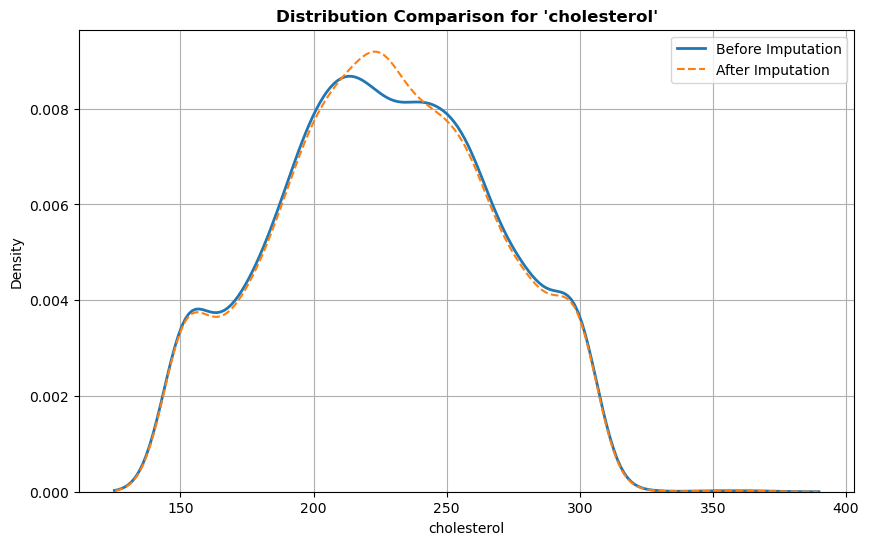

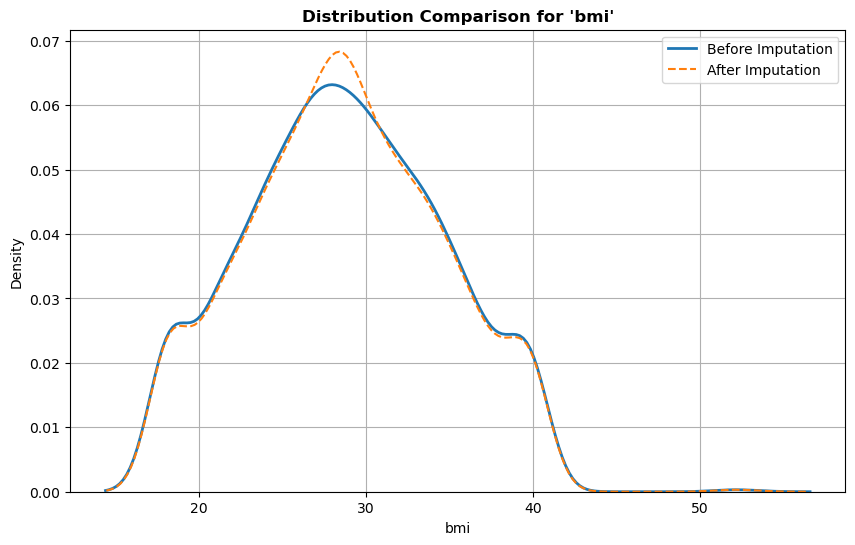

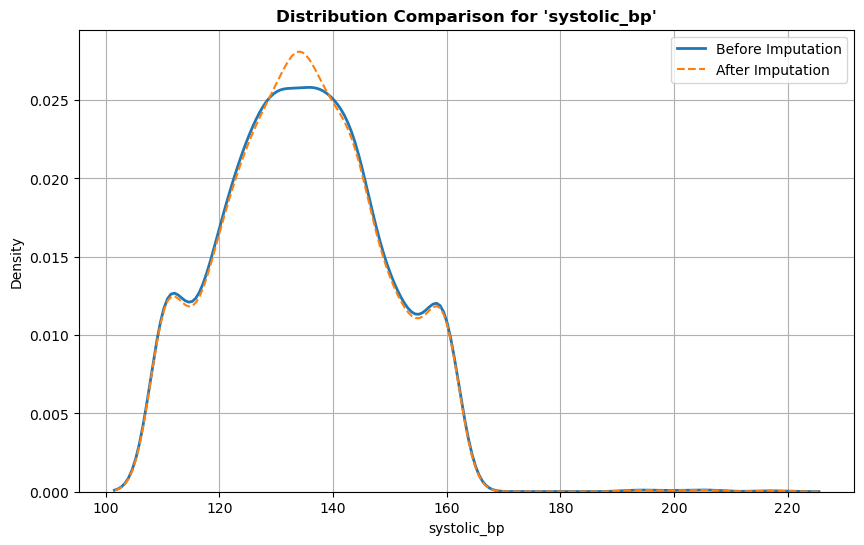

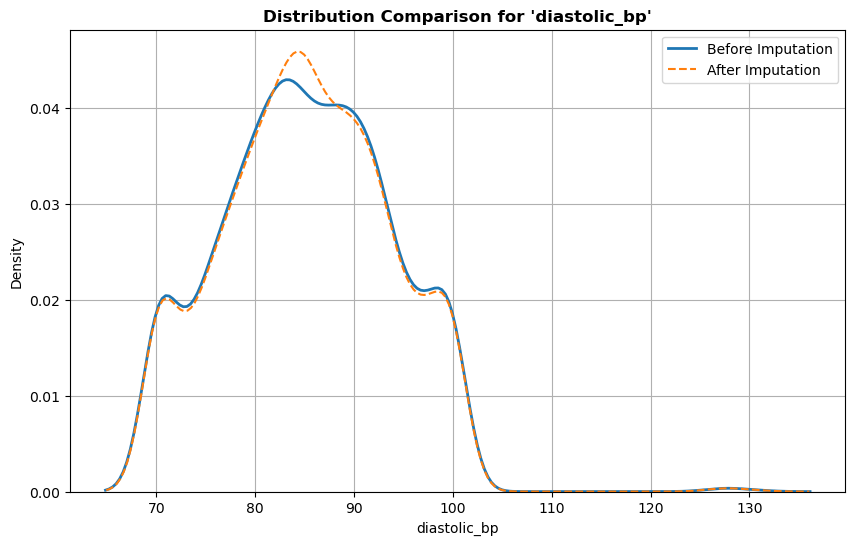

In [418]:
# For Numerical Columns
for col in median_diab_cols:
    plt.figure(figsize=(10,6))
    
    # Plot before imputation (on non-missing values)
    sns.kdeplot(X_train_diab[col].dropna(), label = "Before Imputation", linewidth = 2)
    
    # Plot after imputation
    sns.kdeplot(X_train_diab_df[col], label = "After Imputation", linestyle = '--')
    
    plt.title("Distribution Comparison for '{}'".format(col),fontweight = 'bold')
    plt.legend()
    plt.grid(True)
    plt.show()

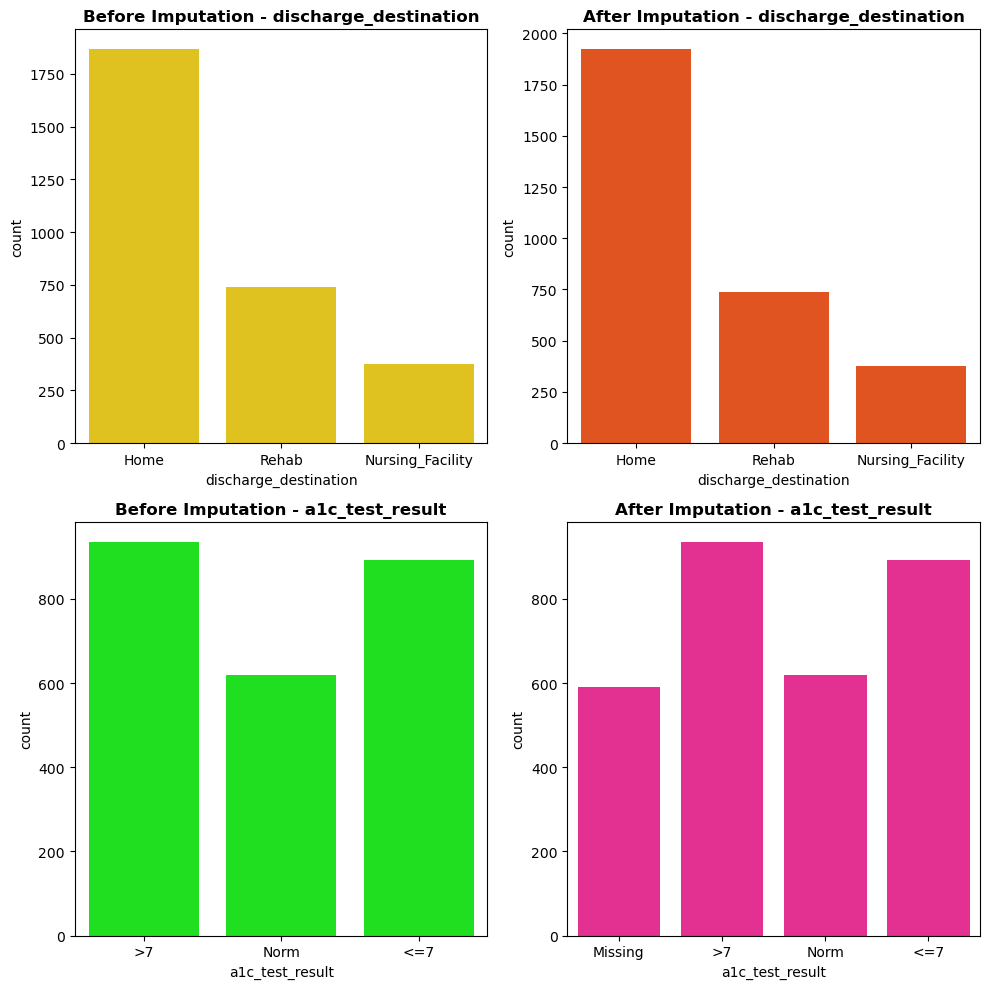

In [419]:
# For Categorical Columns
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize = (10,10))

# Frequecy Comparision For 'discharge_destination'
sns.countplot(data = X_train_diab, x = 'discharge_destination',ax = ax[0,0],color = 'gold')
ax[0, 0].set_title("Before Imputation - discharge_destination", fontweight='bold')

sns.countplot(data = X_train_diab_df, x = 'discharge_destination',ax = ax[0,1],color = 'orangered')
ax[0, 1].set_title("After Imputation - discharge_destination", fontweight='bold')

# Frequecy Comparision For 'a1c_test_result'
sns.countplot(data = X_train_diab, x = 'a1c_test_result',ax = ax[1,0],color = 'lime')
ax[1, 0].set_title("Before Imputation - a1c_test_result", fontweight='bold')

sns.countplot(data = X_train_diab_df, x = 'a1c_test_result',ax = ax[1,1],color = 'deeppink')
ax[1, 1].set_title("After Imputation - a1c_test_result", fontweight='bold')

plt.tight_layout()
plt.show()

## ***6. CATEGORICAL DATA ENCODING***

***Encoding Plan for Categorical Features -***

| Column                            | Type            | Encoding Strategy        | Explanation                                                                                                                     |
| --------------------------------- | --------------- | ------------------------ | ------------------------------------------------------------------------------------------------------------------------------- |
| **gender**                        | Nominal         | **One-Hot Encoding**     | No order exists between Male, Female, Other. One-hot avoids introducing false hierarchy.                                          |                                                                   |
| **hypertension**                  | Nominal         | **One-Hot Encoding**     | Binary (Yes/No), one-hot is safer and avoids unintended bias.                               |
| **discharge\_destination**        | Nominal         | **One-Hot Encoding**     | Values like 'Home', 'Rehab', 'Nursing\_Facility' are distinct with no natural order.                                            |
| **insulin\_plan**                 | **Ordinal**     | **Ordinal Encoding**     | There is a **progressive order**: `No < Steady < Down < Up` (change in insulin). You can assign integers to represent this scale. |
| **a1c\_test\_result**             | **Ordinal**     | **Ordinal Encoding**     | Clear order in values: `(Norm) < (<=7) < (>7) < (Missing)` (if treated as a category). Helps reflect glycemic worsening.                |
| **readmitted\_30\_days** (Target) | Binary (Yes/No) | **Label Encoding (0/1)** | This is your target variable, already likely encoded or can be with 0/1.                                                        |


In [420]:
# Define Categorical Columns
ordinal_diab_cols = ['a1c_test_result', 'insulin_plan']
nominal_diab_cols = ['gender', 'hypertension', 'discharge_destination']

# Define correct order of categories
a1c_order = ['Norm', '<=7', '>7', 'Missing']
# (Norm -> 0, <=7 -> 1, >7 -> 2, Missing -> 3)
insulin_order = ['No', 'Steady', 'Down', 'Up']
# (No -> 0, Steady -> 1, Down -> 2, Up -> 3)

# Define the Transformer

# drop = 'first' is used to avoid the dummy variable trap.
# sparse = False ensures we get a NumPy array instead of a sparse matrix.
# remainder = 'passthrough' keeps the other columns (like numerical ones).

encoder_diab = ColumnTransformer(
    transformers = [
        ('ord_diab', OrdinalEncoder(categories = [a1c_order, insulin_order]), ordinal_diab_cols),
        ('ohe_diab', OneHotEncoder(drop = 'first', sparse_output = False), nominal_diab_cols)
    ],
    remainder = 'passthrough'
)

# Fit on Train and Transform All
X_train_diab_encoded = encoder_diab.fit_transform(X_train_diab_df)
X_val_diab_encoded = encoder_diab.transform(X_val_diab_df)
X_test_diab_encoded = encoder_diab.transform(X_test_diab_df)

# Get Column Names
# encoder.named_transformers_['ohe_diab'] gives us access to the OneHotEncoder transformer inside the ColumnTransformer.
# .get_feature_names_out(nominal_diab_cols) gets the new feature names after OneHotEncoding the nominal_cols.

ohe_diab_feature_names = encoder_diab.named_transformers_['ohe_diab'].get_feature_names_out(nominal_diab_cols)
final_diab_column_names = ordinal_diab_cols + list(ohe_diab_feature_names) + list(X_train_diab_df.drop(columns = ordinal_diab_cols + nominal_diab_cols).columns)

# Convert Arrays Back to DataFrames
X_train_diab_final = pd.DataFrame(X_train_diab_encoded, columns = final_diab_column_names, index = X_train_diab_df.index)
X_val_diab_final = pd.DataFrame(X_val_diab_encoded, columns = final_diab_column_names, index = X_val_diab_df.index)
X_test_diab_final = pd.DataFrame(X_test_diab_encoded, columns = final_diab_column_names, index = X_test_diab_df.index)

# List your original numerical columns
numerical_cols = ['age', 'cholesterol', 'bmi', 'medication_count', 
                  'length_of_stay', 'num_inpatient_visits', 
                  'disease_burden_score', 'systolic_bp', 'diastolic_bp']

# Convert them to numeric type
for col in numerical_cols:
    X_train_diab_final[col] = pd.to_numeric(X_train_diab_final[col])
    X_val_diab_final[col] = pd.to_numeric(X_val_diab_final[col])
    X_test_diab_final[col] = pd.to_numeric(X_test_diab_final[col])

# Initialize and fit encoder on training target
target_encoder_diab = LabelEncoder()
y_train_diab_encoded = target_encoder_diab.fit_transform(y_train_diab)
y_val_diab_encoded = target_encoder_diab.transform(y_val_diab)
y_test_diab_encoded = target_encoder_diab.transform(y_test_diab)

In [421]:
X_train_diab_final

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
7197             3.0          1.0         1.0          0.0              0.0   
6097             2.0          3.0         1.0          0.0              1.0   
4069             3.0          2.0         0.0          0.0              1.0   
3995             2.0          1.0         0.0          0.0              1.0   
7776             0.0          3.0         0.0          0.0              0.0   
...              ...          ...         ...          ...              ...   
5932             1.0          3.0         0.0          1.0              0.0   
5208             2.0          3.0         0.0          1.0              0.0   
4807             3.0          2.0         0.0          0.0              1.0   
8019             3.0          1.0         1.0          0.0              0.0   
7858             2.0          3.0         0.0          1.0              0.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
7197                                    0.0                         0.0   
6097                                    0.0                         0.0   
4069                                    0.0                         1.0   
3995                                    0.0                         1.0   
7776                                    0.0                         1.0   
...                                     ...                         ...   
5932                                    0.0                         0.0   
5208                                    0.0                         0.0   
4807                                    0.0                         0.0   
8019                                    0.0                         0.0   
7858                                    1.0                         0.0   

      cholesterol   bmi  systolic_bp  diastolic_bp  age  medication_count  \
7197        196.0  30.9        140.0         100.0   89                 4   
6097        150.0  26.6        123.0          83.0   30                 6   
4069        156.0  21.3        139.0          87.0   51                 6   
3995        189.0  19.4        131.0          85.0   87                 3   
7776        300.0  29.1        143.0          76.0   75                 5   
...           ...   ...          ...           ...  ...               ...   
5932        222.0  35.4        144.0          88.0   88                 4   
5208        212.0  22.8        120.0          75.0   87                 3   
4807        197.0  22.5        130.0          78.0   52                 4   
8019        219.0  21.0        193.0         128.0   79                 6   
7858        181.0  28.2        140.0          86.0   78                 9   

      length_of_stay  num_inpatient_visits  disease_burden_score  
7197               8                     4                   4.8  
6097               8                     2                   1.5  
4069               4                     0                   4.8  
3995               3                     0                   1.2  
7776              10                     1                   1.3  
...              ...                   ...                   ...  
5932               6                     1                   2.4  
5208               2                     1                   3.7  
4807               4                     1                   1.5  
8019               3                     0                   6.1  
7858               6                     0                   4.0  

[3038 rows x 16 columns]

In [422]:
X_train_diab_final.dtypes

a1c_test_result                            object
insulin_plan                               object
gender_Male                                object
gender_Other                               object
hypertension_Yes                           object
discharge_destination_Nursing_Facility     object
discharge_destination_Rehab                object
cholesterol                               float64
bmi                                       float64
systolic_bp                               float64
diastolic_bp                              float64
age                                         int64
medication_count                            int64
length_of_stay                              int64
num_inpatient_visits                        int64
disease_burden_score                      float64
dtype: object

In [423]:
X_val_diab_final.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
1689             1.0          0.0         0.0          1.0              1.0   
5795             2.0          1.0         0.0          1.0              0.0   
5170             1.0          1.0         0.0          1.0              0.0   
4023             1.0          3.0         0.0          0.0              1.0   
7261             0.0          1.0         0.0          1.0              0.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
1689                                    0.0                         0.0   
5795                                    0.0                         1.0   
5170                                    0.0                         0.0   
4023                                    0.0                         0.0   
7261                                    0.0                         0.0   

      cholesterol   bmi  systolic_bp  diastolic_bp  age  medication_count  \
1689        200.0  18.0        134.0          85.0   72                 7   
5795        247.0  30.7        119.0          88.0   85                10   
5170        242.0  35.8        130.0         100.0   75                10   
4023        234.0  20.4        138.0          74.0   84                 0   
7261        235.0  36.8        125.0          86.0   61                 1   

      length_of_stay  num_inpatient_visits  disease_burden_score  
1689               4                     4                   3.5  
5795               6                     2                   4.0  
5170              10                     0                   6.1  
4023               8                     4                   4.8  
7261              10                     1                   1.8

In [424]:
X_test_diab_final.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
8293             2.0          2.0         0.0          1.0              1.0   
3687             0.0          1.0         0.0          1.0              1.0   
5166             2.0          3.0         1.0          0.0              0.0   
3022             1.0          1.0         1.0          0.0              1.0   
7190             1.0          2.0         1.0          0.0              0.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
8293                                    0.0                         0.0   
3687                                    0.0                         0.0   
5166                                    0.0                         0.0   
3022                                    0.0                         1.0   
7190                                    0.0                         0.0   

      cholesterol   bmi  systolic_bp  diastolic_bp  age  medication_count  \
8293        250.0  27.7        137.0          77.0   71                 9   
3687        194.0  40.0        136.0          71.0   80                 6   
5166        181.0  29.1        112.0         100.0   77                10   
3022        300.0  26.1        121.0          95.0   36                 4   
7190        257.0  29.5        137.0          93.0   81                 3   

      length_of_stay  num_inpatient_visits  disease_burden_score  
8293               1                     1                   1.4  
3687              10                     0                   1.9  
5166               7                     2                   1.6  
3022              10                     0                   8.0  
7190               7                     0                   4.4

In [425]:
y_train_diab_encoded

array([1, 0, 0, ..., 0, 0, 0])

## ***7. Feature Engineering: Why Add New Interaction Features?***

***`After analyzing the heatmap of numerical features, we observed that most variables are weakly correlated with one another, suggesting they may be acting independently. This, similar to Phase I, gives us an opportunity to enrich the dataset by manually adding new interaction features that capture combined health risk signals that might otherwise be overlooked. However, unlike Phase I, in Phase II we are focusing only on diabetic patients, so it is important to also include categorical clinical indicators such as insulin usage and A1C results. These categorical variables, when combined with numerical ones like age, cholesterol, or blood pressure, provide a more realistic picture of patient complexity. Therefore, the new features created in this phase incorporate both numerical and categorical information, reflecting how diabetes interacts with treatment intensity, cardiovascular health, and age-related risks. The following new features were added:`***

1. ***`glycemic_risk_score = a1c_test_result × insulin_plan`***
>We created glycemic_risk_score by combining A1C results and insulin therapy status. This captures overall diabetes control – patients with poor A1C and frequent insulin adjustments are more unstable and more likely to be readmitted.

2. ***`medication_visit_complexity = medication_count × num_inpatient_visits`***
>We created `medication_visit_complexity` by multiplying number of medications with inpatient visits. This reflects treatment complexity and frequent hospitalizations – patients with many drugs and repeated admissions often struggle with disease control, raising their readmission risk.

3. ***`age_a1c_interaction = age × a1c_test_result`***
>We created `age_a1c_interaction` by multiplying patient age with A1C result. This adjusts diabetes control by age – poor glycemic control in older patients carries more risk than in younger ones, making this a strong predictor for readmission.

4. ***`bp_cholesterol_interaction = cholesterol × mean_blood_pressure`***
>We multiply cholesterol and blood pressure values to capture cardiovascular risk. Diabetic patients with both high cholesterol and high blood pressure have much greater chances of being readmitted.

In [426]:
# Add interaction features to train/val/test sets
for df in [X_train_diab_final, X_val_diab_final, X_test_diab_final]:
    df['glycemic_risk_score'] = pd.to_numeric(df['a1c_test_result']) * pd.to_numeric(df['insulin_plan'])
    df['medication_visit_complexity'] = df['medication_count'] * df['num_inpatient_visits']
    df['age_a1c_interaction'] = df['age'] * pd.to_numeric(df['a1c_test_result'])
    df['bp_cholesterol_interaction'] = df['cholesterol'] * ((df['systolic_bp'] + df['diastolic_bp'])/2)

In [427]:
X_train_diab_final

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
7197             3.0          1.0         1.0          0.0              0.0   
6097             2.0          3.0         1.0          0.0              1.0   
4069             3.0          2.0         0.0          0.0              1.0   
3995             2.0          1.0         0.0          0.0              1.0   
7776             0.0          3.0         0.0          0.0              0.0   
...              ...          ...         ...          ...              ...   
5932             1.0          3.0         0.0          1.0              0.0   
5208             2.0          3.0         0.0          1.0              0.0   
4807             3.0          2.0         0.0          0.0              1.0   
8019             3.0          1.0         1.0          0.0              0.0   
7858             2.0          3.0         0.0          1.0              0.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
7197                                    0.0                         0.0   
6097                                    0.0                         0.0   
4069                                    0.0                         1.0   
3995                                    0.0                         1.0   
7776                                    0.0                         1.0   
...                                     ...                         ...   
5932                                    0.0                         0.0   
5208                                    0.0                         0.0   
4807                                    0.0                         0.0   
8019                                    0.0                         0.0   
7858                                    1.0                         0.0   

      cholesterol   bmi  systolic_bp  diastolic_bp  age  medication_count  \
7197        196.0  30.9        140.0         100.0   89                 4   
6097        150.0  26.6        123.0          83.0   30                 6   
4069        156.0  21.3        139.0          87.0   51                 6   
3995        189.0  19.4        131.0          85.0   87                 3   
7776        300.0  29.1        143.0          76.0   75                 5   
...           ...   ...          ...           ...  ...               ...   
5932        222.0  35.4        144.0          88.0   88                 4   
5208        212.0  22.8        120.0          75.0   87                 3   
4807        197.0  22.5        130.0          78.0   52                 4   
8019        219.0  21.0        193.0         128.0   79                 6   
7858        181.0  28.2        140.0          86.0   78                 9   

      length_of_stay  num_inpatient_visits  disease_burden_score  \
7197               8                     4                   4.8   
6097               8                     2                   1.5   
4069               4                     0                   4.8   
3995               3                     0                   1.2   
7776              10                     1                   1.3   
...              ...                   ...                   ...   
5932               6                     1                   2.4   
5208               2                     1                   3.7   
4807               4                     1                   1.5   
8019               3                     0                   6.1   
7858               6                     0                   4.0   

      glycemic_risk_score  medication_visit_complexity  age_a1c_interaction  \
7197                  3.0                           16                267.0   
6097                  6.0                           12                 60.0   
4069                  6.0                            0                153.0   
3995                  2.0                            0                174.0   
7776              

In [428]:
X_val_diab_final.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
8122             1.0          3.0         0.0          0.0              0.0   
8193             0.0          1.0         0.0          0.0              1.0   
2029             3.0          2.0         1.0          0.0              1.0   
3452             1.0          1.0         1.0          0.0              1.0   
3533             2.0          0.0         1.0          0.0              0.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
8122                                    0.0                         0.0   
8193                                    0.0                         1.0   
2029                                    0.0                         0.0   
3452                                    0.0                         0.0   
3533                                    0.0                         0.0   

      cholesterol   bmi  systolic_bp  diastolic_bp  age  medication_count  \
8122        178.0  20.7        124.0          87.0   72                 4   
8193        249.0  19.6        135.0          83.0   76                 4   
2029        279.0  27.8        112.0          71.0   36                 2   
3452        205.0  27.6        110.0          94.0   43                 9   
3533        209.0  21.3        135.0          79.0   68                 2   

      length_of_stay  num_inpatient_visits  disease_burden_score  \
8122               4                     2                   4.5   
8193               6                     1                   2.0   
2029               3                     2                   0.4   
3452               3                     1                   6.8   
3533               5                     2                   1.5   

      glycemic_risk_score  medication_visit_complexity  age_a1c_interaction  \
8122                  3.0                            8                 72.0   
8193                  0.0                            4                  0.0   
2029                  6.0                            4                108.0   
3452                  1.0                            9                 43.0   
3533                  0.0                            4                136.0   

      bp_cholesterol_interaction  
8122                     18779.0  
8193                     27141.0  
2029                     25528.5  
3452                     20910.0  
3533                     22363.0

In [429]:
X_test_diab_final.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
7319             1.0          1.0         0.0          1.0              0.0   
7736             2.0          2.0         0.0          1.0              1.0   
3165             0.0          3.0         0.0          0.0              0.0   
2863             2.0          3.0         0.0          1.0              0.0   
7779             1.0          0.0         0.0          1.0              1.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
7319                                    0.0                         0.0   
7736                                    0.0                         0.0   
3165                                    1.0                         0.0   
2863                                    1.0                         0.0   
7779                                    1.0                         0.0   

      cholesterol   bmi  systolic_bp  diastolic_bp  age  medication_count  \
7319        209.0  18.0        134.0          87.0   70                 2   
7736        218.0  30.7        125.0          84.0   89                 7   
3165        226.0  35.1        135.0          90.0   70                10   
2863        232.0  26.0        144.0          81.0   47                 1   
7779        222.0  22.8        140.0          82.0   88                 3   

      length_of_stay  num_inpatient_visits  disease_burden_score  \
7319               4                     2                   6.4   
7736               5                     0                   8.0   
3165               6                     0                   6.9   
2863              10                     1                   1.4   
7779               9                     0                   6.0   

      glycemic_risk_score  medication_visit_complexity  age_a1c_interaction  \
7319                  1.0                            4                 70.0   
7736                  4.0                            0                178.0   
3165                  0.0                            0                  0.0   
2863                  6.0                            1                 94.0   
7779                  0.0                            0                 88.0   

      bp_cholesterol_interaction  
7319                     23094.5  
7736                     22781.0  
3165                     25425.0  
2863                     26100.0  
7779                     24642.0

## ***8. STANDARDIZING NUMERICAL COLUMNS***

In [430]:
# Select only numerical columns
numerical_cols = ['age', 'cholesterol', 'bmi', 'length_of_stay', 'num_inpatient_visits', 'disease_burden_score', 'systolic_bp', 'diastolic_bp', 
                  'medication_count','glycemic_risk_score','medication_visit_complexity','age_a1c_interaction','bp_cholesterol_interaction']

scaler = StandardScaler()
X_train_diab_scaled = X_train_diab_final.copy()
X_train_diab_scaled[numerical_cols] = scaler.fit_transform(X_train_diab_scaled[numerical_cols])

# Apply same transformation to val and test sets
X_val_diab_scaled = X_val_diab_final.copy()
X_val_diab_scaled[numerical_cols] = scaler.transform(X_val_diab_scaled[numerical_cols])

X_test_diab_scaled = X_test_diab_final.copy()
X_test_diab_scaled[numerical_cols] = scaler.transform(X_test_diab_scaled[numerical_cols])

In [431]:
X_train_diab_scaled

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
7197             3.0          1.0         1.0          0.0              0.0   
6097             2.0          3.0         1.0          0.0              1.0   
4069             3.0          2.0         0.0          0.0              1.0   
3995             2.0          1.0         0.0          0.0              1.0   
7776             0.0          3.0         0.0          0.0              0.0   
...              ...          ...         ...          ...              ...   
5932             1.0          3.0         0.0          1.0              0.0   
5208             2.0          3.0         0.0          1.0              0.0   
4807             3.0          2.0         0.0          0.0              1.0   
8019             3.0          1.0         1.0          0.0              0.0   
7858             2.0          3.0         0.0          1.0              0.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
7197                                    0.0                         0.0   
6097                                    0.0                         0.0   
4069                                    0.0                         1.0   
3995                                    0.0                         1.0   
7776                                    0.0                         1.0   
...                                     ...                         ...   
5932                                    0.0                         0.0   
5208                                    0.0                         0.0   
4807                                    0.0                         0.0   
8019                                    0.0                         0.0   
7858                                    1.0                         0.0   

      cholesterol       bmi  systolic_bp  diastolic_bp       age  \
7197    -0.753471  0.362630     0.385623      1.763362  1.338751   
6097    -1.888115 -0.374399    -0.841328     -0.261779 -2.211327   
4069    -1.740118 -1.282831     0.313449      0.214725 -0.947740   
3995    -0.926134 -1.608495    -0.263940     -0.023527  1.218409   
7776     1.811810  0.054106     0.602143     -1.095661  0.496360   
...           ...       ...          ...           ...       ...   
5932    -0.112151  1.133940     0.674317      0.333851  1.278580   
5208    -0.358812 -1.025728    -1.057849     -1.214787  1.218409   
4807    -0.728805 -1.077148    -0.336113     -0.857409 -0.887569   
8019    -0.186149 -1.334252     4.210822      5.098888  0.737043   
7858    -1.123464 -0.100156     0.385623      0.095599  0.676872   

      medication_count  length_of_stay  num_inpatient_visits  \
7197         -0.304724        0.883820              1.661454   
6097          0.333505        0.883820              0.313478   
4069          0.333505       -0.420391             -1.034498   
3995         -0.623839       -0.746444             -1.034498   
7776          0.014391        1.535926             -0.360510   
...                ...             ...                   ...   
5932         -0.304724        0.231714             -0.360510   
5208         -0.623839       -1.072497             -0.360510   
4807         -0.304724       -0.420391             -0.360510   
8019          0.333505       -0.746444             -1.034498   
7858          1.290849        0.231714             -1.034498   

      disease_burden_score  glycemic_risk_score  medication_visit_complexity  \
7197              0.432477             0.210843                     0.833006   
6097             -1.181967             1.440289                     0.438482   
4069              0.432477             1.440289                    -0.745089   
3995             -1.328735            -0.198972                    -0.745089   
7776             -1.279812            -1.018603                    -0.251934   
...                    ...                  ...                          ...   
5932     

In [432]:
X_val_diab_scaled.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
8088             2.0          2.0         0.0          1.0              0.0   
1310             3.0          0.0         0.0          1.0              0.0   
8218             2.0          3.0         0.0          1.0              0.0   
5489             2.0          1.0         1.0          0.0              1.0   
2881             2.0          3.0         0.0          0.0              1.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
8088                                    0.0                         0.0   
1310                                    0.0                         0.0   
8218                                    0.0                         1.0   
5489                                    1.0                         0.0   
2881                                    1.0                         0.0   

      cholesterol       bmi  systolic_bp  diastolic_bp       age  \
8088     0.775831 -1.522794    -1.418717      0.095599 -0.827398   
1310     0.405839 -0.374399     0.457796     -0.380905 -0.165519   
8218     0.233176  1.922390    -0.047419     -0.023527 -2.211327   
5489    -0.457477 -0.271558    -1.779585     -0.261779 -0.767227   
2881     1.811810  0.276929     1.107358      1.048606  0.917555   

      medication_count  length_of_stay  num_inpatient_visits  \
8088         -1.262068        0.231714              0.313478   
1310          0.971735       -1.072497             -1.034498   
8218         -0.304724       -0.746444             -0.360510   
5489          0.014391       -1.072497              0.313478   
2881          1.290849       -0.746444              0.313478   

      disease_burden_score  glycemic_risk_score  medication_visit_complexity  \
8088              0.187864             0.620659                    -0.547827   
1310              0.481399            -1.018603                    -0.745089   
8218             -1.230890             1.440289                    -0.350565   
5489             -0.154594            -0.198972                     0.241220   
2881             -0.545974             1.440289                     1.030268   

      age_a1c_interaction  bp_cholesterol_interaction  
8088             0.083903                    0.208280  
1310             1.238313                    0.446666  
8218            -0.533572                    0.190485  
5489             0.110749                   -0.989685  
2881             0.862458                    2.390879

In [433]:
X_test_diab_scaled.sample(5)

a1c_test_result insulin_plan gender_Male gender_Other hypertension_Yes  \
5976             1.0          1.0         0.0          1.0              1.0   
7828             2.0          1.0         1.0          0.0              1.0   
4423             0.0          0.0         0.0          1.0              0.0   
2525             2.0          2.0         1.0          0.0              0.0   
3863             1.0          1.0         0.0          1.0              1.0   

     discharge_destination_Nursing_Facility discharge_destination_Rehab  \
5976                                    1.0                         0.0   
7828                                    0.0                         1.0   
4423                                    0.0                         0.0   
2525                                    0.0                         0.0   
3863                                    0.0                         0.0   

      cholesterol       bmi  systolic_bp  diastolic_bp       age  \
5976     1.170490 -0.374399     0.602143     -0.023527  0.616701   
7828    -1.345459 -0.408680     1.684747     -1.572164 -0.466373   
4423     0.307174 -0.065875     0.024755     -0.976535 -0.767227   
2525    -0.827470  1.219641     0.674317      0.929480  0.496360   
3863    -0.013486 -0.031595    -1.202196      0.572103  1.158239   

      medication_count  length_of_stay  num_inpatient_visits  \
5976         -1.581183       -0.420391             -0.360510   
7828          0.333505        0.557767             -0.360510   
4423         -0.623839       -0.420391              0.313478   
2525         -0.304724        0.231714             -1.034498   
3863         -0.623839       -0.094339             -0.360510   

      disease_burden_score  glycemic_risk_score  medication_visit_complexity  \
5976             -0.692742            -0.608788                    -0.745089   
7828             -0.203516            -0.198972                    -0.153303   
4423              1.900153            -1.018603                    -0.153303   
2525             -0.594897             0.620659                    -0.745089   
3863             -1.279812            -0.608788                    -0.449196   

      age_a1c_interaction  bp_cholesterol_interaction  
5976            -0.305375                    1.293750  
7828             0.244983                   -1.049409  
4423            -1.338975                    0.086581  
2525             0.674531                   -0.417292  
3863            -0.184565                   -0.287719

## ***9. BASELINE MODELS***

***In this section, Similar to Phase I we begin building our first set of machine learning models, commonly known as baseline models. These models will give us a reference point to evaluate future improvements. We will apply a mix of linear models (like Logistic Regression and SVM) and tree-based models (like Decision Tree and Random Forest) to understand how well our preprocessed dataset performs using different algorithmic approaches. This step will help us compare their initial performance, interpret early results, and identify which models are worth tuning and optimizing further in the later stages.***

***`Also from Phase I we know that accuracy is not a reliable metric. So moving on we don't focus on accuracy of the models, we focus on recall, precision, and F1 score, which give a much clearer picture of how well our model identifies and balances the minority class (i.e., readmitted patients). F1 score and Recall are more suitable metrics here.`***

- For **Logistic Regression, SVC we use X_train_diab_scaled, y_train_diab_encoded, X_val_diab_scaled, y_val_diab_encoded.** Since, These models are sensitive to the scale of features becaus, They involve dot products and distance-based calculations. Without standardization, features with large scales can dominate learning.

- For **Decision Tree, Random Forests We Use X_train_diab_final, y_train_diab_encoded, X_val_diab_final, y_val_diab_encoded.** Since, These models: Use splits based on feature values rather than distances or weights. Are invariant to feature scaling.

### ***9.1 LOGISTIC REGRESSION***

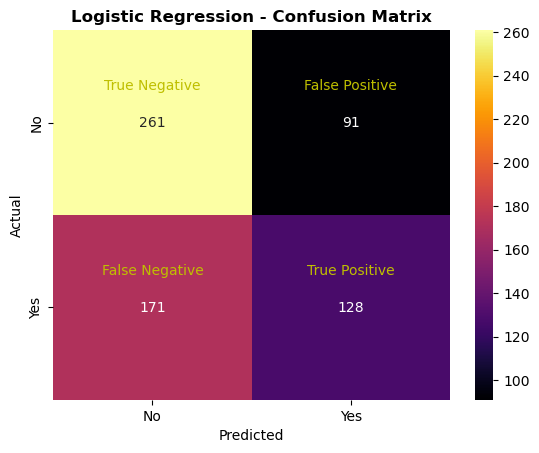


Recall 0.4280936454849498
Precision: 0.5844748858447488
F1 Score: 0.4942084942084942


In [434]:
# 1. Model Training
lgr_diab = LogisticRegression(random_state = 42)
lgr_diab.fit(X_train_diab_scaled, y_train_diab_encoded)

# 2. Predictions
y_pred_lgr_diab = lgr_diab.predict(X_val_diab_scaled)

# 3. Confusion Matrix Plot by using the same fucntion as in Phase I
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_lgr_diab,'Logistic Regression')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_lgr_diab,pos_label = 1))
print("Precision:", precision_score(y_val_diab_encoded, y_pred_lgr_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_lgr_diab, pos_label = 1))

### ***9.2 SUPPORT VECTOR CLASSIFIER***

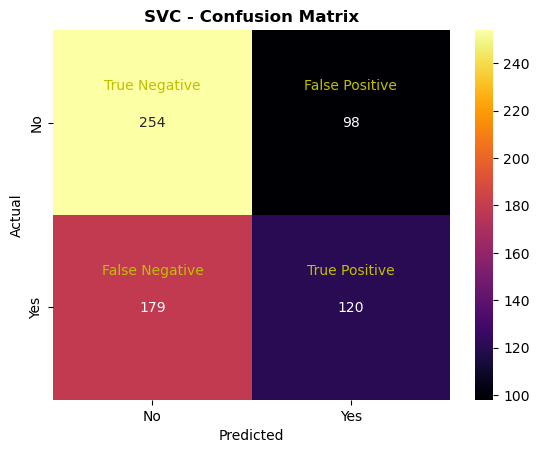


Recall 0.4013377926421405
Precision 0.5504587155963303
F1 Score: 0.46421663442940037


In [435]:
svc_diab = SVC(random_state = 42)
svc_diab.fit(X_train_diab_scaled, y_train_diab_encoded)

# 2. Predictions
y_pred_svc_diab = svc_diab.predict(X_val_diab_scaled)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_svc_diab,'SVC')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_svc_diab,pos_label = 1))
print("Precision", precision_score(y_val_diab_encoded, y_pred_svc_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_svc_diab, pos_label = 1))

### ***9.3 DECISION TREE***

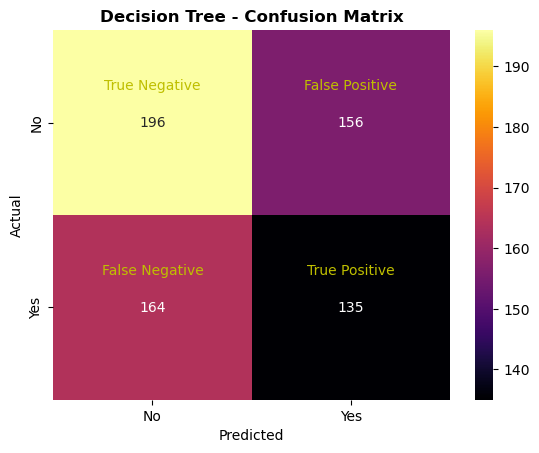


Recall 0.451505016722408
Precision 0.4639175257731959
F1 Score: 0.4576271186440678


In [436]:
# 1. Model Training
dt_diab = DecisionTreeClassifier(random_state = 42)
dt_diab.fit(X_train_diab_final, y_train_diab_encoded)

# 2. Predictions
y_pred_dt_diab = dt_diab.predict(X_val_diab_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_dt_diab,'Decision Tree')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_dt_diab,pos_label = 1))
print("Precision", precision_score(y_val_diab_encoded, y_pred_dt_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_dt_diab, pos_label = 1))

### ***9.4 RANDOM FOREST***

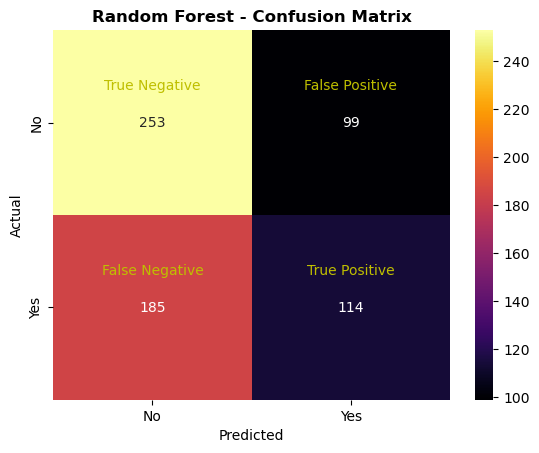


Recall 0.38127090301003347
Precision 0.5352112676056338
F1 Score: 0.4453125


In [437]:
# 1. Model Training
rf_diab = RandomForestClassifier(random_state = 42)
rf_diab.fit(X_train_diab_final, y_train_diab_encoded)

# 2. Predictions
y_pred_rf_diab = rf_diab.predict(X_val_diab_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_rf_diab,'Random Forest')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_rf_diab,pos_label = 1))
print("Precision", precision_score(y_val_diab_encoded, y_pred_rf_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_rf_diab, pos_label = 1))

In [438]:
# Pinting summary table using the same fucntion as in Phase I
summary_table(y_pred_lgr_diab,y_pred_svc_diab,y_pred_dt_diab,y_pred_rf_diab, y_val = y_val_diab_encoded)

                     Accuracy  Precision(Class-1)  Recall(Class-1)  \
Model                                                                
Logistic Regression        60                  58               43   
SVC                        57                  55               40   
Decision Tree              51                  46               45   
Random Forest              56                  54               38   

                     F1 Score(Class-1)  
Model                                   
Logistic Regression                 49  
SVC                                 46  
Decision Tree                       46  
Random Forest                       45  


### ***9.5 INITIAL MODEL EVALUATION SUMMARY***

- ***`We trained and evaluated four baseline models on the diabetic-only hospital readmission dataset, where the target distribution is slightly imbalanced (54% No, 46% Yes). Similar to Phase I, our primary objective is to improve Recall for Class 1 (Yes), since correctly identifying diabetic patients at high risk of readmission is critical for proactive intervention in healthcare.`***

- ***`The baseline results show that the models still struggle to capture the minority class effectively. Logistic Regression performs the best overall, with ~43% recall and ~49% F1 score for Class 1. Decision Tree achieves the highest recall (~45%), but at the cost of lower precision, indicating a tendency to overpredict readmissions. Random Forest and SVC lag slightly behind, with Class 1 recall around 38–40%. This suggests that, even with the added categorical interactions in Phase II, the baseline models still lean towards predicting the majority class (No), resulting in a high number of False Negatives—patients who are readmitted but missed by the model.`***

- ***`In summary, the baseline Phase II models demonstrate limited predictive power for Class 1. Decision Tree offers the best recall, whereas Logistic Regression provides the most balanced performance. However, none of the models achieve sufficient reliability for real-world use, particularly in reducing false negatives. Therefore, our next steps will focus on using class_weight = 'balanced', cross-validation, and hyperparameter tuning, with the specific aim of maximizing Recall and F1 score for Class 1, while keeping overall model stability intact.`***

### ***9.6 RE-TRAIN ALL 4 MODELS WITH `class_weight='balanced'`***

***We retrained four baseline models on the diabetic patient subset using class balancing `(class_weight=balanced)` to reduce bias toward the majority class. Logistic Regression and SVC showed the best balance, each reaching Recall close to 50% with F1 scores around 52–53. Decision Tree remained weak with both Precision and Recall near 47–48, while Random Forest showed decent Precision (57%) but very low Recall (36%) which is lower than unweighted case.***



### ***9.6.1 LOGISTIC REGRESSION***

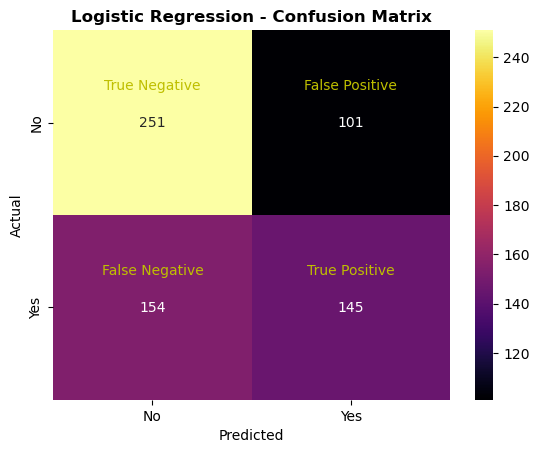


Recall 0.48494983277591974
Precision: 0.5894308943089431
F1 Score: 0.5321100917431193


In [439]:
lgr_bal_diab = LogisticRegression(random_state = 42,class_weight = 'balanced')
lgr_bal_diab.fit(X_train_diab_scaled, y_train_diab_encoded)

# 2. Predictions
y_pred_lgr_bal_diab = lgr_bal_diab.predict(X_val_diab_scaled)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_lgr_bal_diab,'Logistic Regression')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_lgr_bal_diab,pos_label = 1))
print("Precision:", precision_score(y_val_diab_encoded, y_pred_lgr_bal_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_lgr_bal_diab, pos_label = 1))

### ***9.6.2 SUPPORT VECTOR CLASSIFIER***

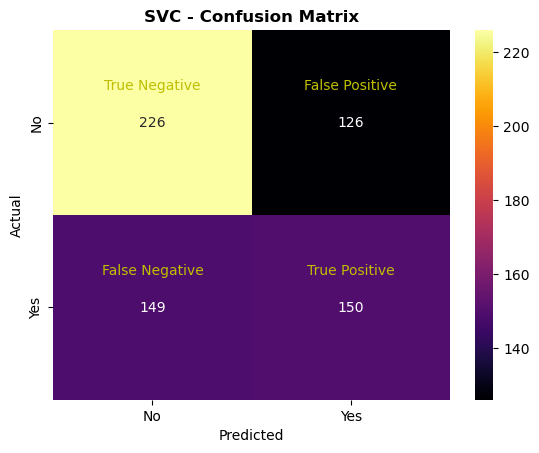


Recall 0.5016722408026756
Precision: 0.5434782608695652
F1 Score: 0.5217391304347826


In [440]:
svc_bal_diab = SVC(random_state = 42,class_weight = 'balanced')
svc_bal_diab.fit(X_train_diab_scaled, y_train_diab_encoded)

# 2. Predictions
y_pred_svc_bal_diab = svc_bal_diab.predict(X_val_diab_scaled)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_svc_bal_diab,'SVC')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_svc_bal_diab,pos_label = 1))
print("Precision:", precision_score(y_val_diab_encoded, y_pred_svc_bal_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_svc_bal_diab, pos_label = 1))


### ***9.6.3 DECISION TREE***

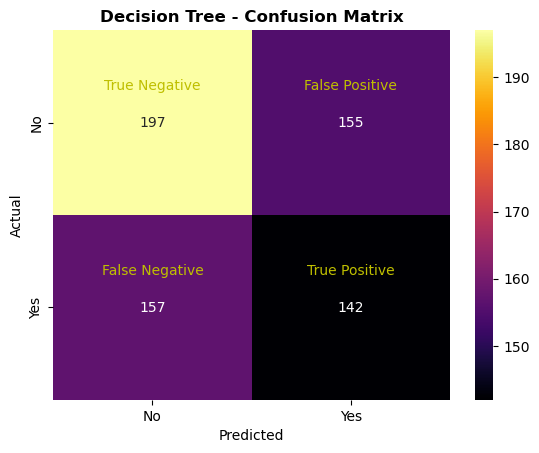


Recall 0.47491638795986624
Precision: 0.4781144781144781
F1 Score: 0.47651006711409394


In [441]:
# 1. Model Training
dt_bal_diab = DecisionTreeClassifier(random_state = 42,class_weight = 'balanced')
dt_bal_diab.fit(X_train_diab_final, y_train_diab_encoded)

# 2. Predictions
y_pred_dt_bal_diab = dt_bal_diab.predict(X_val_diab_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_dt_bal_diab,'Decision Tree')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_dt_bal_diab,pos_label = 1))
print("Precision:", precision_score(y_val_diab_encoded, y_pred_dt_bal_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_dt_bal_diab, pos_label = 1))

### ***9.6.4 RANDOM FOREST***

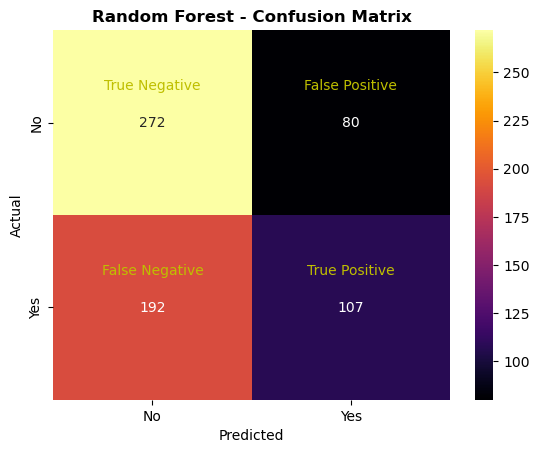


Recall 0.35785953177257523
Precision: 0.5721925133689839
F1 Score: 0.4403292181069959


In [442]:
# 1. Model Training
rf_bal_diab = RandomForestClassifier(random_state = 42,class_weight = 'balanced')
rf_bal_diab.fit(X_train_diab_final, y_train_diab_encoded)

# 2. Predictions
y_pred_rf_bal_diab = rf_bal_diab.predict(X_val_diab_final)

# 3. Confusion Matrix Plot
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_rf_bal_diab,'Random Forest')

# 4. Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_rf_bal_diab,pos_label = 1))
print("Precision:", precision_score(y_val_diab_encoded, y_pred_rf_bal_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_rf_bal_diab, pos_label = 1))

In [443]:
# Printing the summary table using the same modified function as in Phase I
summary_table_modified(y_pred_lgr_bal_diab,y_pred_svc_bal_diab,y_pred_dt_bal_diab,y_pred_rf_bal_diab, y_val = y_val_diab_encoded)

                     Precision(Class-1)  Recall(Class-1)  F1 Score(Class-1)
Model                                                                      
Logistic Regression                  59               48                 53
SVC                                  54               50                 52
Decision Tree                        48               47                 48
Random Forest                        57               36                 44


## ***10. HYPERPARAMETER TUNING***

***Observations and Issues –***

- `Logistic Regression achieved the highest Recall (84%), meaning it detected most readmitted patients. However, its Precision (48%) was low, leading to many false positives.`
- `SVC showed the weakest performance with Recall (52%) and F1 Score (50%), struggling to identify high-risk patients effectively.`
- `Decision Tree performed moderately with Recall (59%) and F1 Score (53%), but still fell behind Logistic Regression and Random Forest.`
- `Random Forest performed the best overall, reaching Recall (86%) and F1 Score (63%), making it the strongest model for identifying diabetic patients at risk of readmission.`

***Why Is This Happening?***

- `All models are still predicting readmission at a fixed probability cutoff of 0.5. This threshold often causes the model to lean toward the majority class (Not Readmitted) because it requires strong confidence to classify as positive.`
- `Logistic Regression is a linear model that picks up broad risk trends across features. This helps it catch many readmitted cases (high recall), but it lacks the nuance to filter out borderline patients, which lowers precision.`
- `Random Forest, being an ensemble of many decision trees, captures complex interactions among diabetic-related features. It balances bias and variance well, allowing it to generalize better than a single Decision Tree. That’s why it delivers both high recall (86%) and the best F1 Score (63%).`
- `Decision Tree alone is prone to overfitting specific patterns, which reduces generalization, hence its lower recall and F1 compared to Random Forest.`
- `SVC struggles here because it makes very strict boundaries between classes. Since our data is complex and not easy to separate, the model ends up missing many actual readmissions, which lowers recall.`

### ***10.1 LOGISTIC REGRESSION***

Best Parameters: {'C': 1e-05, 'penalty': 'l2'}
Best Recall on CV: 0.7798766700924975



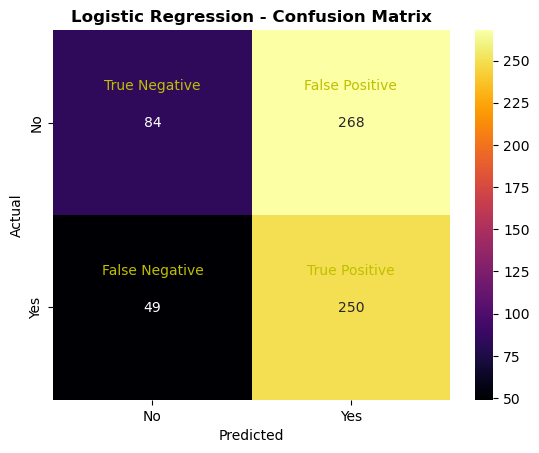


Recall 0.8361204013377926
Precision 0.4826254826254826
F1 Score: 0.6119951040391677


In [465]:
# Define the model
lgr_hpt_diab = LogisticRegression(class_weight = 'balanced',solver = 'liblinear',random_state = 42)

# Define hyperparameter grid
param_grid = {
    'C': [0.00001, 0.001, 0.01, 1, 3],
    'penalty': ['l1', 'l2']
}

# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search_diab = GridSearchCV(
    estimator = lgr_hpt_diab,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search_diab.fit(X_train_diab_scaled, y_train_diab_encoded)

# Best results
print("Best Parameters:", grid_search_diab.best_params_)
print("Best Recall on CV:", grid_search_diab.best_score_)
print()

# Logistic Regression model evaluation on the test set
best_model_lgr_diab = grid_search_diab.best_estimator_

# Predict on validation set
y_pred_lgr_hpt_diab = best_model_lgr_diab.predict(X_val_diab_scaled)

# Confusion Matrix
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_lgr_hpt_diab,'Logistic Regression')

# Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_lgr_hpt_diab,pos_label = 1))
print("Precision", precision_score(y_val_diab_encoded, y_pred_lgr_hpt_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_lgr_hpt_diab, pos_label = 1))

### ***10.2 SUPPORT VECTOR CLASSIFIER***

Best Parameters: {'C': 0.075, 'gamma': 'auto', 'kernel': 'rbf'}
Best Recall on CV: 0.5318996415770609



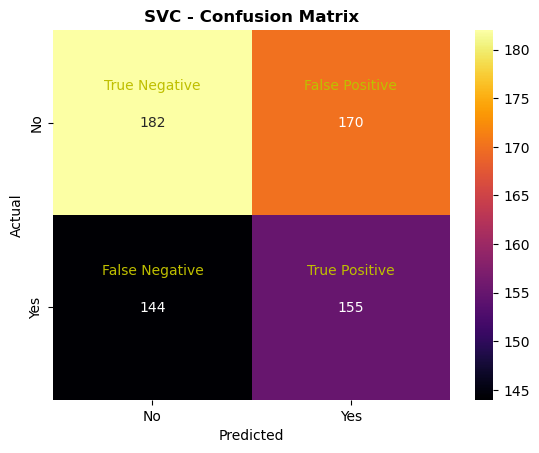


Recall 0.5183946488294314
Precision 0.47692307692307695
F1 Score: 0.4967948717948718


In [564]:
# Define the model
svc_hpt_diab = SVC(class_weight = 'balanced',probability = True,random_state = 42)

# Define hyperparameter grid
param_grid = {         
   'C': [0.01,0.075,0.5,0.75,1,2],                    
    'kernel': ['rbf','sigmoid'],          
    'gamma': ['scale', 'auto'] 
}

# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search_diab = GridSearchCV(
    estimator = svc_hpt_diab,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search_diab.fit(X_train_diab_scaled, y_train_diab_encoded)

# Best results
print("Best Parameters:", grid_search_diab.best_params_)
print("Best Recall on CV:", grid_search_diab.best_score_)
print()

# SVC model evaluation on the test set
best_model_svc_diab = grid_search_diab.best_estimator_

# Predict on validation set
y_pred_svc_hpt_diab = best_model_svc_diab.predict(X_val_diab_scaled)

# Confusion Matrix
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_svc_hpt_diab,'SVC')

# Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_svc_hpt_diab,pos_label = 1))
print("Precision", precision_score(y_val_diab_encoded, y_pred_svc_hpt_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_svc_hpt_diab, pos_label = 1))

### ***10.3 DECISION TREE***

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best Recall on CV: 0.6121863799283154



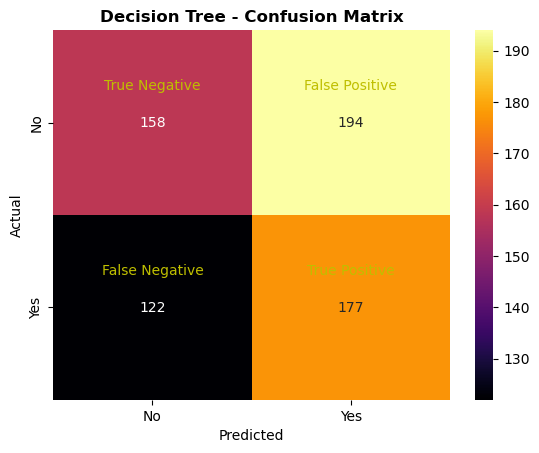


Recall 0.5919732441471572
Precision 0.477088948787062
F1 Score: 0.5283582089552239


In [561]:
# Define the model
dt_hpt_diab = DecisionTreeClassifier(random_state = 42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [30,None],
    'min_samples_split': [5,7,10],
    'min_samples_leaf': [5,8,10],
    'class_weight': ['balanced', {0:1, 1:2}]
}

# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search_diab = GridSearchCV(
    estimator = dt_hpt_diab,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search_diab.fit(X_train_diab_final, y_train_diab_encoded)

# Best results
print("Best Parameters:", grid_search_diab.best_params_)
print("Best Recall on CV:", grid_search_diab.best_score_)
print()

# Decision Tree model evaluation on the test set
best_model_dt_diab = grid_search_diab.best_estimator_

# Predict on validation set
y_pred_dt_hpt_diab = best_model_dt_diab.predict(X_val_diab_final)

# Confusion Matrix
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_dt_hpt_diab,'Decision Tree')

# Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_dt_hpt_diab,pos_label = 1))
print("Precision", precision_score(y_val_diab_encoded, y_pred_dt_hpt_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_dt_hpt_diab, pos_label = 1))

### ***10.4 RANDOM FOREST***

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}
Best Recall on CV: 0.8716845878136201



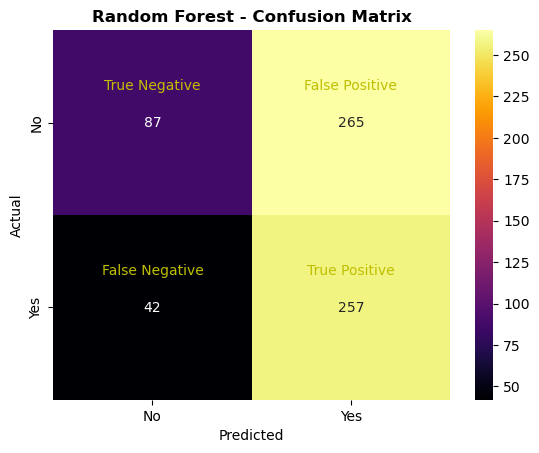


Recall 0.8595317725752508
Precision 0.49233716475095785
F1 Score: 0.6260657734470159


In [558]:
# Define the model
rf_hpt_diab = RandomForestClassifier(random_state = 42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [500,700],
    'max_depth': [25,None],
    'min_samples_split': [2,4],
    'min_samples_leaf': [5,8,10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', {0:1, 1:2}]
}

# Define stratified cross-validation
cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV setup
grid_search_diab = GridSearchCV(
    estimator = rf_hpt_diab,
    param_grid = param_grid,
    scoring = ['recall','f1','precision'],
    refit = 'recall',
    cv = cv_strategy,                
    n_jobs = -1,
    verbose = 0,
    return_train_score = True
)

# Fit the model
grid_search_diab.fit(X_train_diab_final, y_train_diab_encoded)

# Best results
print("Best Parameters:", grid_search_diab.best_params_)
print("Best Recall on CV:", grid_search_diab.best_score_)
print()

# Random Forest model evaluation on the test set
best_model_rf_diab = grid_search_diab.best_estimator_

# Predict on validation set
y_pred_rf_hpt_diab = best_model_rf_diab.predict(X_val_diab_final)

# Confusion Matrix
confusion_matrix_heatmap(y_val_diab_encoded, y_pred_rf_hpt_diab,'Random Forest')

# Evaluation Metrics
print("Recall", recall_score(y_val_diab_encoded, y_pred_rf_hpt_diab,pos_label = 1))
print("Precision", precision_score(y_val_diab_encoded, y_pred_rf_hpt_diab,pos_label = 1))
print("F1 Score:", f1_score(y_val_diab_encoded, y_pred_rf_hpt_diab, pos_label = 1))

In [565]:
# Printing the summary table
summary_table_modified(y_pred_lgr_hpt_diab,y_pred_svc_hpt_diab,y_pred_dt_hpt_diab,y_pred_rf_hpt_diab,y_val = y_val_diab_encoded)

                     Precision(Class-1)  Recall(Class-1)  F1 Score(Class-1)
Model                                                                      
Logistic Regression                  48               84                 61
SVC                                  48               52                 50
Decision Tree                        48               59                 53
Random Forest                        49               86                 63


## ***11. THRESHOLD TUNING***

***`Similar to Phase I, in Phase II as well we do the Threshold Tuning because in real-world a lower threshold (e.g., 0.3–0.4) is often preferred because it improves recall, even if it slightly sacrifices precision. This means we’d rather flag more patients as high-risk (even if some aren’t) than miss those who truly need intervention. Goal moving forward is to use the best-trained models and tune the threshold using validation set probabilities.`***

In [574]:
# Logistic Regression
df_lgr_diab_thresholds = threshold_tuning_df(best_model_lgr_diab, X_val_diab_scaled, y_val_diab_encoded)
df_lgr_diab_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         46     100        63
1        30.0         46     100        63
2        32.0         46     100        63
3        33.0         46     100        63
4        34.0         46     100        63
5        34.5         46     100        63
6        35.0         46     100        63
7        36.0         46     100        63
8        37.5         46     100        63
9        40.0         46     100        63
10       45.0         46     100        63
11       47.5         46     100        63
12       50.0         48      84        61
13       55.0          0       0         0

In [575]:
# Support Vector Classifier
df_svc_diab_thresholds = threshold_tuning_df(best_model_svc_diab, X_val_diab_scaled, y_val_diab_encoded)
df_svc_diab_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         46     100        63
1        30.0         46     100        63
2        32.0         46     100        63
3        33.0         46     100        63
4        34.0         46     100        63
5        34.5         46     100        63
6        35.0         46     100        63
7        36.0         46     100        63
8        37.5         46     100        63
9        40.0         46     100        63
10       45.0         48      90        62
11       47.5         45       6        11
12       50.0          0       0         0
13       55.0          0       0         0

In [576]:
# Decision Tree Classifier
df_dt_diab_thresholds = threshold_tuning_df(best_model_dt_diab, X_val_diab_final, y_val_diab_encoded)
df_dt_diab_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         49      84        62
1        30.0         49      80        61
2        32.0         48      77        59
3        33.0         48      77        59
4        34.0         48      74        58
5        34.5         48      74        58
6        35.0         48      73        58
7        36.0         48      72        58
8        37.5         48      72        58
9        40.0         48      72        58
10       45.0         48      69        57
11       47.5         48      64        55
12       50.0         48      63        54
13       55.0         48      59        53

In [577]:
# Random Forest
df_rf_diab_thresholds = threshold_tuning_df(best_model_rf_diab, X_val_diab_final, y_val_diab_encoded)
df_rf_diab_thresholds

Threshold  Precision  Recall  F1 Score
0        25.0         46     100        63
1        30.0         46     100        63
2        32.0         46     100        63
3        33.0         46     100        63
4        34.0         46     100        63
5        34.5         46     100        63
6        35.0         46     100        63
7        36.0         46     100        63
8        37.5         46     100        63
9        40.0         46     100        63
10       45.0         46      98        63
11       47.5         47      94        63
12       50.0         49      86        63
13       55.0         53      65        58

#### ***After Threshold Tuning, Random Forest at a threshold of 0.475 achieved:***

#### - ***`Recall = 94%`: Capturing nearly all patients who are at risk of readmission.***

#### - ***`Precision = 47%`: Indicates that nearly half of the predicted readmissions are correct.***

#### - ***`F1 Score = 63%`: Balances precision and recall effectively.***

#### ***While a threshold of 0.45 gave recall close to 98%, it likely over-predicts readmissions. We chose 0.475 instead, as it maintains strong recall while being more practical and reducing false positives. This threshold provides the highest overall recall with reasonable precision, aligning with the real-world priority of minimizing missed readmissions, even if it increases the number of false alarms. In the context of hospital risk management, this trade-off is often acceptable and even desirable — making this model a strong choice.***

## ***12. PREDICTION AND EVALUATION***

#### ***`SUMMARY-`*** 
- ***`After building and testing multiple machine learning models, tuning their hyperparameters, and adjusting the decision threshold, we finalized the Random Forest Classifier as our best-performing model. We evaluated this model on the test dataset using a custom threshold of 0.475.`***
  
- ***`This threshold was chosen to help us catch more actual readmissions, which is crucial in the healthcare domain. In such scenarios, missing a high-risk patient is more dangerous than raising a few extra alerts.`***

- ***`Recall (92%): Out of all patients who were actually readmitted within 30 days, the model was able to catch 92%. This is a very good sign because it means we are identifying most of the high-risk cases.`***

- ***`Precision (47%): Out of the patients the model predicted would be readmitted, 47% actually were. While not very high, this is acceptable in medical settings where catching most risky patients is more important than being 100% precise.`***

- ***`F1 Score (62%): This is the balanced measure of recall and precision. A score of 62% shows that our model is doing moderately well overall, catching a good number of actual readmissions while keeping a fair level of correctness in predictions.`***

- ***`In healthcare, especially when predicting hospital readmissions, it is better to be safe than sorry. This model ensures that very few high-risk patients go unnoticed, which can help hospitals take early action, improve care, and reduce avoidable readmissions.`***


In [578]:
# Selecting the best model
generic_diab_best_model = best_model_rf_diab

In [579]:
# Predict probabilities for the positive class (class 1)
y_test_diab_probs = generic_diab_best_model.predict_proba(X_test_diab_final)[:, 1]

In [587]:
# Apply threshold
threshold = 0.475
y_test_diab_pred_thresh = (y_test_diab_probs >= threshold).astype(int)

In [588]:
# Evaluate Performance on Test Set
recall = recall_score(y_test_diab_encoded, y_test_diab_pred_thresh, pos_label = 1,zero_division = 0)
f1 = f1_score(y_test_diab_encoded, y_test_diab_pred_thresh, pos_label = 1,zero_division = 0)
precision = precision_score(y_test_diab_encoded, y_test_diab_pred_thresh, pos_label = 1,zero_division = 0)

In [589]:
print("Test Set Results at Threshold = 0.40")
print("Recall:", round(recall * 100),"%")
print("Precision:", round(precision * 100),"%")
print("F1 Score:", round(f1 * 100),"%")

Test Set Results at Threshold = 0.40
Recall: 92 %
Precision: 47 %
F1 Score: 62 %


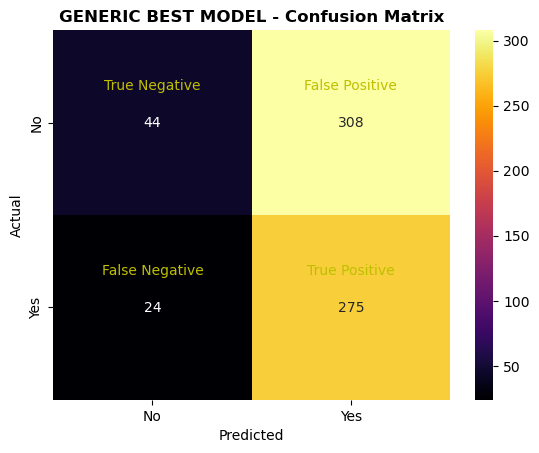

In [590]:
# Confusion Matrix Plot
confusion_matrix_heatmap(y_test_diab_encoded, y_test_diab_pred_thresh,'GENERIC BEST MODEL')

## ***FEATURE IMPORTANCE***

#### ***`SUMMARY -`***

***`bp_cholesterol_interaction (9.31), cholesterol (7.78), systolic_bp (7.68), diastolic_bp (6.80)`***

>***Blood pressure and cholesterol together play the biggest role in predicting readmission. High cholesterol combined with high blood pressure makes diabetic patients more vulnerable to heart issues, which often leads to hospital visits. The individual contribution of cholesterol and both systolic/diastolic blood pressure also shows that monitoring cardiovascular health is key for diabetes management.***

***`bmi (9.08)`***

>***BMI is the second most important single factor. Overweight or obese diabetic patients usually face more complications such as poor sugar control, hypertension, and higher cardiovascular risks. This makes them much more likely to get readmitted compared to patients with a healthy BMI.***

***`disease_burden_score (8.53)`***

>***A higher disease burden (more co-existing health issues) means patients are more fragile and prone to complications. For diabetics, this often includes kidney problems, hypertension, or cardiovascular disease, all of which increase the chance of returning to the hospital.***

***`age (7.72) and age_a1c_interaction (7.25)`***

>***Older diabetic patients generally have weaker immunity and slower recovery, which increases readmission chances. The interaction between age and A1C is also important: older patients with poor blood sugar control (high A1C) are at much higher risk compared to younger patients with similar A1C levels.***

***`discharge_destination (Rehab: 5.75, Nursing Facility: 1.88)`***

>***Where the patient is discharged matters a lot. Patients going to rehab centers often have more serious health needs and are at higher risk of coming back to the hospital. Those discharged to nursing facilities also show increased risk, though slightly lower than rehab, possibly due to ongoing medical support.***

***`medication_visit_complexity (5.07), medication_count (4.91), insulin_plan (2.05)`***

>***More medicines or complex treatment routines increase the chances of mistakes, poor adherence, or side effects, especially in diabetics. Patients on insulin often need tighter monitoring, and if their treatment is not well managed, they are more likely to get readmitted.***

***`length_of_stay (4.73) & Glycemic Risk Score (3.02)`***

>***A longer hospital stay signals severe health issues, which raises readmission risk. Glycemic risk score also matters, as poor glucose management leads to recurring problems like hypoglycemia or hyperglycemia, pushing patients back into hospitals.***

***`Other Factors (inpatient_visits: 2.64, a1c_test_result: 1.79, hypertension: 1.64, gender: ~1.1)`***

>***Frequent inpatient visits in the past show chronic instability in health. A1C test results still matter, as they capture long-term sugar control, but their importance is lower compared to interaction with age. Hypertension also contributes but is partly covered under BP variables. Gender plays a very small role in prediction, showing that medical conditions weigh far more than demographic differences.***

***`In summary, the model highlights that for diabetic patients, cardiovascular health (blood pressure + cholesterol), body weight (BMI), overall disease burden, and age-related sugar control are the strongest signals for readmission. Medication complexity and discharge settings also play big roles, while demographic features like gender have minimal influence. This closely matches real-world medical practice, where diabetic patients with multiple complications, poor lifestyle control, and complex care plans are most vulnerable to early hospital returns.`***

In [591]:
# Calculating Feature Imporances
num_importances = (generic_diab_best_model.feature_importances_*100).tolist()

columns = X_train_diab_final.columns.tolist()

diab_feature_imp = []

for feature in zip(columns,num_importances):
    diab_feature_imp.append([feature[0],feature[1]])

diab_feature_importance_df = pd.DataFrame(diab_feature_imp,columns = ['Feature','Importance'])

# Sort by importance (descending)
diab_feature_importance_df = diab_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [592]:
diab_feature_importance_df

Feature  Importance
0               bp_cholesterol_interaction    9.307299
1                                      bmi    9.077871
2                     disease_burden_score    8.531877
3                              cholesterol    7.775580
4                                      age    7.724745
5                              systolic_bp    7.683262
6                      age_a1c_interaction    7.253109
7                             diastolic_bp    6.798365
8              discharge_destination_Rehab    5.754982
9              medication_visit_complexity    5.069806
10                        medication_count    4.914449
11                          length_of_stay    4.733999
12                     glycemic_risk_score    3.020623
13                    num_inpatient_visits    2.640830
14                            insulin_plan    2.056147
15  discharge_destination_Nursing_Facility    1.879194
16                         a1c_test_result    1.791431
17                        hypertension_Yes    1.637591
18                            gender_Other    1.200469
19                             gender_Male    1.148373

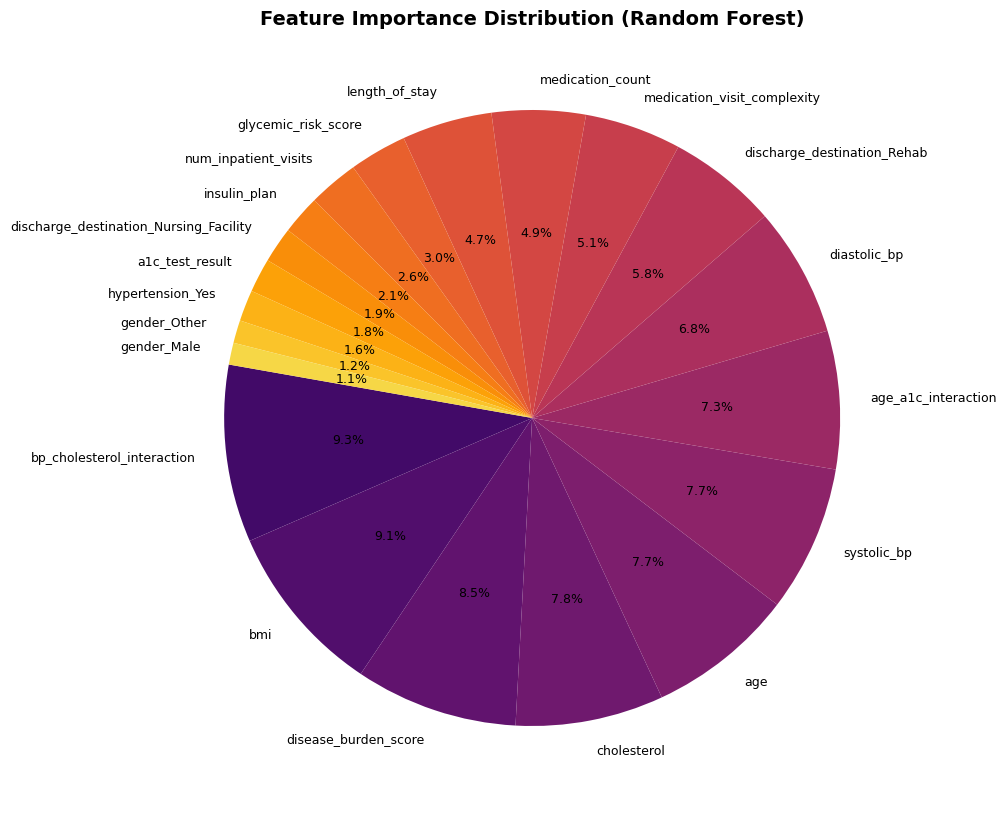

In [611]:
plt.figure(figsize=(10,10))
colors = plt.cm.inferno(np.linspace(0.2, 0.9, len(diab_feature_importance_df)))
plt.pie(
    diab_feature_importance_df["Importance"],
    labels = diab_feature_importance_df["Feature"],
    autopct ='%1.1f%%',
    startangle = 170,
    colors = colors,
    textprops = {'fontsize': 9}
)
plt.title("Feature Importance Distribution (Random Forest)", fontsize = 14 , fontweight = 'bold')
plt.show()

# ***FINAL PROJECT SUMMARY*** 

#### ***`Hospital readmission is a critical challenge for both patients and healthcare systems, as it not only strains hospital resources but also affects a patient’s recovery journey and quality of life. In this project, we set out to understand and predict the factors that drive 30-day readmission risks. Phase I focused on general hospital patients, while Phase II zoomed in specifically on diabetic patients—one of the groups most vulnerable to frequent readmissions. By combining data analysis, feature engineering, and machine learning, we explored the deeper story behind why patients return and what signals hospitals should pay attention to.`***

#### ***`Our findings show that patient health is shaped by a complex web of interacting factors rather than a single cause. For example, in the general population, body weight patterns (BMI ratio), age-related health stress (age burden), and blood pressure and cholesterol interplay emerged as strong predictors. This reflects real-world challenges: an older patient struggling with obesity and uncontrolled blood pressure is far more likely to face complications that trigger readmission. Similarly, discharge destinations like rehab or nursing facilities also played a role—indicating that where a patient goes after hospitalization can directly affect how well they recover.`***

#### ***`When we turned to diabetic patients, the story deepened. Here, the importance of blood pressure and cholesterol interactions stood out even more, highlighting the cardiovascular risks that diabetics constantly face. BMI and disease burden scores again reinforced the theme of lifestyle and chronic illness management, while age combined with A1C results (age_a1c_interaction) revealed how long-term glucose control influences outcomes differently in younger versus older patients. These findings show how diabetes does not act alone; it amplifies the risks tied to weight, blood pressure, cholesterol, and overall health complexity—making readmission prevention an even greater challenge.`***

#### ***`Taken together, both phases paint a clear and human-centered picture: hospital readmission is not just about the illness that sent someone to the hospital in the first place. It’s about how age, lifestyle, chronic conditions, treatment plans, and post-discharge care intersect to shape recovery. By identifying these risk factors early, hospitals can design better discharge planning, personalize follow-ups, and help patients manage their chronic conditions more effectively. Ultimately, our work shows that predictive models are not just numbers—they can be tools to improve lives, reduce unnecessary hospital stays, and give patients a smoother path to long-term health.`***